In [4]:
import json
import os
import math
import librosa
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [5]:
DATASET_PATH = "Data_gtzan/genres_original"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [6]:
# def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    
num_mfcc=13
n_fft=2048
hop_length=512
num_segments=10
dataset_path=DATASET_PATH
json_path=JSON_PATH

"""Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :param: num_segments (int): Number of segments we want to divide sample tracks into
    :return:
    """

# dictionary to store mapping, labels, and MFCCs
data = {
    "mapping": [],
    "labels": [],
    "mfcc": []
}

samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

# loop through all genre sub-folder
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

    # ensure we're processing a genre sub-folder level
    if dirpath is not dataset_path:

        # save genre label (i.e., sub-folder name) in the mapping
        semantic_label = dirpath.split("/")[-1]
        data["mapping"].append(semantic_label)
        print("\nProcessing: {}".format(semantic_label))

        # process all audio files in genre sub-dir
        for f in filenames:

    # load audio file
            file_path = os.path.join(dirpath, f)
            signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

            # process all segments of audio file
            for d in range(num_segments):

                # calculate start and finish sample for current segment
                start = samples_per_segment * d
                finish = start + samples_per_segment

                # extract mfcc
                mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                mfcc = mfcc.T

                # store only mfcc feature with expected number of vectors
                if len(mfcc) == num_mfcc_vectors_per_segment:
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(i-1)
                    print("{}, segment:{}".format(file_path, d+1))

# save MFCCs to json file
with open(json_path, "w") as fp:
    json.dump(data, fp, indent=4)


Processing: genres_original\blues
Data_gtzan/genres_original\blues\blues.00000.wav, segment:1
Data_gtzan/genres_original\blues\blues.00000.wav, segment:2
Data_gtzan/genres_original\blues\blues.00000.wav, segment:3
Data_gtzan/genres_original\blues\blues.00000.wav, segment:4
Data_gtzan/genres_original\blues\blues.00000.wav, segment:5
Data_gtzan/genres_original\blues\blues.00000.wav, segment:6
Data_gtzan/genres_original\blues\blues.00000.wav, segment:7
Data_gtzan/genres_original\blues\blues.00000.wav, segment:8
Data_gtzan/genres_original\blues\blues.00000.wav, segment:9
Data_gtzan/genres_original\blues\blues.00000.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.04373169 -0.05706787
 -0.04086304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02481079 -0.02005005 -0.0357666  ...  0.00918579  0.03964233
  0.09030151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06256104  0.02435303 -0.00405884 ...  0.2854004   0.29364014
  0.25228882], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00001.wav, segment:1
Data_gtzan/genres_original\blues\blues.00001.wav, segment:2
Data_gtzan/genres_original\blues\blues.00001.wav, segment:3
Data_gtzan/genres_original\blues\blues.00001.wav, segment:4
Data_gtzan/genres_original\blues\blues.00001.wav, segment:5
Data_gtzan/genres_original\blues\blues.00001.wav, segment:6
Data_gtzan/genres_original\blues\blues.00001.wav, segment:7
Data_gtzan/genres_original\blues\blues.00001.wav, segment:8
Data_gtzan/genres_original\blues\blues.00001.wav, segment:9
Data_gtzan/genres_original\blues\blues.00001.wav, segment:10
Data_gtzan/genres_original\blues\blues.00002.wav, segment:1
Data_gtzan/genres_original\blues\blues.00002.wav, segment:2
Data_gtzan/genres_original\blues\blues.00002.wav, segment:3
Data_gtzan/genres_original\blues\blues.00002.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15649414  0.15270996  0.11993408 ... -0.1390686  -0.14138794
 -0.15228271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17068481 -0.18624878 -0.17926025 ... -0.01953125 -0.01815796
 -0.01568604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01327515 -0.00930786 -0.00668335 ...  0.03027344  0.0317688
  0.02883911], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00002.wav, segment:5
Data_gtzan/genres_original\blues\blues.00002.wav, segment:6
Data_gtzan/genres_original\blues\blues.00002.wav, segment:7
Data_gtzan/genres_original\blues\blues.00002.wav, segment:8
Data_gtzan/genres_original\blues\blues.00002.wav, segment:9
Data_gtzan/genres_original\blues\blues.00002.wav, segment:10
Data_gtzan/genres_original\blues\blues.00003.wav, segment:1
Data_gtzan/genres_original\blues\blues.00003.wav, segment:2
Data_gtzan/genres_original\blues\blues.00003.wav, segment:3
Data_gtzan/genres_original\blues\blues.00003.wav, segment:4
Data_gtzan/genres_original\blues\blues.00003.wav, segment:5
Data_gtzan/genres_original\blues\blues.00003.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02450562 -0.01217651 -0.00042725 ... -0.2111206  -0.25875854
 -0.26654053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23046875 -0.18951416 -0.17907715 ...  0.17263794  0.12786865
  0.05374146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01135254 -0.03265381 -0.08026123 ... -0.22531128 -0.13735962
 -0.05740356], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00003.wav, segment:7
Data_gtzan/genres_original\blues\blues.00003.wav, segment:8
Data_gtzan/genres_original\blues\blues.00003.wav, segment:9
Data_gtzan/genres_original\blues\blues.00003.wav, segment:10
Data_gtzan/genres_original\blues\blues.00004.wav, segment:1
Data_gtzan/genres_original\blues\blues.00004.wav, segment:2
Data_gtzan/genres_original\blues\blues.00004.wav, segment:3
Data_gtzan/genres_original\blues\blues.00004.wav, segment:4
Data_gtzan/genres_original\blues\blues.00004.wav, segment:5
Data_gtzan/genres_original\blues\blues.00004.wav, segment:6
Data_gtzan/genres_original\blues\blues.00004.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1564331  -0.13809204 -0.12841797 ...  0.05422974  0.05551147
  0.05358887], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04498291  0.04144287  0.0401001  ... -0.24215698 -0.23568726
 -0.2268982 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2144165  -0.19995117 -0.18859863 ... -0.00515747 -0.00244141
  0.00283813], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00004.wav, segment:8
Data_gtzan/genres_original\blues\blues.00004.wav, segment:9
Data_gtzan/genres_original\blues\blues.00004.wav, segment:10
Data_gtzan/genres_original\blues\blues.00005.wav, segment:1
Data_gtzan/genres_original\blues\blues.00005.wav, segment:2
Data_gtzan/genres_original\blues\blues.00005.wav, segment:3
Data_gtzan/genres_original\blues\blues.00005.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04547119 0.02957153 0.00296021 ... 0.17419434 0.17919922 0.15707397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15585327  0.2084961   0.22970581 ... -0.02020264 -0.00274658
  0.00723267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02429199 -0.02975464 -0.00961304 ...  0.         -0.01425171
 -0.02456665], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00005.wav, segment:5
Data_gtzan/genres_original\blues\blues.00005.wav, segment:6
Data_gtzan/genres_original\blues\blues.00005.wav, segment:7
Data_gtzan/genres_original\blues\blues.00005.wav, segment:8
Data_gtzan/genres_original\blues\blues.00005.wav, segment:9
Data_gtzan/genres_original\blues\blues.00005.wav, segment:10
Data_gtzan/genres_original\blues\blues.00006.wav, segment:1
Data_gtzan/genres_original\blues\blues.00006.wav, segment:2
Data_gtzan/genres_original\blues\blues.00006.wav, segment:3
Data_gtzan/genres_original\blues\blues.00006.wav, segment:4
Data_gtzan/genres_original\blues\blues.00006.wav, segment:5
Data_gtzan/genres_original\blues\blues.00006.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02841187 -0.02484131 -0.02194214 ... -0.08883667 -0.07183838
 -0.06854248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05679321 -0.04641724 -0.056427   ...  0.27804565  0.20111084
  0.16220093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12808228 0.18136597 0.3222046  ... 0.00900269 0.03704834 0.05905151], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00006.wav, segment:7
Data_gtzan/genres_original\blues\blues.00006.wav, segment:8
Data_gtzan/genres_original\blues\blues.00006.wav, segment:9
Data_gtzan/genres_original\blues\blues.00006.wav, segment:10
Data_gtzan/genres_original\blues\blues.00007.wav, segment:1
Data_gtzan/genres_original\blues\blues.00007.wav, segment:2
Data_gtzan/genres_original\blues\blues.00007.wav, segment:3
Data_gtzan/genres_original\blues\blues.00007.wav, segment:4
Data_gtzan/genres_original\blues\blues.00007.wav, segment:5
Data_gtzan/genres_original\blues\blues.00007.wav, segment:6
Data_gtzan/genres_original\blues\blues.00007.wav, segment:7
Data_gtzan/genres_original\blues\blues.00007.wav, segment:8
Data_gtzan/genres_original\blues\blues.00007.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1600647   0.1609497   0.15805054 ... -0.42681885 -0.3685913
 -0.25030518], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05728149  0.43096924  0.6338806  ...  0.01708984  0.00091553
 -0.01901245], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00689697  0.01928711  0.00933838 ... -0.02590942  0.07104492
  0.15505981], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00007.wav, segment:10
Data_gtzan/genres_original\blues\blues.00008.wav, segment:1
Data_gtzan/genres_original\blues\blues.00008.wav, segment:2
Data_gtzan/genres_original\blues\blues.00008.wav, segment:3
Data_gtzan/genres_original\blues\blues.00008.wav, segment:4
Data_gtzan/genres_original\blues\blues.00008.wav, segment:5
Data_gtzan/genres_original\blues\blues.00008.wav, segment:6
Data_gtzan/genres_original\blues\blues.00008.wav, segment:7
Data_gtzan/genres_original\blues\blues.00008.wav, segment:8
Data_gtzan/genres_original\blues\blues.00008.wav, segment:9
Data_gtzan/genres_original\blues\blues.00008.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01138306 0.02175903 0.0100708  ... 0.16137695 0.16061401 0.20184326], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.23431396  0.25143433  0.21939087 ... -0.07217407 -0.08187866
 -0.07678223], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06906128 -0.08035278 -0.08377075 ...  0.07525635  0.02905273
 -0.01486206], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00009.wav, segment:1
Data_gtzan/genres_original\blues\blues.00009.wav, segment:2
Data_gtzan/genres_original\blues\blues.00009.wav, segment:3
Data_gtzan/genres_original\blues\blues.00009.wav, segment:4
Data_gtzan/genres_original\blues\blues.00009.wav, segment:5
Data_gtzan/genres_original\blues\blues.00009.wav, segment:6
Data_gtzan/genres_original\blues\blues.00009.wav, segment:7
Data_gtzan/genres_original\blues\blues.00009.wav, segment:8
Data_gtzan/genres_original\blues\blues.00009.wav, segment:9
Data_gtzan/genres_original\blues\blues.00009.wav, segment:10
Data_gtzan/genres_original\blues\blues.00010.wav, segment:1
Data_gtzan/genres_original\blues\blues.00010.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01861572 -0.01843262 -0.01809692 ... -0.03564453 -0.03353882
 -0.04708862], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08898926 -0.12036133 -0.14520264 ...  0.04586792  0.0869751
  0.12338257], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.13690186 0.11920166 0.0925293  ... 0.18121338 0.21395874 0.20065308], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\blues\blues.00010.wav, segment:3
Data_gtzan/genres_original\blues\blues.00010.wav, segment:4
Data_gtzan/genres_original\blues\blues.00010.wav, segment:5
Data_gtzan/genres_original\blues\blues.00010.wav, segment:6
Data_gtzan/genres_original\blues\blues.00010.wav, segment:7
Data_gtzan/genres_original\blues\blues.00010.wav, segment:8
Data_gtzan/genres_original\blues\blues.00010.wav, segment:9
Data_gtzan/genres_original\blues\blues.00010.wav, segment:10
Data_gtzan/genres_original\blues\blues.00011.wav, segment:1
Data_gtzan/genres_original\blues\blues.00011.wav, segment:2
Data_gtzan/genres_original\blues\blues.00011.wav, segment:3
Data_gtzan/genres_original\blues\blues.00011.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09780884 -0.09191895 -0.07879639 ... -0.01947021 -0.03424072
  0.00961304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08151245 0.1065979  0.07073975 ... 0.01306152 0.01287842 0.00836182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-2.1362305e-04 -1.6479492e-02 -3.9215088e-02 ... -3.3703613e-01
 -3.5888672e-01 -3.6352539e-01], sr=22050 as keyword args. From 

Data_gtzan/genres_original\blues\blues.00011.wav, segment:5
Data_gtzan/genres_original\blues\blues.00011.wav, segment:6
Data_gtzan/genres_original\blues\blues.00011.wav, segment:7
Data_gtzan/genres_original\blues\blues.00011.wav, segment:8
Data_gtzan/genres_original\blues\blues.00011.wav, segment:9
Data_gtzan/genres_original\blues\blues.00011.wav, segment:10
Data_gtzan/genres_original\blues\blues.00012.wav, segment:1
Data_gtzan/genres_original\blues\blues.00012.wav, segment:2
Data_gtzan/genres_original\blues\blues.00012.wav, segment:3
Data_gtzan/genres_original\blues\blues.00012.wav, segment:4
Data_gtzan/genres_original\blues\blues.00012.wav, segment:5
Data_gtzan/genres_original\blues\blues.00012.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03256226 -0.03787231 -0.04083252 ...  0.16629028  0.14840698
  0.13131714], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16506958  0.17575073  0.1312561  ... -0.01132202 -0.00762939
 -0.00244141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0045166   0.00799561  0.00756836 ... -0.00686646 -0.01077271
 -0.00949097], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00012.wav, segment:7
Data_gtzan/genres_original\blues\blues.00012.wav, segment:8
Data_gtzan/genres_original\blues\blues.00012.wav, segment:9
Data_gtzan/genres_original\blues\blues.00012.wav, segment:10
Data_gtzan/genres_original\blues\blues.00013.wav, segment:1
Data_gtzan/genres_original\blues\blues.00013.wav, segment:2
Data_gtzan/genres_original\blues\blues.00013.wav, segment:3
Data_gtzan/genres_original\blues\blues.00013.wav, segment:4
Data_gtzan/genres_original\blues\blues.00013.wav, segment:5
Data_gtzan/genres_original\blues\blues.00013.wav, segment:6
Data_gtzan/genres_original\blues\blues.00013.wav, segment:7
Data_gtzan/genres_original\blues\blues.00013.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08435059 -0.07876587 -0.08728027 ... -0.07998657 -0.08532715
 -0.15194702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2626648  -0.3711548  -0.42617798 ...  0.02038574  0.01742554
  0.01348877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01422119 0.01419067 0.01141357 ... 0.00927734 0.02270508 0.04385376], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00013.wav, segment:9
Data_gtzan/genres_original\blues\blues.00013.wav, segment:10
Data_gtzan/genres_original\blues\blues.00014.wav, segment:1
Data_gtzan/genres_original\blues\blues.00014.wav, segment:2
Data_gtzan/genres_original\blues\blues.00014.wav, segment:3
Data_gtzan/genres_original\blues\blues.00014.wav, segment:4
Data_gtzan/genres_original\blues\blues.00014.wav, segment:5
Data_gtzan/genres_original\blues\blues.00014.wav, segment:6
Data_gtzan/genres_original\blues\blues.00014.wav, segment:7
Data_gtzan/genres_original\blues\blues.00014.wav, segment:8
Data_gtzan/genres_original\blues\blues.00014.wav, segment:9
Data_gtzan/genres_original\blues\blues.00014.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22210693 -0.23214722 -0.23822021 ... -0.02752686 -0.02734375
 -0.03271484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07705688 0.11590576 0.09234619 ... 0.02584839 0.02297974 0.02163696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02130127  0.0222168   0.02636719 ... -0.02471924 -0.02453613
 -0.02209473], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00015.wav, segment:1
Data_gtzan/genres_original\blues\blues.00015.wav, segment:2
Data_gtzan/genres_original\blues\blues.00015.wav, segment:3
Data_gtzan/genres_original\blues\blues.00015.wav, segment:4
Data_gtzan/genres_original\blues\blues.00015.wav, segment:5
Data_gtzan/genres_original\blues\blues.00015.wav, segment:6
Data_gtzan/genres_original\blues\blues.00015.wav, segment:7
Data_gtzan/genres_original\blues\blues.00015.wav, segment:8
Data_gtzan/genres_original\blues\blues.00015.wav, segment:9
Data_gtzan/genres_original\blues\blues.00015.wav, segment:10
Data_gtzan/genres_original\blues\blues.00016.wav, segment:1
Data_gtzan/genres_original\blues\blues.00016.wav, segment:2
Data_gtzan/genres_original\blues\blues.00016.wav, segment:3
Data_gtzan/genres_original\blues\blues.00016.wav, segment:4
Data_gtzan/genres_original\blues\blues.00016.wav, segment:5
Data_gtzan/genres_original\blues\blues.00016.wav, segment:6
Data_gtzan/genres_original\blues\blues.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00296021 -0.01168823 -0.00997925 ... -0.0854187  -0.08850098
 -0.08862305], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08822632 -0.08804321 -0.08587646 ... -0.01760864 -0.02029419
 -0.02096558], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02355957 -0.02905273 -0.03234863 ...  0.05758667  0.06027222
  0.06469727], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00017.wav, segment:5
Data_gtzan/genres_original\blues\blues.00017.wav, segment:6
Data_gtzan/genres_original\blues\blues.00017.wav, segment:7
Data_gtzan/genres_original\blues\blues.00017.wav, segment:8
Data_gtzan/genres_original\blues\blues.00017.wav, segment:9
Data_gtzan/genres_original\blues\blues.00017.wav, segment:10
Data_gtzan/genres_original\blues\blues.00018.wav, segment:1
Data_gtzan/genres_original\blues\blues.00018.wav, segment:2
Data_gtzan/genres_original\blues\blues.00018.wav, segment:3
Data_gtzan/genres_original\blues\blues.00018.wav, segment:4
Data_gtzan/genres_original\blues\blues.00018.wav, segment:5
Data_gtzan/genres_original\blues\blues.00018.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1918335  0.17330933 0.14517212 ... 0.32199097 0.22058105 0.0045166 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13885498 -0.18051147 -0.04956055 ...  0.01208496  0.01367188
  0.01412964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01434326 0.01391602 0.01455688 ... 0.07855225 0.18579102 0.20748901], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\blues\blues.00018.wav, segment:7
Data_gtzan/genres_original\blues\blues.00018.wav, segment:8
Data_gtzan/genres_original\blues\blues.00018.wav, segment:9
Data_gtzan/genres_original\blues\blues.00018.wav, segment:10
Data_gtzan/genres_original\blues\blues.00019.wav, segment:1
Data_gtzan/genres_original\blues\blues.00019.wav, segment:2
Data_gtzan/genres_original\blues\blues.00019.wav, segment:3
Data_gtzan/genres_original\blues\blues.00019.wav, segment:4
Data_gtzan/genres_original\blues\blues.00019.wav, segment:5
Data_gtzan/genres_original\blues\blues.00019.wav, segment:6
Data_gtzan/genres_original\blues\blues.00019.wav, segment:7
Data_gtzan/genres_original\blues\blues.00019.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15863037 -0.12756348 -0.08062744 ... -0.06036377 -0.05575562
 -0.05789185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05670166 -0.05184937 -0.04925537 ... -0.10134888 -0.13494873
 -0.15588379], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13735962 -0.10733032 -0.09216309 ...  0.06341553  0.05700684
  0.05691528], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00019.wav, segment:9
Data_gtzan/genres_original\blues\blues.00019.wav, segment:10
Data_gtzan/genres_original\blues\blues.00020.wav, segment:1
Data_gtzan/genres_original\blues\blues.00020.wav, segment:2
Data_gtzan/genres_original\blues\blues.00020.wav, segment:3
Data_gtzan/genres_original\blues\blues.00020.wav, segment:4
Data_gtzan/genres_original\blues\blues.00020.wav, segment:5
Data_gtzan/genres_original\blues\blues.00020.wav, segment:6
Data_gtzan/genres_original\blues\blues.00020.wav, segment:7
Data_gtzan/genres_original\blues\blues.00020.wav, segment:8
Data_gtzan/genres_original\blues\blues.00020.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1791687   0.20385742  0.20715332 ... -0.00949097 -0.01461792
 -0.01940918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03634644 -0.05361938 -0.04153442 ...  0.00067139  0.00067139
 -0.00115967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00808716 -0.01605225 -0.01968384 ...  0.00701904  0.02444458
  0.00708008], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00020.wav, segment:10
Data_gtzan/genres_original\blues\blues.00021.wav, segment:1
Data_gtzan/genres_original\blues\blues.00021.wav, segment:2
Data_gtzan/genres_original\blues\blues.00021.wav, segment:3
Data_gtzan/genres_original\blues\blues.00021.wav, segment:4
Data_gtzan/genres_original\blues\blues.00021.wav, segment:5
Data_gtzan/genres_original\blues\blues.00021.wav, segment:6
Data_gtzan/genres_original\blues\blues.00021.wav, segment:7
Data_gtzan/genres_original\blues\blues.00021.wav, segment:8
Data_gtzan/genres_original\blues\blues.00021.wav, segment:9
Data_gtzan/genres_original\blues\blues.00021.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04711914  0.07504272  0.06588745 ... -0.05978394  0.09396362
  0.19958496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17349243  0.05587769 -0.07305908 ... -0.09384155 -0.09338379
 -0.05368042], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00991821  0.05551147  0.07669067 ... -0.06451416 -0.07040405
 -0.07556152], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00022.wav, segment:1
Data_gtzan/genres_original\blues\blues.00022.wav, segment:2
Data_gtzan/genres_original\blues\blues.00022.wav, segment:3
Data_gtzan/genres_original\blues\blues.00022.wav, segment:4
Data_gtzan/genres_original\blues\blues.00022.wav, segment:5
Data_gtzan/genres_original\blues\blues.00022.wav, segment:6
Data_gtzan/genres_original\blues\blues.00022.wav, segment:7
Data_gtzan/genres_original\blues\blues.00022.wav, segment:8
Data_gtzan/genres_original\blues\blues.00022.wav, segment:9
Data_gtzan/genres_original\blues\blues.00022.wav, segment:10
Data_gtzan/genres_original\blues\blues.00023.wav, segment:1
Data_gtzan/genres_original\blues\blues.00023.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03518677 -0.02392578 -0.01480103 ...  0.10241699  0.08187866
  0.07125854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07354736  0.08670044  0.09439087 ...  0.02908325 -0.06677246
 -0.14480591], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16143799 -0.10656738 -0.0213623  ...  0.00250244 -0.00366211
 -0.01171875], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00023.wav, segment:3
Data_gtzan/genres_original\blues\blues.00023.wav, segment:4
Data_gtzan/genres_original\blues\blues.00023.wav, segment:5
Data_gtzan/genres_original\blues\blues.00023.wav, segment:6
Data_gtzan/genres_original\blues\blues.00023.wav, segment:7
Data_gtzan/genres_original\blues\blues.00023.wav, segment:8
Data_gtzan/genres_original\blues\blues.00023.wav, segment:9
Data_gtzan/genres_original\blues\blues.00023.wav, segment:10
Data_gtzan/genres_original\blues\blues.00024.wav, segment:1
Data_gtzan/genres_original\blues\blues.00024.wav, segment:2
Data_gtzan/genres_original\blues\blues.00024.wav, segment:3
Data_gtzan/genres_original\blues\blues.00024.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13476562  0.19546509  0.22195435 ... -0.04937744 -0.05499268
 -0.06448364], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07141113 -0.07553101 -0.08236694 ... -0.00738525 -0.00476074
 -0.00341797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00076294  0.00387573  0.00714111 ...  0.05697632  0.05285645
  0.0480957 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00024.wav, segment:5
Data_gtzan/genres_original\blues\blues.00024.wav, segment:6
Data_gtzan/genres_original\blues\blues.00024.wav, segment:7
Data_gtzan/genres_original\blues\blues.00024.wav, segment:8
Data_gtzan/genres_original\blues\blues.00024.wav, segment:9
Data_gtzan/genres_original\blues\blues.00024.wav, segment:10
Data_gtzan/genres_original\blues\blues.00025.wav, segment:1
Data_gtzan/genres_original\blues\blues.00025.wav, segment:2
Data_gtzan/genres_original\blues\blues.00025.wav, segment:3
Data_gtzan/genres_original\blues\blues.00025.wav, segment:4
Data_gtzan/genres_original\blues\blues.00025.wav, segment:5
Data_gtzan/genres_original\blues\blues.00025.wav, segment:6
Data_gtzan/genres_original\blues\blues.00025.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12008667  0.12704468  0.13153076 ...  0.01773071  0.01382446
 -0.00247192], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01245117 -0.00259399  0.01873779 ...  0.01950073  0.02056885
  0.02142334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02215576 0.02407837 0.02462769 ... 0.21099854 0.23132324 0.23950195], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00025.wav, segment:8
Data_gtzan/genres_original\blues\blues.00025.wav, segment:9
Data_gtzan/genres_original\blues\blues.00025.wav, segment:10
Data_gtzan/genres_original\blues\blues.00026.wav, segment:1
Data_gtzan/genres_original\blues\blues.00026.wav, segment:2
Data_gtzan/genres_original\blues\blues.00026.wav, segment:3
Data_gtzan/genres_original\blues\blues.00026.wav, segment:4
Data_gtzan/genres_original\blues\blues.00026.wav, segment:5
Data_gtzan/genres_original\blues\blues.00026.wav, segment:6
Data_gtzan/genres_original\blues\blues.00026.wav, segment:7
Data_gtzan/genres_original\blues\blues.00026.wav, segment:8
Data_gtzan/genres_original\blues\blues.00026.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.22518921 0.22537231 0.20904541 ... 0.09786987 0.09408569 0.09234619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08898926 0.08615112 0.08352661 ... 0.12341309 0.13250732 0.1404419 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03570557 0.05581665 0.04812622 ... 0.00982666 0.00961304 0.0093689 ], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\blues\blues.00026.wav, segment:10
Data_gtzan/genres_original\blues\blues.00027.wav, segment:1
Data_gtzan/genres_original\blues\blues.00027.wav, segment:2
Data_gtzan/genres_original\blues\blues.00027.wav, segment:3
Data_gtzan/genres_original\blues\blues.00027.wav, segment:4
Data_gtzan/genres_original\blues\blues.00027.wav, segment:5
Data_gtzan/genres_original\blues\blues.00027.wav, segment:6
Data_gtzan/genres_original\blues\blues.00027.wav, segment:7
Data_gtzan/genres_original\blues\blues.00027.wav, segment:8
Data_gtzan/genres_original\blues\blues.00027.wav, segment:9
Data_gtzan/genres_original\blues\blues.00027.wav, segment:10
Data_gtzan/genres_original\blues\blues.00028.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02020264 -0.03634644 -0.02706909 ... -0.02493286 -0.01455688
 -0.00274658], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01098633  0.0255127   0.03720093 ... -0.02584839 -0.027771
 -0.02996826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03042603 -0.0305481  -0.0328064  ... -0.02294922 -0.03448486
 -0.01168823], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\blues\blues.00028.wav, segment:2
Data_gtzan/genres_original\blues\blues.00028.wav, segment:3
Data_gtzan/genres_original\blues\blues.00028.wav, segment:4
Data_gtzan/genres_original\blues\blues.00028.wav, segment:5
Data_gtzan/genres_original\blues\blues.00028.wav, segment:6
Data_gtzan/genres_original\blues\blues.00028.wav, segment:7
Data_gtzan/genres_original\blues\blues.00028.wav, segment:8
Data_gtzan/genres_original\blues\blues.00028.wav, segment:9
Data_gtzan/genres_original\blues\blues.00028.wav, segment:10
Data_gtzan/genres_original\blues\blues.00029.wav, segment:1
Data_gtzan/genres_original\blues\blues.00029.wav, segment:2
Data_gtzan/genres_original\blues\blues.00029.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02703857 -0.02972412 -0.03411865 ... -0.07894897 -0.06732178
 -0.05328369], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03652954 -0.02563477 -0.02096558 ...  0.02035522  0.0178833
  0.00201416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01040649 -0.0015564   0.01870728 ...  0.06872559  0.05838013
  0.04330444], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00029.wav, segment:4
Data_gtzan/genres_original\blues\blues.00029.wav, segment:5
Data_gtzan/genres_original\blues\blues.00029.wav, segment:6
Data_gtzan/genres_original\blues\blues.00029.wav, segment:7
Data_gtzan/genres_original\blues\blues.00029.wav, segment:8
Data_gtzan/genres_original\blues\blues.00029.wav, segment:9
Data_gtzan/genres_original\blues\blues.00029.wav, segment:10
Data_gtzan/genres_original\blues\blues.00030.wav, segment:1
Data_gtzan/genres_original\blues\blues.00030.wav, segment:2
Data_gtzan/genres_original\blues\blues.00030.wav, segment:3
Data_gtzan/genres_original\blues\blues.00030.wav, segment:4
Data_gtzan/genres_original\blues\blues.00030.wav, segment:5
Data_gtzan/genres_original\blues\blues.00030.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01092529 -0.00131226  0.0039978  ...  0.01925659  0.01803589
  0.03262329], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01010132  0.00131226  0.0173645  ... -0.07571411 -0.08532715
 -0.08572388], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07119751 -0.05386353 -0.02822876 ...  0.08239746  0.09161377
  0.10232544], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00030.wav, segment:7
Data_gtzan/genres_original\blues\blues.00030.wav, segment:8
Data_gtzan/genres_original\blues\blues.00030.wav, segment:9
Data_gtzan/genres_original\blues\blues.00030.wav, segment:10
Data_gtzan/genres_original\blues\blues.00031.wav, segment:1
Data_gtzan/genres_original\blues\blues.00031.wav, segment:2
Data_gtzan/genres_original\blues\blues.00031.wav, segment:3
Data_gtzan/genres_original\blues\blues.00031.wav, segment:4
Data_gtzan/genres_original\blues\blues.00031.wav, segment:5
Data_gtzan/genres_original\blues\blues.00031.wav, segment:6
Data_gtzan/genres_original\blues\blues.00031.wav, segment:7
Data_gtzan/genres_original\blues\blues.00031.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00128174 -0.02716064 -0.02966309 ...  0.04873657  0.04074097
  0.02758789], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01834106  0.01190186 -0.00024414 ... -0.22518921 -0.21972656
 -0.21270752], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21789551 -0.22442627 -0.23379517 ...  0.12115479  0.14215088
  0.13195801], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00031.wav, segment:9
Data_gtzan/genres_original\blues\blues.00031.wav, segment:10
Data_gtzan/genres_original\blues\blues.00032.wav, segment:1
Data_gtzan/genres_original\blues\blues.00032.wav, segment:2
Data_gtzan/genres_original\blues\blues.00032.wav, segment:3
Data_gtzan/genres_original\blues\blues.00032.wav, segment:4
Data_gtzan/genres_original\blues\blues.00032.wav, segment:5
Data_gtzan/genres_original\blues\blues.00032.wav, segment:6
Data_gtzan/genres_original\blues\blues.00032.wav, segment:7
Data_gtzan/genres_original\blues\blues.00032.wav, segment:8
Data_gtzan/genres_original\blues\blues.00032.wav, segment:9
Data_gtzan/genres_original\blues\blues.00032.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17749023 -0.20883179 -0.23318481 ...  0.01586914  0.01431274
  0.0168457 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10046387 -0.15109253 -0.15005493 ... -0.05810547 -0.05776978
 -0.06384277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06576538 -0.06634521 -0.07058716 ... -0.02618408 -0.00488281
  0.01751709], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00033.wav, segment:1
Data_gtzan/genres_original\blues\blues.00033.wav, segment:2
Data_gtzan/genres_original\blues\blues.00033.wav, segment:3
Data_gtzan/genres_original\blues\blues.00033.wav, segment:4
Data_gtzan/genres_original\blues\blues.00033.wav, segment:5
Data_gtzan/genres_original\blues\blues.00033.wav, segment:6
Data_gtzan/genres_original\blues\blues.00033.wav, segment:7
Data_gtzan/genres_original\blues\blues.00033.wav, segment:8
Data_gtzan/genres_original\blues\blues.00033.wav, segment:9
Data_gtzan/genres_original\blues\blues.00033.wav, segment:10
Data_gtzan/genres_original\blues\blues.00034.wav, segment:1
Data_gtzan/genres_original\blues\blues.00034.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02435303 0.02676392 0.0291748  ... 0.18234253 0.14883423 0.184021  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.18869019 0.19281006 0.23617554 ... 0.04275513 0.04284668 0.04006958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04138184 0.04025269 0.03112793 ... 0.13623047 0.1465149  0.14233398], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\blues\blues.00034.wav, segment:3
Data_gtzan/genres_original\blues\blues.00034.wav, segment:4
Data_gtzan/genres_original\blues\blues.00034.wav, segment:5
Data_gtzan/genres_original\blues\blues.00034.wav, segment:6
Data_gtzan/genres_original\blues\blues.00034.wav, segment:7
Data_gtzan/genres_original\blues\blues.00034.wav, segment:8
Data_gtzan/genres_original\blues\blues.00034.wav, segment:9
Data_gtzan/genres_original\blues\blues.00034.wav, segment:10
Data_gtzan/genres_original\blues\blues.00035.wav, segment:1
Data_gtzan/genres_original\blues\blues.00035.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19296265 -0.19342041 -0.18927002 ...  0.10818481  0.10629272
  0.10083008], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09054565  0.08587646  0.08859253 ... -0.02099609 -0.03457642
 -0.04580688], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04666138 -0.04483032 -0.03787231 ... -0.00363159  0.01086426
  0.00247192], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00035.wav, segment:3
Data_gtzan/genres_original\blues\blues.00035.wav, segment:4
Data_gtzan/genres_original\blues\blues.00035.wav, segment:5
Data_gtzan/genres_original\blues\blues.00035.wav, segment:6
Data_gtzan/genres_original\blues\blues.00035.wav, segment:7
Data_gtzan/genres_original\blues\blues.00035.wav, segment:8
Data_gtzan/genres_original\blues\blues.00035.wav, segment:9
Data_gtzan/genres_original\blues\blues.00035.wav, segment:10
Data_gtzan/genres_original\blues\blues.00036.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10482788  0.11947632  0.12579346 ... -0.0553894  -0.05935669
 -0.06500244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0675354  -0.07922363 -0.09259033 ... -0.2324524  -0.20941162
 -0.22027588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21447754 -0.17636108 -0.18313599 ...  0.04049683  0.06591797
  0.10009766], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00036.wav, segment:2
Data_gtzan/genres_original\blues\blues.00036.wav, segment:3
Data_gtzan/genres_original\blues\blues.00036.wav, segment:4
Data_gtzan/genres_original\blues\blues.00036.wav, segment:5
Data_gtzan/genres_original\blues\blues.00036.wav, segment:6
Data_gtzan/genres_original\blues\blues.00036.wav, segment:7
Data_gtzan/genres_original\blues\blues.00036.wav, segment:8
Data_gtzan/genres_original\blues\blues.00036.wav, segment:9
Data_gtzan/genres_original\blues\blues.00036.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10650635 -0.11090088 -0.1126709  ... -0.12484741 -0.14135742
 -0.15213013], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15640259 -0.15890503 -0.15686035 ...  0.27172852  0.27386475
  0.306427  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.3086548  0.32089233 0.34951782 ... 0.12145996 0.09976196 0.0776062 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00037.wav, segment:1
Data_gtzan/genres_original\blues\blues.00037.wav, segment:2
Data_gtzan/genres_original\blues\blues.00037.wav, segment:3
Data_gtzan/genres_original\blues\blues.00037.wav, segment:4
Data_gtzan/genres_original\blues\blues.00037.wav, segment:5
Data_gtzan/genres_original\blues\blues.00037.wav, segment:6
Data_gtzan/genres_original\blues\blues.00037.wav, segment:7
Data_gtzan/genres_original\blues\blues.00037.wav, segment:8
Data_gtzan/genres_original\blues\blues.00037.wav, segment:9
Data_gtzan/genres_original\blues\blues.00037.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10690308 -0.08483887 -0.08413696 ...  0.02560425  0.0296936
  0.03540039], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05197144  0.0687561   0.07254028 ... -0.12606812 -0.13031006
 -0.13449097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13864136 -0.14251709 -0.1456604  ... -0.00509644 -0.00494385
 -0.00793457], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00038.wav, segment:1
Data_gtzan/genres_original\blues\blues.00038.wav, segment:2
Data_gtzan/genres_original\blues\blues.00038.wav, segment:3
Data_gtzan/genres_original\blues\blues.00038.wav, segment:4
Data_gtzan/genres_original\blues\blues.00038.wav, segment:5
Data_gtzan/genres_original\blues\blues.00038.wav, segment:6
Data_gtzan/genres_original\blues\blues.00038.wav, segment:7
Data_gtzan/genres_original\blues\blues.00038.wav, segment:8
Data_gtzan/genres_original\blues\blues.00038.wav, segment:9
Data_gtzan/genres_original\blues\blues.00038.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.51712036  0.5145874   0.534729   ... -0.06173706 -0.04653931
 -0.04977417], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01055908 -0.01623535 -0.012146   ... -0.0994873  -0.10241699
 -0.10043335], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09094238 -0.08184814 -0.074646   ... -0.00067139  0.00949097
  0.01464844], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00039.wav, segment:1
Data_gtzan/genres_original\blues\blues.00039.wav, segment:2
Data_gtzan/genres_original\blues\blues.00039.wav, segment:3
Data_gtzan/genres_original\blues\blues.00039.wav, segment:4
Data_gtzan/genres_original\blues\blues.00039.wav, segment:5
Data_gtzan/genres_original\blues\blues.00039.wav, segment:6
Data_gtzan/genres_original\blues\blues.00039.wav, segment:7
Data_gtzan/genres_original\blues\blues.00039.wav, segment:8
Data_gtzan/genres_original\blues\blues.00039.wav, segment:9
Data_gtzan/genres_original\blues\blues.00039.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07714844 -0.07855225 -0.08178711 ...  0.15899658  0.18460083
  0.20370483], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.18005371 0.17764282 0.19839478 ... 0.01473999 0.02261353 0.0324707 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0980835  -0.08453369 -0.06008911 ... -0.00888062 -0.06860352
 -0.01681519], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00040.wav, segment:1
Data_gtzan/genres_original\blues\blues.00040.wav, segment:2
Data_gtzan/genres_original\blues\blues.00040.wav, segment:3
Data_gtzan/genres_original\blues\blues.00040.wav, segment:4
Data_gtzan/genres_original\blues\blues.00040.wav, segment:5
Data_gtzan/genres_original\blues\blues.00040.wav, segment:6
Data_gtzan/genres_original\blues\blues.00040.wav, segment:7
Data_gtzan/genres_original\blues\blues.00040.wav, segment:8
Data_gtzan/genres_original\blues\blues.00040.wav, segment:9
Data_gtzan/genres_original\blues\blues.00040.wav, segment:10
Data_gtzan/genres_original\blues\blues.00041.wav, segment:1
Data_gtzan/genres_original\blues\blues.00041.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10739136 -0.09359741 -0.08972168 ... -0.00027466 -0.05474854
 -0.04620361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05142212 -0.1121521  -0.12783813 ... -0.09030151 -0.02609253
 -0.0368042 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03082275 -0.03540039 -0.03076172 ...  0.09317017  0.08099365
  0.07342529], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00041.wav, segment:3
Data_gtzan/genres_original\blues\blues.00041.wav, segment:4
Data_gtzan/genres_original\blues\blues.00041.wav, segment:5
Data_gtzan/genres_original\blues\blues.00041.wav, segment:6
Data_gtzan/genres_original\blues\blues.00041.wav, segment:7
Data_gtzan/genres_original\blues\blues.00041.wav, segment:8
Data_gtzan/genres_original\blues\blues.00041.wav, segment:9
Data_gtzan/genres_original\blues\blues.00041.wav, segment:10
Data_gtzan/genres_original\blues\blues.00042.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18429565 -0.17282104 -0.13183594 ... -0.5133972  -0.38000488
 -0.2920227 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.27105713 -0.26168823 -0.26687622 ... -0.09677124  0.06158447
 -0.0355835 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-3.3660889e-02  9.8144531e-02 -1.2673950e-01 ... -2.5329590e-02
 -9.2468262e-03 -6.1035156e-05], sr=22050 as keyword args

Data_gtzan/genres_original\blues\blues.00042.wav, segment:2
Data_gtzan/genres_original\blues\blues.00042.wav, segment:3
Data_gtzan/genres_original\blues\blues.00042.wav, segment:4
Data_gtzan/genres_original\blues\blues.00042.wav, segment:5
Data_gtzan/genres_original\blues\blues.00042.wav, segment:6
Data_gtzan/genres_original\blues\blues.00042.wav, segment:7
Data_gtzan/genres_original\blues\blues.00042.wav, segment:8
Data_gtzan/genres_original\blues\blues.00042.wav, segment:9
Data_gtzan/genres_original\blues\blues.00042.wav, segment:10
Data_gtzan/genres_original\blues\blues.00043.wav, segment:1
Data_gtzan/genres_original\blues\blues.00043.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21899414 -0.16653442 -0.14852905 ...  0.10418701  0.10058594
  0.06143188], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06585693 0.06793213 0.07418823 ... 0.00344849 0.01965332 0.01983643], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0161438  -0.00375366 -0.00726318 ... -0.08966064 -0.09552002
 -0.09320068], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00043.wav, segment:3
Data_gtzan/genres_original\blues\blues.00043.wav, segment:4
Data_gtzan/genres_original\blues\blues.00043.wav, segment:5
Data_gtzan/genres_original\blues\blues.00043.wav, segment:6
Data_gtzan/genres_original\blues\blues.00043.wav, segment:7
Data_gtzan/genres_original\blues\blues.00043.wav, segment:8
Data_gtzan/genres_original\blues\blues.00043.wav, segment:9
Data_gtzan/genres_original\blues\blues.00043.wav, segment:10
Data_gtzan/genres_original\blues\blues.00044.wav, segment:1
Data_gtzan/genres_original\blues\blues.00044.wav, segment:2
Data_gtzan/genres_original\blues\blues.00044.wav, segment:3
Data_gtzan/genres_original\blues\blues.00044.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02404785 -0.02542114  0.00512695 ... -0.3668213  -0.42156982
 -0.36895752], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11239624 0.14764404 0.11526489 ... 0.06692505 0.04278564 0.01086426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00796509 -0.0246582  -0.02514648 ... -0.11752319 -0.1298523
 -0.16323853], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\blues\blues.00044.wav, segment:5
Data_gtzan/genres_original\blues\blues.00044.wav, segment:6
Data_gtzan/genres_original\blues\blues.00044.wav, segment:7
Data_gtzan/genres_original\blues\blues.00044.wav, segment:8
Data_gtzan/genres_original\blues\blues.00044.wav, segment:9
Data_gtzan/genres_original\blues\blues.00044.wav, segment:10
Data_gtzan/genres_original\blues\blues.00045.wav, segment:1
Data_gtzan/genres_original\blues\blues.00045.wav, segment:2
Data_gtzan/genres_original\blues\blues.00045.wav, segment:3
Data_gtzan/genres_original\blues\blues.00045.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07754517 0.09689331 0.09259033 ... 0.01550293 0.02139282 0.0015564 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01901245 -0.04046631 -0.05606079 ... -0.3020935  -0.31698608
 -0.2637024 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.27246094 -0.3187561  -0.25881958 ... -0.04040527 -0.0369873
 -0.0045166 ], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\blues\blues.00045.wav, segment:5
Data_gtzan/genres_original\blues\blues.00045.wav, segment:6
Data_gtzan/genres_original\blues\blues.00045.wav, segment:7
Data_gtzan/genres_original\blues\blues.00045.wav, segment:8
Data_gtzan/genres_original\blues\blues.00045.wav, segment:9
Data_gtzan/genres_original\blues\blues.00045.wav, segment:10
Data_gtzan/genres_original\blues\blues.00046.wav, segment:1
Data_gtzan/genres_original\blues\blues.00046.wav, segment:2
Data_gtzan/genres_original\blues\blues.00046.wav, segment:3
Data_gtzan/genres_original\blues\blues.00046.wav, segment:4
Data_gtzan/genres_original\blues\blues.00046.wav, segment:5
Data_gtzan/genres_original\blues\blues.00046.wav, segment:6
Data_gtzan/genres_original\blues\blues.00046.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01647949 0.03048706 0.01889038 ... 0.11022949 0.10494995 0.09939575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1072998  0.12716675 0.1279602  ... 0.10183716 0.10842896 0.11468506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12142944  0.11087036  0.0987854  ... -0.03936768 -0.01437378
  0.02902222], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\blues\blues.00046.wav, segment:8
Data_gtzan/genres_original\blues\blues.00046.wav, segment:9
Data_gtzan/genres_original\blues\blues.00046.wav, segment:10
Data_gtzan/genres_original\blues\blues.00047.wav, segment:1
Data_gtzan/genres_original\blues\blues.00047.wav, segment:2
Data_gtzan/genres_original\blues\blues.00047.wav, segment:3
Data_gtzan/genres_original\blues\blues.00047.wav, segment:4
Data_gtzan/genres_original\blues\blues.00047.wav, segment:5
Data_gtzan/genres_original\blues\blues.00047.wav, segment:6
Data_gtzan/genres_original\blues\blues.00047.wav, segment:7
Data_gtzan/genres_original\blues\blues.00047.wav, segment:8
Data_gtzan/genres_original\blues\blues.00047.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11056519  0.09588623  0.10354614 ... -0.11428833 -0.1361084
 -0.16744995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16610718 -0.15533447 -0.17355347 ... -0.08789062 -0.09481812
 -0.0770874 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08175659 -0.09631348 -0.09967041 ...  0.0887146   0.08816528
  0.07321167], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00047.wav, segment:10
Data_gtzan/genres_original\blues\blues.00048.wav, segment:1
Data_gtzan/genres_original\blues\blues.00048.wav, segment:2
Data_gtzan/genres_original\blues\blues.00048.wav, segment:3
Data_gtzan/genres_original\blues\blues.00048.wav, segment:4
Data_gtzan/genres_original\blues\blues.00048.wav, segment:5
Data_gtzan/genres_original\blues\blues.00048.wav, segment:6
Data_gtzan/genres_original\blues\blues.00048.wav, segment:7
Data_gtzan/genres_original\blues\blues.00048.wav, segment:8
Data_gtzan/genres_original\blues\blues.00048.wav, segment:9
Data_gtzan/genres_original\blues\blues.00048.wav, segment:10
Data_gtzan/genres_original\blues\blues.00049.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05117798 -0.10369873 -0.09429932 ... -0.06402588 -0.04879761
 -0.04650879], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03515625 -0.02462769 -0.03082275 ... -0.11990356 -0.08654785
 -0.05557251], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03579712 -0.02703857 -0.05230713 ... -0.00314331 -0.02423096
 -0.03317261], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00049.wav, segment:2
Data_gtzan/genres_original\blues\blues.00049.wav, segment:3
Data_gtzan/genres_original\blues\blues.00049.wav, segment:4
Data_gtzan/genres_original\blues\blues.00049.wav, segment:5
Data_gtzan/genres_original\blues\blues.00049.wav, segment:6
Data_gtzan/genres_original\blues\blues.00049.wav, segment:7
Data_gtzan/genres_original\blues\blues.00049.wav, segment:8
Data_gtzan/genres_original\blues\blues.00049.wav, segment:9
Data_gtzan/genres_original\blues\blues.00049.wav, segment:10
Data_gtzan/genres_original\blues\blues.00050.wav, segment:1
Data_gtzan/genres_original\blues\blues.00050.wav, segment:2
Data_gtzan/genres_original\blues\blues.00050.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0453186   0.0295105   0.01608276 ... -0.09677124 -0.09463501
 -0.09127808], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08529663 -0.07669067 -0.06713867 ...  0.0027771  -0.00125122
 -0.00149536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06652832  0.09335327  0.04510498 ... -0.3310547  -0.330719
 -0.32977295], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\blues\blues.00050.wav, segment:4
Data_gtzan/genres_original\blues\blues.00050.wav, segment:5
Data_gtzan/genres_original\blues\blues.00050.wav, segment:6
Data_gtzan/genres_original\blues\blues.00050.wav, segment:7
Data_gtzan/genres_original\blues\blues.00050.wav, segment:8
Data_gtzan/genres_original\blues\blues.00050.wav, segment:9
Data_gtzan/genres_original\blues\blues.00050.wav, segment:10
Data_gtzan/genres_original\blues\blues.00051.wav, segment:1
Data_gtzan/genres_original\blues\blues.00051.wav, segment:2
Data_gtzan/genres_original\blues\blues.00051.wav, segment:3
Data_gtzan/genres_original\blues\blues.00051.wav, segment:4
Data_gtzan/genres_original\blues\blues.00051.wav, segment:5
Data_gtzan/genres_original\blues\blues.00051.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4430542  -0.46289062 -0.48779297 ...  0.1005249   0.07778931
  0.07058716], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21359253 -0.35723877 -0.31430054 ...  0.02044678 -0.0553894
 -0.08236694], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04086304  0.09014893  0.23400879 ...  0.10647583  0.11309814
  0.11880493], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00051.wav, segment:7
Data_gtzan/genres_original\blues\blues.00051.wav, segment:8
Data_gtzan/genres_original\blues\blues.00051.wav, segment:9
Data_gtzan/genres_original\blues\blues.00051.wav, segment:10
Data_gtzan/genres_original\blues\blues.00052.wav, segment:1
Data_gtzan/genres_original\blues\blues.00052.wav, segment:2
Data_gtzan/genres_original\blues\blues.00052.wav, segment:3
Data_gtzan/genres_original\blues\blues.00052.wav, segment:4
Data_gtzan/genres_original\blues\blues.00052.wav, segment:5
Data_gtzan/genres_original\blues\blues.00052.wav, segment:6
Data_gtzan/genres_original\blues\blues.00052.wav, segment:7
Data_gtzan/genres_original\blues\blues.00052.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01705933  0.03436279  0.03353882 ...  0.01004028 -0.02752686
  0.03720093], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11520386  0.10693359  0.01803589 ... -0.11303711 -0.11856079
 -0.10284424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07879639 -0.06588745 -0.05334473 ... -0.0272522  -0.01919556
 -0.00518799], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00052.wav, segment:9
Data_gtzan/genres_original\blues\blues.00052.wav, segment:10
Data_gtzan/genres_original\blues\blues.00053.wav, segment:1
Data_gtzan/genres_original\blues\blues.00053.wav, segment:2
Data_gtzan/genres_original\blues\blues.00053.wav, segment:3
Data_gtzan/genres_original\blues\blues.00053.wav, segment:4
Data_gtzan/genres_original\blues\blues.00053.wav, segment:5
Data_gtzan/genres_original\blues\blues.00053.wav, segment:6
Data_gtzan/genres_original\blues\blues.00053.wav, segment:7
Data_gtzan/genres_original\blues\blues.00053.wav, segment:8
Data_gtzan/genres_original\blues\blues.00053.wav, segment:9
Data_gtzan/genres_original\blues\blues.00053.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03582764  0.00808716  0.0567627  ... -0.01849365 -0.04708862
  0.01171875], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11056519  0.17810059  0.17782593 ... -0.17623901 -0.24243164
 -0.16873169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02630615  0.05703735  0.01895142 ...  0.14569092  0.14837646
  0.1465149 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00054.wav, segment:1
Data_gtzan/genres_original\blues\blues.00054.wav, segment:2
Data_gtzan/genres_original\blues\blues.00054.wav, segment:3
Data_gtzan/genres_original\blues\blues.00054.wav, segment:4
Data_gtzan/genres_original\blues\blues.00054.wav, segment:5
Data_gtzan/genres_original\blues\blues.00054.wav, segment:6
Data_gtzan/genres_original\blues\blues.00054.wav, segment:7
Data_gtzan/genres_original\blues\blues.00054.wav, segment:8
Data_gtzan/genres_original\blues\blues.00054.wav, segment:9
Data_gtzan/genres_original\blues\blues.00054.wav, segment:10
Data_gtzan/genres_original\blues\blues.00055.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17166138  0.11026001  0.17727661 ... -0.0925293  -0.04098511
 -0.03466797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09542847 -0.13034058 -0.07199097 ... -0.28103638 -0.33428955
 -0.39297485], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3539734  -0.36169434 -0.4003296  ... -0.22540283 -0.33312988
 -0.4363098 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00055.wav, segment:2
Data_gtzan/genres_original\blues\blues.00055.wav, segment:3
Data_gtzan/genres_original\blues\blues.00055.wav, segment:4
Data_gtzan/genres_original\blues\blues.00055.wav, segment:5
Data_gtzan/genres_original\blues\blues.00055.wav, segment:6
Data_gtzan/genres_original\blues\blues.00055.wav, segment:7
Data_gtzan/genres_original\blues\blues.00055.wav, segment:8
Data_gtzan/genres_original\blues\blues.00055.wav, segment:9
Data_gtzan/genres_original\blues\blues.00055.wav, segment:10
Data_gtzan/genres_original\blues\blues.00056.wav, segment:1
Data_gtzan/genres_original\blues\blues.00056.wav, segment:2
Data_gtzan/genres_original\blues\blues.00056.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3366089  -0.38336182 -0.2915039  ... -0.03347778 -0.03521729
 -0.02749634], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1638794  -0.28948975 -0.26593018 ... -0.03503418 -0.03964233
 -0.03482056], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02764893 -0.02529907 -0.02722168 ...  0.18395996  0.19250488
  0.21356201], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00056.wav, segment:4
Data_gtzan/genres_original\blues\blues.00056.wav, segment:5
Data_gtzan/genres_original\blues\blues.00056.wav, segment:6
Data_gtzan/genres_original\blues\blues.00056.wav, segment:7
Data_gtzan/genres_original\blues\blues.00056.wav, segment:8
Data_gtzan/genres_original\blues\blues.00056.wav, segment:9
Data_gtzan/genres_original\blues\blues.00056.wav, segment:10
Data_gtzan/genres_original\blues\blues.00057.wav, segment:1
Data_gtzan/genres_original\blues\blues.00057.wav, segment:2
Data_gtzan/genres_original\blues\blues.00057.wav, segment:3
Data_gtzan/genres_original\blues\blues.00057.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00799561 0.0022583  0.01434326 ... 0.06066895 0.13223267 0.11730957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06466675 -0.00949097 -0.11419678 ... -0.15783691 -0.16256714
 -0.21191406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2534485  -0.2689209  -0.29153442 ...  0.08187866  0.09561157
  0.13015747], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00057.wav, segment:5
Data_gtzan/genres_original\blues\blues.00057.wav, segment:6
Data_gtzan/genres_original\blues\blues.00057.wav, segment:7
Data_gtzan/genres_original\blues\blues.00057.wav, segment:8
Data_gtzan/genres_original\blues\blues.00057.wav, segment:9
Data_gtzan/genres_original\blues\blues.00057.wav, segment:10
Data_gtzan/genres_original\blues\blues.00058.wav, segment:1
Data_gtzan/genres_original\blues\blues.00058.wav, segment:2
Data_gtzan/genres_original\blues\blues.00058.wav, segment:3
Data_gtzan/genres_original\blues\blues.00058.wav, segment:4
Data_gtzan/genres_original\blues\blues.00058.wav, segment:5
Data_gtzan/genres_original\blues\blues.00058.wav, segment:6
Data_gtzan/genres_original\blues\blues.00058.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04818726 -0.04885864 -0.12139893 ...  0.23364258  0.13195801
  0.04684448], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00811768 -0.08480835 -0.16412354 ...  0.1491394   0.15093994
  0.15118408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1850586  0.2109375  0.23483276 ... 0.14544678 0.15206909 0.18023682], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00058.wav, segment:8
Data_gtzan/genres_original\blues\blues.00058.wav, segment:9
Data_gtzan/genres_original\blues\blues.00058.wav, segment:10
Data_gtzan/genres_original\blues\blues.00059.wav, segment:1
Data_gtzan/genres_original\blues\blues.00059.wav, segment:2
Data_gtzan/genres_original\blues\blues.00059.wav, segment:3
Data_gtzan/genres_original\blues\blues.00059.wav, segment:4
Data_gtzan/genres_original\blues\blues.00059.wav, segment:5
Data_gtzan/genres_original\blues\blues.00059.wav, segment:6
Data_gtzan/genres_original\blues\blues.00059.wav, segment:7
Data_gtzan/genres_original\blues\blues.00059.wav, segment:8
Data_gtzan/genres_original\blues\blues.00059.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10391235 -0.02822876  0.06298828 ...  0.32888794  0.21334839
  0.02374268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09057617 -0.05758667  0.11599731 ...  0.03121948 -0.0586853
 -0.12329102], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07669067 -0.04202271 -0.03598022 ... -0.01470947 -0.02761841
 -0.04483032], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00059.wav, segment:10
Data_gtzan/genres_original\blues\blues.00060.wav, segment:1
Data_gtzan/genres_original\blues\blues.00060.wav, segment:2
Data_gtzan/genres_original\blues\blues.00060.wav, segment:3
Data_gtzan/genres_original\blues\blues.00060.wav, segment:4
Data_gtzan/genres_original\blues\blues.00060.wav, segment:5
Data_gtzan/genres_original\blues\blues.00060.wav, segment:6
Data_gtzan/genres_original\blues\blues.00060.wav, segment:7
Data_gtzan/genres_original\blues\blues.00060.wav, segment:8
Data_gtzan/genres_original\blues\blues.00060.wav, segment:9
Data_gtzan/genres_original\blues\blues.00060.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03970337 -0.01138306 -0.05227661 ... -0.20596313 -0.1675415
 -0.18917847], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16220093 -0.06463623  0.01538086 ... -0.03353882 -0.05599976
 -0.11074829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17025757 -0.1673584  -0.1265564  ... -0.20376587 -0.286438
 -0.35876465], sr=22050 as keyword args. From version 0.10 p

Data_gtzan/genres_original\blues\blues.00061.wav, segment:1
Data_gtzan/genres_original\blues\blues.00061.wav, segment:2
Data_gtzan/genres_original\blues\blues.00061.wav, segment:3
Data_gtzan/genres_original\blues\blues.00061.wav, segment:4
Data_gtzan/genres_original\blues\blues.00061.wav, segment:5
Data_gtzan/genres_original\blues\blues.00061.wav, segment:6
Data_gtzan/genres_original\blues\blues.00061.wav, segment:7
Data_gtzan/genres_original\blues\blues.00061.wav, segment:8
Data_gtzan/genres_original\blues\blues.00061.wav, segment:9
Data_gtzan/genres_original\blues\blues.00061.wav, segment:10
Data_gtzan/genres_original\blues\blues.00062.wav, segment:1
Data_gtzan/genres_original\blues\blues.00062.wav, segment:2
Data_gtzan/genres_original\blues\blues.00062.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06283569  0.08822632  0.08084106 ... -0.02429199 -0.04312134
 -0.06237793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04855347 -0.01251221 -0.00338745 ...  0.00552368 -0.02276611
 -0.00091553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0501709   0.06546021  0.04818726 ... -0.20355225 -0.17202759
 -0.11459351], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00062.wav, segment:4
Data_gtzan/genres_original\blues\blues.00062.wav, segment:5
Data_gtzan/genres_original\blues\blues.00062.wav, segment:6
Data_gtzan/genres_original\blues\blues.00062.wav, segment:7
Data_gtzan/genres_original\blues\blues.00062.wav, segment:8
Data_gtzan/genres_original\blues\blues.00062.wav, segment:9
Data_gtzan/genres_original\blues\blues.00062.wav, segment:10
Data_gtzan/genres_original\blues\blues.00063.wav, segment:1
Data_gtzan/genres_original\blues\blues.00063.wav, segment:2
Data_gtzan/genres_original\blues\blues.00063.wav, segment:3
Data_gtzan/genres_original\blues\blues.00063.wav, segment:4
Data_gtzan/genres_original\blues\blues.00063.wav, segment:5
Data_gtzan/genres_original\blues\blues.00063.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3499756  -0.26000977 -0.19812012 ...  0.04901123  0.05334473
  0.07354736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02279663  0.05490112  0.07266235 ... -0.14129639 -0.11782837
 -0.08929443], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10116577 -0.13204956 -0.11755371 ...  0.03198242  0.04516602
  0.0223999 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00063.wav, segment:7
Data_gtzan/genres_original\blues\blues.00063.wav, segment:8
Data_gtzan/genres_original\blues\blues.00063.wav, segment:9
Data_gtzan/genres_original\blues\blues.00063.wav, segment:10
Data_gtzan/genres_original\blues\blues.00064.wav, segment:1
Data_gtzan/genres_original\blues\blues.00064.wav, segment:2
Data_gtzan/genres_original\blues\blues.00064.wav, segment:3
Data_gtzan/genres_original\blues\blues.00064.wav, segment:4
Data_gtzan/genres_original\blues\blues.00064.wav, segment:5
Data_gtzan/genres_original\blues\blues.00064.wav, segment:6
Data_gtzan/genres_original\blues\blues.00064.wav, segment:7
Data_gtzan/genres_original\blues\blues.00064.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02197266 0.01092529 0.00079346 ... 0.11660767 0.1222229  0.01104736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01773071 0.09622192 0.11462402 ... 0.1665039  0.03244019 0.00469971], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03564453  0.10986328  0.177948   ...  0.05041504 -0.07702637
 -0.20489502], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\blues\blues.00064.wav, segment:9
Data_gtzan/genres_original\blues\blues.00064.wav, segment:10
Data_gtzan/genres_original\blues\blues.00065.wav, segment:1
Data_gtzan/genres_original\blues\blues.00065.wav, segment:2
Data_gtzan/genres_original\blues\blues.00065.wav, segment:3
Data_gtzan/genres_original\blues\blues.00065.wav, segment:4
Data_gtzan/genres_original\blues\blues.00065.wav, segment:5
Data_gtzan/genres_original\blues\blues.00065.wav, segment:6
Data_gtzan/genres_original\blues\blues.00065.wav, segment:7
Data_gtzan/genres_original\blues\blues.00065.wav, segment:8
Data_gtzan/genres_original\blues\blues.00065.wav, segment:9
Data_gtzan/genres_original\blues\blues.00065.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03796387 -0.01287842  0.02236938 ... -0.04519653 -0.01315308
 -0.04547119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02371216  0.0135498   0.00057983 ...  0.0965271   0.08496094
  0.06243896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02722168 -0.13253784 -0.13690186 ...  0.00045776 -0.00082397
  0.01501465], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00066.wav, segment:1
Data_gtzan/genres_original\blues\blues.00066.wav, segment:2
Data_gtzan/genres_original\blues\blues.00066.wav, segment:3
Data_gtzan/genres_original\blues\blues.00066.wav, segment:4
Data_gtzan/genres_original\blues\blues.00066.wav, segment:5
Data_gtzan/genres_original\blues\blues.00066.wav, segment:6
Data_gtzan/genres_original\blues\blues.00066.wav, segment:7
Data_gtzan/genres_original\blues\blues.00066.wav, segment:8
Data_gtzan/genres_original\blues\blues.00066.wav, segment:9
Data_gtzan/genres_original\blues\blues.00066.wav, segment:10
Data_gtzan/genres_original\blues\blues.00067.wav, segment:1
Data_gtzan/genres_original\blues\blues.00067.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01528931  0.04769897  0.05947876 ... -0.00411987 -0.02011108
  0.00939941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07229614  0.12698364  0.13290405 ... -0.01257324 -0.01647949
 -0.0244751 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04641724 -0.12106323 -0.13388062 ...  0.13955688  0.17327881
  0.20471191], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00067.wav, segment:3
Data_gtzan/genres_original\blues\blues.00067.wav, segment:4
Data_gtzan/genres_original\blues\blues.00067.wav, segment:5
Data_gtzan/genres_original\blues\blues.00067.wav, segment:6
Data_gtzan/genres_original\blues\blues.00067.wav, segment:7
Data_gtzan/genres_original\blues\blues.00067.wav, segment:8
Data_gtzan/genres_original\blues\blues.00067.wav, segment:9
Data_gtzan/genres_original\blues\blues.00067.wav, segment:10
Data_gtzan/genres_original\blues\blues.00068.wav, segment:1
Data_gtzan/genres_original\blues\blues.00068.wav, segment:2
Data_gtzan/genres_original\blues\blues.00068.wav, segment:3
Data_gtzan/genres_original\blues\blues.00068.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22402954 -0.19506836 -0.13900757 ... -0.00125122 -0.02047729
 -0.00314331], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02215576 -0.02536011 -0.0512085  ...  0.02349854  0.05160522
  0.10687256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11480713  0.10324097  0.11102295 ... -0.32226562 -0.2449646
 -0.18331909], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00068.wav, segment:5
Data_gtzan/genres_original\blues\blues.00068.wav, segment:6
Data_gtzan/genres_original\blues\blues.00068.wav, segment:7
Data_gtzan/genres_original\blues\blues.00068.wav, segment:8
Data_gtzan/genres_original\blues\blues.00068.wav, segment:9
Data_gtzan/genres_original\blues\blues.00068.wav, segment:10
Data_gtzan/genres_original\blues\blues.00069.wav, segment:1
Data_gtzan/genres_original\blues\blues.00069.wav, segment:2
Data_gtzan/genres_original\blues\blues.00069.wav, segment:3
Data_gtzan/genres_original\blues\blues.00069.wav, segment:4
Data_gtzan/genres_original\blues\blues.00069.wav, segment:5
Data_gtzan/genres_original\blues\blues.00069.wav, segment:6
Data_gtzan/genres_original\blues\blues.00069.wav, segment:7
Data_gtzan/genres_original\blues\blues.00069.wav, segment:8
Data_gtzan/genres_original\blues\blues.00069.wav, segment:9
Data_gtzan/genres_original\blues\blues.00069.wav, segment:10
Data_gtzan/genres_original\blues\blues

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06869507 -0.06674194 -0.01992798 ...  0.00918579  0.11621094
  0.21017456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.29037476  0.2675476   0.2133789  ... -0.08666992 -0.05636597
 -0.05819702], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08059692 -0.03353882 -0.01513672 ...  0.05664062  0.04086304
  0.0617981 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00070.wav, segment:3
Data_gtzan/genres_original\blues\blues.00070.wav, segment:4
Data_gtzan/genres_original\blues\blues.00070.wav, segment:5
Data_gtzan/genres_original\blues\blues.00070.wav, segment:6
Data_gtzan/genres_original\blues\blues.00070.wav, segment:7
Data_gtzan/genres_original\blues\blues.00070.wav, segment:8
Data_gtzan/genres_original\blues\blues.00070.wav, segment:9
Data_gtzan/genres_original\blues\blues.00070.wav, segment:10
Data_gtzan/genres_original\blues\blues.00071.wav, segment:1
Data_gtzan/genres_original\blues\blues.00071.wav, segment:2
Data_gtzan/genres_original\blues\blues.00071.wav, segment:3
Data_gtzan/genres_original\blues\blues.00071.wav, segment:4
Data_gtzan/genres_original\blues\blues.00071.wav, segment:5
Data_gtzan/genres_original\blues\blues.00071.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02502441 -0.15545654 -0.22753906 ... -0.2571411  -0.13311768
 -0.09210205], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19961548 -0.30187988 -0.22259521 ... -0.01025391 -0.12252808
 -0.09695435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03140259 -0.03878784 -0.01748657 ... -0.09597778 -0.09213257
 -0.10906982], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00071.wav, segment:7
Data_gtzan/genres_original\blues\blues.00071.wav, segment:8
Data_gtzan/genres_original\blues\blues.00071.wav, segment:9
Data_gtzan/genres_original\blues\blues.00071.wav, segment:10
Data_gtzan/genres_original\blues\blues.00072.wav, segment:1
Data_gtzan/genres_original\blues\blues.00072.wav, segment:2
Data_gtzan/genres_original\blues\blues.00072.wav, segment:3
Data_gtzan/genres_original\blues\blues.00072.wav, segment:4
Data_gtzan/genres_original\blues\blues.00072.wav, segment:5
Data_gtzan/genres_original\blues\blues.00072.wav, segment:6
Data_gtzan/genres_original\blues\blues.00072.wav, segment:7
Data_gtzan/genres_original\blues\blues.00072.wav, segment:8
Data_gtzan/genres_original\blues\blues.00072.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04190063 0.11297607 0.15304565 ... 0.13424683 0.09457397 0.10064697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11117554 0.08123779 0.06292725 ... 0.16662598 0.2909546  0.19052124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16854858  0.24789429  0.24087524 ... -0.04467773 -0.06256104
  0.03479004], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\blues\blues.00072.wav, segment:10
Data_gtzan/genres_original\blues\blues.00073.wav, segment:1
Data_gtzan/genres_original\blues\blues.00073.wav, segment:2
Data_gtzan/genres_original\blues\blues.00073.wav, segment:3
Data_gtzan/genres_original\blues\blues.00073.wav, segment:4
Data_gtzan/genres_original\blues\blues.00073.wav, segment:5
Data_gtzan/genres_original\blues\blues.00073.wav, segment:6
Data_gtzan/genres_original\blues\blues.00073.wav, segment:7
Data_gtzan/genres_original\blues\blues.00073.wav, segment:8
Data_gtzan/genres_original\blues\blues.00073.wav, segment:9
Data_gtzan/genres_original\blues\blues.00073.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00732422  0.00485229 -0.02145386 ... -0.35098267 -0.53027344
 -0.63235474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.63974    -0.61154175 -0.64959717 ...  0.12017822  0.12722778
  0.12316895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.18838501  0.19610596  0.12075806 ...  0.0090332  -0.00402832
 -0.12307739], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00074.wav, segment:1
Data_gtzan/genres_original\blues\blues.00074.wav, segment:2
Data_gtzan/genres_original\blues\blues.00074.wav, segment:3
Data_gtzan/genres_original\blues\blues.00074.wav, segment:4
Data_gtzan/genres_original\blues\blues.00074.wav, segment:5
Data_gtzan/genres_original\blues\blues.00074.wav, segment:6
Data_gtzan/genres_original\blues\blues.00074.wav, segment:7
Data_gtzan/genres_original\blues\blues.00074.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13134766 -0.2236023  -0.11535645 ...  0.03198242  0.097229
  0.18756104], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.18130493  0.19308472  0.23480225 ... -0.00311279 -0.0149231
 -0.06616211], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11584473 -0.08215332 -0.06829834 ... -0.30526733 -0.3112793
 -0.2702942 ], sr=22050 as keyword args. From version 0.10 pa

Data_gtzan/genres_original\blues\blues.00074.wav, segment:9
Data_gtzan/genres_original\blues\blues.00074.wav, segment:10
Data_gtzan/genres_original\blues\blues.00075.wav, segment:1
Data_gtzan/genres_original\blues\blues.00075.wav, segment:2
Data_gtzan/genres_original\blues\blues.00075.wav, segment:3
Data_gtzan/genres_original\blues\blues.00075.wav, segment:4
Data_gtzan/genres_original\blues\blues.00075.wav, segment:5
Data_gtzan/genres_original\blues\blues.00075.wav, segment:6
Data_gtzan/genres_original\blues\blues.00075.wav, segment:7
Data_gtzan/genres_original\blues\blues.00075.wav, segment:8
Data_gtzan/genres_original\blues\blues.00075.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10534668 -0.3043518  -0.26394653 ...  0.11148071  0.07226562
  0.06906128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06661987  0.10198975  0.13861084 ... -0.49249268 -0.0567627
  0.61972046], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.6630249  0.14465332 0.03686523 ... 0.39349365 0.32705688 0.27752686], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\blues\blues.00075.wav, segment:10
Data_gtzan/genres_original\blues\blues.00076.wav, segment:1
Data_gtzan/genres_original\blues\blues.00076.wav, segment:2
Data_gtzan/genres_original\blues\blues.00076.wav, segment:3
Data_gtzan/genres_original\blues\blues.00076.wav, segment:4
Data_gtzan/genres_original\blues\blues.00076.wav, segment:5
Data_gtzan/genres_original\blues\blues.00076.wav, segment:6
Data_gtzan/genres_original\blues\blues.00076.wav, segment:7
Data_gtzan/genres_original\blues\blues.00076.wav, segment:8
Data_gtzan/genres_original\blues\blues.00076.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.103302   -0.15078735 -0.23934937 ... -0.1036377  -0.00375366
  0.14151001], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.2571411  0.17660522 0.05233765 ... 0.00918579 0.03561401 0.01370239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00476074 -0.06173706 -0.06591797 ...  0.33114624  0.34091187
  0.2355957 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00076.wav, segment:10
Data_gtzan/genres_original\blues\blues.00077.wav, segment:1
Data_gtzan/genres_original\blues\blues.00077.wav, segment:2
Data_gtzan/genres_original\blues\blues.00077.wav, segment:3
Data_gtzan/genres_original\blues\blues.00077.wav, segment:4
Data_gtzan/genres_original\blues\blues.00077.wav, segment:5
Data_gtzan/genres_original\blues\blues.00077.wav, segment:6
Data_gtzan/genres_original\blues\blues.00077.wav, segment:7
Data_gtzan/genres_original\blues\blues.00077.wav, segment:8
Data_gtzan/genres_original\blues\blues.00077.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.50271606 0.58154297 0.6520996  ... 0.0177002  0.00909424 0.01000977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01135254 -0.00805664  0.00466919 ... -0.39553833 -0.47161865
 -0.5160217 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.49353027 -0.47790527 -0.49777222 ... -0.2514038  -0.25497437
 -0.2453003 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00077.wav, segment:10
Data_gtzan/genres_original\blues\blues.00078.wav, segment:1
Data_gtzan/genres_original\blues\blues.00078.wav, segment:2
Data_gtzan/genres_original\blues\blues.00078.wav, segment:3
Data_gtzan/genres_original\blues\blues.00078.wav, segment:4
Data_gtzan/genres_original\blues\blues.00078.wav, segment:5
Data_gtzan/genres_original\blues\blues.00078.wav, segment:6
Data_gtzan/genres_original\blues\blues.00078.wav, segment:7
Data_gtzan/genres_original\blues\blues.00078.wav, segment:8
Data_gtzan/genres_original\blues\blues.00078.wav, segment:9
Data_gtzan/genres_original\blues\blues.00078.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.39349365  0.11727905 -0.15499878 ... -0.04718018 -0.10873413
 -0.09780884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-2.4414062e-04 -2.9052734e-02 -9.4299316e-02 ...  2.9733276e-01
  3.9703369e-01  4.3023682e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.4718628   0.48599243  0.45629883 ... -0.10037231 -0.0977478
 -0.18276978], sr=22050 as keyword args.

Data_gtzan/genres_original\blues\blues.00079.wav, segment:1
Data_gtzan/genres_original\blues\blues.00079.wav, segment:2
Data_gtzan/genres_original\blues\blues.00079.wav, segment:3
Data_gtzan/genres_original\blues\blues.00079.wav, segment:4
Data_gtzan/genres_original\blues\blues.00079.wav, segment:5
Data_gtzan/genres_original\blues\blues.00079.wav, segment:6
Data_gtzan/genres_original\blues\blues.00079.wav, segment:7
Data_gtzan/genres_original\blues\blues.00079.wav, segment:8
Data_gtzan/genres_original\blues\blues.00079.wav, segment:9
Data_gtzan/genres_original\blues\blues.00079.wav, segment:10
Data_gtzan/genres_original\blues\blues.00080.wav, segment:1
Data_gtzan/genres_original\blues\blues.00080.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.6083679  -0.63882446 -0.55459595 ... -0.25302124 -0.21154785
 -0.19180298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19869995 -0.2543335  -0.27563477 ... -0.29577637 -0.32144165
 -0.3257141 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.36160278 -0.36105347 -0.32699585 ... -0.15536499  0.36819458
  0.4567871 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00080.wav, segment:3
Data_gtzan/genres_original\blues\blues.00080.wav, segment:4
Data_gtzan/genres_original\blues\blues.00080.wav, segment:5
Data_gtzan/genres_original\blues\blues.00080.wav, segment:6
Data_gtzan/genres_original\blues\blues.00080.wav, segment:7
Data_gtzan/genres_original\blues\blues.00080.wav, segment:8
Data_gtzan/genres_original\blues\blues.00080.wav, segment:9
Data_gtzan/genres_original\blues\blues.00080.wav, segment:10
Data_gtzan/genres_original\blues\blues.00081.wav, segment:1
Data_gtzan/genres_original\blues\blues.00081.wav, segment:2
Data_gtzan/genres_original\blues\blues.00081.wav, segment:3
Data_gtzan/genres_original\blues\blues.00081.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11199951  0.04974365 -0.01132202 ... -0.07720947 -0.06027222
 -0.05221558], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08111572 -0.07485962 -0.02566528 ... -0.0177002  -0.02145386
 -0.03271484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03613281 -0.02807617 -0.01708984 ...  0.1600647  -0.16641235
 -0.5574951 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00081.wav, segment:5
Data_gtzan/genres_original\blues\blues.00081.wav, segment:6
Data_gtzan/genres_original\blues\blues.00081.wav, segment:7
Data_gtzan/genres_original\blues\blues.00081.wav, segment:8
Data_gtzan/genres_original\blues\blues.00081.wav, segment:9
Data_gtzan/genres_original\blues\blues.00081.wav, segment:10
Data_gtzan/genres_original\blues\blues.00082.wav, segment:1
Data_gtzan/genres_original\blues\blues.00082.wav, segment:2
Data_gtzan/genres_original\blues\blues.00082.wav, segment:3
Data_gtzan/genres_original\blues\blues.00082.wav, segment:4
Data_gtzan/genres_original\blues\blues.00082.wav, segment:5
Data_gtzan/genres_original\blues\blues.00082.wav, segment:6
Data_gtzan/genres_original\blues\blues.00082.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02319336 -0.04202271 -0.24633789 ...  0.31799316  0.38272095
  0.27886963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05651855 -0.18182373 -0.29589844 ...  0.17730713  0.24157715
  0.36608887], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.4536438  0.51519775 0.58078    ... 0.04003906 0.04699707 0.03564453], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00082.wav, segment:8
Data_gtzan/genres_original\blues\blues.00082.wav, segment:9
Data_gtzan/genres_original\blues\blues.00082.wav, segment:10
Data_gtzan/genres_original\blues\blues.00083.wav, segment:1
Data_gtzan/genres_original\blues\blues.00083.wav, segment:2
Data_gtzan/genres_original\blues\blues.00083.wav, segment:3
Data_gtzan/genres_original\blues\blues.00083.wav, segment:4
Data_gtzan/genres_original\blues\blues.00083.wav, segment:5
Data_gtzan/genres_original\blues\blues.00083.wav, segment:6
Data_gtzan/genres_original\blues\blues.00083.wav, segment:7
Data_gtzan/genres_original\blues\blues.00083.wav, segment:8
Data_gtzan/genres_original\blues\blues.00083.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.23822021  0.2850952   0.10070801 ... -0.07565308 -0.1534729
 -0.1871643 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18133545 -0.12677002 -0.07339478 ... -0.00796509  0.04785156
 -0.02420044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0244751  -0.0541687  -0.08081055 ... -0.04122925  0.00836182
  0.13180542], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00083.wav, segment:10
Data_gtzan/genres_original\blues\blues.00084.wav, segment:1
Data_gtzan/genres_original\blues\blues.00084.wav, segment:2
Data_gtzan/genres_original\blues\blues.00084.wav, segment:3
Data_gtzan/genres_original\blues\blues.00084.wav, segment:4
Data_gtzan/genres_original\blues\blues.00084.wav, segment:5
Data_gtzan/genres_original\blues\blues.00084.wav, segment:6
Data_gtzan/genres_original\blues\blues.00084.wav, segment:7
Data_gtzan/genres_original\blues\blues.00084.wav, segment:8
Data_gtzan/genres_original\blues\blues.00084.wav, segment:9
Data_gtzan/genres_original\blues\blues.00084.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00338745  0.15115356  0.18841553 ...  0.419281    0.33770752
  0.43484497], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.48568726  0.33059692  0.06796265 ... -0.01400757  0.11529541
 -0.03259277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16564941  0.07318115  0.06259155 ... -0.09191895 -0.11047363
 -0.07357788], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00085.wav, segment:1
Data_gtzan/genres_original\blues\blues.00085.wav, segment:2
Data_gtzan/genres_original\blues\blues.00085.wav, segment:3
Data_gtzan/genres_original\blues\blues.00085.wav, segment:4
Data_gtzan/genres_original\blues\blues.00085.wav, segment:5
Data_gtzan/genres_original\blues\blues.00085.wav, segment:6
Data_gtzan/genres_original\blues\blues.00085.wav, segment:7
Data_gtzan/genres_original\blues\blues.00085.wav, segment:8
Data_gtzan/genres_original\blues\blues.00085.wav, segment:9
Data_gtzan/genres_original\blues\blues.00085.wav, segment:10
Data_gtzan/genres_original\blues\blues.00086.wav, segment:1
Data_gtzan/genres_original\blues\blues.00086.wav, segment:2
Data_gtzan/genres_original\blues\blues.00086.wav, segment:3
Data_gtzan/genres_original\blues\blues.00086.wav, segment:4
Data_gtzan/genres_original\blues\blues.00086.wav, segment:5
Data_gtzan/genres_original\blues\blues.00086.wav, segment:6
Data_gtzan/genres_original\blues\blues.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13809204  0.14013672  0.14309692 ... -0.16305542 -0.15484619
 -0.1499939 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.146698   -0.14395142 -0.1428833  ...  0.07757568  0.06820679
  0.0614624 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05477905 0.04187012 0.02371216 ... 0.14453125 0.12286377 0.05560303], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00087.wav, segment:5
Data_gtzan/genres_original\blues\blues.00087.wav, segment:6
Data_gtzan/genres_original\blues\blues.00087.wav, segment:7
Data_gtzan/genres_original\blues\blues.00087.wav, segment:8
Data_gtzan/genres_original\blues\blues.00087.wav, segment:9
Data_gtzan/genres_original\blues\blues.00087.wav, segment:10
Data_gtzan/genres_original\blues\blues.00088.wav, segment:1
Data_gtzan/genres_original\blues\blues.00088.wav, segment:2
Data_gtzan/genres_original\blues\blues.00088.wav, segment:3
Data_gtzan/genres_original\blues\blues.00088.wav, segment:4
Data_gtzan/genres_original\blues\blues.00088.wav, segment:5
Data_gtzan/genres_original\blues\blues.00088.wav, segment:6
Data_gtzan/genres_original\blues\blues.00088.wav, segment:7
Data_gtzan/genres_original\blues\blues.00088.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01998901 -0.01382446 -0.00354004 ...  0.11645508  0.10507202
  0.09512329], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09140015 0.09295654 0.09268188 ... 0.03860474 0.02258301 0.0177002 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01742554 0.01400757 0.00592041 ... 0.06149292 0.04302979 0.07128906], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\blues\blues.00088.wav, segment:9
Data_gtzan/genres_original\blues\blues.00088.wav, segment:10
Data_gtzan/genres_original\blues\blues.00089.wav, segment:1
Data_gtzan/genres_original\blues\blues.00089.wav, segment:2
Data_gtzan/genres_original\blues\blues.00089.wav, segment:3
Data_gtzan/genres_original\blues\blues.00089.wav, segment:4
Data_gtzan/genres_original\blues\blues.00089.wav, segment:5
Data_gtzan/genres_original\blues\blues.00089.wav, segment:6
Data_gtzan/genres_original\blues\blues.00089.wav, segment:7
Data_gtzan/genres_original\blues\blues.00089.wav, segment:8
Data_gtzan/genres_original\blues\blues.00089.wav, segment:9
Data_gtzan/genres_original\blues\blues.00089.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.255188   -0.24584961 -0.23498535 ... -0.10888672 -0.10150146
 -0.08517456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.23117065  0.3553772   0.30532837 ... -0.03201294 -0.03173828
 -0.0319519 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03262329 -0.03283691 -0.03341675 ... -0.13885498 -0.13223267
 -0.12237549], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00090.wav, segment:1
Data_gtzan/genres_original\blues\blues.00090.wav, segment:2
Data_gtzan/genres_original\blues\blues.00090.wav, segment:3
Data_gtzan/genres_original\blues\blues.00090.wav, segment:4
Data_gtzan/genres_original\blues\blues.00090.wav, segment:5
Data_gtzan/genres_original\blues\blues.00090.wav, segment:6
Data_gtzan/genres_original\blues\blues.00090.wav, segment:7
Data_gtzan/genres_original\blues\blues.00090.wav, segment:8
Data_gtzan/genres_original\blues\blues.00090.wav, segment:9
Data_gtzan/genres_original\blues\blues.00090.wav, segment:10
Data_gtzan/genres_original\blues\blues.00091.wav, segment:1
Data_gtzan/genres_original\blues\blues.00091.wav, segment:2
Data_gtzan/genres_original\blues\blues.00091.wav, segment:3
Data_gtzan/genres_original\blues\blues.00091.wav, segment:4
Data_gtzan/genres_original\blues\blues.00091.wav, segment:5
Data_gtzan/genres_original\blues\blues.00091.wav, segment:6
Data_gtzan/genres_original\blues\blues.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15237427 -0.15426636 -0.1559143  ...  0.09738159  0.09622192
  0.09158325], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08483887 0.07852173 0.07397461 ... 0.17492676 0.17562866 0.17633057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17678833  0.17700195  0.17800903 ... -0.18063354 -0.17504883
 -0.16781616], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\blues\blues.00092.wav, segment:5
Data_gtzan/genres_original\blues\blues.00092.wav, segment:6
Data_gtzan/genres_original\blues\blues.00092.wav, segment:7
Data_gtzan/genres_original\blues\blues.00092.wav, segment:8
Data_gtzan/genres_original\blues\blues.00092.wav, segment:9
Data_gtzan/genres_original\blues\blues.00092.wav, segment:10
Data_gtzan/genres_original\blues\blues.00093.wav, segment:1
Data_gtzan/genres_original\blues\blues.00093.wav, segment:2
Data_gtzan/genres_original\blues\blues.00093.wav, segment:3
Data_gtzan/genres_original\blues\blues.00093.wav, segment:4
Data_gtzan/genres_original\blues\blues.00093.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00112915  0.0057373   0.01065063 ...  0.00198364  0.00073242
 -0.0007019 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00067139  0.00024414  0.0007019  ... -0.05126953 -0.05108643
 -0.04885864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04660034 -0.04821777 -0.04663086 ... -0.08828735 -0.09042358
 -0.09207153], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00093.wav, segment:6
Data_gtzan/genres_original\blues\blues.00093.wav, segment:7
Data_gtzan/genres_original\blues\blues.00093.wav, segment:8
Data_gtzan/genres_original\blues\blues.00093.wav, segment:9
Data_gtzan/genres_original\blues\blues.00093.wav, segment:10
Data_gtzan/genres_original\blues\blues.00094.wav, segment:1
Data_gtzan/genres_original\blues\blues.00094.wav, segment:2
Data_gtzan/genres_original\blues\blues.00094.wav, segment:3
Data_gtzan/genres_original\blues\blues.00094.wav, segment:4
Data_gtzan/genres_original\blues\blues.00094.wav, segment:5
Data_gtzan/genres_original\blues\blues.00094.wav, segment:6
Data_gtzan/genres_original\blues\blues.00094.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05233765 -0.05358887 -0.0541687  ... -0.03549194 -0.04135132
 -0.05264282], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06658936 -0.0809021  -0.09317017 ... -0.05105591 -0.04766846
 -0.04440308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04171753 -0.03826904 -0.03387451 ...  0.02459717  0.02218628
  0.01971436], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00094.wav, segment:8
Data_gtzan/genres_original\blues\blues.00094.wav, segment:9
Data_gtzan/genres_original\blues\blues.00094.wav, segment:10
Data_gtzan/genres_original\blues\blues.00095.wav, segment:1
Data_gtzan/genres_original\blues\blues.00095.wav, segment:2
Data_gtzan/genres_original\blues\blues.00095.wav, segment:3
Data_gtzan/genres_original\blues\blues.00095.wav, segment:4
Data_gtzan/genres_original\blues\blues.00095.wav, segment:5
Data_gtzan/genres_original\blues\blues.00095.wav, segment:6
Data_gtzan/genres_original\blues\blues.00095.wav, segment:7
Data_gtzan/genres_original\blues\blues.00095.wav, segment:8
Data_gtzan/genres_original\blues\blues.00095.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08569336 -0.08847046 -0.08798218 ... -0.22491455 -0.22006226
 -0.21502686], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2124939  -0.21160889 -0.20858765 ... -0.28018188 -0.26141357
 -0.28076172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 3.9672852e-03  1.2207031e-04  1.6662598e-02 ... -2.6373291e-01
 -2.5326538e-01 -2.5018311e-01], sr=22050 as keyword args

Data_gtzan/genres_original\blues\blues.00095.wav, segment:10
Data_gtzan/genres_original\blues\blues.00096.wav, segment:1
Data_gtzan/genres_original\blues\blues.00096.wav, segment:2
Data_gtzan/genres_original\blues\blues.00096.wav, segment:3
Data_gtzan/genres_original\blues\blues.00096.wav, segment:4
Data_gtzan/genres_original\blues\blues.00096.wav, segment:5
Data_gtzan/genres_original\blues\blues.00096.wav, segment:6
Data_gtzan/genres_original\blues\blues.00096.wav, segment:7
Data_gtzan/genres_original\blues\blues.00096.wav, segment:8
Data_gtzan/genres_original\blues\blues.00096.wav, segment:9
Data_gtzan/genres_original\blues\blues.00096.wav, segment:10
Data_gtzan/genres_original\blues\blues.00097.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00015259  0.00466919  0.01028442 ...  0.01287842  0.00921631
  0.0055542 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00045776 -0.00439453 -0.00857544 ...  0.00622559  0.0072937
  0.00842285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00952148  0.01046753  0.01159668 ... -0.03933716 -0.03903198
 -0.03881836], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\blues\blues.00097.wav, segment:2
Data_gtzan/genres_original\blues\blues.00097.wav, segment:3
Data_gtzan/genres_original\blues\blues.00097.wav, segment:4
Data_gtzan/genres_original\blues\blues.00097.wav, segment:5
Data_gtzan/genres_original\blues\blues.00097.wav, segment:6
Data_gtzan/genres_original\blues\blues.00097.wav, segment:7
Data_gtzan/genres_original\blues\blues.00097.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1409607  -0.16903687 -0.20333862 ... -0.17404175 -0.15530396
 -0.10632324], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06225586 -0.05337524 -0.08670044 ...  0.20141602  0.27444458
  0.36761475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.387146    0.37072754  0.3864441  ... -0.10754395 -0.09759521
 -0.09689331], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\blues\blues.00097.wav, segment:9
Data_gtzan/genres_original\blues\blues.00097.wav, segment:10
Data_gtzan/genres_original\blues\blues.00098.wav, segment:1
Data_gtzan/genres_original\blues\blues.00098.wav, segment:2
Data_gtzan/genres_original\blues\blues.00098.wav, segment:3
Data_gtzan/genres_original\blues\blues.00098.wav, segment:4
Data_gtzan/genres_original\blues\blues.00098.wav, segment:5
Data_gtzan/genres_original\blues\blues.00098.wav, segment:6
Data_gtzan/genres_original\blues\blues.00098.wav, segment:7
Data_gtzan/genres_original\blues\blues.00098.wav, segment:8
Data_gtzan/genres_original\blues\blues.00098.wav, segment:9
Data_gtzan/genres_original\blues\blues.00098.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13424683  0.1184082   0.09963989 ... -0.13357544 -0.1477356
 -0.16989136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17141724  0.23706055  0.10256958 ... -0.05718994 -0.0401001
 -0.03713989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0239563  -0.00784302 -0.00289917 ... -0.21871948 -0.31399536
 -0.31427002], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\blues\blues.00099.wav, segment:1
Data_gtzan/genres_original\blues\blues.00099.wav, segment:2
Data_gtzan/genres_original\blues\blues.00099.wav, segment:3
Data_gtzan/genres_original\blues\blues.00099.wav, segment:4
Data_gtzan/genres_original\blues\blues.00099.wav, segment:5
Data_gtzan/genres_original\blues\blues.00099.wav, segment:6
Data_gtzan/genres_original\blues\blues.00099.wav, segment:7
Data_gtzan/genres_original\blues\blues.00099.wav, segment:8
Data_gtzan/genres_original\blues\blues.00099.wav, segment:9
Data_gtzan/genres_original\blues\blues.00099.wav, segment:10

Processing: genres_original\classical
Data_gtzan/genres_original\classical\classical.00000.wav, segment:1
Data_gtzan/genres_original\classical\classical.00000.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07235718  0.0765686   0.07925415 ...  0.10882568 -0.04226685
 -0.20114136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.35479736 -0.4644165  -0.49240112 ... -0.16976929 -0.15426636
 -0.17349243], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16766357 -0.16516113 -0.1887207  ...  0.02957153  0.0272522
  0.02709961], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\classical\classical.00000.wav, segment:3
Data_gtzan/genres_original\classical\classical.00000.wav, segment:4
Data_gtzan/genres_original\classical\classical.00000.wav, segment:5
Data_gtzan/genres_original\classical\classical.00000.wav, segment:6
Data_gtzan/genres_original\classical\classical.00000.wav, segment:7
Data_gtzan/genres_original\classical\classical.00000.wav, segment:8
Data_gtzan/genres_original\classical\classical.00000.wav, segment:9
Data_gtzan/genres_original\classical\classical.00000.wav, segment:10
Data_gtzan/genres_original\classical\classical.00001.wav, segment:1
Data_gtzan/genres_original\classical\classical.00001.wav, segment:2
Data_gtzan/genres_original\classical\classical.00001.wav, segment:3
Data_gtzan/genres_original\classical\classical.00001.wav, segment:4
Data_gtzan/genres_original\classical\classical.00001.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00253296  0.00064087  0.00402832 ... -0.02902222 -0.01873779
 -0.00878906], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00366211  0.0112915   0.01184082 ... -0.02062988 -0.02984619
 -0.03747559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04129028 -0.03952026 -0.02911377 ... -0.00680542 -0.00250244
  0.00296021], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00001.wav, segment:6
Data_gtzan/genres_original\classical\classical.00001.wav, segment:7
Data_gtzan/genres_original\classical\classical.00001.wav, segment:8
Data_gtzan/genres_original\classical\classical.00001.wav, segment:9
Data_gtzan/genres_original\classical\classical.00001.wav, segment:10
Data_gtzan/genres_original\classical\classical.00002.wav, segment:1
Data_gtzan/genres_original\classical\classical.00002.wav, segment:2
Data_gtzan/genres_original\classical\classical.00002.wav, segment:3
Data_gtzan/genres_original\classical\classical.00002.wav, segment:4
Data_gtzan/genres_original\classical\classical.00002.wav, segment:5
Data_gtzan/genres_original\classical\classical.00002.wav, segment:6
Data_gtzan/genres_original\classical\classical.00002.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11523438 0.11489868 0.10836792 ... 0.01193237 0.01348877 0.01208496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00796509  0.00170898 -0.00570679 ...  0.0088501   0.00863647
  0.01620483], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02456665  0.02865601  0.02801514 ... -0.00213623 -0.00430298
 -0.00363159], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00002.wav, segment:8
Data_gtzan/genres_original\classical\classical.00002.wav, segment:9
Data_gtzan/genres_original\classical\classical.00002.wav, segment:10
Data_gtzan/genres_original\classical\classical.00003.wav, segment:1
Data_gtzan/genres_original\classical\classical.00003.wav, segment:2
Data_gtzan/genres_original\classical\classical.00003.wav, segment:3
Data_gtzan/genres_original\classical\classical.00003.wav, segment:4
Data_gtzan/genres_original\classical\classical.00003.wav, segment:5
Data_gtzan/genres_original\classical\classical.00003.wav, segment:6
Data_gtzan/genres_original\classical\classical.00003.wav, segment:7
Data_gtzan/genres_original\classical\classical.00003.wav, segment:8
Data_gtzan/genres_original\classical\classical.00003.wav, segment:9
Data_gtzan/genres_original\classical\classical.00003.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02856445 -0.02975464 -0.03329468 ...  0.00320435  0.00686646
  0.01037598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[1.3305664e-02 1.5686035e-02 1.4953613e-02 ... 6.1035156e-05 5.8898926e-03
 3.7231445e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0083313  -0.02258301 -0.04367065 ...  0.06375122  0.01858521
 -0.03295898], sr=22050 as keyword args. From

Data_gtzan/genres_original\classical\classical.00004.wav, segment:1
Data_gtzan/genres_original\classical\classical.00004.wav, segment:2
Data_gtzan/genres_original\classical\classical.00004.wav, segment:3
Data_gtzan/genres_original\classical\classical.00004.wav, segment:4
Data_gtzan/genres_original\classical\classical.00004.wav, segment:5
Data_gtzan/genres_original\classical\classical.00004.wav, segment:6
Data_gtzan/genres_original\classical\classical.00004.wav, segment:7
Data_gtzan/genres_original\classical\classical.00004.wav, segment:8
Data_gtzan/genres_original\classical\classical.00004.wav, segment:9
Data_gtzan/genres_original\classical\classical.00004.wav, segment:10
Data_gtzan/genres_original\classical\classical.00005.wav, segment:1
Data_gtzan/genres_original\classical\classical.00005.wav, segment:2
Data_gtzan/genres_original\classical\classical.00005.wav, segment:3
Data_gtzan/genres_original\classical\classical.00005.wav, segment:4
Data_gtzan/genres_original\classical\classical.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08602905 -0.09133911 -0.08300781 ... -0.09854126 -0.13043213
 -0.1390686 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10968018 -0.08688354 -0.07781982 ...  0.00576782  0.00665283
  0.00756836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0083313   0.00857544  0.00830078 ... -0.06018066 -0.08810425
 -0.09576416], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00006.wav, segment:3
Data_gtzan/genres_original\classical\classical.00006.wav, segment:4
Data_gtzan/genres_original\classical\classical.00006.wav, segment:5
Data_gtzan/genres_original\classical\classical.00006.wav, segment:6
Data_gtzan/genres_original\classical\classical.00006.wav, segment:7
Data_gtzan/genres_original\classical\classical.00006.wav, segment:8
Data_gtzan/genres_original\classical\classical.00006.wav, segment:9
Data_gtzan/genres_original\classical\classical.00006.wav, segment:10
Data_gtzan/genres_original\classical\classical.00007.wav, segment:1
Data_gtzan/genres_original\classical\classical.00007.wav, segment:2
Data_gtzan/genres_original\classical\classical.00007.wav, segment:3
Data_gtzan/genres_original\classical\classical.00007.wav, segment:4
Data_gtzan/genres_original\classical\classical.00007.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02404785 0.01934814 0.0128479  ... 0.068573   0.05767822 0.04815674], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03884888 0.02954102 0.02377319 ... 0.00299072 0.0039978  0.00506592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0055542   0.00518799  0.00378418 ... -0.15823364 -0.1618042
 -0.15609741], sr=22050 as keyword args. From version 0.10 passing these

Data_gtzan/genres_original\classical\classical.00007.wav, segment:6
Data_gtzan/genres_original\classical\classical.00007.wav, segment:7
Data_gtzan/genres_original\classical\classical.00007.wav, segment:8
Data_gtzan/genres_original\classical\classical.00007.wav, segment:9
Data_gtzan/genres_original\classical\classical.00007.wav, segment:10
Data_gtzan/genres_original\classical\classical.00008.wav, segment:1
Data_gtzan/genres_original\classical\classical.00008.wav, segment:2
Data_gtzan/genres_original\classical\classical.00008.wav, segment:3
Data_gtzan/genres_original\classical\classical.00008.wav, segment:4
Data_gtzan/genres_original\classical\classical.00008.wav, segment:5
Data_gtzan/genres_original\classical\classical.00008.wav, segment:6
Data_gtzan/genres_original\classical\classical.00008.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05358887  0.04788208  0.0368042  ... -0.00332642 -0.00140381
  0.00201416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00704956 0.0112915  0.01330566 ... 0.01983643 0.01776123 0.01556396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00854492  0.00271606 -0.00561523 ...  0.03421021  0.04064941
  0.04333496], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00008.wav, segment:8
Data_gtzan/genres_original\classical\classical.00008.wav, segment:9
Data_gtzan/genres_original\classical\classical.00008.wav, segment:10
Data_gtzan/genres_original\classical\classical.00009.wav, segment:1
Data_gtzan/genres_original\classical\classical.00009.wav, segment:2
Data_gtzan/genres_original\classical\classical.00009.wav, segment:3
Data_gtzan/genres_original\classical\classical.00009.wav, segment:4
Data_gtzan/genres_original\classical\classical.00009.wav, segment:5
Data_gtzan/genres_original\classical\classical.00009.wav, segment:6
Data_gtzan/genres_original\classical\classical.00009.wav, segment:7
Data_gtzan/genres_original\classical\classical.00009.wav, segment:8
Data_gtzan/genres_original\classical\classical.00009.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06826782  0.06838989  0.03396606 ... -0.05593872 -0.05630493
 -0.04440308], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03170776 -0.01422119  0.00326538 ... -0.00656128  0.00616455
  0.00701904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01455688 0.02090454 0.01434326 ... 0.01882935 0.02252197 0.02731323], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00009.wav, segment:10
Data_gtzan/genres_original\classical\classical.00010.wav, segment:1
Data_gtzan/genres_original\classical\classical.00010.wav, segment:2
Data_gtzan/genres_original\classical\classical.00010.wav, segment:3
Data_gtzan/genres_original\classical\classical.00010.wav, segment:4
Data_gtzan/genres_original\classical\classical.00010.wav, segment:5
Data_gtzan/genres_original\classical\classical.00010.wav, segment:6
Data_gtzan/genres_original\classical\classical.00010.wav, segment:7
Data_gtzan/genres_original\classical\classical.00010.wav, segment:8
Data_gtzan/genres_original\classical\classical.00010.wav, segment:9
Data_gtzan/genres_original\classical\classical.00010.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01327515 0.02868652 0.03347778 ... 0.00823975 0.0071106  0.00521851], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00308228  0.         -0.00299072 ...  0.01715088  0.01229858
  0.0105896 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01126099  0.0133667   0.01321411 ... -0.05606079 -0.05755615
 -0.05737305], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00011.wav, segment:1
Data_gtzan/genres_original\classical\classical.00011.wav, segment:2
Data_gtzan/genres_original\classical\classical.00011.wav, segment:3
Data_gtzan/genres_original\classical\classical.00011.wav, segment:4
Data_gtzan/genres_original\classical\classical.00011.wav, segment:5
Data_gtzan/genres_original\classical\classical.00011.wav, segment:6
Data_gtzan/genres_original\classical\classical.00011.wav, segment:7
Data_gtzan/genres_original\classical\classical.00011.wav, segment:8
Data_gtzan/genres_original\classical\classical.00011.wav, segment:9
Data_gtzan/genres_original\classical\classical.00011.wav, segment:10
Data_gtzan/genres_original\classical\classical.00012.wav, segment:1
Data_gtzan/genres_original\classical\classical.00012.wav, segment:2
Data_gtzan/genres_original\classical\classical.00012.wav, segment:3
Data_gtzan/genres_original\classical\classical.00012.wav, segment:4
Data_gtzan/genres_original\classical\classical.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03323364 -0.02957153 -0.02368164 ...  0.03790283  0.03759766
  0.03491211], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03231812 0.03012085 0.02822876 ... 0.02154541 0.02371216 0.02685547], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02587891  0.01794434  0.00787354 ... -0.00466919 -0.00891113
 -0.01361084], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00013.wav, segment:4
Data_gtzan/genres_original\classical\classical.00013.wav, segment:5
Data_gtzan/genres_original\classical\classical.00013.wav, segment:6
Data_gtzan/genres_original\classical\classical.00013.wav, segment:7
Data_gtzan/genres_original\classical\classical.00013.wav, segment:8
Data_gtzan/genres_original\classical\classical.00013.wav, segment:9
Data_gtzan/genres_original\classical\classical.00013.wav, segment:10
Data_gtzan/genres_original\classical\classical.00014.wav, segment:1
Data_gtzan/genres_original\classical\classical.00014.wav, segment:2
Data_gtzan/genres_original\classical\classical.00014.wav, segment:3
Data_gtzan/genres_original\classical\classical.00014.wav, segment:4
Data_gtzan/genres_original\classical\classical.00014.wav, segment:5
Data_gtzan/genres_original\classical\classical.00014.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01086426 -0.01300049 -0.00448608 ...  0.00497437  0.0032959
  0.0055542 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00289917 -0.0098877  -0.01782227 ...  0.03051758  0.03552246
  0.0385437 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03625488  0.03192139  0.03060913 ... -0.05206299 -0.05172729
 -0.05038452], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\classical\classical.00014.wav, segment:7
Data_gtzan/genres_original\classical\classical.00014.wav, segment:8
Data_gtzan/genres_original\classical\classical.00014.wav, segment:9
Data_gtzan/genres_original\classical\classical.00014.wav, segment:10
Data_gtzan/genres_original\classical\classical.00015.wav, segment:1
Data_gtzan/genres_original\classical\classical.00015.wav, segment:2
Data_gtzan/genres_original\classical\classical.00015.wav, segment:3
Data_gtzan/genres_original\classical\classical.00015.wav, segment:4
Data_gtzan/genres_original\classical\classical.00015.wav, segment:5
Data_gtzan/genres_original\classical\classical.00015.wav, segment:6
Data_gtzan/genres_original\classical\classical.00015.wav, segment:7
Data_gtzan/genres_original\classical\classical.00015.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03018188 -0.02816772 -0.02566528 ... -0.04998779 -0.05282593
 -0.05355835], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0534668  -0.0524292  -0.04916382 ...  0.01593018  0.01068115
  0.00512695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00170898 -0.00915527 -0.01635742 ... -0.0032959  -0.00680542
 -0.00866699], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00015.wav, segment:9
Data_gtzan/genres_original\classical\classical.00015.wav, segment:10
Data_gtzan/genres_original\classical\classical.00016.wav, segment:1
Data_gtzan/genres_original\classical\classical.00016.wav, segment:2
Data_gtzan/genres_original\classical\classical.00016.wav, segment:3
Data_gtzan/genres_original\classical\classical.00016.wav, segment:4
Data_gtzan/genres_original\classical\classical.00016.wav, segment:5
Data_gtzan/genres_original\classical\classical.00016.wav, segment:6
Data_gtzan/genres_original\classical\classical.00016.wav, segment:7
Data_gtzan/genres_original\classical\classical.00016.wav, segment:8
Data_gtzan/genres_original\classical\classical.00016.wav, segment:9
Data_gtzan/genres_original\classical\classical.00016.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00396729 -0.00466919 -0.00408936 ...  0.00994873  0.00842285
  0.0071106 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00201416 -0.00305176 -0.00259399 ...  0.00027466  0.00030518
  0.00039673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00033569 0.00033569 0.00036621 ... 0.00976562 0.01010132 0.01016235], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00017.wav, segment:1
Data_gtzan/genres_original\classical\classical.00017.wav, segment:2
Data_gtzan/genres_original\classical\classical.00017.wav, segment:3
Data_gtzan/genres_original\classical\classical.00017.wav, segment:4
Data_gtzan/genres_original\classical\classical.00017.wav, segment:5
Data_gtzan/genres_original\classical\classical.00017.wav, segment:6
Data_gtzan/genres_original\classical\classical.00017.wav, segment:7
Data_gtzan/genres_original\classical\classical.00017.wav, segment:8
Data_gtzan/genres_original\classical\classical.00017.wav, segment:9
Data_gtzan/genres_original\classical\classical.00017.wav, segment:10
Data_gtzan/genres_original\classical\classical.00018.wav, segment:1
Data_gtzan/genres_original\classical\classical.00018.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01165771 0.01531982 0.0177002  ... 0.03927612 0.0246582  0.01156616], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00030518 -0.01220703 -0.02630615 ... -0.11578369 -0.10064697
 -0.08837891], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07281494 -0.05914307 -0.05249023 ...  0.01556396  0.01617432
  0.01803589], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00018.wav, segment:3
Data_gtzan/genres_original\classical\classical.00018.wav, segment:4
Data_gtzan/genres_original\classical\classical.00018.wav, segment:5
Data_gtzan/genres_original\classical\classical.00018.wav, segment:6
Data_gtzan/genres_original\classical\classical.00018.wav, segment:7
Data_gtzan/genres_original\classical\classical.00018.wav, segment:8
Data_gtzan/genres_original\classical\classical.00018.wav, segment:9
Data_gtzan/genres_original\classical\classical.00018.wav, segment:10
Data_gtzan/genres_original\classical\classical.00019.wav, segment:1
Data_gtzan/genres_original\classical\classical.00019.wav, segment:2
Data_gtzan/genres_original\classical\classical.00019.wav, segment:3
Data_gtzan/genres_original\classical\classical.00019.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00408936 -0.00341797 -0.00292969 ...  0.00796509  0.00454712
  0.00109863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 2.1362305e-04  1.5869141e-03  3.3569336e-03 ...  3.0517578e-05
 -4.7912598e-03 -1.0986328e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01477051 -0.01275635 -0.00839233 ... -0.00585938 -0.00427246
 -0.00250244], sr=22050 as keyword args

Data_gtzan/genres_original\classical\classical.00019.wav, segment:5
Data_gtzan/genres_original\classical\classical.00019.wav, segment:6
Data_gtzan/genres_original\classical\classical.00019.wav, segment:7
Data_gtzan/genres_original\classical\classical.00019.wav, segment:8
Data_gtzan/genres_original\classical\classical.00019.wav, segment:9
Data_gtzan/genres_original\classical\classical.00019.wav, segment:10
Data_gtzan/genres_original\classical\classical.00020.wav, segment:1
Data_gtzan/genres_original\classical\classical.00020.wav, segment:2
Data_gtzan/genres_original\classical\classical.00020.wav, segment:3
Data_gtzan/genres_original\classical\classical.00020.wav, segment:4
Data_gtzan/genres_original\classical\classical.00020.wav, segment:5
Data_gtzan/genres_original\classical\classical.00020.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01889038  0.01931763  0.0189209  ... -0.00549316 -0.00674438
 -0.00549316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0032959  -0.00073242  0.00067139 ... -0.0262146  -0.02636719
 -0.02536011], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02404785 -0.02267456 -0.02062988 ... -0.00039673 -0.00134277
 -0.00146484], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00020.wav, segment:7
Data_gtzan/genres_original\classical\classical.00020.wav, segment:8
Data_gtzan/genres_original\classical\classical.00020.wav, segment:9
Data_gtzan/genres_original\classical\classical.00020.wav, segment:10
Data_gtzan/genres_original\classical\classical.00021.wav, segment:1
Data_gtzan/genres_original\classical\classical.00021.wav, segment:2
Data_gtzan/genres_original\classical\classical.00021.wav, segment:3
Data_gtzan/genres_original\classical\classical.00021.wav, segment:4
Data_gtzan/genres_original\classical\classical.00021.wav, segment:5
Data_gtzan/genres_original\classical\classical.00021.wav, segment:6
Data_gtzan/genres_original\classical\classical.00021.wav, segment:7
Data_gtzan/genres_original\classical\classical.00021.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05111694 -0.0663147  -0.08050537 ...  0.02114868  0.02728271
  0.02130127], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00823975 -0.00442505 -0.00820923 ...  0.05935669  0.05361938
  0.04269409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04150391  0.04812622  0.06860352 ... -0.05004883 -0.04708862
 -0.0435791 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00021.wav, segment:9
Data_gtzan/genres_original\classical\classical.00021.wav, segment:10
Data_gtzan/genres_original\classical\classical.00022.wav, segment:1
Data_gtzan/genres_original\classical\classical.00022.wav, segment:2
Data_gtzan/genres_original\classical\classical.00022.wav, segment:3
Data_gtzan/genres_original\classical\classical.00022.wav, segment:4
Data_gtzan/genres_original\classical\classical.00022.wav, segment:5
Data_gtzan/genres_original\classical\classical.00022.wav, segment:6
Data_gtzan/genres_original\classical\classical.00022.wav, segment:7
Data_gtzan/genres_original\classical\classical.00022.wav, segment:8
Data_gtzan/genres_original\classical\classical.00022.wav, segment:9
Data_gtzan/genres_original\classical\classical.00022.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15112305  0.14251709  0.13568115 ... -0.02435303 -0.0362854
 -0.05300903], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00952148 -0.0050354   0.00357056 ...  0.05429077  0.04644775
  0.03857422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02984619  0.02374268  0.01745605 ... -0.084198   -0.04452515
 -0.00180054], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\classical\classical.00023.wav, segment:1
Data_gtzan/genres_original\classical\classical.00023.wav, segment:2
Data_gtzan/genres_original\classical\classical.00023.wav, segment:3
Data_gtzan/genres_original\classical\classical.00023.wav, segment:4
Data_gtzan/genres_original\classical\classical.00023.wav, segment:5
Data_gtzan/genres_original\classical\classical.00023.wav, segment:6
Data_gtzan/genres_original\classical\classical.00023.wav, segment:7
Data_gtzan/genres_original\classical\classical.00023.wav, segment:8
Data_gtzan/genres_original\classical\classical.00023.wav, segment:9
Data_gtzan/genres_original\classical\classical.00023.wav, segment:10
Data_gtzan/genres_original\classical\classical.00024.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00106812 -0.00170898 -0.00213623 ...  0.01733398  0.02090454
  0.02438354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0262146  0.02737427 0.02719116 ... 0.01205444 0.01278687 0.01248169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01205444 0.01184082 0.0116272  ... 0.01443481 0.01760864 0.01660156], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\classical\classical.00024.wav, segment:2
Data_gtzan/genres_original\classical\classical.00024.wav, segment:3
Data_gtzan/genres_original\classical\classical.00024.wav, segment:4
Data_gtzan/genres_original\classical\classical.00024.wav, segment:5
Data_gtzan/genres_original\classical\classical.00024.wav, segment:6
Data_gtzan/genres_original\classical\classical.00024.wav, segment:7
Data_gtzan/genres_original\classical\classical.00024.wav, segment:8
Data_gtzan/genres_original\classical\classical.00024.wav, segment:9
Data_gtzan/genres_original\classical\classical.00024.wav, segment:10
Data_gtzan/genres_original\classical\classical.00025.wav, segment:1
Data_gtzan/genres_original\classical\classical.00025.wav, segment:2
Data_gtzan/genres_original\classical\classical.00025.wav, segment:3
Data_gtzan/genres_original\classical\classical.00025.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04534912 0.05252075 0.05874634 ... 0.00253296 0.00241089 0.00531006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01052856 0.02563477 0.04693604 ... 0.01715088 0.00704956 0.00073242], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00152588 -0.00216675  0.00012207 ...  0.05001831  0.04989624
  0.04092407], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\classical\classical.00025.wav, segment:5
Data_gtzan/genres_original\classical\classical.00025.wav, segment:6
Data_gtzan/genres_original\classical\classical.00025.wav, segment:7
Data_gtzan/genres_original\classical\classical.00025.wav, segment:8
Data_gtzan/genres_original\classical\classical.00025.wav, segment:9
Data_gtzan/genres_original\classical\classical.00025.wav, segment:10
Data_gtzan/genres_original\classical\classical.00026.wav, segment:1
Data_gtzan/genres_original\classical\classical.00026.wav, segment:2
Data_gtzan/genres_original\classical\classical.00026.wav, segment:3
Data_gtzan/genres_original\classical\classical.00026.wav, segment:4
Data_gtzan/genres_original\classical\classical.00026.wav, segment:5
Data_gtzan/genres_original\classical\classical.00026.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0368042  0.03668213 0.03579712 ... 0.01602173 0.01766968 0.01641846], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00970459 -0.00543213 -0.02618408 ...  0.02307129  0.03320312
  0.04370117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05566406 0.06195068 0.0690918  ... 0.01455688 0.05834961 0.11035156], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\classical\classical.00026.wav, segment:7
Data_gtzan/genres_original\classical\classical.00026.wav, segment:8
Data_gtzan/genres_original\classical\classical.00026.wav, segment:9
Data_gtzan/genres_original\classical\classical.00026.wav, segment:10
Data_gtzan/genres_original\classical\classical.00027.wav, segment:1
Data_gtzan/genres_original\classical\classical.00027.wav, segment:2
Data_gtzan/genres_original\classical\classical.00027.wav, segment:3
Data_gtzan/genres_original\classical\classical.00027.wav, segment:4
Data_gtzan/genres_original\classical\classical.00027.wav, segment:5
Data_gtzan/genres_original\classical\classical.00027.wav, segment:6
Data_gtzan/genres_original\classical\classical.00027.wav, segment:7
Data_gtzan/genres_original\classical\classical.00027.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00497437  0.0057373   0.00588989 ... -0.00494385 -0.00537109
 -0.00512695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00408936 -0.0022583  -0.00030518 ...  0.00030518  0.00140381
  0.00366211], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00311279 -0.0007019  -0.00418091 ...  0.06109619  0.07373047
  0.09030151], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00027.wav, segment:9
Data_gtzan/genres_original\classical\classical.00027.wav, segment:10
Data_gtzan/genres_original\classical\classical.00028.wav, segment:1
Data_gtzan/genres_original\classical\classical.00028.wav, segment:2
Data_gtzan/genres_original\classical\classical.00028.wav, segment:3
Data_gtzan/genres_original\classical\classical.00028.wav, segment:4
Data_gtzan/genres_original\classical\classical.00028.wav, segment:5
Data_gtzan/genres_original\classical\classical.00028.wav, segment:6
Data_gtzan/genres_original\classical\classical.00028.wav, segment:7
Data_gtzan/genres_original\classical\classical.00028.wav, segment:8
Data_gtzan/genres_original\classical\classical.00028.wav, segment:9
Data_gtzan/genres_original\classical\classical.00028.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.015625   -0.01446533 -0.01370239 ... -0.00613403 -0.00595093
 -0.00488281], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01916504 -0.04623413 -0.0696106  ...  0.11907959  0.13064575
  0.12442017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11236572 0.10614014 0.10308838 ... 0.03149414 0.02752686 0.01483154], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00029.wav, segment:1
Data_gtzan/genres_original\classical\classical.00029.wav, segment:2
Data_gtzan/genres_original\classical\classical.00029.wav, segment:3
Data_gtzan/genres_original\classical\classical.00029.wav, segment:4
Data_gtzan/genres_original\classical\classical.00029.wav, segment:5
Data_gtzan/genres_original\classical\classical.00029.wav, segment:6
Data_gtzan/genres_original\classical\classical.00029.wav, segment:7
Data_gtzan/genres_original\classical\classical.00029.wav, segment:8
Data_gtzan/genres_original\classical\classical.00029.wav, segment:9
Data_gtzan/genres_original\classical\classical.00029.wav, segment:10
Data_gtzan/genres_original\classical\classical.00030.wav, segment:1
Data_gtzan/genres_original\classical\classical.00030.wav, segment:2
Data_gtzan/genres_original\classical\classical.00030.wav, segment:3
Data_gtzan/genres_original\classical\classical.00030.wav, segment:4
Data_gtzan/genres_original\classical\classical.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05587769 -0.05584717 -0.05560303 ...  0.03762817  0.07052612
  0.1027832 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12857056 0.15493774 0.17706299 ... 0.1114502  0.1053772  0.09667969], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08624268 0.0753479  0.06646729 ... 0.04107666 0.0456543  0.04940796], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\classical\classical.00031.wav, segment:5
Data_gtzan/genres_original\classical\classical.00031.wav, segment:6
Data_gtzan/genres_original\classical\classical.00031.wav, segment:7
Data_gtzan/genres_original\classical\classical.00031.wav, segment:8
Data_gtzan/genres_original\classical\classical.00031.wav, segment:9
Data_gtzan/genres_original\classical\classical.00031.wav, segment:10
Data_gtzan/genres_original\classical\classical.00032.wav, segment:1
Data_gtzan/genres_original\classical\classical.00032.wav, segment:2
Data_gtzan/genres_original\classical\classical.00032.wav, segment:3
Data_gtzan/genres_original\classical\classical.00032.wav, segment:4
Data_gtzan/genres_original\classical\classical.00032.wav, segment:5
Data_gtzan/genres_original\classical\classical.00032.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04278564 0.04196167 0.04122925 ... 0.06408691 0.06280518 0.05834961], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05349731 0.04849243 0.04348755 ... 0.03543091 0.03128052 0.0249939 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01864624 0.01385498 0.00872803 ... 0.00128174 0.00253296 0.00393677], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\classical\classical.00032.wav, segment:7
Data_gtzan/genres_original\classical\classical.00032.wav, segment:8
Data_gtzan/genres_original\classical\classical.00032.wav, segment:9
Data_gtzan/genres_original\classical\classical.00032.wav, segment:10
Data_gtzan/genres_original\classical\classical.00033.wav, segment:1
Data_gtzan/genres_original\classical\classical.00033.wav, segment:2
Data_gtzan/genres_original\classical\classical.00033.wav, segment:3
Data_gtzan/genres_original\classical\classical.00033.wav, segment:4
Data_gtzan/genres_original\classical\classical.00033.wav, segment:5
Data_gtzan/genres_original\classical\classical.00033.wav, segment:6
Data_gtzan/genres_original\classical\classical.00033.wav, segment:7
Data_gtzan/genres_original\classical\classical.00033.wav, segment:8
Data_gtzan/genres_original\classical\classical.00033.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02719116 0.02688599 0.02597046 ... 0.00039673 0.00372314 0.00646973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00881958 0.01089478 0.01260376 ... 0.00289917 0.00372314 0.00415039], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 4.5166016e-03  4.8522949e-03  4.7302246e-03 ... -6.1035156e-05
 -2.4414062e-04  0.0000000e+00], sr=22050 as keyword args. From version

Data_gtzan/genres_original\classical\classical.00033.wav, segment:10
Data_gtzan/genres_original\classical\classical.00034.wav, segment:1
Data_gtzan/genres_original\classical\classical.00034.wav, segment:2
Data_gtzan/genres_original\classical\classical.00034.wav, segment:3
Data_gtzan/genres_original\classical\classical.00034.wav, segment:4
Data_gtzan/genres_original\classical\classical.00034.wav, segment:5
Data_gtzan/genres_original\classical\classical.00034.wav, segment:6
Data_gtzan/genres_original\classical\classical.00034.wav, segment:7
Data_gtzan/genres_original\classical\classical.00034.wav, segment:8
Data_gtzan/genres_original\classical\classical.00034.wav, segment:9
Data_gtzan/genres_original\classical\classical.00034.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01577759  0.03088379  0.03448486 ... -0.0451355  -0.02597046
 -0.01867676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00967407 -0.00665283 -0.01699829 ... -0.06954956 -0.06494141
 -0.05065918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03057861 -0.01339722 -0.00494385 ... -0.00231934 -0.00213623
 -0.00219727], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00035.wav, segment:1
Data_gtzan/genres_original\classical\classical.00035.wav, segment:2
Data_gtzan/genres_original\classical\classical.00035.wav, segment:3
Data_gtzan/genres_original\classical\classical.00035.wav, segment:4
Data_gtzan/genres_original\classical\classical.00035.wav, segment:5
Data_gtzan/genres_original\classical\classical.00035.wav, segment:6
Data_gtzan/genres_original\classical\classical.00035.wav, segment:7
Data_gtzan/genres_original\classical\classical.00035.wav, segment:8
Data_gtzan/genres_original\classical\classical.00035.wav, segment:9
Data_gtzan/genres_original\classical\classical.00035.wav, segment:10
Data_gtzan/genres_original\classical\classical.00036.wav, segment:1
Data_gtzan/genres_original\classical\classical.00036.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02301025  0.03231812  0.03634644 ... -0.00445557 -0.00604248
 -0.00665283], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00579834 -0.00485229 -0.00363159 ... -0.02294922 -0.01525879
 -0.00402832], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00610352 0.00958252 0.00598145 ... 0.00769043 0.00741577 0.00698853], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00036.wav, segment:3
Data_gtzan/genres_original\classical\classical.00036.wav, segment:4
Data_gtzan/genres_original\classical\classical.00036.wav, segment:5
Data_gtzan/genres_original\classical\classical.00036.wav, segment:6
Data_gtzan/genres_original\classical\classical.00036.wav, segment:7
Data_gtzan/genres_original\classical\classical.00036.wav, segment:8
Data_gtzan/genres_original\classical\classical.00036.wav, segment:9
Data_gtzan/genres_original\classical\classical.00036.wav, segment:10
Data_gtzan/genres_original\classical\classical.00037.wav, segment:1
Data_gtzan/genres_original\classical\classical.00037.wav, segment:2
Data_gtzan/genres_original\classical\classical.00037.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00708008 -0.00921631 -0.00973511 ...  0.00909424  0.00982666
  0.00790405], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00802612 0.00817871 0.00704956 ... 0.01928711 0.02386475 0.02407837], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02111816 0.01434326 0.00552368 ... 0.00296021 0.00231934 0.00186157], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\classical\classical.00037.wav, segment:4
Data_gtzan/genres_original\classical\classical.00037.wav, segment:5
Data_gtzan/genres_original\classical\classical.00037.wav, segment:6
Data_gtzan/genres_original\classical\classical.00037.wav, segment:7
Data_gtzan/genres_original\classical\classical.00037.wav, segment:8
Data_gtzan/genres_original\classical\classical.00037.wav, segment:9
Data_gtzan/genres_original\classical\classical.00037.wav, segment:10
Data_gtzan/genres_original\classical\classical.00038.wav, segment:1
Data_gtzan/genres_original\classical\classical.00038.wav, segment:2
Data_gtzan/genres_original\classical\classical.00038.wav, segment:3
Data_gtzan/genres_original\classical\classical.00038.wav, segment:4
Data_gtzan/genres_original\classical\classical.00038.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01281738 -0.05349731 -0.06787109 ... -0.00466919 -0.01245117
 -0.01431274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01672363 -0.02227783 -0.02670288 ... -0.02035522 -0.01348877
 -0.00958252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01455688 -0.02218628 -0.02310181 ... -0.00491333  0.00097656
  0.00924683], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00038.wav, segment:6
Data_gtzan/genres_original\classical\classical.00038.wav, segment:7
Data_gtzan/genres_original\classical\classical.00038.wav, segment:8
Data_gtzan/genres_original\classical\classical.00038.wav, segment:9
Data_gtzan/genres_original\classical\classical.00038.wav, segment:10
Data_gtzan/genres_original\classical\classical.00039.wav, segment:1
Data_gtzan/genres_original\classical\classical.00039.wav, segment:2
Data_gtzan/genres_original\classical\classical.00039.wav, segment:3
Data_gtzan/genres_original\classical\classical.00039.wav, segment:4
Data_gtzan/genres_original\classical\classical.00039.wav, segment:5
Data_gtzan/genres_original\classical\classical.00039.wav, segment:6
Data_gtzan/genres_original\classical\classical.00039.wav, segment:7
Data_gtzan/genres_original\classical\classical.00039.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04418945 -0.03555298 -0.01828003 ... -0.00036621 -0.00387573
 -0.00689697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00894165 -0.00924683 -0.00842285 ... -0.01766968 -0.01525879
 -0.01742554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02453613 -0.03045654 -0.03112793 ... -0.09112549 -0.10293579
 -0.07989502], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00039.wav, segment:9
Data_gtzan/genres_original\classical\classical.00039.wav, segment:10
Data_gtzan/genres_original\classical\classical.00040.wav, segment:1
Data_gtzan/genres_original\classical\classical.00040.wav, segment:2
Data_gtzan/genres_original\classical\classical.00040.wav, segment:3
Data_gtzan/genres_original\classical\classical.00040.wav, segment:4
Data_gtzan/genres_original\classical\classical.00040.wav, segment:5
Data_gtzan/genres_original\classical\classical.00040.wav, segment:6
Data_gtzan/genres_original\classical\classical.00040.wav, segment:7
Data_gtzan/genres_original\classical\classical.00040.wav, segment:8
Data_gtzan/genres_original\classical\classical.00040.wav, segment:9
Data_gtzan/genres_original\classical\classical.00040.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00558472 -0.00341797  0.00131226 ...  0.01107788  0.00741577
  0.00097656], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00564575  0.00817871  0.00622559 ... -0.04977417 -0.04800415
 -0.04629517], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04351807 -0.03890991 -0.03283691 ... -0.0163269  -0.0151062
 -0.01589966], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\classical\classical.00041.wav, segment:1
Data_gtzan/genres_original\classical\classical.00041.wav, segment:2
Data_gtzan/genres_original\classical\classical.00041.wav, segment:3
Data_gtzan/genres_original\classical\classical.00041.wav, segment:4
Data_gtzan/genres_original\classical\classical.00041.wav, segment:5
Data_gtzan/genres_original\classical\classical.00041.wav, segment:6
Data_gtzan/genres_original\classical\classical.00041.wav, segment:7
Data_gtzan/genres_original\classical\classical.00041.wav, segment:8
Data_gtzan/genres_original\classical\classical.00041.wav, segment:9
Data_gtzan/genres_original\classical\classical.00041.wav, segment:10
Data_gtzan/genres_original\classical\classical.00042.wav, segment:1
Data_gtzan/genres_original\classical\classical.00042.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00158691 -0.00146484 -0.00036621 ...  0.00726318  0.00698853
  0.00421143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00064087 -0.00201416 -0.00320435 ... -0.00289917 -0.00354004
 -0.00341797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00341797 -0.00436401 -0.00527954 ... -0.08004761 -0.07791138
 -0.0713501 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00042.wav, segment:3
Data_gtzan/genres_original\classical\classical.00042.wav, segment:4
Data_gtzan/genres_original\classical\classical.00042.wav, segment:5
Data_gtzan/genres_original\classical\classical.00042.wav, segment:6
Data_gtzan/genres_original\classical\classical.00042.wav, segment:7
Data_gtzan/genres_original\classical\classical.00042.wav, segment:8
Data_gtzan/genres_original\classical\classical.00042.wav, segment:9
Data_gtzan/genres_original\classical\classical.00042.wav, segment:10
Data_gtzan/genres_original\classical\classical.00043.wav, segment:1
Data_gtzan/genres_original\classical\classical.00043.wav, segment:2
Data_gtzan/genres_original\classical\classical.00043.wav, segment:3
Data_gtzan/genres_original\classical\classical.00043.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11801147 0.10498047 0.06967163 ... 0.02191162 0.06896973 0.12451172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.18157959 0.23162842 0.272583   ... 0.2789917  0.28771973 0.2842102 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.27578735 0.2572937  0.21847534 ... 0.29293823 0.32302856 0.32559204], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\classical\classical.00043.wav, segment:5
Data_gtzan/genres_original\classical\classical.00043.wav, segment:6
Data_gtzan/genres_original\classical\classical.00043.wav, segment:7
Data_gtzan/genres_original\classical\classical.00043.wav, segment:8
Data_gtzan/genres_original\classical\classical.00043.wav, segment:9
Data_gtzan/genres_original\classical\classical.00043.wav, segment:10
Data_gtzan/genres_original\classical\classical.00044.wav, segment:1
Data_gtzan/genres_original\classical\classical.00044.wav, segment:2
Data_gtzan/genres_original\classical\classical.00044.wav, segment:3
Data_gtzan/genres_original\classical\classical.00044.wav, segment:4
Data_gtzan/genres_original\classical\classical.00044.wav, segment:5
Data_gtzan/genres_original\classical\classical.00044.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02606201  0.01196289 -0.00695801 ... -0.17907715 -0.15435791
 -0.13391113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11572266 -0.10058594 -0.08798218 ...  0.09378052  0.08566284
  0.07879639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06954956 0.06503296 0.05783081 ... 0.07354736 0.06332397 0.05151367], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00044.wav, segment:7
Data_gtzan/genres_original\classical\classical.00044.wav, segment:8
Data_gtzan/genres_original\classical\classical.00044.wav, segment:9
Data_gtzan/genres_original\classical\classical.00044.wav, segment:10
Data_gtzan/genres_original\classical\classical.00045.wav, segment:1
Data_gtzan/genres_original\classical\classical.00045.wav, segment:2
Data_gtzan/genres_original\classical\classical.00045.wav, segment:3
Data_gtzan/genres_original\classical\classical.00045.wav, segment:4
Data_gtzan/genres_original\classical\classical.00045.wav, segment:5
Data_gtzan/genres_original\classical\classical.00045.wav, segment:6
Data_gtzan/genres_original\classical\classical.00045.wav, segment:7
Data_gtzan/genres_original\classical\classical.00045.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03198242  0.03137207  0.03091431 ...  0.02212524  0.01174927
 -0.00192261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01202393 -0.02069092 -0.02700806 ... -0.02331543 -0.02261353
 -0.02276611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02426147 -0.02679443 -0.02929688 ...  0.00802612  0.00314331
 -0.0022583 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00045.wav, segment:9
Data_gtzan/genres_original\classical\classical.00045.wav, segment:10
Data_gtzan/genres_original\classical\classical.00046.wav, segment:1
Data_gtzan/genres_original\classical\classical.00046.wav, segment:2
Data_gtzan/genres_original\classical\classical.00046.wav, segment:3
Data_gtzan/genres_original\classical\classical.00046.wav, segment:4
Data_gtzan/genres_original\classical\classical.00046.wav, segment:5
Data_gtzan/genres_original\classical\classical.00046.wav, segment:6
Data_gtzan/genres_original\classical\classical.00046.wav, segment:7
Data_gtzan/genres_original\classical\classical.00046.wav, segment:8
Data_gtzan/genres_original\classical\classical.00046.wav, segment:9
Data_gtzan/genres_original\classical\classical.00046.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09213257 -0.11322021 -0.11947632 ...  0.04751587  0.05603027
  0.04721069], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06967163  0.06594849  0.04238892 ... -0.02752686 -0.02838135
 -0.00115967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02099609 -0.00698853 -0.03982544 ... -0.16558838 -0.17932129
 -0.17687988], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00047.wav, segment:1
Data_gtzan/genres_original\classical\classical.00047.wav, segment:2
Data_gtzan/genres_original\classical\classical.00047.wav, segment:3
Data_gtzan/genres_original\classical\classical.00047.wav, segment:4
Data_gtzan/genres_original\classical\classical.00047.wav, segment:5
Data_gtzan/genres_original\classical\classical.00047.wav, segment:6
Data_gtzan/genres_original\classical\classical.00047.wav, segment:7
Data_gtzan/genres_original\classical\classical.00047.wav, segment:8
Data_gtzan/genres_original\classical\classical.00047.wav, segment:9
Data_gtzan/genres_original\classical\classical.00047.wav, segment:10
Data_gtzan/genres_original\classical\classical.00048.wav, segment:1
Data_gtzan/genres_original\classical\classical.00048.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03900146 -0.06982422 -0.1072998  ... -0.21435547 -0.22216797
 -0.20452881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16195679 -0.10699463 -0.05218506 ...  0.11148071  0.11029053
  0.10806274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0993042  0.08505249 0.06967163 ... 0.5234375  0.43951416 0.35006714], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00048.wav, segment:3
Data_gtzan/genres_original\classical\classical.00048.wav, segment:4
Data_gtzan/genres_original\classical\classical.00048.wav, segment:5
Data_gtzan/genres_original\classical\classical.00048.wav, segment:6
Data_gtzan/genres_original\classical\classical.00048.wav, segment:7
Data_gtzan/genres_original\classical\classical.00048.wav, segment:8
Data_gtzan/genres_original\classical\classical.00048.wav, segment:9
Data_gtzan/genres_original\classical\classical.00048.wav, segment:10
Data_gtzan/genres_original\classical\classical.00049.wav, segment:1
Data_gtzan/genres_original\classical\classical.00049.wav, segment:2
Data_gtzan/genres_original\classical\classical.00049.wav, segment:3
Data_gtzan/genres_original\classical\classical.00049.wav, segment:4
Data_gtzan/genres_original\classical\classical.00049.wav, segment:5
Data_gtzan/genres_original\classical\classical.00049.wav, segment:6
Data_gtzan/genres_original\classical\classical.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04794312 -0.04916382 -0.07235718 ...  0.11245728  0.10415649
  0.10861206], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1260376   0.131073    0.11923218 ...  0.02005005 -0.01745605
 -0.09927368], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12359619 -0.0743103   0.00787354 ...  0.32330322  0.41784668
  0.29440308], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00050.wav, segment:7
Data_gtzan/genres_original\classical\classical.00050.wav, segment:8
Data_gtzan/genres_original\classical\classical.00050.wav, segment:9
Data_gtzan/genres_original\classical\classical.00050.wav, segment:10
Data_gtzan/genres_original\classical\classical.00051.wav, segment:1
Data_gtzan/genres_original\classical\classical.00051.wav, segment:2
Data_gtzan/genres_original\classical\classical.00051.wav, segment:3
Data_gtzan/genres_original\classical\classical.00051.wav, segment:4
Data_gtzan/genres_original\classical\classical.00051.wav, segment:5
Data_gtzan/genres_original\classical\classical.00051.wav, segment:6
Data_gtzan/genres_original\classical\classical.00051.wav, segment:7
Data_gtzan/genres_original\classical\classical.00051.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00033569 0.00143433 0.00192261 ... 0.00665283 0.00872803 0.01150513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01324463  0.01379395  0.0133667  ... -0.02264404 -0.02249146
 -0.02108765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01959229 -0.01846313 -0.01763916 ... -0.0043335  -0.00411987
 -0.00485229], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00051.wav, segment:9
Data_gtzan/genres_original\classical\classical.00052.wav, segment:1
Data_gtzan/genres_original\classical\classical.00052.wav, segment:2
Data_gtzan/genres_original\classical\classical.00052.wav, segment:3
Data_gtzan/genres_original\classical\classical.00052.wav, segment:4
Data_gtzan/genres_original\classical\classical.00052.wav, segment:5
Data_gtzan/genres_original\classical\classical.00052.wav, segment:6
Data_gtzan/genres_original\classical\classical.00052.wav, segment:7
Data_gtzan/genres_original\classical\classical.00052.wav, segment:8
Data_gtzan/genres_original\classical\classical.00052.wav, segment:9
Data_gtzan/genres_original\classical\classical.00052.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03060913 -0.01754761 -0.01989746 ... -0.09024048 -0.07614136
 -0.04794312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06484985 -0.10720825 -0.10943604 ...  0.04418945  0.03881836
  0.03411865], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06964111  0.04953003  0.04092407 ... -0.03903198 -0.03082275
 -0.02368164], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00053.wav, segment:1
Data_gtzan/genres_original\classical\classical.00053.wav, segment:2
Data_gtzan/genres_original\classical\classical.00053.wav, segment:3
Data_gtzan/genres_original\classical\classical.00053.wav, segment:4
Data_gtzan/genres_original\classical\classical.00053.wav, segment:5
Data_gtzan/genres_original\classical\classical.00053.wav, segment:6
Data_gtzan/genres_original\classical\classical.00053.wav, segment:7
Data_gtzan/genres_original\classical\classical.00053.wav, segment:8
Data_gtzan/genres_original\classical\classical.00053.wav, segment:9
Data_gtzan/genres_original\classical\classical.00053.wav, segment:10
Data_gtzan/genres_original\classical\classical.00054.wav, segment:1
Data_gtzan/genres_original\classical\classical.00054.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02612305  0.00274658 -0.01947021 ...  0.07839966  0.04986572
  0.02398682], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00524902 -0.00189209  0.00445557 ...  0.04342651  0.03616333
  0.02481079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01119995  0.00894165  0.01742554 ... -0.22827148 -0.17333984
 -0.10293579], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00054.wav, segment:3
Data_gtzan/genres_original\classical\classical.00054.wav, segment:4
Data_gtzan/genres_original\classical\classical.00054.wav, segment:5
Data_gtzan/genres_original\classical\classical.00054.wav, segment:6
Data_gtzan/genres_original\classical\classical.00054.wav, segment:7
Data_gtzan/genres_original\classical\classical.00054.wav, segment:8
Data_gtzan/genres_original\classical\classical.00054.wav, segment:9
Data_gtzan/genres_original\classical\classical.00054.wav, segment:10
Data_gtzan/genres_original\classical\classical.00055.wav, segment:1
Data_gtzan/genres_original\classical\classical.00055.wav, segment:2
Data_gtzan/genres_original\classical\classical.00055.wav, segment:3
Data_gtzan/genres_original\classical\classical.00055.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10025024  0.15179443  0.16989136 ... -0.05947876 -0.23687744
 -0.3118286 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-2.9562378e-01 -1.8975830e-01 -1.8310547e-04 ...  1.3842773e-01
  1.1077881e-01  8.0780029e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04620361  0.00970459 -0.01837158 ...  0.27722168  0.24246216
  0.16671753], sr=22050 as keyword args

Data_gtzan/genres_original\classical\classical.00055.wav, segment:5
Data_gtzan/genres_original\classical\classical.00055.wav, segment:6
Data_gtzan/genres_original\classical\classical.00055.wav, segment:7
Data_gtzan/genres_original\classical\classical.00055.wav, segment:8
Data_gtzan/genres_original\classical\classical.00055.wav, segment:9
Data_gtzan/genres_original\classical\classical.00055.wav, segment:10
Data_gtzan/genres_original\classical\classical.00056.wav, segment:1
Data_gtzan/genres_original\classical\classical.00056.wav, segment:2
Data_gtzan/genres_original\classical\classical.00056.wav, segment:3
Data_gtzan/genres_original\classical\classical.00056.wav, segment:4
Data_gtzan/genres_original\classical\classical.00056.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05126953  0.04946899  0.04589844 ... -0.00491333 -0.006073
 -0.00656128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00646973 -0.00616455 -0.00540161 ... -0.0256958  -0.01806641
 -0.01074219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00415039  0.00119019  0.00506592 ... -0.00985718 -0.01004028
 -0.0098877 ], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\classical\classical.00056.wav, segment:6
Data_gtzan/genres_original\classical\classical.00056.wav, segment:7
Data_gtzan/genres_original\classical\classical.00056.wav, segment:8
Data_gtzan/genres_original\classical\classical.00056.wav, segment:9
Data_gtzan/genres_original\classical\classical.00056.wav, segment:10
Data_gtzan/genres_original\classical\classical.00057.wav, segment:1
Data_gtzan/genres_original\classical\classical.00057.wav, segment:2
Data_gtzan/genres_original\classical\classical.00057.wav, segment:3
Data_gtzan/genres_original\classical\classical.00057.wav, segment:4
Data_gtzan/genres_original\classical\classical.00057.wav, segment:5
Data_gtzan/genres_original\classical\classical.00057.wav, segment:6
Data_gtzan/genres_original\classical\classical.00057.wav, segment:7
Data_gtzan/genres_original\classical\classical.00057.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08309937  0.12280273  0.16577148 ... -0.02005005 -0.02844238
 -0.03317261], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03677368 -0.04406738 -0.04656982 ... -0.11965942 -0.07925415
 -0.05563354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0227356   0.01174927  0.04943848 ... -0.06072998 -0.06622314
 -0.06872559], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00057.wav, segment:9
Data_gtzan/genres_original\classical\classical.00057.wav, segment:10
Data_gtzan/genres_original\classical\classical.00058.wav, segment:1
Data_gtzan/genres_original\classical\classical.00058.wav, segment:2
Data_gtzan/genres_original\classical\classical.00058.wav, segment:3
Data_gtzan/genres_original\classical\classical.00058.wav, segment:4
Data_gtzan/genres_original\classical\classical.00058.wav, segment:5
Data_gtzan/genres_original\classical\classical.00058.wav, segment:6
Data_gtzan/genres_original\classical\classical.00058.wav, segment:7
Data_gtzan/genres_original\classical\classical.00058.wav, segment:8
Data_gtzan/genres_original\classical\classical.00058.wav, segment:9
Data_gtzan/genres_original\classical\classical.00058.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01483154 0.01495361 0.00540161 ... 0.03918457 0.03756714 0.02893066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00137329 0.00549316 0.0149231  ... 0.02377319 0.02874756 0.03207397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03323364  0.03015137  0.02243042 ...  0.01690674  0.00628662
 -0.00292969], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\classical\classical.00059.wav, segment:1
Data_gtzan/genres_original\classical\classical.00059.wav, segment:2
Data_gtzan/genres_original\classical\classical.00059.wav, segment:3
Data_gtzan/genres_original\classical\classical.00059.wav, segment:4
Data_gtzan/genres_original\classical\classical.00059.wav, segment:5
Data_gtzan/genres_original\classical\classical.00059.wav, segment:6
Data_gtzan/genres_original\classical\classical.00059.wav, segment:7
Data_gtzan/genres_original\classical\classical.00059.wav, segment:8
Data_gtzan/genres_original\classical\classical.00059.wav, segment:9
Data_gtzan/genres_original\classical\classical.00059.wav, segment:10
Data_gtzan/genres_original\classical\classical.00060.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05285645 -0.04653931 -0.03659058 ...  0.04354858  0.02087402
 -0.01281738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03207397 -0.02832031 -0.01376343 ... -0.0975647  -0.12408447
 -0.13726807], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13122559 -0.11047363 -0.08328247 ... -0.0519104  -0.05908203
 -0.06765747], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00060.wav, segment:2
Data_gtzan/genres_original\classical\classical.00060.wav, segment:3
Data_gtzan/genres_original\classical\classical.00060.wav, segment:4
Data_gtzan/genres_original\classical\classical.00060.wav, segment:5
Data_gtzan/genres_original\classical\classical.00060.wav, segment:6
Data_gtzan/genres_original\classical\classical.00060.wav, segment:7
Data_gtzan/genres_original\classical\classical.00060.wav, segment:8
Data_gtzan/genres_original\classical\classical.00060.wav, segment:9
Data_gtzan/genres_original\classical\classical.00060.wav, segment:10
Data_gtzan/genres_original\classical\classical.00061.wav, segment:1
Data_gtzan/genres_original\classical\classical.00061.wav, segment:2
Data_gtzan/genres_original\classical\classical.00061.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02319336  0.02288818  0.02407837 ... -0.13110352 -0.14242554
 -0.1531372 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15246582 -0.13781738 -0.12362671 ...  0.02822876  0.04605103
  0.05560303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05050659  0.03826904 -0.0296936  ...  0.05615234  0.06884766
  0.06143188], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00061.wav, segment:4
Data_gtzan/genres_original\classical\classical.00061.wav, segment:5
Data_gtzan/genres_original\classical\classical.00061.wav, segment:6
Data_gtzan/genres_original\classical\classical.00061.wav, segment:7
Data_gtzan/genres_original\classical\classical.00061.wav, segment:8
Data_gtzan/genres_original\classical\classical.00061.wav, segment:9
Data_gtzan/genres_original\classical\classical.00061.wav, segment:10
Data_gtzan/genres_original\classical\classical.00062.wav, segment:1
Data_gtzan/genres_original\classical\classical.00062.wav, segment:2
Data_gtzan/genres_original\classical\classical.00062.wav, segment:3
Data_gtzan/genres_original\classical\classical.00062.wav, segment:4
Data_gtzan/genres_original\classical\classical.00062.wav, segment:5
Data_gtzan/genres_original\classical\classical.00062.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0368042  -0.03329468 -0.03118896 ... -0.0557251  -0.06936646
 -0.07479858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07019043 -0.04885864 -0.01852417 ... -0.07989502 -0.05459595
 -0.0329895 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02032471 -0.00787354  0.00024414 ... -0.0965271  -0.11639404
 -0.10794067], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00062.wav, segment:7
Data_gtzan/genres_original\classical\classical.00062.wav, segment:8
Data_gtzan/genres_original\classical\classical.00062.wav, segment:9
Data_gtzan/genres_original\classical\classical.00062.wav, segment:10
Data_gtzan/genres_original\classical\classical.00063.wav, segment:1
Data_gtzan/genres_original\classical\classical.00063.wav, segment:2
Data_gtzan/genres_original\classical\classical.00063.wav, segment:3
Data_gtzan/genres_original\classical\classical.00063.wav, segment:4
Data_gtzan/genres_original\classical\classical.00063.wav, segment:5
Data_gtzan/genres_original\classical\classical.00063.wav, segment:6
Data_gtzan/genres_original\classical\classical.00063.wav, segment:7
Data_gtzan/genres_original\classical\classical.00063.wav, segment:8
Data_gtzan/genres_original\classical\classical.00063.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00097656  0.00018311 -0.0007019  ...  0.01272583  0.00216675
 -0.01004028], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02069092 -0.02700806 -0.03347778 ... -0.01989746 -0.02252197
 -0.02392578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02502441 -0.02685547 -0.03039551 ...  0.00579834  0.003479
  0.00186157], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\classical\classical.00063.wav, segment:10
Data_gtzan/genres_original\classical\classical.00064.wav, segment:1
Data_gtzan/genres_original\classical\classical.00064.wav, segment:2
Data_gtzan/genres_original\classical\classical.00064.wav, segment:3
Data_gtzan/genres_original\classical\classical.00064.wav, segment:4
Data_gtzan/genres_original\classical\classical.00064.wav, segment:5
Data_gtzan/genres_original\classical\classical.00064.wav, segment:6
Data_gtzan/genres_original\classical\classical.00064.wav, segment:7
Data_gtzan/genres_original\classical\classical.00064.wav, segment:8
Data_gtzan/genres_original\classical\classical.00064.wav, segment:9
Data_gtzan/genres_original\classical\classical.00064.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00656128  0.00662231  0.00665283 ... -0.0050354  -0.00152588
  0.00131226], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00463867 0.00775146 0.01013184 ... 0.01171875 0.0090332  0.00585938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00259399 -0.00100708 -0.00463867 ...  0.04263306  0.05212402
  0.06008911], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00065.wav, segment:1
Data_gtzan/genres_original\classical\classical.00065.wav, segment:2
Data_gtzan/genres_original\classical\classical.00065.wav, segment:3
Data_gtzan/genres_original\classical\classical.00065.wav, segment:4
Data_gtzan/genres_original\classical\classical.00065.wav, segment:5
Data_gtzan/genres_original\classical\classical.00065.wav, segment:6
Data_gtzan/genres_original\classical\classical.00065.wav, segment:7
Data_gtzan/genres_original\classical\classical.00065.wav, segment:8
Data_gtzan/genres_original\classical\classical.00065.wav, segment:9
Data_gtzan/genres_original\classical\classical.00065.wav, segment:10
Data_gtzan/genres_original\classical\classical.00066.wav, segment:1
Data_gtzan/genres_original\classical\classical.00066.wav, segment:2
Data_gtzan/genres_original\classical\classical.00066.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02471924 -0.02349854 -0.02297974 ... -0.00640869 -0.00836182
 -0.0100708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01193237 -0.01379395 -0.01589966 ...  0.03778076  0.04721069
  0.05563354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06155396  0.06555176  0.06851196 ... -0.01281738 -0.01269531
 -0.01254272], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00066.wav, segment:4
Data_gtzan/genres_original\classical\classical.00066.wav, segment:5
Data_gtzan/genres_original\classical\classical.00066.wav, segment:6
Data_gtzan/genres_original\classical\classical.00066.wav, segment:7
Data_gtzan/genres_original\classical\classical.00066.wav, segment:8
Data_gtzan/genres_original\classical\classical.00066.wav, segment:9
Data_gtzan/genres_original\classical\classical.00066.wav, segment:10
Data_gtzan/genres_original\classical\classical.00067.wav, segment:1
Data_gtzan/genres_original\classical\classical.00067.wav, segment:2
Data_gtzan/genres_original\classical\classical.00067.wav, segment:3
Data_gtzan/genres_original\classical\classical.00067.wav, segment:4
Data_gtzan/genres_original\classical\classical.00067.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00088501 -0.012146   -0.02639771 ... -0.00674438 -0.0085144
 -0.00994873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01150513 -0.01309204 -0.01443481 ...  0.0333252   0.0324707
  0.03137207], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02990723  0.02853394  0.02719116 ... -0.03485107 -0.03155518
 -0.02746582], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\classical\classical.00067.wav, segment:6
Data_gtzan/genres_original\classical\classical.00067.wav, segment:7
Data_gtzan/genres_original\classical\classical.00067.wav, segment:8
Data_gtzan/genres_original\classical\classical.00067.wav, segment:9
Data_gtzan/genres_original\classical\classical.00067.wav, segment:10
Data_gtzan/genres_original\classical\classical.00068.wav, segment:1
Data_gtzan/genres_original\classical\classical.00068.wav, segment:2
Data_gtzan/genres_original\classical\classical.00068.wav, segment:3
Data_gtzan/genres_original\classical\classical.00068.wav, segment:4
Data_gtzan/genres_original\classical\classical.00068.wav, segment:5
Data_gtzan/genres_original\classical\classical.00068.wav, segment:6
Data_gtzan/genres_original\classical\classical.00068.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00167847  0.00067139 -0.00039673 ...  0.02416992  0.02502441
  0.02578735], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02667236  0.02709961  0.02734375 ... -0.13397217 -0.20675659
 -0.27593994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3317566  -0.356781   -0.36080933 ... -0.05459595 -0.05361938
 -0.052948  ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00068.wav, segment:8
Data_gtzan/genres_original\classical\classical.00068.wav, segment:9
Data_gtzan/genres_original\classical\classical.00068.wav, segment:10
Data_gtzan/genres_original\classical\classical.00069.wav, segment:1
Data_gtzan/genres_original\classical\classical.00069.wav, segment:2
Data_gtzan/genres_original\classical\classical.00069.wav, segment:3
Data_gtzan/genres_original\classical\classical.00069.wav, segment:4
Data_gtzan/genres_original\classical\classical.00069.wav, segment:5
Data_gtzan/genres_original\classical\classical.00069.wav, segment:6
Data_gtzan/genres_original\classical\classical.00069.wav, segment:7
Data_gtzan/genres_original\classical\classical.00069.wav, segment:8
Data_gtzan/genres_original\classical\classical.00069.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05328369  0.0149231  -0.01589966 ...  0.04837036  0.05130005
  0.0670166 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0932312  0.1078186  0.08908081 ... 0.06707764 0.06918335 0.06478882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0446167  0.03884888 0.03097534 ... 0.03533936 0.04388428 0.0508728 ], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\classical\classical.00069.wav, segment:10
Data_gtzan/genres_original\classical\classical.00070.wav, segment:1
Data_gtzan/genres_original\classical\classical.00070.wav, segment:2
Data_gtzan/genres_original\classical\classical.00070.wav, segment:3
Data_gtzan/genres_original\classical\classical.00070.wav, segment:4
Data_gtzan/genres_original\classical\classical.00070.wav, segment:5
Data_gtzan/genres_original\classical\classical.00070.wav, segment:6
Data_gtzan/genres_original\classical\classical.00070.wav, segment:7
Data_gtzan/genres_original\classical\classical.00070.wav, segment:8
Data_gtzan/genres_original\classical\classical.00070.wav, segment:9
Data_gtzan/genres_original\classical\classical.00070.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01803589 -0.02142334 -0.01879883 ... -0.00140381 -0.00152588
 -0.00177002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00189209 -0.00201416 -0.00201416 ...  0.00469971  0.015625
  0.02581787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03283691 0.03793335 0.04098511 ... 0.0045166  0.00466919 0.00460815], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\classical\classical.00071.wav, segment:1
Data_gtzan/genres_original\classical\classical.00071.wav, segment:2
Data_gtzan/genres_original\classical\classical.00071.wav, segment:3
Data_gtzan/genres_original\classical\classical.00071.wav, segment:4
Data_gtzan/genres_original\classical\classical.00071.wav, segment:5
Data_gtzan/genres_original\classical\classical.00071.wav, segment:6
Data_gtzan/genres_original\classical\classical.00071.wav, segment:7
Data_gtzan/genres_original\classical\classical.00071.wav, segment:8
Data_gtzan/genres_original\classical\classical.00071.wav, segment:9
Data_gtzan/genres_original\classical\classical.00071.wav, segment:10
Data_gtzan/genres_original\classical\classical.00072.wav, segment:1
Data_gtzan/genres_original\classical\classical.00072.wav, segment:2
Data_gtzan/genres_original\classical\classical.00072.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05310059 0.04727173 0.04537964 ... 0.09729004 0.12368774 0.16122437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20300293  0.24069214  0.26150513 ... -0.00985718 -0.01242065
 -0.01525879], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0171814  -0.01828003 -0.02001953 ... -0.01712036 -0.01403809
 -0.00869751], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00072.wav, segment:4
Data_gtzan/genres_original\classical\classical.00072.wav, segment:5
Data_gtzan/genres_original\classical\classical.00072.wav, segment:6
Data_gtzan/genres_original\classical\classical.00072.wav, segment:7
Data_gtzan/genres_original\classical\classical.00072.wav, segment:8
Data_gtzan/genres_original\classical\classical.00072.wav, segment:9
Data_gtzan/genres_original\classical\classical.00072.wav, segment:10
Data_gtzan/genres_original\classical\classical.00073.wav, segment:1
Data_gtzan/genres_original\classical\classical.00073.wav, segment:2
Data_gtzan/genres_original\classical\classical.00073.wav, segment:3
Data_gtzan/genres_original\classical\classical.00073.wav, segment:4
Data_gtzan/genres_original\classical\classical.00073.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02246094  0.02084351  0.01867676 ... -0.00622559 -0.00509644
 -0.00479126], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00543213 -0.00732422 -0.00979614 ...  0.05383301  0.05908203
  0.05990601], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05374146 0.03872681 0.02038574 ... 0.00665283 0.00827026 0.01287842], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00073.wav, segment:6
Data_gtzan/genres_original\classical\classical.00073.wav, segment:7
Data_gtzan/genres_original\classical\classical.00073.wav, segment:8
Data_gtzan/genres_original\classical\classical.00073.wav, segment:9
Data_gtzan/genres_original\classical\classical.00073.wav, segment:10
Data_gtzan/genres_original\classical\classical.00074.wav, segment:1
Data_gtzan/genres_original\classical\classical.00074.wav, segment:2
Data_gtzan/genres_original\classical\classical.00074.wav, segment:3
Data_gtzan/genres_original\classical\classical.00074.wav, segment:4
Data_gtzan/genres_original\classical\classical.00074.wav, segment:5
Data_gtzan/genres_original\classical\classical.00074.wav, segment:6
Data_gtzan/genres_original\classical\classical.00074.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00784302 -0.00610352  0.00137329 ...  0.07885742  0.07373047
  0.06973267], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06640625 0.06265259 0.05804443 ... 0.00805664 0.01602173 0.02362061], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02862549  0.03186035  0.03338623 ... -0.02380371  0.00152588
  0.03109741], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00074.wav, segment:8
Data_gtzan/genres_original\classical\classical.00074.wav, segment:9
Data_gtzan/genres_original\classical\classical.00074.wav, segment:10
Data_gtzan/genres_original\classical\classical.00075.wav, segment:1
Data_gtzan/genres_original\classical\classical.00075.wav, segment:2
Data_gtzan/genres_original\classical\classical.00075.wav, segment:3
Data_gtzan/genres_original\classical\classical.00075.wav, segment:4
Data_gtzan/genres_original\classical\classical.00075.wav, segment:5
Data_gtzan/genres_original\classical\classical.00075.wav, segment:6
Data_gtzan/genres_original\classical\classical.00075.wav, segment:7
Data_gtzan/genres_original\classical\classical.00075.wav, segment:8
Data_gtzan/genres_original\classical\classical.00075.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00485229 -0.00082397 -0.00042725 ...  0.03509521  0.01785278
  0.03533936], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04626465  0.02084351 -0.00836182 ...  0.10693359  0.12347412
  0.11312866], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00036621 -0.00286865 -0.00531006 ... -0.0531311  -0.04995728
 -0.05310059], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00075.wav, segment:10
Data_gtzan/genres_original\classical\classical.00076.wav, segment:1
Data_gtzan/genres_original\classical\classical.00076.wav, segment:2
Data_gtzan/genres_original\classical\classical.00076.wav, segment:3
Data_gtzan/genres_original\classical\classical.00076.wav, segment:4
Data_gtzan/genres_original\classical\classical.00076.wav, segment:5
Data_gtzan/genres_original\classical\classical.00076.wav, segment:6
Data_gtzan/genres_original\classical\classical.00076.wav, segment:7
Data_gtzan/genres_original\classical\classical.00076.wav, segment:8
Data_gtzan/genres_original\classical\classical.00076.wav, segment:9
Data_gtzan/genres_original\classical\classical.00076.wav, segment:10
Data_gtzan/genres_original\classical\classical.00077.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01049805 0.01318359 0.01434326 ... 0.13983154 0.15209961 0.15075684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17080688  0.18118286  0.17306519 ... -0.23373413 -0.23291016
 -0.21002197], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18460083 -0.16656494 -0.16430664 ...  0.07138062  0.05407715
  0.02560425], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00077.wav, segment:2
Data_gtzan/genres_original\classical\classical.00077.wav, segment:3
Data_gtzan/genres_original\classical\classical.00077.wav, segment:4
Data_gtzan/genres_original\classical\classical.00077.wav, segment:5
Data_gtzan/genres_original\classical\classical.00077.wav, segment:6
Data_gtzan/genres_original\classical\classical.00077.wav, segment:7
Data_gtzan/genres_original\classical\classical.00077.wav, segment:8
Data_gtzan/genres_original\classical\classical.00077.wav, segment:9
Data_gtzan/genres_original\classical\classical.00077.wav, segment:10
Data_gtzan/genres_original\classical\classical.00078.wav, segment:1
Data_gtzan/genres_original\classical\classical.00078.wav, segment:2
Data_gtzan/genres_original\classical\classical.00078.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02154541 0.01473999 0.00793457 ... 0.01620483 0.01473999 0.01324463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01150513 0.00933838 0.0065918  ... 0.03118896 0.02655029 0.02151489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01657104  0.01239014  0.00897217 ... -0.00595093 -0.00646973
 -0.00650024], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\classical\classical.00078.wav, segment:4
Data_gtzan/genres_original\classical\classical.00078.wav, segment:5
Data_gtzan/genres_original\classical\classical.00078.wav, segment:6
Data_gtzan/genres_original\classical\classical.00078.wav, segment:7
Data_gtzan/genres_original\classical\classical.00078.wav, segment:8
Data_gtzan/genres_original\classical\classical.00078.wav, segment:9
Data_gtzan/genres_original\classical\classical.00078.wav, segment:10
Data_gtzan/genres_original\classical\classical.00079.wav, segment:1
Data_gtzan/genres_original\classical\classical.00079.wav, segment:2
Data_gtzan/genres_original\classical\classical.00079.wav, segment:3
Data_gtzan/genres_original\classical\classical.00079.wav, segment:4
Data_gtzan/genres_original\classical\classical.00079.wav, segment:5
Data_gtzan/genres_original\classical\classical.00079.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-1.5563965e-03 -2.1057129e-03 -2.5939941e-03 ... -1.5258789e-03
  9.1552734e-05  1.8920898e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00360107  0.00482178  0.00561523 ...  0.00283813  0.00042725
 -0.00170898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00354004 -0.00518799 -0.00662231 ...  0.00238037  0.00262451
  0.00271606], sr=22050 as keyword args

Data_gtzan/genres_original\classical\classical.00079.wav, segment:7
Data_gtzan/genres_original\classical\classical.00079.wav, segment:8
Data_gtzan/genres_original\classical\classical.00079.wav, segment:9
Data_gtzan/genres_original\classical\classical.00079.wav, segment:10
Data_gtzan/genres_original\classical\classical.00080.wav, segment:1
Data_gtzan/genres_original\classical\classical.00080.wav, segment:2
Data_gtzan/genres_original\classical\classical.00080.wav, segment:3
Data_gtzan/genres_original\classical\classical.00080.wav, segment:4
Data_gtzan/genres_original\classical\classical.00080.wav, segment:5
Data_gtzan/genres_original\classical\classical.00080.wav, segment:6
Data_gtzan/genres_original\classical\classical.00080.wav, segment:7
Data_gtzan/genres_original\classical\classical.00080.wav, segment:8
Data_gtzan/genres_original\classical\classical.00080.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00302124 0.00299072 0.00286865 ... 0.00180054 0.00158691 0.00134277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00106812  0.0007019   0.00030518 ... -0.00839233 -0.00982666
 -0.0111084 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01196289 -0.01266479 -0.01339722 ...  0.00323486  0.00390625
  0.0045166 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00080.wav, segment:10
Data_gtzan/genres_original\classical\classical.00081.wav, segment:1
Data_gtzan/genres_original\classical\classical.00081.wav, segment:2
Data_gtzan/genres_original\classical\classical.00081.wav, segment:3
Data_gtzan/genres_original\classical\classical.00081.wav, segment:4
Data_gtzan/genres_original\classical\classical.00081.wav, segment:5
Data_gtzan/genres_original\classical\classical.00081.wav, segment:6
Data_gtzan/genres_original\classical\classical.00081.wav, segment:7
Data_gtzan/genres_original\classical\classical.00081.wav, segment:8
Data_gtzan/genres_original\classical\classical.00081.wav, segment:9
Data_gtzan/genres_original\classical\classical.00081.wav, segment:10
Data_gtzan/genres_original\classical\classical.00082.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03338623 -0.02575684 -0.0166626  ... -0.0166626  -0.01464844
 -0.01086426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00796509 -0.00485229 -0.00088501 ...  0.003479    0.00454712
  0.00512695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00454712 0.00338745 0.00231934 ... 0.00061035 0.00344849 0.00601196], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00082.wav, segment:2
Data_gtzan/genres_original\classical\classical.00082.wav, segment:3
Data_gtzan/genres_original\classical\classical.00082.wav, segment:4
Data_gtzan/genres_original\classical\classical.00082.wav, segment:5
Data_gtzan/genres_original\classical\classical.00082.wav, segment:6
Data_gtzan/genres_original\classical\classical.00082.wav, segment:7
Data_gtzan/genres_original\classical\classical.00082.wav, segment:8
Data_gtzan/genres_original\classical\classical.00082.wav, segment:9
Data_gtzan/genres_original\classical\classical.00082.wav, segment:10
Data_gtzan/genres_original\classical\classical.00083.wav, segment:1
Data_gtzan/genres_original\classical\classical.00083.wav, segment:2
Data_gtzan/genres_original\classical\classical.00083.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01330566  0.00405884 -0.00787354 ...  0.03424072  0.04354858
  0.02371216], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01242065 -0.04501343 -0.05969238 ... -0.0098877  -0.00198364
  0.01751709], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03231812  0.03955078  0.05255127 ... -0.02584839 -0.03060913
 -0.03555298], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00083.wav, segment:4
Data_gtzan/genres_original\classical\classical.00083.wav, segment:5
Data_gtzan/genres_original\classical\classical.00083.wav, segment:6
Data_gtzan/genres_original\classical\classical.00083.wav, segment:7
Data_gtzan/genres_original\classical\classical.00083.wav, segment:8
Data_gtzan/genres_original\classical\classical.00083.wav, segment:9
Data_gtzan/genres_original\classical\classical.00083.wav, segment:10
Data_gtzan/genres_original\classical\classical.00084.wav, segment:1
Data_gtzan/genres_original\classical\classical.00084.wav, segment:2
Data_gtzan/genres_original\classical\classical.00084.wav, segment:3
Data_gtzan/genres_original\classical\classical.00084.wav, segment:4
Data_gtzan/genres_original\classical\classical.00084.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00039673  0.00912476  0.01242065 ... -0.08349609 -0.07852173
 -0.06567383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04882812 -0.03463745 -0.02908325 ...  0.01760864  0.01651001
  0.01489258], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01504517 0.01672363 0.01947021 ... 0.08602905 0.07006836 0.05136108], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\classical\classical.00084.wav, segment:6
Data_gtzan/genres_original\classical\classical.00084.wav, segment:7
Data_gtzan/genres_original\classical\classical.00084.wav, segment:8
Data_gtzan/genres_original\classical\classical.00084.wav, segment:9
Data_gtzan/genres_original\classical\classical.00084.wav, segment:10
Data_gtzan/genres_original\classical\classical.00085.wav, segment:1
Data_gtzan/genres_original\classical\classical.00085.wav, segment:2
Data_gtzan/genres_original\classical\classical.00085.wav, segment:3
Data_gtzan/genres_original\classical\classical.00085.wav, segment:4
Data_gtzan/genres_original\classical\classical.00085.wav, segment:5
Data_gtzan/genres_original\classical\classical.00085.wav, segment:6
Data_gtzan/genres_original\classical\classical.00085.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0166626  -0.01086426 -0.00701904 ...  0.00378418  0.01223755
  0.01873779], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02651978  0.0368042   0.04223633 ... -0.03137207 -0.03137207
 -0.02999878], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02902222 -0.03067017 -0.03585815 ...  0.02160645  0.02871704
  0.03378296], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00085.wav, segment:8
Data_gtzan/genres_original\classical\classical.00085.wav, segment:9
Data_gtzan/genres_original\classical\classical.00085.wav, segment:10
Data_gtzan/genres_original\classical\classical.00086.wav, segment:1
Data_gtzan/genres_original\classical\classical.00086.wav, segment:2
Data_gtzan/genres_original\classical\classical.00086.wav, segment:3
Data_gtzan/genres_original\classical\classical.00086.wav, segment:4
Data_gtzan/genres_original\classical\classical.00086.wav, segment:5
Data_gtzan/genres_original\classical\classical.00086.wav, segment:6
Data_gtzan/genres_original\classical\classical.00086.wav, segment:7
Data_gtzan/genres_original\classical\classical.00086.wav, segment:8
Data_gtzan/genres_original\classical\classical.00086.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02764893 -0.03045654 -0.03125    ... -0.00469971 -0.01934814
 -0.04263306], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06256104 -0.07669067 -0.09301758 ...  0.05801392  0.03231812
  0.01422119], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01403809 -0.01486206 -0.01907349 ...  0.0015564   0.0050354
  0.0105896 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\classical\classical.00086.wav, segment:10
Data_gtzan/genres_original\classical\classical.00087.wav, segment:1
Data_gtzan/genres_original\classical\classical.00087.wav, segment:2
Data_gtzan/genres_original\classical\classical.00087.wav, segment:3
Data_gtzan/genres_original\classical\classical.00087.wav, segment:4
Data_gtzan/genres_original\classical\classical.00087.wav, segment:5
Data_gtzan/genres_original\classical\classical.00087.wav, segment:6
Data_gtzan/genres_original\classical\classical.00087.wav, segment:7
Data_gtzan/genres_original\classical\classical.00087.wav, segment:8
Data_gtzan/genres_original\classical\classical.00087.wav, segment:9
Data_gtzan/genres_original\classical\classical.00087.wav, segment:10
Data_gtzan/genres_original\classical\classical.00088.wav, segment:1
Data_gtzan/genres_original\classical\classical.00088.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01074219  0.01446533  0.01654053 ... -0.00823975 -0.00845337
 -0.00845337], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00820923 -0.00790405 -0.00756836 ... -0.00091553 -0.00128174
 -0.00354004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00604248 -0.0078125  -0.00830078 ... -0.01150513 -0.01055908
 -0.01000977], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00088.wav, segment:3
Data_gtzan/genres_original\classical\classical.00088.wav, segment:4
Data_gtzan/genres_original\classical\classical.00088.wav, segment:5
Data_gtzan/genres_original\classical\classical.00088.wav, segment:6
Data_gtzan/genres_original\classical\classical.00088.wav, segment:7
Data_gtzan/genres_original\classical\classical.00088.wav, segment:8
Data_gtzan/genres_original\classical\classical.00088.wav, segment:9
Data_gtzan/genres_original\classical\classical.00088.wav, segment:10
Data_gtzan/genres_original\classical\classical.00089.wav, segment:1
Data_gtzan/genres_original\classical\classical.00089.wav, segment:2
Data_gtzan/genres_original\classical\classical.00089.wav, segment:3
Data_gtzan/genres_original\classical\classical.00089.wav, segment:4
Data_gtzan/genres_original\classical\classical.00089.wav, segment:5
Data_gtzan/genres_original\classical\classical.00089.wav, segment:6
Data_gtzan/genres_original\classical\classical.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04623413 -0.03851318 -0.02914429 ...  0.01635742  0.03482056
  0.05291748], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06341553  0.04772949  0.00976562 ... -0.00079346 -0.0032959
 -0.0067749 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00866699 -0.00894165 -0.00674438 ... -0.00558472 -0.01135254
 -0.01623535], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\classical\classical.00089.wav, segment:8
Data_gtzan/genres_original\classical\classical.00089.wav, segment:9
Data_gtzan/genres_original\classical\classical.00089.wav, segment:10
Data_gtzan/genres_original\classical\classical.00090.wav, segment:1
Data_gtzan/genres_original\classical\classical.00090.wav, segment:2
Data_gtzan/genres_original\classical\classical.00090.wav, segment:3
Data_gtzan/genres_original\classical\classical.00090.wav, segment:4
Data_gtzan/genres_original\classical\classical.00090.wav, segment:5
Data_gtzan/genres_original\classical\classical.00090.wav, segment:6
Data_gtzan/genres_original\classical\classical.00090.wav, segment:7
Data_gtzan/genres_original\classical\classical.00090.wav, segment:8
Data_gtzan/genres_original\classical\classical.00090.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08709717 -0.06152344 -0.01342773 ... -0.09118652 -0.0843811
 -0.0486145 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01907349 -0.01000977 -0.02920532 ... -0.03128052 -0.01992798
 -0.01330566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02862549  0.01321411 -0.02185059 ... -0.00326538 -0.0027771
  0.00640869], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\classical\classical.00090.wav, segment:10
Data_gtzan/genres_original\classical\classical.00091.wav, segment:1
Data_gtzan/genres_original\classical\classical.00091.wav, segment:2
Data_gtzan/genres_original\classical\classical.00091.wav, segment:3
Data_gtzan/genres_original\classical\classical.00091.wav, segment:4
Data_gtzan/genres_original\classical\classical.00091.wav, segment:5
Data_gtzan/genres_original\classical\classical.00091.wav, segment:6
Data_gtzan/genres_original\classical\classical.00091.wav, segment:7
Data_gtzan/genres_original\classical\classical.00091.wav, segment:8
Data_gtzan/genres_original\classical\classical.00091.wav, segment:9
Data_gtzan/genres_original\classical\classical.00091.wav, segment:10
Data_gtzan/genres_original\classical\classical.00092.wav, segment:1
Data_gtzan/genres_original\classical\classical.00092.wav, segment:2
Data_gtzan/genres_original\classical\classical.00092.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00039673  0.01599121  0.02667236 ...  0.03094482  0.0329895
  0.03622437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04470825 0.05090332 0.04519653 ... 0.09585571 0.09942627 0.08010864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06472778  0.05474854  0.03390503 ... -0.01016235 -0.0291748
 -0.03302002], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\classical\classical.00092.wav, segment:4
Data_gtzan/genres_original\classical\classical.00092.wav, segment:5
Data_gtzan/genres_original\classical\classical.00092.wav, segment:6
Data_gtzan/genres_original\classical\classical.00092.wav, segment:7
Data_gtzan/genres_original\classical\classical.00092.wav, segment:8
Data_gtzan/genres_original\classical\classical.00092.wav, segment:9
Data_gtzan/genres_original\classical\classical.00092.wav, segment:10
Data_gtzan/genres_original\classical\classical.00093.wav, segment:1
Data_gtzan/genres_original\classical\classical.00093.wav, segment:2
Data_gtzan/genres_original\classical\classical.00093.wav, segment:3
Data_gtzan/genres_original\classical\classical.00093.wav, segment:4
Data_gtzan/genres_original\classical\classical.00093.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00442505  0.00436401  0.00592041 ... -0.17831421 -0.21472168
 -0.1486206 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00125122  0.13842773  0.18811035 ... -0.09353638 -0.1204834
 -0.13684082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14190674 -0.13345337 -0.10723877 ... -0.1479187  -0.17041016
 -0.1204834 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\classical\classical.00093.wav, segment:6
Data_gtzan/genres_original\classical\classical.00093.wav, segment:7
Data_gtzan/genres_original\classical\classical.00093.wav, segment:8
Data_gtzan/genres_original\classical\classical.00093.wav, segment:9
Data_gtzan/genres_original\classical\classical.00093.wav, segment:10
Data_gtzan/genres_original\classical\classical.00094.wav, segment:1
Data_gtzan/genres_original\classical\classical.00094.wav, segment:2
Data_gtzan/genres_original\classical\classical.00094.wav, segment:3
Data_gtzan/genres_original\classical\classical.00094.wav, segment:4
Data_gtzan/genres_original\classical\classical.00094.wav, segment:5
Data_gtzan/genres_original\classical\classical.00094.wav, segment:6
Data_gtzan/genres_original\classical\classical.00094.wav, segment:7
Data_gtzan/genres_original\classical\classical.00094.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05780029 -0.05526733 -0.0401001  ...  0.01773071  0.01538086
  0.01815796], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01544189  0.00881958  0.01116943 ... -0.05282593 -0.06848145
 -0.06838989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06469727 -0.06640625 -0.06365967 ... -0.1300354  -0.13571167
 -0.11721802], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00094.wav, segment:9
Data_gtzan/genres_original\classical\classical.00094.wav, segment:10
Data_gtzan/genres_original\classical\classical.00095.wav, segment:1
Data_gtzan/genres_original\classical\classical.00095.wav, segment:2
Data_gtzan/genres_original\classical\classical.00095.wav, segment:3
Data_gtzan/genres_original\classical\classical.00095.wav, segment:4
Data_gtzan/genres_original\classical\classical.00095.wav, segment:5
Data_gtzan/genres_original\classical\classical.00095.wav, segment:6
Data_gtzan/genres_original\classical\classical.00095.wav, segment:7
Data_gtzan/genres_original\classical\classical.00095.wav, segment:8
Data_gtzan/genres_original\classical\classical.00095.wav, segment:9
Data_gtzan/genres_original\classical\classical.00095.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0194397   0.01611328  0.01071167 ... -0.00036621 -0.00054932
 -0.00021362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0007019  -0.0010376  -0.0020752  ...  0.0010376   0.00036621
  0.00024414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00112915  0.00241089  0.00384521 ... -0.00918579 -0.01742554
 -0.0177002 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00096.wav, segment:1
Data_gtzan/genres_original\classical\classical.00096.wav, segment:2
Data_gtzan/genres_original\classical\classical.00096.wav, segment:3
Data_gtzan/genres_original\classical\classical.00096.wav, segment:4
Data_gtzan/genres_original\classical\classical.00096.wav, segment:5
Data_gtzan/genres_original\classical\classical.00096.wav, segment:6
Data_gtzan/genres_original\classical\classical.00096.wav, segment:7
Data_gtzan/genres_original\classical\classical.00096.wav, segment:8
Data_gtzan/genres_original\classical\classical.00096.wav, segment:9
Data_gtzan/genres_original\classical\classical.00096.wav, segment:10
Data_gtzan/genres_original\classical\classical.00097.wav, segment:1
Data_gtzan/genres_original\classical\classical.00097.wav, segment:2
Data_gtzan/genres_original\classical\classical.00097.wav, segment:3
Data_gtzan/genres_original\classical\classical.00097.wav, segment:4
Data_gtzan/genres_original\classical\classical.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03890991 -0.03674316 -0.02868652 ... -0.02365112 -0.02316284
 -0.02163696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01571655 -0.00756836 -0.0010376  ... -0.07702637 -0.06967163
 -0.05612183], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0440979  -0.02420044 -0.00183105 ... -0.00906372 -0.00726318
 -0.0067749 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\classical\classical.00098.wav, segment:4
Data_gtzan/genres_original\classical\classical.00098.wav, segment:5
Data_gtzan/genres_original\classical\classical.00098.wav, segment:6
Data_gtzan/genres_original\classical\classical.00098.wav, segment:7
Data_gtzan/genres_original\classical\classical.00098.wav, segment:8
Data_gtzan/genres_original\classical\classical.00098.wav, segment:9
Data_gtzan/genres_original\classical\classical.00098.wav, segment:10
Data_gtzan/genres_original\classical\classical.00099.wav, segment:1
Data_gtzan/genres_original\classical\classical.00099.wav, segment:2
Data_gtzan/genres_original\classical\classical.00099.wav, segment:3
Data_gtzan/genres_original\classical\classical.00099.wav, segment:4
Data_gtzan/genres_original\classical\classical.00099.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00921631 -0.0078125  -0.00253296 ... -0.00323486 -0.00439453
 -0.0038147 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00262451 -0.00210571 -0.00415039 ... -0.00234985 -0.003479
 -0.00613403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00982666 -0.01113892 -0.01324463 ...  0.00836182  0.01141357
  0.01010132], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\classical\classical.00099.wav, segment:6
Data_gtzan/genres_original\classical\classical.00099.wav, segment:7
Data_gtzan/genres_original\classical\classical.00099.wav, segment:8
Data_gtzan/genres_original\classical\classical.00099.wav, segment:9
Data_gtzan/genres_original\classical\classical.00099.wav, segment:10

Processing: genres_original\country
Data_gtzan/genres_original\country\country.00000.wav, segment:1
Data_gtzan/genres_original\country\country.00000.wav, segment:2
Data_gtzan/genres_original\country\country.00000.wav, segment:3
Data_gtzan/genres_original\country\country.00000.wav, segment:4
Data_gtzan/genres_original\country\country.00000.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00814819 -0.00894165 -0.00912476 ...  0.00723267  0.00549316
  0.00674438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00680542 0.00683594 0.00708008 ... 0.01275635 0.01287842 0.01300049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01199341 0.01016235 0.00958252 ... 0.00558472 0.00912476 0.01321411], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\country\country.00000.wav, segment:6
Data_gtzan/genres_original\country\country.00000.wav, segment:7
Data_gtzan/genres_original\country\country.00000.wav, segment:8
Data_gtzan/genres_original\country\country.00000.wav, segment:9
Data_gtzan/genres_original\country\country.00000.wav, segment:10
Data_gtzan/genres_original\country\country.00001.wav, segment:1
Data_gtzan/genres_original\country\country.00001.wav, segment:2
Data_gtzan/genres_original\country\country.00001.wav, segment:3
Data_gtzan/genres_original\country\country.00001.wav, segment:4
Data_gtzan/genres_original\country\country.00001.wav, segment:5
Data_gtzan/genres_original\country\country.00001.wav, segment:6
Data_gtzan/genres_original\country\country.00001.wav, segment:7
Data_gtzan/genres_original\country\country.00001.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08676147 -0.10043335  0.04055786 ... -0.1387024  -0.2532959
 -0.11779785], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.112854   -0.19848633 -0.37631226 ...  0.22299194  0.16137695
  0.01184082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-1.8310547e-02 -1.8310547e-04  1.5316772e-01 ... -5.2944946e-01
 -5.0869751e-01 -4.3881226e-01], sr=22050 as keyword args.

Data_gtzan/genres_original\country\country.00001.wav, segment:9
Data_gtzan/genres_original\country\country.00001.wav, segment:10
Data_gtzan/genres_original\country\country.00002.wav, segment:1
Data_gtzan/genres_original\country\country.00002.wav, segment:2
Data_gtzan/genres_original\country\country.00002.wav, segment:3
Data_gtzan/genres_original\country\country.00002.wav, segment:4
Data_gtzan/genres_original\country\country.00002.wav, segment:5
Data_gtzan/genres_original\country\country.00002.wav, segment:6
Data_gtzan/genres_original\country\country.00002.wav, segment:7
Data_gtzan/genres_original\country\country.00002.wav, segment:8
Data_gtzan/genres_original\country\country.00002.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13305664  0.2314148  -0.03024292 ...  0.2628479   0.3867798
  0.466156  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04248047 -0.10879517  0.07177734 ...  0.05487061  0.05963135
  0.06427002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07723999 0.09008789 0.08200073 ... 0.0229187  0.04675293 0.12481689], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\country\country.00002.wav, segment:10
Data_gtzan/genres_original\country\country.00003.wav, segment:1
Data_gtzan/genres_original\country\country.00003.wav, segment:2
Data_gtzan/genres_original\country\country.00003.wav, segment:3
Data_gtzan/genres_original\country\country.00003.wav, segment:4
Data_gtzan/genres_original\country\country.00003.wav, segment:5
Data_gtzan/genres_original\country\country.00003.wav, segment:6
Data_gtzan/genres_original\country\country.00003.wav, segment:7
Data_gtzan/genres_original\country\country.00003.wav, segment:8
Data_gtzan/genres_original\country\country.00003.wav, segment:9
Data_gtzan/genres_original\country\country.00003.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10095215 -0.09753418 -0.09039307 ...  0.14151001  0.13439941
  0.08627319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03060913 -0.00561523  0.05938721 ... -0.14682007 -0.14230347
 -0.12145996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11795044 -0.07003784 -0.01266479 ...  0.05307007  0.03985596
  0.10696411], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00004.wav, segment:1
Data_gtzan/genres_original\country\country.00004.wav, segment:2
Data_gtzan/genres_original\country\country.00004.wav, segment:3
Data_gtzan/genres_original\country\country.00004.wav, segment:4
Data_gtzan/genres_original\country\country.00004.wav, segment:5
Data_gtzan/genres_original\country\country.00004.wav, segment:6
Data_gtzan/genres_original\country\country.00004.wav, segment:7
Data_gtzan/genres_original\country\country.00004.wav, segment:8
Data_gtzan/genres_original\country\country.00004.wav, segment:9
Data_gtzan/genres_original\country\country.00004.wav, segment:10
Data_gtzan/genres_original\country\country.00005.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4764099  -0.49743652 -0.49423218 ... -0.31118774 -0.29644775
 -0.24658203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2906189  -0.27111816 -0.25894165 ... -0.46072388 -0.4546814
 -0.459198  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4784851  -0.42636108 -0.35421753 ... -0.23416138 -0.24990845
 -0.22891235], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00005.wav, segment:2
Data_gtzan/genres_original\country\country.00005.wav, segment:3
Data_gtzan/genres_original\country\country.00005.wav, segment:4
Data_gtzan/genres_original\country\country.00005.wav, segment:5
Data_gtzan/genres_original\country\country.00005.wav, segment:6
Data_gtzan/genres_original\country\country.00005.wav, segment:7
Data_gtzan/genres_original\country\country.00005.wav, segment:8
Data_gtzan/genres_original\country\country.00005.wav, segment:9
Data_gtzan/genres_original\country\country.00005.wav, segment:10
Data_gtzan/genres_original\country\country.00006.wav, segment:1
Data_gtzan/genres_original\country\country.00006.wav, segment:2
Data_gtzan/genres_original\country\country.00006.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10177612  0.13110352  0.10696411 ...  0.05938721  0.03250122
 -0.16500854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13116455 -0.1333313  -0.14309692 ... -0.35409546 -0.3583374
 -0.20947266], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10794067 -0.07254028 -0.10418701 ...  0.16143799  0.24053955
  0.28649902], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00006.wav, segment:4
Data_gtzan/genres_original\country\country.00006.wav, segment:5
Data_gtzan/genres_original\country\country.00006.wav, segment:6
Data_gtzan/genres_original\country\country.00006.wav, segment:7
Data_gtzan/genres_original\country\country.00006.wav, segment:8
Data_gtzan/genres_original\country\country.00006.wav, segment:9
Data_gtzan/genres_original\country\country.00006.wav, segment:10
Data_gtzan/genres_original\country\country.00007.wav, segment:1
Data_gtzan/genres_original\country\country.00007.wav, segment:2
Data_gtzan/genres_original\country\country.00007.wav, segment:3
Data_gtzan/genres_original\country\country.00007.wav, segment:4
Data_gtzan/genres_original\country\country.00007.wav, segment:5
Data_gtzan/genres_original\country\country.00007.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.41488647  0.2640381   0.2265625  ... -0.14529419 -0.14648438
 -0.22033691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13513184 -0.21115112 -0.18182373 ...  0.6419983   0.4689331
  0.32070923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.28396606  0.1984253   0.19369507 ... -0.18414307 -0.10528564
 -0.09231567], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00007.wav, segment:7
Data_gtzan/genres_original\country\country.00007.wav, segment:8
Data_gtzan/genres_original\country\country.00007.wav, segment:9
Data_gtzan/genres_original\country\country.00008.wav, segment:1
Data_gtzan/genres_original\country\country.00008.wav, segment:2
Data_gtzan/genres_original\country\country.00008.wav, segment:3
Data_gtzan/genres_original\country\country.00008.wav, segment:4
Data_gtzan/genres_original\country\country.00008.wav, segment:5
Data_gtzan/genres_original\country\country.00008.wav, segment:6
Data_gtzan/genres_original\country\country.00008.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.27734375 0.26293945 0.37219238 ... 0.18780518 0.14013672 0.2564392 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.18948364  0.12258911  0.16296387 ...  0.01605225  0.01251221
 -0.12817383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0553894   0.17501831  0.22860718 ... -0.11746216 -0.24118042
 -0.17047119], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00008.wav, segment:8
Data_gtzan/genres_original\country\country.00008.wav, segment:9
Data_gtzan/genres_original\country\country.00008.wav, segment:10
Data_gtzan/genres_original\country\country.00009.wav, segment:1
Data_gtzan/genres_original\country\country.00009.wav, segment:2
Data_gtzan/genres_original\country\country.00009.wav, segment:3
Data_gtzan/genres_original\country\country.00009.wav, segment:4
Data_gtzan/genres_original\country\country.00009.wav, segment:5
Data_gtzan/genres_original\country\country.00009.wav, segment:6
Data_gtzan/genres_original\country\country.00009.wav, segment:7
Data_gtzan/genres_original\country\country.00009.wav, segment:8
Data_gtzan/genres_original\country\country.00009.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4541626  -0.3850708  -0.25845337 ...  0.33117676  0.2503662
  0.3144226 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.3604126  0.4205017  0.38153076 ... 0.3600769  0.38659668 0.40826416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00958252  0.00186157  0.21276855 ...  0.01876831 -0.11929321
 -0.08480835], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\country\country.00009.wav, segment:10
Data_gtzan/genres_original\country\country.00010.wav, segment:1
Data_gtzan/genres_original\country\country.00010.wav, segment:2
Data_gtzan/genres_original\country\country.00010.wav, segment:3
Data_gtzan/genres_original\country\country.00010.wav, segment:4
Data_gtzan/genres_original\country\country.00010.wav, segment:5
Data_gtzan/genres_original\country\country.00010.wav, segment:6
Data_gtzan/genres_original\country\country.00010.wav, segment:7
Data_gtzan/genres_original\country\country.00010.wav, segment:8
Data_gtzan/genres_original\country\country.00010.wav, segment:9
Data_gtzan/genres_original\country\country.00010.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04135132 0.04818726 0.05679321 ... 0.04449463 0.04058838 0.03677368], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04751587  0.04763794  0.037323   ... -0.04788208 -0.02520752
  0.02215576], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07418823 0.11547852 0.14743042 ... 0.24563599 0.1713562  0.11102295], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\country\country.00011.wav, segment:1
Data_gtzan/genres_original\country\country.00011.wav, segment:2
Data_gtzan/genres_original\country\country.00011.wav, segment:3
Data_gtzan/genres_original\country\country.00011.wav, segment:4
Data_gtzan/genres_original\country\country.00011.wav, segment:5
Data_gtzan/genres_original\country\country.00011.wav, segment:6
Data_gtzan/genres_original\country\country.00011.wav, segment:7
Data_gtzan/genres_original\country\country.00011.wav, segment:8
Data_gtzan/genres_original\country\country.00011.wav, segment:9
Data_gtzan/genres_original\country\country.00011.wav, segment:10
Data_gtzan/genres_original\country\country.00012.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09399414 -0.09552002 -0.0718689  ...  0.07208252  0.06570435
  0.0602417 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04418945  0.11413574  0.03207397 ... -0.09265137 -0.10174561
 -0.10791016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10015869 -0.10177612 -0.10891724 ... -0.00952148 -0.0144043
 -0.00595093], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00012.wav, segment:2
Data_gtzan/genres_original\country\country.00012.wav, segment:3
Data_gtzan/genres_original\country\country.00012.wav, segment:4
Data_gtzan/genres_original\country\country.00012.wav, segment:5
Data_gtzan/genres_original\country\country.00012.wav, segment:6
Data_gtzan/genres_original\country\country.00012.wav, segment:7
Data_gtzan/genres_original\country\country.00012.wav, segment:8
Data_gtzan/genres_original\country\country.00012.wav, segment:9
Data_gtzan/genres_original\country\country.00012.wav, segment:10
Data_gtzan/genres_original\country\country.00013.wav, segment:1
Data_gtzan/genres_original\country\country.00013.wav, segment:2
Data_gtzan/genres_original\country\country.00013.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01373291 0.01184082 0.01327515 ... 0.097229   0.09292603 0.09326172], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09933472  0.11495972  0.12002563 ... -0.08746338 -0.08044434
 -0.06741333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-2.3895264e-02 -9.1552734e-05 -1.3244629e-02 ...  2.0074463e-01
  3.6392212e-01  4.6792603e-01], sr=22050 as keyword args. From 

Data_gtzan/genres_original\country\country.00013.wav, segment:4
Data_gtzan/genres_original\country\country.00013.wav, segment:5
Data_gtzan/genres_original\country\country.00013.wav, segment:6
Data_gtzan/genres_original\country\country.00013.wav, segment:7
Data_gtzan/genres_original\country\country.00013.wav, segment:8
Data_gtzan/genres_original\country\country.00013.wav, segment:9
Data_gtzan/genres_original\country\country.00013.wav, segment:10
Data_gtzan/genres_original\country\country.00014.wav, segment:1
Data_gtzan/genres_original\country\country.00014.wav, segment:2
Data_gtzan/genres_original\country\country.00014.wav, segment:3
Data_gtzan/genres_original\country\country.00014.wav, segment:4
Data_gtzan/genres_original\country\country.00014.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07449341 -0.12313843 -0.18273926 ...  0.01498413  0.00378418
 -0.01867676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01223755  0.00393677 -0.0032959  ...  0.06347656  0.08291626
  0.11367798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10870361  0.10882568  0.08065796 ... -0.01452637 -0.01022339
 -0.009552  ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00014.wav, segment:6
Data_gtzan/genres_original\country\country.00014.wav, segment:7
Data_gtzan/genres_original\country\country.00014.wav, segment:8
Data_gtzan/genres_original\country\country.00014.wav, segment:9
Data_gtzan/genres_original\country\country.00014.wav, segment:10
Data_gtzan/genres_original\country\country.00015.wav, segment:1
Data_gtzan/genres_original\country\country.00015.wav, segment:2
Data_gtzan/genres_original\country\country.00015.wav, segment:3
Data_gtzan/genres_original\country\country.00015.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06454468 -0.13574219 -0.01818848 ... -0.17089844 -0.14685059
 -0.10479736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08093262 -0.09225464 -0.07693481 ...  0.0892334   0.1043396
  0.10665894], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10263062 0.08905029 0.12615967 ... 0.04321289 0.05059814 0.05316162], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\country\country.00015.wav, segment:5
Data_gtzan/genres_original\country\country.00015.wav, segment:6
Data_gtzan/genres_original\country\country.00015.wav, segment:7
Data_gtzan/genres_original\country\country.00015.wav, segment:8
Data_gtzan/genres_original\country\country.00015.wav, segment:9
Data_gtzan/genres_original\country\country.00015.wav, segment:10
Data_gtzan/genres_original\country\country.00016.wav, segment:1
Data_gtzan/genres_original\country\country.00016.wav, segment:2
Data_gtzan/genres_original\country\country.00016.wav, segment:3
Data_gtzan/genres_original\country\country.00016.wav, segment:4
Data_gtzan/genres_original\country\country.00016.wav, segment:5
Data_gtzan/genres_original\country\country.00016.wav, segment:6
Data_gtzan/genres_original\country\country.00016.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0866394  -0.08599854 -0.13189697 ... -0.07232666 -0.12338257
 -0.05703735], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08114624 -0.14587402 -0.01708984 ...  0.10418701  0.00738525
  0.01702881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05401611  0.02935791 -0.0050354  ... -0.0541687  -0.02468872
 -0.00119019], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00016.wav, segment:8
Data_gtzan/genres_original\country\country.00016.wav, segment:9
Data_gtzan/genres_original\country\country.00016.wav, segment:10
Data_gtzan/genres_original\country\country.00017.wav, segment:1
Data_gtzan/genres_original\country\country.00017.wav, segment:2
Data_gtzan/genres_original\country\country.00017.wav, segment:3
Data_gtzan/genres_original\country\country.00017.wav, segment:4
Data_gtzan/genres_original\country\country.00017.wav, segment:5
Data_gtzan/genres_original\country\country.00017.wav, segment:6
Data_gtzan/genres_original\country\country.00017.wav, segment:7
Data_gtzan/genres_original\country\country.00017.wav, segment:8
Data_gtzan/genres_original\country\country.00017.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04727173 0.06381226 0.03903198 ... 0.18963623 0.19366455 0.1933899 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.17480469 0.1600647  0.14709473 ... 0.01248169 0.01452637 0.00228882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03726196  0.02981567  0.02386475 ... -0.12149048 -0.12753296
 -0.1348877 ], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\country\country.00017.wav, segment:10
Data_gtzan/genres_original\country\country.00018.wav, segment:1
Data_gtzan/genres_original\country\country.00018.wav, segment:2
Data_gtzan/genres_original\country\country.00018.wav, segment:3
Data_gtzan/genres_original\country\country.00018.wav, segment:4
Data_gtzan/genres_original\country\country.00018.wav, segment:5
Data_gtzan/genres_original\country\country.00018.wav, segment:6
Data_gtzan/genres_original\country\country.00018.wav, segment:7
Data_gtzan/genres_original\country\country.00018.wav, segment:8
Data_gtzan/genres_original\country\country.00018.wav, segment:9
Data_gtzan/genres_original\country\country.00018.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00531006 -0.00497437 -0.00991821 ...  0.00869751 -0.00268555
 -0.00283813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01229858 -0.00897217  0.00506592 ...  0.08917236  0.08566284
  0.07962036], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07861328  0.0753479   0.08163452 ... -0.14770508 -0.16809082
 -0.15841675], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00019.wav, segment:1
Data_gtzan/genres_original\country\country.00019.wav, segment:2
Data_gtzan/genres_original\country\country.00019.wav, segment:3
Data_gtzan/genres_original\country\country.00019.wav, segment:4
Data_gtzan/genres_original\country\country.00019.wav, segment:5
Data_gtzan/genres_original\country\country.00019.wav, segment:6
Data_gtzan/genres_original\country\country.00019.wav, segment:7
Data_gtzan/genres_original\country\country.00019.wav, segment:8
Data_gtzan/genres_original\country\country.00019.wav, segment:9
Data_gtzan/genres_original\country\country.00019.wav, segment:10
Data_gtzan/genres_original\country\country.00020.wav, segment:1
Data_gtzan/genres_original\country\country.00020.wav, segment:2
Data_gtzan/genres_original\country\country.00020.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01449585  0.0085144   0.00506592 ... -0.04711914 -0.04675293
 -0.05114746], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05648804 -0.0602417  -0.05911255 ...  0.00939941  0.00222778
 -0.01028442], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01925659 -0.02722168 -0.03704834 ... -0.00598145 -0.00695801
 -0.00430298], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00020.wav, segment:4
Data_gtzan/genres_original\country\country.00020.wav, segment:5
Data_gtzan/genres_original\country\country.00020.wav, segment:6
Data_gtzan/genres_original\country\country.00020.wav, segment:7
Data_gtzan/genres_original\country\country.00020.wav, segment:8
Data_gtzan/genres_original\country\country.00020.wav, segment:9
Data_gtzan/genres_original\country\country.00020.wav, segment:10
Data_gtzan/genres_original\country\country.00021.wav, segment:1
Data_gtzan/genres_original\country\country.00021.wav, segment:2
Data_gtzan/genres_original\country\country.00021.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0144043  -0.04141235 -0.02987671 ... -0.13293457 -0.13595581
 -0.14318848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14520264 -0.15032959 -0.15493774 ... -0.01394653 -0.02792358
 -0.01098633], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01663208 -0.01330566 -0.03353882 ...  0.0581665   0.06283569
  0.05654907], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00021.wav, segment:4
Data_gtzan/genres_original\country\country.00021.wav, segment:5
Data_gtzan/genres_original\country\country.00021.wav, segment:6
Data_gtzan/genres_original\country\country.00021.wav, segment:7
Data_gtzan/genres_original\country\country.00021.wav, segment:8
Data_gtzan/genres_original\country\country.00021.wav, segment:9
Data_gtzan/genres_original\country\country.00021.wav, segment:10
Data_gtzan/genres_original\country\country.00022.wav, segment:1
Data_gtzan/genres_original\country\country.00022.wav, segment:2
Data_gtzan/genres_original\country\country.00022.wav, segment:3
Data_gtzan/genres_original\country\country.00022.wav, segment:4
Data_gtzan/genres_original\country\country.00022.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.18569946  0.1890564   0.1864624  ... -0.11102295 -0.08157349
 -0.04788208], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03137207 -0.02737427 -0.04052734 ...  0.14178467  0.15332031
  0.16189575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.16845703 0.17300415 0.17437744 ... 0.1133728  0.12167358 0.12149048], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00022.wav, segment:6
Data_gtzan/genres_original\country\country.00022.wav, segment:7
Data_gtzan/genres_original\country\country.00022.wav, segment:8
Data_gtzan/genres_original\country\country.00022.wav, segment:9
Data_gtzan/genres_original\country\country.00022.wav, segment:10
Data_gtzan/genres_original\country\country.00023.wav, segment:1
Data_gtzan/genres_original\country\country.00023.wav, segment:2
Data_gtzan/genres_original\country\country.00023.wav, segment:3
Data_gtzan/genres_original\country\country.00023.wav, segment:4
Data_gtzan/genres_original\country\country.00023.wav, segment:5
Data_gtzan/genres_original\country\country.00023.wav, segment:6
Data_gtzan/genres_original\country\country.00023.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01419067  0.01553345  0.01785278 ... -0.01480103 -0.01376343
 -0.00695801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[7.6293945e-04 6.4697266e-03 9.1552734e-05 ... 8.7463379e-02 9.4665527e-02
 9.1613770e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07568359 0.06826782 0.06362915 ... 0.0196228  0.02276611 0.02255249], sr=22050 as keyword args. From versio

Data_gtzan/genres_original\country\country.00023.wav, segment:8
Data_gtzan/genres_original\country\country.00023.wav, segment:9
Data_gtzan/genres_original\country\country.00023.wav, segment:10
Data_gtzan/genres_original\country\country.00024.wav, segment:1
Data_gtzan/genres_original\country\country.00024.wav, segment:2
Data_gtzan/genres_original\country\country.00024.wav, segment:3
Data_gtzan/genres_original\country\country.00024.wav, segment:4
Data_gtzan/genres_original\country\country.00024.wav, segment:5
Data_gtzan/genres_original\country\country.00024.wav, segment:6
Data_gtzan/genres_original\country\country.00024.wav, segment:7
Data_gtzan/genres_original\country\country.00024.wav, segment:8
Data_gtzan/genres_original\country\country.00024.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02050781 -0.01730347 -0.01455688 ...  0.04046631  0.04324341
  0.04534912], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04733276  0.04797363  0.04840088 ... -0.13748169 -0.14111328
 -0.14395142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02520752 -0.04940796 -0.09365845 ... -0.04971313 -0.04846191
 -0.02828979], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00024.wav, segment:10
Data_gtzan/genres_original\country\country.00025.wav, segment:1
Data_gtzan/genres_original\country\country.00025.wav, segment:2
Data_gtzan/genres_original\country\country.00025.wav, segment:3
Data_gtzan/genres_original\country\country.00025.wav, segment:4
Data_gtzan/genres_original\country\country.00025.wav, segment:5
Data_gtzan/genres_original\country\country.00025.wav, segment:6
Data_gtzan/genres_original\country\country.00025.wav, segment:7
Data_gtzan/genres_original\country\country.00025.wav, segment:8
Data_gtzan/genres_original\country\country.00025.wav, segment:9
Data_gtzan/genres_original\country\country.00025.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03689575 -0.03115845 -0.02194214 ... -0.03875732 -0.04815674
 -0.03460693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03555298 -0.03842163 -0.02557373 ...  0.0357666  -0.0267334
 -0.12756348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21878052 -0.16888428 -0.13516235 ... -0.07928467 -0.08685303
 -0.06137085], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00026.wav, segment:1
Data_gtzan/genres_original\country\country.00026.wav, segment:2
Data_gtzan/genres_original\country\country.00026.wav, segment:3
Data_gtzan/genres_original\country\country.00026.wav, segment:4
Data_gtzan/genres_original\country\country.00026.wav, segment:5
Data_gtzan/genres_original\country\country.00026.wav, segment:6
Data_gtzan/genres_original\country\country.00026.wav, segment:7
Data_gtzan/genres_original\country\country.00026.wav, segment:8
Data_gtzan/genres_original\country\country.00026.wav, segment:9
Data_gtzan/genres_original\country\country.00026.wav, segment:10
Data_gtzan/genres_original\country\country.00027.wav, segment:1
Data_gtzan/genres_original\country\country.00027.wav, segment:2
Data_gtzan/genres_original\country\country.00027.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12368774 -0.11706543 -0.11221313 ... -0.3796692  -0.3435669
 -0.3043213 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.26553345 -0.22796631 -0.19369507 ...  0.05718994  0.05862427
  0.05758667], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04690552  0.03668213  0.03231812 ... -0.11178589 -0.19396973
 -0.27340698], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00027.wav, segment:4
Data_gtzan/genres_original\country\country.00027.wav, segment:5
Data_gtzan/genres_original\country\country.00027.wav, segment:6
Data_gtzan/genres_original\country\country.00027.wav, segment:7
Data_gtzan/genres_original\country\country.00027.wav, segment:8
Data_gtzan/genres_original\country\country.00027.wav, segment:9
Data_gtzan/genres_original\country\country.00027.wav, segment:10
Data_gtzan/genres_original\country\country.00028.wav, segment:1
Data_gtzan/genres_original\country\country.00028.wav, segment:2
Data_gtzan/genres_original\country\country.00028.wav, segment:3
Data_gtzan/genres_original\country\country.00028.wav, segment:4
Data_gtzan/genres_original\country\country.00028.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3015747  -0.31066895 -0.2886963  ... -0.02328491  0.04458618
  0.1199646 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20062256  0.17279053  0.11550903 ... -0.01074219 -0.08862305
 -0.0803833 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00845337  0.08361816  0.13119507 ...  0.23348999  0.24014282
  0.19070435], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00028.wav, segment:6
Data_gtzan/genres_original\country\country.00028.wav, segment:7
Data_gtzan/genres_original\country\country.00028.wav, segment:8
Data_gtzan/genres_original\country\country.00028.wav, segment:9
Data_gtzan/genres_original\country\country.00028.wav, segment:10
Data_gtzan/genres_original\country\country.00029.wav, segment:1
Data_gtzan/genres_original\country\country.00029.wav, segment:2
Data_gtzan/genres_original\country\country.00029.wav, segment:3
Data_gtzan/genres_original\country\country.00029.wav, segment:4
Data_gtzan/genres_original\country\country.00029.wav, segment:5
Data_gtzan/genres_original\country\country.00029.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13208008 -0.12051392 -0.12878418 ...  0.12454224  0.10559082
  0.08969116], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07501221  0.0682373   0.07290649 ... -0.1716919  -0.16873169
 -0.15209961], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1359253  -0.12463379 -0.12304688 ... -0.04229736 -0.02584839
 -0.01400757], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00029.wav, segment:7
Data_gtzan/genres_original\country\country.00029.wav, segment:8
Data_gtzan/genres_original\country\country.00029.wav, segment:9
Data_gtzan/genres_original\country\country.00029.wav, segment:10
Data_gtzan/genres_original\country\country.00030.wav, segment:1
Data_gtzan/genres_original\country\country.00030.wav, segment:2
Data_gtzan/genres_original\country\country.00030.wav, segment:3
Data_gtzan/genres_original\country\country.00030.wav, segment:4
Data_gtzan/genres_original\country\country.00030.wav, segment:5
Data_gtzan/genres_original\country\country.00030.wav, segment:6
Data_gtzan/genres_original\country\country.00030.wav, segment:7
Data_gtzan/genres_original\country\country.00030.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06137085 0.06771851 0.06481934 ... 0.04827881 0.05688477 0.06964111], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07623291  0.07781982  0.06881714 ... -0.00262451  0.00180054
  0.01522827], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01824951  0.01428223  0.00930786 ... -0.01202393 -0.0149231
 -0.03775024], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\country\country.00030.wav, segment:9
Data_gtzan/genres_original\country\country.00030.wav, segment:10
Data_gtzan/genres_original\country\country.00031.wav, segment:1
Data_gtzan/genres_original\country\country.00031.wav, segment:2
Data_gtzan/genres_original\country\country.00031.wav, segment:3
Data_gtzan/genres_original\country\country.00031.wav, segment:4
Data_gtzan/genres_original\country\country.00031.wav, segment:5
Data_gtzan/genres_original\country\country.00031.wav, segment:6
Data_gtzan/genres_original\country\country.00031.wav, segment:7
Data_gtzan/genres_original\country\country.00031.wav, segment:8
Data_gtzan/genres_original\country\country.00031.wav, segment:9
Data_gtzan/genres_original\country\country.00031.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0652771   0.05679321  0.05206299 ... -0.04519653 -0.04858398
 -0.04333496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09545898 0.10101318 0.10742188 ... 0.03521729 0.02816772 0.02319336], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02114868  0.02908325  0.04644775 ... -0.0970459  -0.07733154
 -0.05911255], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00032.wav, segment:1
Data_gtzan/genres_original\country\country.00032.wav, segment:2
Data_gtzan/genres_original\country\country.00032.wav, segment:3
Data_gtzan/genres_original\country\country.00032.wav, segment:4
Data_gtzan/genres_original\country\country.00032.wav, segment:5
Data_gtzan/genres_original\country\country.00032.wav, segment:6
Data_gtzan/genres_original\country\country.00032.wav, segment:7
Data_gtzan/genres_original\country\country.00032.wav, segment:8
Data_gtzan/genres_original\country\country.00032.wav, segment:9
Data_gtzan/genres_original\country\country.00032.wav, segment:10
Data_gtzan/genres_original\country\country.00033.wav, segment:1
Data_gtzan/genres_original\country\country.00033.wav, segment:2
Data_gtzan/genres_original\country\country.00033.wav, segment:3
Data_gtzan/genres_original\country\country.00033.wav, segment:4
Data_gtzan/genres_original\country\country.00033.wav, segment:5
Data_gtzan/genres_original\country\coun

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02236938 -0.02267456 -0.02462769 ... -0.02578735 -0.02941895
 -0.03421021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02423096 -0.00671387  0.01315308 ...  0.03353882  0.03652954
  0.03179932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02304077  0.01052856  0.00720215 ... -0.25268555 -0.25253296
 -0.16952515], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00034.wav, segment:5
Data_gtzan/genres_original\country\country.00034.wav, segment:6
Data_gtzan/genres_original\country\country.00034.wav, segment:7
Data_gtzan/genres_original\country\country.00034.wav, segment:8
Data_gtzan/genres_original\country\country.00034.wav, segment:9
Data_gtzan/genres_original\country\country.00034.wav, segment:10
Data_gtzan/genres_original\country\country.00035.wav, segment:1
Data_gtzan/genres_original\country\country.00035.wav, segment:2
Data_gtzan/genres_original\country\country.00035.wav, segment:3
Data_gtzan/genres_original\country\country.00035.wav, segment:4
Data_gtzan/genres_original\country\country.00035.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00631714  0.00619507  0.00061035 ...  0.02050781 -0.01422119
 -0.01077271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02706909 -0.00091553 -0.01193237 ...  0.01202393 -0.03442383
  0.00994873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06958008 0.00875854 0.04223633 ... 0.0145874  0.01733398 0.01739502], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00035.wav, segment:6
Data_gtzan/genres_original\country\country.00035.wav, segment:7
Data_gtzan/genres_original\country\country.00035.wav, segment:8
Data_gtzan/genres_original\country\country.00035.wav, segment:9
Data_gtzan/genres_original\country\country.00035.wav, segment:10
Data_gtzan/genres_original\country\country.00036.wav, segment:1
Data_gtzan/genres_original\country\country.00036.wav, segment:2
Data_gtzan/genres_original\country\country.00036.wav, segment:3
Data_gtzan/genres_original\country\country.00036.wav, segment:4
Data_gtzan/genres_original\country\country.00036.wav, segment:5
Data_gtzan/genres_original\country\country.00036.wav, segment:6
Data_gtzan/genres_original\country\country.00036.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01675415  0.00491333 -0.03076172 ... -0.01394653  0.00146484
  0.00579834], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00637817 -0.00436401 -0.0039978  ... -0.02392578 -0.13635254
 -0.22921753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23220825 -0.11505127 -0.04202271 ...  0.04473877  0.07080078
  0.06903076], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00036.wav, segment:8
Data_gtzan/genres_original\country\country.00036.wav, segment:9
Data_gtzan/genres_original\country\country.00036.wav, segment:10
Data_gtzan/genres_original\country\country.00037.wav, segment:1
Data_gtzan/genres_original\country\country.00037.wav, segment:2
Data_gtzan/genres_original\country\country.00037.wav, segment:3
Data_gtzan/genres_original\country\country.00037.wav, segment:4
Data_gtzan/genres_original\country\country.00037.wav, segment:5
Data_gtzan/genres_original\country\country.00037.wav, segment:6
Data_gtzan/genres_original\country\country.00037.wav, segment:7
Data_gtzan/genres_original\country\country.00037.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00717163 -0.00665283  0.00109863 ... -0.00149536 -0.00579834
 -0.00842285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00817871 -0.00598145 -0.00265503 ... -0.05499268  0.00961304
  0.0994873 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02249146  0.03356934  0.04592896 ... -0.00213623 -0.00494385
 -0.00177002], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00037.wav, segment:9
Data_gtzan/genres_original\country\country.00037.wav, segment:10
Data_gtzan/genres_original\country\country.00038.wav, segment:1
Data_gtzan/genres_original\country\country.00038.wav, segment:2
Data_gtzan/genres_original\country\country.00038.wav, segment:3
Data_gtzan/genres_original\country\country.00038.wav, segment:4
Data_gtzan/genres_original\country\country.00038.wav, segment:5
Data_gtzan/genres_original\country\country.00038.wav, segment:6
Data_gtzan/genres_original\country\country.00038.wav, segment:7
Data_gtzan/genres_original\country\country.00038.wav, segment:8
Data_gtzan/genres_original\country\country.00038.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01473999 -0.0151062  -0.01361084 ...  0.04217529  0.04830933
  0.05517578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01098633  0.06634521  0.0524292  ... -0.05673218 -0.05804443
 -0.06118774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04846191 -0.03912354 -0.03790283 ... -0.06237793 -0.05184937
 -0.05358887], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00038.wav, segment:10
Data_gtzan/genres_original\country\country.00039.wav, segment:1
Data_gtzan/genres_original\country\country.00039.wav, segment:2
Data_gtzan/genres_original\country\country.00039.wav, segment:3
Data_gtzan/genres_original\country\country.00039.wav, segment:4
Data_gtzan/genres_original\country\country.00039.wav, segment:5
Data_gtzan/genres_original\country\country.00039.wav, segment:6
Data_gtzan/genres_original\country\country.00039.wav, segment:7
Data_gtzan/genres_original\country\country.00039.wav, segment:8
Data_gtzan/genres_original\country\country.00039.wav, segment:9
Data_gtzan/genres_original\country\country.00039.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12008667  0.17089844  0.11740112 ...  0.03274536 -0.00942993
  0.04919434], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11080933  0.05209351  0.01620483 ... -0.04196167  0.01031494
  0.02368164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01638794 -0.05432129 -0.0166626  ...  0.09329224  0.05401611
  0.01190186], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00040.wav, segment:1
Data_gtzan/genres_original\country\country.00040.wav, segment:2
Data_gtzan/genres_original\country\country.00040.wav, segment:3
Data_gtzan/genres_original\country\country.00040.wav, segment:4
Data_gtzan/genres_original\country\country.00040.wav, segment:5
Data_gtzan/genres_original\country\country.00040.wav, segment:6
Data_gtzan/genres_original\country\country.00040.wav, segment:7
Data_gtzan/genres_original\country\country.00040.wav, segment:8
Data_gtzan/genres_original\country\country.00040.wav, segment:9
Data_gtzan/genres_original\country\country.00040.wav, segment:10
Data_gtzan/genres_original\country\country.00041.wav, segment:1
Data_gtzan/genres_original\country\country.00041.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03890991  0.03930664  0.02026367 ... -0.37832642 -0.36221313
 -0.3258667 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2824402  -0.21011353 -0.18685913 ... -0.09780884 -0.08270264
 -0.07290649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08065796 -0.10354614 -0.11657715 ...  0.02331543  0.02648926
 -0.01269531], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00041.wav, segment:3
Data_gtzan/genres_original\country\country.00041.wav, segment:4
Data_gtzan/genres_original\country\country.00041.wav, segment:5
Data_gtzan/genres_original\country\country.00041.wav, segment:6
Data_gtzan/genres_original\country\country.00041.wav, segment:7
Data_gtzan/genres_original\country\country.00041.wav, segment:8
Data_gtzan/genres_original\country\country.00041.wav, segment:9
Data_gtzan/genres_original\country\country.00041.wav, segment:10
Data_gtzan/genres_original\country\country.00042.wav, segment:1
Data_gtzan/genres_original\country\country.00042.wav, segment:2
Data_gtzan/genres_original\country\country.00042.wav, segment:3
Data_gtzan/genres_original\country\country.00042.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03445435 -0.01889038 -0.04989624 ... -0.00402832 -0.0055542
 -0.03656006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06286621 -0.08352661 -0.07150269 ... -0.02734375 -0.05075073
 -0.03814697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01425171 -0.03717041 -0.01239014 ... -0.05349731 -0.04714966
 -0.04092407], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00042.wav, segment:5
Data_gtzan/genres_original\country\country.00042.wav, segment:6
Data_gtzan/genres_original\country\country.00042.wav, segment:7
Data_gtzan/genres_original\country\country.00042.wav, segment:8
Data_gtzan/genres_original\country\country.00042.wav, segment:9
Data_gtzan/genres_original\country\country.00042.wav, segment:10
Data_gtzan/genres_original\country\country.00043.wav, segment:1
Data_gtzan/genres_original\country\country.00043.wav, segment:2
Data_gtzan/genres_original\country\country.00043.wav, segment:3
Data_gtzan/genres_original\country\country.00043.wav, segment:4
Data_gtzan/genres_original\country\country.00043.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03857422 0.01818848 0.00405884 ... 0.05722046 0.05160522 0.03366089], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00189209 -0.01583862 -0.02807617 ... -0.18347168 -0.11904907
 -0.11282349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07754517 -0.00653076 -0.097229   ...  0.14303589  0.1237793
  0.09939575], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\country\country.00043.wav, segment:6
Data_gtzan/genres_original\country\country.00043.wav, segment:7
Data_gtzan/genres_original\country\country.00043.wav, segment:8
Data_gtzan/genres_original\country\country.00043.wav, segment:9
Data_gtzan/genres_original\country\country.00043.wav, segment:10
Data_gtzan/genres_original\country\country.00044.wav, segment:1
Data_gtzan/genres_original\country\country.00044.wav, segment:2
Data_gtzan/genres_original\country\country.00044.wav, segment:3
Data_gtzan/genres_original\country\country.00044.wav, segment:4
Data_gtzan/genres_original\country\country.00044.wav, segment:5
Data_gtzan/genres_original\country\country.00044.wav, segment:6
Data_gtzan/genres_original\country\country.00044.wav, segment:7
Data_gtzan/genres_original\country\country.00044.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0607605  -0.06414795 -0.06985474 ... -0.08255005 -0.06225586
 -0.03988647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00817871  0.00515747  0.00497437 ... -0.01217651 -0.04815674
 -0.08303833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09152222 -0.05325317 -0.05761719 ... -0.05661011 -0.06860352
 -0.10070801], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00044.wav, segment:9
Data_gtzan/genres_original\country\country.00044.wav, segment:10
Data_gtzan/genres_original\country\country.00045.wav, segment:1
Data_gtzan/genres_original\country\country.00045.wav, segment:2
Data_gtzan/genres_original\country\country.00045.wav, segment:3
Data_gtzan/genres_original\country\country.00045.wav, segment:4
Data_gtzan/genres_original\country\country.00045.wav, segment:5
Data_gtzan/genres_original\country\country.00045.wav, segment:6
Data_gtzan/genres_original\country\country.00045.wav, segment:7
Data_gtzan/genres_original\country\country.00045.wav, segment:8
Data_gtzan/genres_original\country\country.00045.wav, segment:9
Data_gtzan/genres_original\country\country.00045.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16403198  0.15026855  0.05548096 ... -0.07373047 -0.07275391
 -0.07922363], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13919067 -0.11087036 -0.08920288 ...  0.09970093  0.0005188
 -0.06628418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11361694 -0.1418457  -0.19534302 ...  0.1685791   0.17523193
  0.21844482], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00046.wav, segment:1
Data_gtzan/genres_original\country\country.00046.wav, segment:2
Data_gtzan/genres_original\country\country.00046.wav, segment:3
Data_gtzan/genres_original\country\country.00046.wav, segment:4
Data_gtzan/genres_original\country\country.00046.wav, segment:5
Data_gtzan/genres_original\country\country.00046.wav, segment:6
Data_gtzan/genres_original\country\country.00046.wav, segment:7
Data_gtzan/genres_original\country\country.00046.wav, segment:8
Data_gtzan/genres_original\country\country.00046.wav, segment:9
Data_gtzan/genres_original\country\country.00046.wav, segment:10
Data_gtzan/genres_original\country\country.00047.wav, segment:1
Data_gtzan/genres_original\country\country.00047.wav, segment:2
Data_gtzan/genres_original\country\country.00047.wav, segment:3
Data_gtzan/genres_original\country\country.00047.wav, segment:4
Data_gtzan/genres_original\country\country.00047.wav, segment:5
Data_gtzan/genres_original\country\coun

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03933716 -0.04574585 -0.00396729 ...  0.03695679  0.11074829
  0.15679932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15158081  0.0697937  -0.02670288 ... -0.0456543  -0.07907104
 -0.06222534], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06567383 -0.14239502 -0.20455933 ... -0.09460449 -0.0869751
 -0.09155273], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00048.wav, segment:4
Data_gtzan/genres_original\country\country.00048.wav, segment:5
Data_gtzan/genres_original\country\country.00048.wav, segment:6
Data_gtzan/genres_original\country\country.00048.wav, segment:7
Data_gtzan/genres_original\country\country.00048.wav, segment:8
Data_gtzan/genres_original\country\country.00048.wav, segment:9
Data_gtzan/genres_original\country\country.00048.wav, segment:10
Data_gtzan/genres_original\country\country.00049.wav, segment:1
Data_gtzan/genres_original\country\country.00049.wav, segment:2
Data_gtzan/genres_original\country\country.00049.wav, segment:3
Data_gtzan/genres_original\country\country.00049.wav, segment:4
Data_gtzan/genres_original\country\country.00049.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02603149  0.02877808  0.01681519 ... -0.00326538  0.01535034
  0.08279419], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15649414  0.17160034  0.12506104 ... -0.07232666 -0.07019043
 -0.10412598], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08718872 -0.02410889 -0.01113892 ... -0.17831421 -0.13421631
 -0.11889648], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00049.wav, segment:6
Data_gtzan/genres_original\country\country.00049.wav, segment:7
Data_gtzan/genres_original\country\country.00049.wav, segment:8
Data_gtzan/genres_original\country\country.00049.wav, segment:9
Data_gtzan/genres_original\country\country.00049.wav, segment:10
Data_gtzan/genres_original\country\country.00050.wav, segment:1
Data_gtzan/genres_original\country\country.00050.wav, segment:2
Data_gtzan/genres_original\country\country.00050.wav, segment:3
Data_gtzan/genres_original\country\country.00050.wav, segment:4
Data_gtzan/genres_original\country\country.00050.wav, segment:5
Data_gtzan/genres_original\country\country.00050.wav, segment:6
Data_gtzan/genres_original\country\country.00050.wav, segment:7
Data_gtzan/genres_original\country\country.00050.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05731201 0.07385254 0.09002686 ... 0.21386719 0.17712402 0.13879395], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09979248  0.05065918  0.00576782 ...  0.00601196 -0.00976562
 -0.0395813 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09820557 -0.1842041  -0.2793274  ...  0.04412842  0.00692749
 -0.02166748], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00050.wav, segment:9
Data_gtzan/genres_original\country\country.00050.wav, segment:10
Data_gtzan/genres_original\country\country.00051.wav, segment:1
Data_gtzan/genres_original\country\country.00051.wav, segment:2
Data_gtzan/genres_original\country\country.00051.wav, segment:3
Data_gtzan/genres_original\country\country.00051.wav, segment:4
Data_gtzan/genres_original\country\country.00051.wav, segment:5
Data_gtzan/genres_original\country\country.00051.wav, segment:6
Data_gtzan/genres_original\country\country.00051.wav, segment:7
Data_gtzan/genres_original\country\country.00051.wav, segment:8
Data_gtzan/genres_original\country\country.00051.wav, segment:9
Data_gtzan/genres_original\country\country.00051.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07736206  0.08499146  0.07785034 ... -0.0380249  -0.06985474
 -0.11453247], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00799561 -0.01971436 -0.03125    ...  0.0664978   0.06369019
  0.04568481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01742554 -0.00845337 -0.01470947 ...  0.02697754  0.03479004
  0.04147339], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00052.wav, segment:1
Data_gtzan/genres_original\country\country.00052.wav, segment:2
Data_gtzan/genres_original\country\country.00052.wav, segment:3
Data_gtzan/genres_original\country\country.00052.wav, segment:4
Data_gtzan/genres_original\country\country.00052.wav, segment:5
Data_gtzan/genres_original\country\country.00052.wav, segment:6
Data_gtzan/genres_original\country\country.00052.wav, segment:7
Data_gtzan/genres_original\country\country.00052.wav, segment:8
Data_gtzan/genres_original\country\country.00052.wav, segment:9
Data_gtzan/genres_original\country\country.00052.wav, segment:10
Data_gtzan/genres_original\country\country.00053.wav, segment:1
Data_gtzan/genres_original\country\country.00053.wav, segment:2
Data_gtzan/genres_original\country\country.00053.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11901855  0.03918457  0.03851318 ... -0.18157959 -0.15945435
 -0.138031  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12078857 -0.1098938  -0.09518433 ...  0.11608887 -0.07415771
 -0.02459717], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08151245  0.04586792  0.06231689 ... -0.07260132 -0.09609985
 -0.10903931], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00053.wav, segment:4
Data_gtzan/genres_original\country\country.00053.wav, segment:5
Data_gtzan/genres_original\country\country.00053.wav, segment:6
Data_gtzan/genres_original\country\country.00053.wav, segment:7
Data_gtzan/genres_original\country\country.00053.wav, segment:8
Data_gtzan/genres_original\country\country.00053.wav, segment:9
Data_gtzan/genres_original\country\country.00053.wav, segment:10
Data_gtzan/genres_original\country\country.00054.wav, segment:1
Data_gtzan/genres_original\country\country.00054.wav, segment:2
Data_gtzan/genres_original\country\country.00054.wav, segment:3
Data_gtzan/genres_original\country\country.00054.wav, segment:4
Data_gtzan/genres_original\country\country.00054.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05123901 0.07556152 0.09216309 ... 0.02099609 0.02981567 0.02301025], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00106812 -0.01190186 -0.00469971 ... -0.00939941 -0.00646973
 -0.03363037], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0246582   0.01367188  0.02758789 ...  0.03936768  0.03988647
  0.03668213], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00054.wav, segment:6
Data_gtzan/genres_original\country\country.00054.wav, segment:7
Data_gtzan/genres_original\country\country.00054.wav, segment:8
Data_gtzan/genres_original\country\country.00054.wav, segment:9
Data_gtzan/genres_original\country\country.00054.wav, segment:10
Data_gtzan/genres_original\country\country.00055.wav, segment:1
Data_gtzan/genres_original\country\country.00055.wav, segment:2
Data_gtzan/genres_original\country\country.00055.wav, segment:3
Data_gtzan/genres_original\country\country.00055.wav, segment:4
Data_gtzan/genres_original\country\country.00055.wav, segment:5
Data_gtzan/genres_original\country\country.00055.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.415802    0.39230347  0.31246948 ... -0.08721924 -0.08813477
 -0.10522461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05892944  0.06033325  0.18466187 ...  0.0317688   0.00045776
 -0.02276611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01095581  0.01773071  0.01150513 ... -0.05426025 -0.07568359
 -0.14868164], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00055.wav, segment:7
Data_gtzan/genres_original\country\country.00055.wav, segment:8
Data_gtzan/genres_original\country\country.00055.wav, segment:9
Data_gtzan/genres_original\country\country.00055.wav, segment:10
Data_gtzan/genres_original\country\country.00056.wav, segment:1
Data_gtzan/genres_original\country\country.00056.wav, segment:2
Data_gtzan/genres_original\country\country.00056.wav, segment:3
Data_gtzan/genres_original\country\country.00056.wav, segment:4
Data_gtzan/genres_original\country\country.00056.wav, segment:5
Data_gtzan/genres_original\country\country.00056.wav, segment:6
Data_gtzan/genres_original\country\country.00056.wav, segment:7
Data_gtzan/genres_original\country\country.00056.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10620117  0.09475708  0.09014893 ... -0.11682129 -0.1607666
 -0.14077759], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09265137 -0.08334351 -0.11160278 ...  0.01211548  0.01992798
  0.0380249 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05535889  0.06341553  0.07250977 ... -0.14926147 -0.14291382
 -0.13824463], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00056.wav, segment:9
Data_gtzan/genres_original\country\country.00056.wav, segment:10
Data_gtzan/genres_original\country\country.00057.wav, segment:1
Data_gtzan/genres_original\country\country.00057.wav, segment:2
Data_gtzan/genres_original\country\country.00057.wav, segment:3
Data_gtzan/genres_original\country\country.00057.wav, segment:4
Data_gtzan/genres_original\country\country.00057.wav, segment:5
Data_gtzan/genres_original\country\country.00057.wav, segment:6
Data_gtzan/genres_original\country\country.00057.wav, segment:7
Data_gtzan/genres_original\country\country.00057.wav, segment:8
Data_gtzan/genres_original\country\country.00057.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03921509  0.03759766  0.03497314 ... -0.10906982 -0.10546875
 -0.10333252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11828613 -0.10528564 -0.10189819 ... -0.02478027 -0.03475952
 -0.03686523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06427002 -0.06790161 -0.04116821 ...  0.06512451 -0.01586914
 -0.02139282], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00057.wav, segment:10
Data_gtzan/genres_original\country\country.00058.wav, segment:1
Data_gtzan/genres_original\country\country.00058.wav, segment:2
Data_gtzan/genres_original\country\country.00058.wav, segment:3
Data_gtzan/genres_original\country\country.00058.wav, segment:4
Data_gtzan/genres_original\country\country.00058.wav, segment:5
Data_gtzan/genres_original\country\country.00058.wav, segment:6
Data_gtzan/genres_original\country\country.00058.wav, segment:7
Data_gtzan/genres_original\country\country.00058.wav, segment:8
Data_gtzan/genres_original\country\country.00058.wav, segment:9
Data_gtzan/genres_original\country\country.00058.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02203369 -0.06588745 -0.09881592 ... -0.12979126 -0.13821411
 -0.12493896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17602539 -0.16186523 -0.15405273 ... -0.03408813 -0.03851318
 -0.10507202], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04077148 0.06689453 0.06573486 ... 0.015625   0.02923584 0.06066895], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00059.wav, segment:1
Data_gtzan/genres_original\country\country.00059.wav, segment:2
Data_gtzan/genres_original\country\country.00059.wav, segment:3
Data_gtzan/genres_original\country\country.00059.wav, segment:4
Data_gtzan/genres_original\country\country.00059.wav, segment:5
Data_gtzan/genres_original\country\country.00059.wav, segment:6
Data_gtzan/genres_original\country\country.00059.wav, segment:7
Data_gtzan/genres_original\country\country.00059.wav, segment:8
Data_gtzan/genres_original\country\country.00059.wav, segment:9
Data_gtzan/genres_original\country\country.00059.wav, segment:10
Data_gtzan/genres_original\country\country.00060.wav, segment:1
Data_gtzan/genres_original\country\country.00060.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06329346 -0.10385132 -0.10473633 ... -0.32833862 -0.31124878
 -0.28479004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.26602173 -0.24707031 -0.216156   ... -0.23736572 -0.23446655
 -0.22561646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21212769 -0.21044922 -0.22512817 ...  0.10043335  0.11071777
  0.12072754], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00060.wav, segment:3
Data_gtzan/genres_original\country\country.00060.wav, segment:4
Data_gtzan/genres_original\country\country.00060.wav, segment:5
Data_gtzan/genres_original\country\country.00060.wav, segment:6
Data_gtzan/genres_original\country\country.00060.wav, segment:7
Data_gtzan/genres_original\country\country.00060.wav, segment:8
Data_gtzan/genres_original\country\country.00060.wav, segment:9
Data_gtzan/genres_original\country\country.00060.wav, segment:10
Data_gtzan/genres_original\country\country.00061.wav, segment:1
Data_gtzan/genres_original\country\country.00061.wav, segment:2
Data_gtzan/genres_original\country\country.00061.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00921631  0.01449585  0.00360107 ...  0.02334595  0.03015137
  0.0378418 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03945923  0.04129028  0.05645752 ...  0.00894165  0.00030518
 -0.00479126], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.006073   -0.00421143 -0.00491333 ... -0.01675415 -0.00952148
 -0.00915527], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00061.wav, segment:4
Data_gtzan/genres_original\country\country.00061.wav, segment:5
Data_gtzan/genres_original\country\country.00061.wav, segment:6
Data_gtzan/genres_original\country\country.00061.wav, segment:7
Data_gtzan/genres_original\country\country.00061.wav, segment:8
Data_gtzan/genres_original\country\country.00061.wav, segment:9
Data_gtzan/genres_original\country\country.00061.wav, segment:10
Data_gtzan/genres_original\country\country.00062.wav, segment:1
Data_gtzan/genres_original\country\country.00062.wav, segment:2
Data_gtzan/genres_original\country\country.00062.wav, segment:3
Data_gtzan/genres_original\country\country.00062.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.078125   0.06994629 0.03921509 ... 0.11340332 0.1489563  0.1543274 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.17434692 0.26834106 0.29275513 ... 0.11486816 0.14682007 0.1381836 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.14572144 0.18011475 0.24203491 ... 0.17068481 0.13357544 0.13699341], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\country\country.00062.wav, segment:5
Data_gtzan/genres_original\country\country.00062.wav, segment:6
Data_gtzan/genres_original\country\country.00062.wav, segment:7
Data_gtzan/genres_original\country\country.00062.wav, segment:8
Data_gtzan/genres_original\country\country.00062.wav, segment:9
Data_gtzan/genres_original\country\country.00062.wav, segment:10
Data_gtzan/genres_original\country\country.00063.wav, segment:1
Data_gtzan/genres_original\country\country.00063.wav, segment:2
Data_gtzan/genres_original\country\country.00063.wav, segment:3
Data_gtzan/genres_original\country\country.00063.wav, segment:4
Data_gtzan/genres_original\country\country.00063.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10464478 -0.08047485 -0.06335449 ... -0.05630493 -0.04727173
 -0.04373169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04089355 -0.03613281 -0.03591919 ...  0.00112915 -0.00341797
 -0.00228882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0022583  -0.00305176 -0.01293945 ...  0.30947876  0.42712402
  0.40438843], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00063.wav, segment:6
Data_gtzan/genres_original\country\country.00063.wav, segment:7
Data_gtzan/genres_original\country\country.00063.wav, segment:8
Data_gtzan/genres_original\country\country.00063.wav, segment:9
Data_gtzan/genres_original\country\country.00063.wav, segment:10
Data_gtzan/genres_original\country\country.00064.wav, segment:1
Data_gtzan/genres_original\country\country.00064.wav, segment:2
Data_gtzan/genres_original\country\country.00064.wav, segment:3
Data_gtzan/genres_original\country\country.00064.wav, segment:4
Data_gtzan/genres_original\country\country.00064.wav, segment:5
Data_gtzan/genres_original\country\country.00064.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09802246 0.11358643 0.13345337 ... 0.01193237 0.03787231 0.05603027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06253052  0.06460571  0.06265259 ... -0.04638672 -0.03579712
 -0.0123291 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01394653 0.03344727 0.03689575 ... 0.11761475 0.11566162 0.11242676], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\country\country.00064.wav, segment:7
Data_gtzan/genres_original\country\country.00064.wav, segment:8
Data_gtzan/genres_original\country\country.00064.wav, segment:9
Data_gtzan/genres_original\country\country.00064.wav, segment:10
Data_gtzan/genres_original\country\country.00065.wav, segment:1
Data_gtzan/genres_original\country\country.00065.wav, segment:2
Data_gtzan/genres_original\country\country.00065.wav, segment:3
Data_gtzan/genres_original\country\country.00065.wav, segment:4
Data_gtzan/genres_original\country\country.00065.wav, segment:5
Data_gtzan/genres_original\country\country.00065.wav, segment:6
Data_gtzan/genres_original\country\country.00065.wav, segment:7
Data_gtzan/genres_original\country\country.00065.wav, segment:8
Data_gtzan/genres_original\country\country.00065.wav, segment:9
Data_gtzan/genres_original\country\country.00065.wav, segment:10
Data_gtzan/genres_original\country\country.00066.wav, segment:1
Data_gtzan/genres_original\country\cou

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02804565  0.02664185  0.02502441 ... -0.03985596 -0.03579712
 -0.03561401], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0446167  -0.06494141 -0.04318237 ...  0.07904053  0.07510376
  0.0703125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06845093 0.07714844 0.09771729 ... 0.10754395 0.11752319 0.11730957], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00067.wav, segment:1
Data_gtzan/genres_original\country\country.00067.wav, segment:2
Data_gtzan/genres_original\country\country.00067.wav, segment:3
Data_gtzan/genres_original\country\country.00067.wav, segment:4
Data_gtzan/genres_original\country\country.00067.wav, segment:5
Data_gtzan/genres_original\country\country.00067.wav, segment:6
Data_gtzan/genres_original\country\country.00067.wav, segment:7
Data_gtzan/genres_original\country\country.00067.wav, segment:8
Data_gtzan/genres_original\country\country.00067.wav, segment:9
Data_gtzan/genres_original\country\country.00067.wav, segment:10
Data_gtzan/genres_original\country\country.00068.wav, segment:1
Data_gtzan/genres_original\country\country.00068.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00238037  0.00845337  0.02056885 ...  0.2166748   0.15560913
  0.07879639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01309204 -0.03933716 -0.07409668 ...  0.0234375   0.0145874
  0.01208496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01727295 0.02685547 0.03872681 ... 0.19143677 0.13049316 0.06835938], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\country\country.00068.wav, segment:3
Data_gtzan/genres_original\country\country.00068.wav, segment:4
Data_gtzan/genres_original\country\country.00068.wav, segment:5
Data_gtzan/genres_original\country\country.00068.wav, segment:6
Data_gtzan/genres_original\country\country.00068.wav, segment:7
Data_gtzan/genres_original\country\country.00068.wav, segment:8
Data_gtzan/genres_original\country\country.00068.wav, segment:9
Data_gtzan/genres_original\country\country.00068.wav, segment:10
Data_gtzan/genres_original\country\country.00069.wav, segment:1
Data_gtzan/genres_original\country\country.00069.wav, segment:2
Data_gtzan/genres_original\country\country.00069.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07156372 0.10253906 0.10092163 ... 0.01434326 0.01556396 0.01361084], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01513672 0.01235962 0.00323486 ... 0.03814697 0.0425415  0.04724121], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04946899 0.05725098 0.06808472 ... 0.0809021  0.06918335 0.05853271], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\country\country.00069.wav, segment:4
Data_gtzan/genres_original\country\country.00069.wav, segment:5
Data_gtzan/genres_original\country\country.00069.wav, segment:6
Data_gtzan/genres_original\country\country.00069.wav, segment:7
Data_gtzan/genres_original\country\country.00069.wav, segment:8
Data_gtzan/genres_original\country\country.00069.wav, segment:9
Data_gtzan/genres_original\country\country.00069.wav, segment:10
Data_gtzan/genres_original\country\country.00070.wav, segment:1
Data_gtzan/genres_original\country\country.00070.wav, segment:2
Data_gtzan/genres_original\country\country.00070.wav, segment:3
Data_gtzan/genres_original\country\country.00070.wav, segment:4
Data_gtzan/genres_original\country\country.00070.wav, segment:5
Data_gtzan/genres_original\country\country.00070.wav, segment:6
Data_gtzan/genres_original\country\country.00070.wav, segment:7
Data_gtzan/genres_original\country\country.00070.wav, segment:8
Data_gtzan/genres_original\country\coun

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2441101  -0.10272217 -0.16915894 ... -0.0085144   0.0569458
  0.06640625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00299072 -0.02844238 -0.01287842 ... -0.13009644 -0.05001831
 -0.06286621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14736938 -0.1262207  -0.19314575 ...  0.09674072  0.0592041
  0.06750488], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\country\country.00071.wav, segment:6
Data_gtzan/genres_original\country\country.00071.wav, segment:7
Data_gtzan/genres_original\country\country.00071.wav, segment:8
Data_gtzan/genres_original\country\country.00071.wav, segment:9
Data_gtzan/genres_original\country\country.00071.wav, segment:10
Data_gtzan/genres_original\country\country.00072.wav, segment:1
Data_gtzan/genres_original\country\country.00072.wav, segment:2
Data_gtzan/genres_original\country\country.00072.wav, segment:3
Data_gtzan/genres_original\country\country.00072.wav, segment:4
Data_gtzan/genres_original\country\country.00072.wav, segment:5
Data_gtzan/genres_original\country\country.00072.wav, segment:6
Data_gtzan/genres_original\country\country.00072.wav, segment:7
Data_gtzan/genres_original\country\country.00072.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09567261 0.09558105 0.09484863 ... 0.19781494 0.13717651 0.05664062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01663208 -0.0640564  -0.07177734 ...  0.03952026  0.04556274
  0.05053711], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05480957 0.05978394 0.06402588 ... 0.08081055 0.12734985 0.14593506], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\country\country.00072.wav, segment:9
Data_gtzan/genres_original\country\country.00072.wav, segment:10
Data_gtzan/genres_original\country\country.00073.wav, segment:1
Data_gtzan/genres_original\country\country.00073.wav, segment:2
Data_gtzan/genres_original\country\country.00073.wav, segment:3
Data_gtzan/genres_original\country\country.00073.wav, segment:4
Data_gtzan/genres_original\country\country.00073.wav, segment:5
Data_gtzan/genres_original\country\country.00073.wav, segment:6
Data_gtzan/genres_original\country\country.00073.wav, segment:7
Data_gtzan/genres_original\country\country.00073.wav, segment:8
Data_gtzan/genres_original\country\country.00073.wav, segment:9
Data_gtzan/genres_original\country\country.00073.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.17449951 0.17080688 0.13076782 ... 0.12475586 0.20809937 0.31466675], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09332275  0.15420532  0.13665771 ... -0.03646851 -0.02856445
 -0.01318359], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00216675  0.0078125   0.00784302 ... -0.12786865 -0.13442993
 -0.13470459], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00074.wav, segment:1
Data_gtzan/genres_original\country\country.00074.wav, segment:2
Data_gtzan/genres_original\country\country.00074.wav, segment:3
Data_gtzan/genres_original\country\country.00074.wav, segment:4
Data_gtzan/genres_original\country\country.00074.wav, segment:5
Data_gtzan/genres_original\country\country.00074.wav, segment:6
Data_gtzan/genres_original\country\country.00074.wav, segment:7
Data_gtzan/genres_original\country\country.00074.wav, segment:8
Data_gtzan/genres_original\country\country.00074.wav, segment:9
Data_gtzan/genres_original\country\country.00074.wav, segment:10
Data_gtzan/genres_original\country\country.00075.wav, segment:1
Data_gtzan/genres_original\country\country.00075.wav, segment:2
Data_gtzan/genres_original\country\country.00075.wav, segment:3
Data_gtzan/genres_original\country\country.00075.wav, segment:4
Data_gtzan/genres_original\country\country.00075.wav, segment:5
Data_gtzan/genres_original\country\coun

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14904785 -0.13897705 -0.13900757 ... -0.25115967 -0.19824219
 -0.16867065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11135864 -0.16033936 -0.18939209 ... -0.28167725 -0.23791504
 -0.20373535], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1867981  -0.16088867 -0.16049194 ...  0.06665039  0.17767334
  0.24517822], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00076.wav, segment:3
Data_gtzan/genres_original\country\country.00076.wav, segment:4
Data_gtzan/genres_original\country\country.00076.wav, segment:5
Data_gtzan/genres_original\country\country.00076.wav, segment:6
Data_gtzan/genres_original\country\country.00076.wav, segment:7
Data_gtzan/genres_original\country\country.00076.wav, segment:8
Data_gtzan/genres_original\country\country.00076.wav, segment:9
Data_gtzan/genres_original\country\country.00076.wav, segment:10
Data_gtzan/genres_original\country\country.00077.wav, segment:1
Data_gtzan/genres_original\country\country.00077.wav, segment:2
Data_gtzan/genres_original\country\country.00077.wav, segment:3
Data_gtzan/genres_original\country\country.00077.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09387207  0.08932495  0.06427002 ...  0.01245117 -0.08111572
 -0.3143921 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.46810913 -0.3142395   0.00747681 ...  0.06411743  0.13082886
  0.1949768 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.22668457 0.21960449 0.19476318 ... 0.0411377  0.05618286 0.07211304], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00077.wav, segment:5
Data_gtzan/genres_original\country\country.00077.wav, segment:6
Data_gtzan/genres_original\country\country.00077.wav, segment:7
Data_gtzan/genres_original\country\country.00077.wav, segment:8
Data_gtzan/genres_original\country\country.00077.wav, segment:9
Data_gtzan/genres_original\country\country.00077.wav, segment:10
Data_gtzan/genres_original\country\country.00078.wav, segment:1
Data_gtzan/genres_original\country\country.00078.wav, segment:2
Data_gtzan/genres_original\country\country.00078.wav, segment:3
Data_gtzan/genres_original\country\country.00078.wav, segment:4
Data_gtzan/genres_original\country\country.00078.wav, segment:5
Data_gtzan/genres_original\country\country.00078.wav, segment:6
Data_gtzan/genres_original\country\country.00078.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07580566  0.06570435  0.05273438 ... -0.10333252 -0.06521606
 -0.01049805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04788208 0.09539795 0.12854004 ... 0.06402588 0.08511353 0.07034302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05862427  0.03610229 -0.00106812 ...  0.15560913  0.11962891
  0.08340454], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00078.wav, segment:8
Data_gtzan/genres_original\country\country.00078.wav, segment:9
Data_gtzan/genres_original\country\country.00078.wav, segment:10
Data_gtzan/genres_original\country\country.00079.wav, segment:1
Data_gtzan/genres_original\country\country.00079.wav, segment:2
Data_gtzan/genres_original\country\country.00079.wav, segment:3
Data_gtzan/genres_original\country\country.00079.wav, segment:4
Data_gtzan/genres_original\country\country.00079.wav, segment:5
Data_gtzan/genres_original\country\country.00079.wav, segment:6
Data_gtzan/genres_original\country\country.00079.wav, segment:7
Data_gtzan/genres_original\country\country.00079.wav, segment:8
Data_gtzan/genres_original\country\country.00079.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01971436 -0.01495361 -0.00958252 ... -0.01483154 -0.01260376
 -0.00704956], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00686646 0.02655029 0.03970337 ... 0.04656982 0.06756592 0.08221436], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10232544  0.07290649 -0.05224609 ...  0.18862915  0.1933899
  0.19580078], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\country\country.00079.wav, segment:10
Data_gtzan/genres_original\country\country.00080.wav, segment:1
Data_gtzan/genres_original\country\country.00080.wav, segment:2
Data_gtzan/genres_original\country\country.00080.wav, segment:3
Data_gtzan/genres_original\country\country.00080.wav, segment:4
Data_gtzan/genres_original\country\country.00080.wav, segment:5
Data_gtzan/genres_original\country\country.00080.wav, segment:6
Data_gtzan/genres_original\country\country.00080.wav, segment:7
Data_gtzan/genres_original\country\country.00080.wav, segment:8
Data_gtzan/genres_original\country\country.00080.wav, segment:9
Data_gtzan/genres_original\country\country.00080.wav, segment:10
Data_gtzan/genres_original\country\country.00081.wav, segment:1
Data_gtzan/genres_original\country\country.00081.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00964355 -0.01760864 -0.03842163 ...  0.08428955  0.07415771
  0.08349609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09448242 0.08898926 0.08197021 ... 0.08398438 0.10476685 0.1100769 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10134888  0.09182739  0.08007812 ... -0.0223999  -0.00802612
  0.00265503], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00081.wav, segment:3
Data_gtzan/genres_original\country\country.00081.wav, segment:4
Data_gtzan/genres_original\country\country.00081.wav, segment:5
Data_gtzan/genres_original\country\country.00081.wav, segment:6
Data_gtzan/genres_original\country\country.00081.wav, segment:7
Data_gtzan/genres_original\country\country.00081.wav, segment:8
Data_gtzan/genres_original\country\country.00081.wav, segment:9
Data_gtzan/genres_original\country\country.00081.wav, segment:10
Data_gtzan/genres_original\country\country.00082.wav, segment:1
Data_gtzan/genres_original\country\country.00082.wav, segment:2
Data_gtzan/genres_original\country\country.00082.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.46865845 -0.4000244  -0.16775513 ...  0.09378052  0.07818604
  0.04360962], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01306152 -0.02767944 -0.00415039 ...  0.09164429 -0.01403809
 -0.05718994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0831604  0.10675049 0.0725708  ... 0.04727173 0.07086182 0.08734131], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00082.wav, segment:4
Data_gtzan/genres_original\country\country.00082.wav, segment:5
Data_gtzan/genres_original\country\country.00082.wav, segment:6
Data_gtzan/genres_original\country\country.00082.wav, segment:7
Data_gtzan/genres_original\country\country.00082.wav, segment:8
Data_gtzan/genres_original\country\country.00082.wav, segment:9
Data_gtzan/genres_original\country\country.00082.wav, segment:10
Data_gtzan/genres_original\country\country.00083.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.32363892 0.27667236 0.21221924 ... 0.22280884 0.11126709 0.02374268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0184021   0.01473999 -0.03735352 ...  0.09216309  0.11251831
  0.12515259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1602478   0.2104187   0.2616577  ... -0.08758545 -0.10238647
 -0.10424805], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00083.wav, segment:2
Data_gtzan/genres_original\country\country.00083.wav, segment:3
Data_gtzan/genres_original\country\country.00083.wav, segment:4
Data_gtzan/genres_original\country\country.00083.wav, segment:5
Data_gtzan/genres_original\country\country.00083.wav, segment:6
Data_gtzan/genres_original\country\country.00083.wav, segment:7
Data_gtzan/genres_original\country\country.00083.wav, segment:8
Data_gtzan/genres_original\country\country.00083.wav, segment:9
Data_gtzan/genres_original\country\country.00083.wav, segment:10
Data_gtzan/genres_original\country\country.00084.wav, segment:1
Data_gtzan/genres_original\country\country.00084.wav, segment:2
Data_gtzan/genres_original\country\country.00084.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03100586 -0.03277588 -0.03515625 ... -0.0697937  -0.05841064
 -0.06970215], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09255981 -0.12155151 -0.17504883 ... -0.19784546 -0.2069397
 -0.224823  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23757935 -0.25048828 -0.25854492 ...  0.00323486  0.03207397
  0.05004883], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00084.wav, segment:4
Data_gtzan/genres_original\country\country.00084.wav, segment:5
Data_gtzan/genres_original\country\country.00084.wav, segment:6
Data_gtzan/genres_original\country\country.00084.wav, segment:7
Data_gtzan/genres_original\country\country.00084.wav, segment:8
Data_gtzan/genres_original\country\country.00084.wav, segment:9
Data_gtzan/genres_original\country\country.00084.wav, segment:10
Data_gtzan/genres_original\country\country.00085.wav, segment:1
Data_gtzan/genres_original\country\country.00085.wav, segment:2
Data_gtzan/genres_original\country\country.00085.wav, segment:3
Data_gtzan/genres_original\country\country.00085.wav, segment:4
Data_gtzan/genres_original\country\country.00085.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.21368408 0.2755432  0.29812622 ... 0.17767334 0.19268799 0.11993408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09890747  0.05380249 -0.0262146  ...  0.12588501  0.17053223
  0.1579895 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10946655 0.0874939  0.08145142 ... 0.07940674 0.11566162 0.19268799], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\country\country.00085.wav, segment:6
Data_gtzan/genres_original\country\country.00085.wav, segment:7
Data_gtzan/genres_original\country\country.00085.wav, segment:8
Data_gtzan/genres_original\country\country.00085.wav, segment:9
Data_gtzan/genres_original\country\country.00085.wav, segment:10
Data_gtzan/genres_original\country\country.00086.wav, segment:1
Data_gtzan/genres_original\country\country.00086.wav, segment:2
Data_gtzan/genres_original\country\country.00086.wav, segment:3
Data_gtzan/genres_original\country\country.00086.wav, segment:4
Data_gtzan/genres_original\country\country.00086.wav, segment:5
Data_gtzan/genres_original\country\country.00086.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10787964 -0.09442139 -0.08724976 ... -0.17263794 -0.15771484
 -0.15515137], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17810059 -0.18753052 -0.18725586 ...  0.05892944  0.05007935
  0.0496521 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05975342  0.06402588  0.06359863 ...  0.25375366  0.10565186
 -0.0272522 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00086.wav, segment:7
Data_gtzan/genres_original\country\country.00086.wav, segment:8
Data_gtzan/genres_original\country\country.00086.wav, segment:9
Data_gtzan/genres_original\country\country.00086.wav, segment:10
Data_gtzan/genres_original\country\country.00087.wav, segment:1
Data_gtzan/genres_original\country\country.00087.wav, segment:2
Data_gtzan/genres_original\country\country.00087.wav, segment:3
Data_gtzan/genres_original\country\country.00087.wav, segment:4
Data_gtzan/genres_original\country\country.00087.wav, segment:5
Data_gtzan/genres_original\country\country.00087.wav, segment:6
Data_gtzan/genres_original\country\country.00087.wav, segment:7
Data_gtzan/genres_original\country\country.00087.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00222778 -0.02972412 -0.04833984 ...  0.24801636  0.21026611
  0.20758057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.21585083  0.21063232  0.17404175 ... -0.03109741 -0.04360962
 -0.01647949], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04525757 -0.04110718 -0.01693726 ...  0.47769165  0.5065918
  0.5194397 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00087.wav, segment:9
Data_gtzan/genres_original\country\country.00087.wav, segment:10
Data_gtzan/genres_original\country\country.00088.wav, segment:1
Data_gtzan/genres_original\country\country.00088.wav, segment:2
Data_gtzan/genres_original\country\country.00088.wav, segment:3
Data_gtzan/genres_original\country\country.00088.wav, segment:4
Data_gtzan/genres_original\country\country.00088.wav, segment:5
Data_gtzan/genres_original\country\country.00088.wav, segment:6
Data_gtzan/genres_original\country\country.00088.wav, segment:7
Data_gtzan/genres_original\country\country.00088.wav, segment:8
Data_gtzan/genres_original\country\country.00088.wav, segment:9
Data_gtzan/genres_original\country\country.00088.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.25256348  0.33987427  0.39743042 ...  0.06100464  0.00866699
 -0.05950928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05899048 -0.0944519  -0.07345581 ...  0.08773804  0.08428955
  0.08209229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07159424  0.06741333  0.07888794 ... -0.15692139 -0.16818237
 -0.13745117], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00089.wav, segment:1
Data_gtzan/genres_original\country\country.00089.wav, segment:2
Data_gtzan/genres_original\country\country.00089.wav, segment:3
Data_gtzan/genres_original\country\country.00089.wav, segment:4
Data_gtzan/genres_original\country\country.00089.wav, segment:5
Data_gtzan/genres_original\country\country.00089.wav, segment:6
Data_gtzan/genres_original\country\country.00089.wav, segment:7
Data_gtzan/genres_original\country\country.00089.wav, segment:8
Data_gtzan/genres_original\country\country.00089.wav, segment:9
Data_gtzan/genres_original\country\country.00089.wav, segment:10
Data_gtzan/genres_original\country\country.00090.wav, segment:1
Data_gtzan/genres_original\country\country.00090.wav, segment:2
Data_gtzan/genres_original\country\country.00090.wav, segment:3
Data_gtzan/genres_original\country\country.00090.wav, segment:4
Data_gtzan/genres_original\country\country.00090.wav, segment:5
Data_gtzan/genres_original\country\coun

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23498535 -0.24710083 -0.20010376 ...  0.09347534  0.06738281
  0.04562378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02972412  0.03204346  0.06106567 ... -0.2071228  -0.14520264
 -0.05776978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01071167  0.0171814   0.0609436  ...  0.01647949  0.07617188
  0.12817383], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00091.wav, segment:5
Data_gtzan/genres_original\country\country.00091.wav, segment:6
Data_gtzan/genres_original\country\country.00091.wav, segment:7
Data_gtzan/genres_original\country\country.00091.wav, segment:8
Data_gtzan/genres_original\country\country.00091.wav, segment:9
Data_gtzan/genres_original\country\country.00091.wav, segment:10
Data_gtzan/genres_original\country\country.00092.wav, segment:1
Data_gtzan/genres_original\country\country.00092.wav, segment:2
Data_gtzan/genres_original\country\country.00092.wav, segment:3
Data_gtzan/genres_original\country\country.00092.wav, segment:4
Data_gtzan/genres_original\country\country.00092.wav, segment:5
Data_gtzan/genres_original\country\country.00092.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.13162231 0.1378479  0.13568115 ... 0.09655762 0.08453369 0.07272339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05874634  0.04559326  0.0350647  ... -0.08392334 -0.06436157
 -0.04467773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03817749 -0.03713989 -0.04214478 ... -0.06869507 -0.06488037
 -0.0668335 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00092.wav, segment:7
Data_gtzan/genres_original\country\country.00092.wav, segment:8
Data_gtzan/genres_original\country\country.00092.wav, segment:9
Data_gtzan/genres_original\country\country.00092.wav, segment:10
Data_gtzan/genres_original\country\country.00093.wav, segment:1
Data_gtzan/genres_original\country\country.00093.wav, segment:2
Data_gtzan/genres_original\country\country.00093.wav, segment:3
Data_gtzan/genres_original\country\country.00093.wav, segment:4
Data_gtzan/genres_original\country\country.00093.wav, segment:5
Data_gtzan/genres_original\country\country.00093.wav, segment:6
Data_gtzan/genres_original\country\country.00093.wav, segment:7
Data_gtzan/genres_original\country\country.00093.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.14151001 0.09860229 0.10275269 ... 0.01443481 0.10577393 0.10375977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0151062  -0.08081055 -0.11914062 ... -0.12362671 -0.01544189
  0.09997559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1920166   0.17956543  0.13195801 ... -0.09960938 -0.24868774
 -0.3079834 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\country\country.00093.wav, segment:9
Data_gtzan/genres_original\country\country.00093.wav, segment:10
Data_gtzan/genres_original\country\country.00094.wav, segment:1
Data_gtzan/genres_original\country\country.00094.wav, segment:2
Data_gtzan/genres_original\country\country.00094.wav, segment:3
Data_gtzan/genres_original\country\country.00094.wav, segment:4
Data_gtzan/genres_original\country\country.00094.wav, segment:5
Data_gtzan/genres_original\country\country.00094.wav, segment:6
Data_gtzan/genres_original\country\country.00094.wav, segment:7
Data_gtzan/genres_original\country\country.00094.wav, segment:8
Data_gtzan/genres_original\country\country.00094.wav, segment:9
Data_gtzan/genres_original\country\country.00094.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0401001   0.04278564  0.0519104  ... -0.01345825 -0.0045166
  0.01882935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04998779  0.04949951 -0.01251221 ... -0.0045166   0.00808716
  0.03375244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03668213  0.02694702  0.06124878 ... -0.08895874 -0.08355713
 -0.08575439], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\country\country.00095.wav, segment:1
Data_gtzan/genres_original\country\country.00095.wav, segment:2
Data_gtzan/genres_original\country\country.00095.wav, segment:3
Data_gtzan/genres_original\country\country.00095.wav, segment:4
Data_gtzan/genres_original\country\country.00095.wav, segment:5
Data_gtzan/genres_original\country\country.00095.wav, segment:6
Data_gtzan/genres_original\country\country.00095.wav, segment:7
Data_gtzan/genres_original\country\country.00095.wav, segment:8
Data_gtzan/genres_original\country\country.00095.wav, segment:9
Data_gtzan/genres_original\country\country.00095.wav, segment:10
Data_gtzan/genres_original\country\country.00096.wav, segment:1
Data_gtzan/genres_original\country\country.00096.wav, segment:2
Data_gtzan/genres_original\country\country.00096.wav, segment:3
Data_gtzan/genres_original\country\country.00096.wav, segment:4
Data_gtzan/genres_original\country\country.00096.wav, segment:5
Data_gtzan/genres_original\country\coun

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02456665 -0.01095581 -0.01455688 ... -0.00357056 -0.04248047
 -0.10647583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07492065 -0.0098877   0.00311279 ... -0.09933472 -0.11834717
 -0.13772583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15466309 -0.15634155 -0.12704468 ...  0.09176636  0.09942627
  0.08401489], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00097.wav, segment:2
Data_gtzan/genres_original\country\country.00097.wav, segment:3
Data_gtzan/genres_original\country\country.00097.wav, segment:4
Data_gtzan/genres_original\country\country.00097.wav, segment:5
Data_gtzan/genres_original\country\country.00097.wav, segment:6
Data_gtzan/genres_original\country\country.00097.wav, segment:7
Data_gtzan/genres_original\country\country.00097.wav, segment:8
Data_gtzan/genres_original\country\country.00097.wav, segment:9
Data_gtzan/genres_original\country\country.00097.wav, segment:10
Data_gtzan/genres_original\country\country.00098.wav, segment:1
Data_gtzan/genres_original\country\country.00098.wav, segment:2
Data_gtzan/genres_original\country\country.00098.wav, segment:3
Data_gtzan/genres_original\country\country.00098.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.29040527 -0.30236816 -0.34735107 ... -0.1156311  -0.10198975
 -0.08602905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07452393 -0.07006836 -0.06381226 ... -0.12332153 -0.14035034
 -0.19448853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.27703857 -0.35235596 -0.4031067  ... -0.11508179 -0.09188843
 -0.06732178], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\country\country.00098.wav, segment:5
Data_gtzan/genres_original\country\country.00098.wav, segment:6
Data_gtzan/genres_original\country\country.00098.wav, segment:7
Data_gtzan/genres_original\country\country.00098.wav, segment:8
Data_gtzan/genres_original\country\country.00098.wav, segment:9
Data_gtzan/genres_original\country\country.00098.wav, segment:10
Data_gtzan/genres_original\country\country.00099.wav, segment:1
Data_gtzan/genres_original\country\country.00099.wav, segment:2
Data_gtzan/genres_original\country\country.00099.wav, segment:3
Data_gtzan/genres_original\country\country.00099.wav, segment:4
Data_gtzan/genres_original\country\country.00099.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.         0.03250122 0.05569458 ... 0.1824646  0.19970703 0.21081543], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.19155884 0.13897705 0.07073975 ... 0.12310791 0.1456604  0.17120361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17831421  0.17074585  0.16830444 ... -0.20074463 -0.20758057
 -0.2623291 ], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\country\country.00099.wav, segment:6
Data_gtzan/genres_original\country\country.00099.wav, segment:7
Data_gtzan/genres_original\country\country.00099.wav, segment:8
Data_gtzan/genres_original\country\country.00099.wav, segment:9
Data_gtzan/genres_original\country\country.00099.wav, segment:10

Processing: genres_original\disco
Data_gtzan/genres_original\disco\disco.00000.wav, segment:1
Data_gtzan/genres_original\disco\disco.00000.wav, segment:2
Data_gtzan/genres_original\disco\disco.00000.wav, segment:3
Data_gtzan/genres_original\disco\disco.00000.wav, segment:4
Data_gtzan/genres_original\disco\disco.00000.wav, segment:5
Data_gtzan/genres_original\disco\disco.00000.wav, segment:6
Data_gtzan/genres_original\disco\disco.00000.wav, segment:7
Data_gtzan/genres_original\disco\disco.00000.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11169434  0.05184937  0.01416016 ... -0.02334595 -0.05075073
 -0.07385254], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13946533 -0.18200684 -0.16055298 ... -0.28579712 -0.35427856
 -0.36538696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.27212524 -0.23016357 -0.20910645 ... -0.3395691  -0.19857788
 -0.23257446], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00000.wav, segment:9
Data_gtzan/genres_original\disco\disco.00000.wav, segment:10
Data_gtzan/genres_original\disco\disco.00001.wav, segment:1
Data_gtzan/genres_original\disco\disco.00001.wav, segment:2
Data_gtzan/genres_original\disco\disco.00001.wav, segment:3
Data_gtzan/genres_original\disco\disco.00001.wav, segment:4
Data_gtzan/genres_original\disco\disco.00001.wav, segment:5
Data_gtzan/genres_original\disco\disco.00001.wav, segment:6
Data_gtzan/genres_original\disco\disco.00001.wav, segment:7
Data_gtzan/genres_original\disco\disco.00001.wav, segment:8
Data_gtzan/genres_original\disco\disco.00001.wav, segment:9
Data_gtzan/genres_original\disco\disco.00001.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01394653 -0.00073242  0.00015259 ...  0.12741089  0.04037476
  0.04598999], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18777466 -0.23693848 -0.15542603 ... -0.01330566  0.08776855
  0.12384033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04855347 -0.05227661  0.02438354 ... -0.4222107  -0.38693237
 -0.19042969], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00002.wav, segment:1
Data_gtzan/genres_original\disco\disco.00002.wav, segment:2
Data_gtzan/genres_original\disco\disco.00002.wav, segment:3
Data_gtzan/genres_original\disco\disco.00002.wav, segment:4
Data_gtzan/genres_original\disco\disco.00002.wav, segment:5
Data_gtzan/genres_original\disco\disco.00002.wav, segment:6
Data_gtzan/genres_original\disco\disco.00002.wav, segment:7
Data_gtzan/genres_original\disco\disco.00002.wav, segment:8
Data_gtzan/genres_original\disco\disco.00002.wav, segment:9
Data_gtzan/genres_original\disco\disco.00002.wav, segment:10
Data_gtzan/genres_original\disco\disco.00003.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01086426  0.12661743  0.10922241 ... -0.0194397   0.02493286
 -0.00457764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01864624 -0.04000854  0.01898193 ... -0.12545776 -0.11715698
 -0.1449585 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12347412 -0.17605591 -0.20324707 ...  0.02645874  0.00296021
 -0.04241943], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00003.wav, segment:2
Data_gtzan/genres_original\disco\disco.00003.wav, segment:3
Data_gtzan/genres_original\disco\disco.00003.wav, segment:4
Data_gtzan/genres_original\disco\disco.00003.wav, segment:5
Data_gtzan/genres_original\disco\disco.00003.wav, segment:6
Data_gtzan/genres_original\disco\disco.00003.wav, segment:7
Data_gtzan/genres_original\disco\disco.00003.wav, segment:8
Data_gtzan/genres_original\disco\disco.00003.wav, segment:9
Data_gtzan/genres_original\disco\disco.00003.wav, segment:10
Data_gtzan/genres_original\disco\disco.00004.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12030029  0.10690308 -0.00842285 ...  0.18145752  0.190979
  0.19021606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.16992188 0.15093994 0.16799927 ... 0.1253357  0.15933228 0.14868164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16430664  0.21871948  0.25152588 ... -0.03704834  0.22314453
  0.03216553], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\disco\disco.00004.wav, segment:2
Data_gtzan/genres_original\disco\disco.00004.wav, segment:3
Data_gtzan/genres_original\disco\disco.00004.wav, segment:4
Data_gtzan/genres_original\disco\disco.00004.wav, segment:5
Data_gtzan/genres_original\disco\disco.00004.wav, segment:6
Data_gtzan/genres_original\disco\disco.00004.wav, segment:7
Data_gtzan/genres_original\disco\disco.00004.wav, segment:8
Data_gtzan/genres_original\disco\disco.00004.wav, segment:9
Data_gtzan/genres_original\disco\disco.00004.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06939697  0.01547241  0.09103394 ... -0.00604248 -0.01049805
 -0.02328491], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00253296 -0.02545166 -0.00848389 ...  0.03125     0.00289917
 -0.01889038], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0513916  -0.08764648 -0.04037476 ... -0.1506958  -0.04718018
 -0.18734741], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00005.wav, segment:1
Data_gtzan/genres_original\disco\disco.00005.wav, segment:2
Data_gtzan/genres_original\disco\disco.00005.wav, segment:3
Data_gtzan/genres_original\disco\disco.00005.wav, segment:4
Data_gtzan/genres_original\disco\disco.00005.wav, segment:5
Data_gtzan/genres_original\disco\disco.00005.wav, segment:6
Data_gtzan/genres_original\disco\disco.00005.wav, segment:7
Data_gtzan/genres_original\disco\disco.00005.wav, segment:8
Data_gtzan/genres_original\disco\disco.00005.wav, segment:9
Data_gtzan/genres_original\disco\disco.00005.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07214355 -0.0635376  -0.17269897 ... -0.16659546 -0.175354
 -0.03692627], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12368774 -0.18603516 -0.06442261 ... -0.16091919 -0.22283936
 -0.22897339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20513916 -0.22775269 -0.24737549 ... -0.07897949 -0.10162354
 -0.1289978 ], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\disco\disco.00006.wav, segment:1
Data_gtzan/genres_original\disco\disco.00006.wav, segment:2
Data_gtzan/genres_original\disco\disco.00006.wav, segment:3
Data_gtzan/genres_original\disco\disco.00006.wav, segment:4
Data_gtzan/genres_original\disco\disco.00006.wav, segment:5
Data_gtzan/genres_original\disco\disco.00006.wav, segment:6
Data_gtzan/genres_original\disco\disco.00006.wav, segment:7
Data_gtzan/genres_original\disco\disco.00006.wav, segment:8
Data_gtzan/genres_original\disco\disco.00006.wav, segment:9
Data_gtzan/genres_original\disco\disco.00006.wav, segment:10
Data_gtzan/genres_original\disco\disco.00007.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08761597 -0.0138855  -0.08514404 ... -0.0284729  -0.07693481
 -0.08404541], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11157227 -0.11465454 -0.03503418 ...  0.02233887  0.11685181
  0.30444336], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.3380127  0.2492981  0.14471436 ... 0.2531433  0.09213257 0.02667236], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00007.wav, segment:2
Data_gtzan/genres_original\disco\disco.00007.wav, segment:3
Data_gtzan/genres_original\disco\disco.00007.wav, segment:4
Data_gtzan/genres_original\disco\disco.00007.wav, segment:5
Data_gtzan/genres_original\disco\disco.00007.wav, segment:6
Data_gtzan/genres_original\disco\disco.00007.wav, segment:7
Data_gtzan/genres_original\disco\disco.00007.wav, segment:8
Data_gtzan/genres_original\disco\disco.00007.wav, segment:9
Data_gtzan/genres_original\disco\disco.00007.wav, segment:10
Data_gtzan/genres_original\disco\disco.00008.wav, segment:1
Data_gtzan/genres_original\disco\disco.00008.wav, segment:2
Data_gtzan/genres_original\disco\disco.00008.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.24295044 0.25906372 0.20681763 ... 0.39865112 0.22073364 0.01629639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0413208   0.1543274   0.25360107 ...  0.20358276  0.1187439
  0.08224487], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.20129395 0.23596191 0.39575195 ... 0.21386719 0.10803223 0.10641479], sr=22050 as keyword args. From version 0.10 passing these

Data_gtzan/genres_original\disco\disco.00008.wav, segment:4
Data_gtzan/genres_original\disco\disco.00008.wav, segment:5
Data_gtzan/genres_original\disco\disco.00008.wav, segment:6
Data_gtzan/genres_original\disco\disco.00008.wav, segment:7
Data_gtzan/genres_original\disco\disco.00008.wav, segment:8
Data_gtzan/genres_original\disco\disco.00008.wav, segment:9
Data_gtzan/genres_original\disco\disco.00008.wav, segment:10
Data_gtzan/genres_original\disco\disco.00009.wav, segment:1
Data_gtzan/genres_original\disco\disco.00009.wav, segment:2
Data_gtzan/genres_original\disco\disco.00009.wav, segment:3
Data_gtzan/genres_original\disco\disco.00009.wav, segment:4
Data_gtzan/genres_original\disco\disco.00009.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15838623 -0.09820557 -0.03997803 ... -0.14102173 -0.11276245
 -0.1060791 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13269043 -0.14251709 -0.12557983 ...  0.04574585  0.00845337
 -0.03115845], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04263306 -0.02905273 -0.04196167 ... -0.09262085 -0.0531311
 -0.03619385], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00009.wav, segment:6
Data_gtzan/genres_original\disco\disco.00009.wav, segment:7
Data_gtzan/genres_original\disco\disco.00009.wav, segment:8
Data_gtzan/genres_original\disco\disco.00009.wav, segment:9
Data_gtzan/genres_original\disco\disco.00009.wav, segment:10
Data_gtzan/genres_original\disco\disco.00010.wav, segment:1
Data_gtzan/genres_original\disco\disco.00010.wav, segment:2
Data_gtzan/genres_original\disco\disco.00010.wav, segment:3
Data_gtzan/genres_original\disco\disco.00010.wav, segment:4
Data_gtzan/genres_original\disco\disco.00010.wav, segment:5
Data_gtzan/genres_original\disco\disco.00010.wav, segment:6
Data_gtzan/genres_original\disco\disco.00010.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2088623   0.17166138  0.12161255 ... -0.12890625 -0.1262207
 -0.10379028], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0609436  -0.12109375 -0.20376587 ...  0.12548828  0.12149048
  0.11148071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09640503  0.08053589  0.07894897 ... -0.09109497 -0.02728271
 -0.05615234], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00010.wav, segment:8
Data_gtzan/genres_original\disco\disco.00010.wav, segment:9
Data_gtzan/genres_original\disco\disco.00010.wav, segment:10
Data_gtzan/genres_original\disco\disco.00011.wav, segment:1
Data_gtzan/genres_original\disco\disco.00011.wav, segment:2
Data_gtzan/genres_original\disco\disco.00011.wav, segment:3
Data_gtzan/genres_original\disco\disco.00011.wav, segment:4
Data_gtzan/genres_original\disco\disco.00011.wav, segment:5
Data_gtzan/genres_original\disco\disco.00011.wav, segment:6
Data_gtzan/genres_original\disco\disco.00011.wav, segment:7
Data_gtzan/genres_original\disco\disco.00011.wav, segment:8
Data_gtzan/genres_original\disco\disco.00011.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.28500366  0.3552246   0.35714722 ... -0.01754761 -0.12686157
 -0.20095825], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.34609985 -0.36950684 -0.30026245 ...  0.26104736  0.32611084
  0.24176025], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.37817383 -0.3057251  -0.1446228  ...  0.06195068 -0.20263672
 -0.2192688 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00011.wav, segment:10
Data_gtzan/genres_original\disco\disco.00012.wav, segment:1
Data_gtzan/genres_original\disco\disco.00012.wav, segment:2
Data_gtzan/genres_original\disco\disco.00012.wav, segment:3
Data_gtzan/genres_original\disco\disco.00012.wav, segment:4
Data_gtzan/genres_original\disco\disco.00012.wav, segment:5
Data_gtzan/genres_original\disco\disco.00012.wav, segment:6
Data_gtzan/genres_original\disco\disco.00012.wav, segment:7
Data_gtzan/genres_original\disco\disco.00012.wav, segment:8
Data_gtzan/genres_original\disco\disco.00012.wav, segment:9
Data_gtzan/genres_original\disco\disco.00012.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11471558  0.31384277  0.43185425 ... -0.0067749  -0.0796814
 -0.07827759], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01983643  0.01119995  0.08432007 ...  0.14263916  0.04541016
  0.02389526], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0524292   0.06658936  0.13601685 ...  0.03890991  0.01828003
 -0.00939941], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00013.wav, segment:1
Data_gtzan/genres_original\disco\disco.00013.wav, segment:2
Data_gtzan/genres_original\disco\disco.00013.wav, segment:3
Data_gtzan/genres_original\disco\disco.00013.wav, segment:4
Data_gtzan/genres_original\disco\disco.00013.wav, segment:5
Data_gtzan/genres_original\disco\disco.00013.wav, segment:6
Data_gtzan/genres_original\disco\disco.00013.wav, segment:7
Data_gtzan/genres_original\disco\disco.00013.wav, segment:8
Data_gtzan/genres_original\disco\disco.00013.wav, segment:9
Data_gtzan/genres_original\disco\disco.00013.wav, segment:10
Data_gtzan/genres_original\disco\disco.00014.wav, segment:1
Data_gtzan/genres_original\disco\disco.00014.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10934448  0.07775879  0.07955933 ... -0.38104248 -0.12948608
 -0.41122437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3904419  -0.25854492 -0.37457275 ...  0.3354187  -0.02993774
 -0.10821533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04510498 -0.1960144  -0.339386   ... -0.04940796 -0.12738037
 -0.01260376], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00014.wav, segment:3
Data_gtzan/genres_original\disco\disco.00014.wav, segment:4
Data_gtzan/genres_original\disco\disco.00014.wav, segment:5
Data_gtzan/genres_original\disco\disco.00014.wav, segment:6
Data_gtzan/genres_original\disco\disco.00014.wav, segment:7
Data_gtzan/genres_original\disco\disco.00014.wav, segment:8
Data_gtzan/genres_original\disco\disco.00014.wav, segment:9
Data_gtzan/genres_original\disco\disco.00015.wav, segment:1
Data_gtzan/genres_original\disco\disco.00015.wav, segment:2
Data_gtzan/genres_original\disco\disco.00015.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.38961792 -0.45391846 -0.35531616 ... -0.00823975  0.03079224
  0.02206421], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07717896  0.10113525  0.17700195 ... -0.04333496 -0.16738892
 -0.27871704], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.31713867 -0.31930542 -0.2159729  ... -0.2199707  -0.2878418
 -0.13442993], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00015.wav, segment:4
Data_gtzan/genres_original\disco\disco.00015.wav, segment:5
Data_gtzan/genres_original\disco\disco.00015.wav, segment:6
Data_gtzan/genres_original\disco\disco.00015.wav, segment:7
Data_gtzan/genres_original\disco\disco.00015.wav, segment:8
Data_gtzan/genres_original\disco\disco.00015.wav, segment:9
Data_gtzan/genres_original\disco\disco.00015.wav, segment:10
Data_gtzan/genres_original\disco\disco.00016.wav, segment:1
Data_gtzan/genres_original\disco\disco.00016.wav, segment:2
Data_gtzan/genres_original\disco\disco.00016.wav, segment:3
Data_gtzan/genres_original\disco\disco.00016.wav, segment:4
Data_gtzan/genres_original\disco\disco.00016.wav, segment:5
Data_gtzan/genres_original\disco\disco.00016.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07388306  0.0201416  -0.01339722 ... -0.34487915 -0.36087036
 -0.3840332 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.41046143 -0.4404297  -0.46575928 ... -0.40679932 -0.4449463
 -0.5725403 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.59143066 -0.6102905  -0.55844116 ...  0.0980835   0.05358887
  0.05981445], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00016.wav, segment:7
Data_gtzan/genres_original\disco\disco.00016.wav, segment:8
Data_gtzan/genres_original\disco\disco.00016.wav, segment:9
Data_gtzan/genres_original\disco\disco.00016.wav, segment:10
Data_gtzan/genres_original\disco\disco.00017.wav, segment:1
Data_gtzan/genres_original\disco\disco.00017.wav, segment:2
Data_gtzan/genres_original\disco\disco.00017.wav, segment:3
Data_gtzan/genres_original\disco\disco.00017.wav, segment:4
Data_gtzan/genres_original\disco\disco.00017.wav, segment:5
Data_gtzan/genres_original\disco\disco.00017.wav, segment:6
Data_gtzan/genres_original\disco\disco.00017.wav, segment:7
Data_gtzan/genres_original\disco\disco.00017.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01107788 -0.03564453 -0.1821289  ... -0.14376831 -0.07946777
 -0.00784302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02468872 -0.04315186 -0.08792114 ...  0.05435181  0.05587769
  0.01376343], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02099609 -0.06118774 -0.04782104 ... -0.299469   -0.18637085
 -0.11984253], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00017.wav, segment:9
Data_gtzan/genres_original\disco\disco.00017.wav, segment:10
Data_gtzan/genres_original\disco\disco.00018.wav, segment:1
Data_gtzan/genres_original\disco\disco.00018.wav, segment:2
Data_gtzan/genres_original\disco\disco.00018.wav, segment:3
Data_gtzan/genres_original\disco\disco.00018.wav, segment:4
Data_gtzan/genres_original\disco\disco.00018.wav, segment:5
Data_gtzan/genres_original\disco\disco.00018.wav, segment:6
Data_gtzan/genres_original\disco\disco.00018.wav, segment:7
Data_gtzan/genres_original\disco\disco.00018.wav, segment:8
Data_gtzan/genres_original\disco\disco.00018.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.27200317 -0.31188965 -0.2482605  ...  0.04220581  0.11413574
  0.15145874], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.401886    0.31951904  0.34765625 ... -0.05187988 -0.04580688
 -0.05374146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07125854 -0.07763672 -0.08013916 ...  0.14645386  0.21228027
  0.21984863], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00018.wav, segment:10
Data_gtzan/genres_original\disco\disco.00019.wav, segment:1
Data_gtzan/genres_original\disco\disco.00019.wav, segment:2
Data_gtzan/genres_original\disco\disco.00019.wav, segment:3
Data_gtzan/genres_original\disco\disco.00019.wav, segment:4
Data_gtzan/genres_original\disco\disco.00019.wav, segment:5
Data_gtzan/genres_original\disco\disco.00019.wav, segment:6
Data_gtzan/genres_original\disco\disco.00019.wav, segment:7
Data_gtzan/genres_original\disco\disco.00019.wav, segment:8
Data_gtzan/genres_original\disco\disco.00019.wav, segment:9
Data_gtzan/genres_original\disco\disco.00019.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08145142 -0.06890869 -0.02340698 ... -0.01065063 -0.02301025
 -0.03613281], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04541016 -0.05230713 -0.05319214 ...  0.10803223  0.09484863
  0.08520508], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08929443 0.09924316 0.09997559 ... 0.08535767 0.08465576 0.08428955], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00020.wav, segment:1
Data_gtzan/genres_original\disco\disco.00020.wav, segment:2
Data_gtzan/genres_original\disco\disco.00020.wav, segment:3
Data_gtzan/genres_original\disco\disco.00020.wav, segment:4
Data_gtzan/genres_original\disco\disco.00020.wav, segment:5
Data_gtzan/genres_original\disco\disco.00020.wav, segment:6
Data_gtzan/genres_original\disco\disco.00020.wav, segment:7
Data_gtzan/genres_original\disco\disco.00020.wav, segment:8
Data_gtzan/genres_original\disco\disco.00020.wav, segment:9
Data_gtzan/genres_original\disco\disco.00020.wav, segment:10
Data_gtzan/genres_original\disco\disco.00021.wav, segment:1
Data_gtzan/genres_original\disco\disco.00021.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03439331  0.01861572 -0.01596069 ...  0.24194336  0.23660278
  0.01947021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07397461  0.01638794  0.05477905 ...  0.16003418  0.13729858
  0.1454773 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16311646  0.14205933  0.11819458 ... -0.03964233 -0.04937744
 -0.04873657], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00021.wav, segment:3
Data_gtzan/genres_original\disco\disco.00021.wav, segment:4
Data_gtzan/genres_original\disco\disco.00021.wav, segment:5
Data_gtzan/genres_original\disco\disco.00021.wav, segment:6
Data_gtzan/genres_original\disco\disco.00021.wav, segment:7
Data_gtzan/genres_original\disco\disco.00021.wav, segment:8
Data_gtzan/genres_original\disco\disco.00021.wav, segment:9
Data_gtzan/genres_original\disco\disco.00021.wav, segment:10
Data_gtzan/genres_original\disco\disco.00022.wav, segment:1
Data_gtzan/genres_original\disco\disco.00022.wav, segment:2
Data_gtzan/genres_original\disco\disco.00022.wav, segment:3
Data_gtzan/genres_original\disco\disco.00022.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07006836 -0.03723145 -0.07214355 ... -0.1210022  -0.17785645
 -0.20507812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11965942 -0.11129761 -0.07125854 ... -0.01947021 -0.06283569
 -0.03335571], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07174683  0.00280762 -0.02386475 ...  0.01724243 -0.01419067
  0.02548218], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00022.wav, segment:5
Data_gtzan/genres_original\disco\disco.00022.wav, segment:6
Data_gtzan/genres_original\disco\disco.00022.wav, segment:7
Data_gtzan/genres_original\disco\disco.00022.wav, segment:8
Data_gtzan/genres_original\disco\disco.00022.wav, segment:9
Data_gtzan/genres_original\disco\disco.00022.wav, segment:10
Data_gtzan/genres_original\disco\disco.00023.wav, segment:1
Data_gtzan/genres_original\disco\disco.00023.wav, segment:2
Data_gtzan/genres_original\disco\disco.00023.wav, segment:3
Data_gtzan/genres_original\disco\disco.00023.wav, segment:4
Data_gtzan/genres_original\disco\disco.00023.wav, segment:5
Data_gtzan/genres_original\disco\disco.00023.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08056641  0.03359985  0.03668213 ... -0.24487305 -0.21105957
 -0.18991089], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1864624  -0.14633179 -0.11660767 ...  0.00177002 -0.01199341
 -0.0057373 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00805664  0.00839233 -0.00106812 ... -0.01971436  0.06362915
  0.14416504], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00023.wav, segment:7
Data_gtzan/genres_original\disco\disco.00023.wav, segment:8
Data_gtzan/genres_original\disco\disco.00023.wav, segment:9
Data_gtzan/genres_original\disco\disco.00023.wav, segment:10
Data_gtzan/genres_original\disco\disco.00024.wav, segment:1
Data_gtzan/genres_original\disco\disco.00024.wav, segment:2
Data_gtzan/genres_original\disco\disco.00024.wav, segment:3
Data_gtzan/genres_original\disco\disco.00024.wav, segment:4
Data_gtzan/genres_original\disco\disco.00024.wav, segment:5
Data_gtzan/genres_original\disco\disco.00024.wav, segment:6
Data_gtzan/genres_original\disco\disco.00024.wav, segment:7
Data_gtzan/genres_original\disco\disco.00024.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07019043 -0.0760498  -0.16427612 ... -0.3031311  -0.2892456
 -0.29626465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.40100098 -0.34838867 -0.28146362 ... -0.2763672  -0.25613403
 -0.14685059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12176514 -0.09484863 -0.16116333 ...  0.04223633  0.0793457
  0.13232422], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\disco\disco.00024.wav, segment:9
Data_gtzan/genres_original\disco\disco.00024.wav, segment:10
Data_gtzan/genres_original\disco\disco.00025.wav, segment:1
Data_gtzan/genres_original\disco\disco.00025.wav, segment:2
Data_gtzan/genres_original\disco\disco.00025.wav, segment:3
Data_gtzan/genres_original\disco\disco.00025.wav, segment:4
Data_gtzan/genres_original\disco\disco.00025.wav, segment:5
Data_gtzan/genres_original\disco\disco.00025.wav, segment:6
Data_gtzan/genres_original\disco\disco.00025.wav, segment:7
Data_gtzan/genres_original\disco\disco.00025.wav, segment:8
Data_gtzan/genres_original\disco\disco.00025.wav, segment:9
Data_gtzan/genres_original\disco\disco.00025.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20605469  0.26940918  0.27938843 ... -0.04959106 -0.06491089
 -0.07614136], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03063965  0.02542114  0.02191162 ... -0.08273315 -0.10269165
 -0.10391235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08300781 -0.06784058 -0.08728027 ... -0.07531738 -0.08743286
 -0.08309937], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00026.wav, segment:1
Data_gtzan/genres_original\disco\disco.00026.wav, segment:2
Data_gtzan/genres_original\disco\disco.00026.wav, segment:3
Data_gtzan/genres_original\disco\disco.00026.wav, segment:4
Data_gtzan/genres_original\disco\disco.00026.wav, segment:5
Data_gtzan/genres_original\disco\disco.00026.wav, segment:6
Data_gtzan/genres_original\disco\disco.00026.wav, segment:7
Data_gtzan/genres_original\disco\disco.00026.wav, segment:8
Data_gtzan/genres_original\disco\disco.00026.wav, segment:9
Data_gtzan/genres_original\disco\disco.00026.wav, segment:10
Data_gtzan/genres_original\disco\disco.00027.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1887207   0.16268921  0.20559692 ... -0.07009888 -0.01577759
  0.1053772 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1829834   0.23757935  0.20196533 ... -0.03451538 -0.04968262
 -0.03707886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02316284 -0.01531982 -0.02316284 ...  0.20639038  0.2038269
  0.12915039], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00027.wav, segment:2
Data_gtzan/genres_original\disco\disco.00027.wav, segment:3
Data_gtzan/genres_original\disco\disco.00027.wav, segment:4
Data_gtzan/genres_original\disco\disco.00027.wav, segment:5
Data_gtzan/genres_original\disco\disco.00027.wav, segment:6
Data_gtzan/genres_original\disco\disco.00027.wav, segment:7
Data_gtzan/genres_original\disco\disco.00027.wav, segment:8
Data_gtzan/genres_original\disco\disco.00027.wav, segment:9
Data_gtzan/genres_original\disco\disco.00027.wav, segment:10
Data_gtzan/genres_original\disco\disco.00028.wav, segment:1
Data_gtzan/genres_original\disco\disco.00028.wav, segment:2
Data_gtzan/genres_original\disco\disco.00028.wav, segment:3
Data_gtzan/genres_original\disco\disco.00028.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06167603  0.10247803  0.06311035 ... -0.05709839 -0.02661133
 -0.0385437 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12921143 -0.14324951 -0.09429932 ... -0.31854248 -0.29934692
 -0.3650818 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3213501  -0.24432373 -0.19119263 ...  0.02612305  0.02224731
  0.01867676], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00028.wav, segment:5
Data_gtzan/genres_original\disco\disco.00028.wav, segment:6
Data_gtzan/genres_original\disco\disco.00028.wav, segment:7
Data_gtzan/genres_original\disco\disco.00028.wav, segment:8
Data_gtzan/genres_original\disco\disco.00028.wav, segment:9
Data_gtzan/genres_original\disco\disco.00028.wav, segment:10
Data_gtzan/genres_original\disco\disco.00029.wav, segment:1
Data_gtzan/genres_original\disco\disco.00029.wav, segment:2
Data_gtzan/genres_original\disco\disco.00029.wav, segment:3
Data_gtzan/genres_original\disco\disco.00029.wav, segment:4
Data_gtzan/genres_original\disco\disco.00029.wav, segment:5
Data_gtzan/genres_original\disco\disco.00029.wav, segment:6
Data_gtzan/genres_original\disco\disco.00029.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02389526 -0.02999878 -0.11462402 ... -0.20913696 -0.11831665
 -0.1541748 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17501831 -0.15960693 -0.0916748  ... -0.25082397 -0.3258667
 -0.15783691], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14105225 -0.13479614 -0.07424927 ...  0.16265869 -0.11853027
  0.2310791 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00029.wav, segment:8
Data_gtzan/genres_original\disco\disco.00029.wav, segment:9
Data_gtzan/genres_original\disco\disco.00029.wav, segment:10
Data_gtzan/genres_original\disco\disco.00030.wav, segment:1
Data_gtzan/genres_original\disco\disco.00030.wav, segment:2
Data_gtzan/genres_original\disco\disco.00030.wav, segment:3
Data_gtzan/genres_original\disco\disco.00030.wav, segment:4
Data_gtzan/genres_original\disco\disco.00030.wav, segment:5
Data_gtzan/genres_original\disco\disco.00030.wav, segment:6
Data_gtzan/genres_original\disco\disco.00030.wav, segment:7
Data_gtzan/genres_original\disco\disco.00030.wav, segment:8
Data_gtzan/genres_original\disco\disco.00030.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00692749  0.04525757  0.07388306 ...  0.2416687  -0.10406494
  0.21350098], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00473022 -0.10455322  0.07418823 ... -0.11633301 -0.04962158
 -0.08197021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10241699 -0.06164551 -0.11993408 ...  0.2802124   0.23913574
  0.15032959], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00030.wav, segment:10
Data_gtzan/genres_original\disco\disco.00031.wav, segment:1
Data_gtzan/genres_original\disco\disco.00031.wav, segment:2
Data_gtzan/genres_original\disco\disco.00031.wav, segment:3
Data_gtzan/genres_original\disco\disco.00031.wav, segment:4
Data_gtzan/genres_original\disco\disco.00031.wav, segment:5
Data_gtzan/genres_original\disco\disco.00031.wav, segment:6
Data_gtzan/genres_original\disco\disco.00031.wav, segment:7
Data_gtzan/genres_original\disco\disco.00031.wav, segment:8
Data_gtzan/genres_original\disco\disco.00031.wav, segment:9
Data_gtzan/genres_original\disco\disco.00031.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0196228  -0.00567627  0.00927734 ... -0.0954895  -0.05831909
 -0.05780029], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05093384 -0.03494263 -0.02264404 ... -0.12832642 -0.14822388
 -0.0229187 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05041504  0.04754639  0.02612305 ... -0.0715332  -0.07339478
 -0.0909729 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00032.wav, segment:1
Data_gtzan/genres_original\disco\disco.00032.wav, segment:2
Data_gtzan/genres_original\disco\disco.00032.wav, segment:3
Data_gtzan/genres_original\disco\disco.00032.wav, segment:4
Data_gtzan/genres_original\disco\disco.00032.wav, segment:5
Data_gtzan/genres_original\disco\disco.00032.wav, segment:6
Data_gtzan/genres_original\disco\disco.00032.wav, segment:7
Data_gtzan/genres_original\disco\disco.00032.wav, segment:8
Data_gtzan/genres_original\disco\disco.00032.wav, segment:9
Data_gtzan/genres_original\disco\disco.00032.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00082397 -0.07330322 -0.1303711  ... -0.00674438 -0.00866699
 -0.00717163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0067749   0.02224731  0.02215576 ... -0.0592041  -0.02819824
 -0.0105896 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01193237  0.00524902  0.01654053 ... -0.02212524 -0.03244019
 -0.03198242], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00033.wav, segment:1
Data_gtzan/genres_original\disco\disco.00033.wav, segment:2
Data_gtzan/genres_original\disco\disco.00033.wav, segment:3
Data_gtzan/genres_original\disco\disco.00033.wav, segment:4
Data_gtzan/genres_original\disco\disco.00033.wav, segment:5
Data_gtzan/genres_original\disco\disco.00033.wav, segment:6
Data_gtzan/genres_original\disco\disco.00033.wav, segment:7
Data_gtzan/genres_original\disco\disco.00033.wav, segment:8
Data_gtzan/genres_original\disco\disco.00033.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0585022   0.03985596  0.05953979 ...  0.04162598 -0.16363525
 -0.11639404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15353394  0.08392334 -0.08612061 ...  0.07855225 -0.09695435
 -0.05853271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05203247  0.00836182  0.02929688 ... -0.05804443 -0.2027893
 -0.16564941], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00033.wav, segment:10
Data_gtzan/genres_original\disco\disco.00034.wav, segment:1
Data_gtzan/genres_original\disco\disco.00034.wav, segment:2
Data_gtzan/genres_original\disco\disco.00034.wav, segment:3
Data_gtzan/genres_original\disco\disco.00034.wav, segment:4
Data_gtzan/genres_original\disco\disco.00034.wav, segment:5
Data_gtzan/genres_original\disco\disco.00034.wav, segment:6
Data_gtzan/genres_original\disco\disco.00034.wav, segment:7
Data_gtzan/genres_original\disco\disco.00034.wav, segment:8
Data_gtzan/genres_original\disco\disco.00034.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03149414 -0.08660889 -0.1427002  ... -0.00744629 -0.05349731
  0.02435303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06497192 -0.00857544 -0.01940918 ... -0.0975647  -0.04876709
  0.0272522 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.15039062 0.15628052 0.08190918 ... 0.08050537 0.0637207  0.0451355 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00034.wav, segment:10
Data_gtzan/genres_original\disco\disco.00035.wav, segment:1
Data_gtzan/genres_original\disco\disco.00035.wav, segment:2
Data_gtzan/genres_original\disco\disco.00035.wav, segment:3
Data_gtzan/genres_original\disco\disco.00035.wav, segment:4
Data_gtzan/genres_original\disco\disco.00035.wav, segment:5
Data_gtzan/genres_original\disco\disco.00035.wav, segment:6
Data_gtzan/genres_original\disco\disco.00035.wav, segment:7
Data_gtzan/genres_original\disco\disco.00035.wav, segment:8
Data_gtzan/genres_original\disco\disco.00035.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08514404 -0.08752441 -0.09707642 ... -0.08532715  0.10284424
 -0.12145996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00250244 -0.09527588  0.02069092 ... -0.09457397 -0.04003906
  0.05667114], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.13607788 0.2515869  0.19921875 ... 0.09042358 0.11938477 0.05706787], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00035.wav, segment:10
Data_gtzan/genres_original\disco\disco.00036.wav, segment:1
Data_gtzan/genres_original\disco\disco.00036.wav, segment:2
Data_gtzan/genres_original\disco\disco.00036.wav, segment:3
Data_gtzan/genres_original\disco\disco.00036.wav, segment:4
Data_gtzan/genres_original\disco\disco.00036.wav, segment:5
Data_gtzan/genres_original\disco\disco.00036.wav, segment:6
Data_gtzan/genres_original\disco\disco.00036.wav, segment:7
Data_gtzan/genres_original\disco\disco.00036.wav, segment:8
Data_gtzan/genres_original\disco\disco.00036.wav, segment:9
Data_gtzan/genres_original\disco\disco.00036.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2637024   0.24804688  0.13317871 ... -0.51123047 -0.5447693
 -0.29171753], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.236969   -0.44732666 -0.46875    ...  0.02697754 -0.02856445
  0.02337646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00668335  0.01541138  0.00732422 ... -0.04537964 -0.04043579
  0.00784302], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00037.wav, segment:1
Data_gtzan/genres_original\disco\disco.00037.wav, segment:2
Data_gtzan/genres_original\disco\disco.00037.wav, segment:3
Data_gtzan/genres_original\disco\disco.00037.wav, segment:4
Data_gtzan/genres_original\disco\disco.00037.wav, segment:5
Data_gtzan/genres_original\disco\disco.00037.wav, segment:6
Data_gtzan/genres_original\disco\disco.00037.wav, segment:7
Data_gtzan/genres_original\disco\disco.00037.wav, segment:8
Data_gtzan/genres_original\disco\disco.00037.wav, segment:9
Data_gtzan/genres_original\disco\disco.00037.wav, segment:10
Data_gtzan/genres_original\disco\disco.00038.wav, segment:1
Data_gtzan/genres_original\disco\disco.00038.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07467651  0.03634644  0.03442383 ... -0.03363037  0.00134277
  0.0067749 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01861572  0.07424927  0.08334351 ... -0.08560181 -0.08935547
 -0.0932312 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 6.10351562e-05 -1.80053711e-03  1.51367188e-02 ... -9.61608887e-02
 -1.15753174e-01 -1.39648438e-01], sr=22050 as keywor

Data_gtzan/genres_original\disco\disco.00038.wav, segment:3
Data_gtzan/genres_original\disco\disco.00038.wav, segment:4
Data_gtzan/genres_original\disco\disco.00038.wav, segment:5
Data_gtzan/genres_original\disco\disco.00038.wav, segment:6
Data_gtzan/genres_original\disco\disco.00038.wav, segment:7
Data_gtzan/genres_original\disco\disco.00038.wav, segment:8
Data_gtzan/genres_original\disco\disco.00038.wav, segment:9
Data_gtzan/genres_original\disco\disco.00038.wav, segment:10
Data_gtzan/genres_original\disco\disco.00039.wav, segment:1
Data_gtzan/genres_original\disco\disco.00039.wav, segment:2
Data_gtzan/genres_original\disco\disco.00039.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07400513 -0.06866455 -0.03292847 ...  0.03439331  0.02471924
  0.00854492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00695801  0.03277588  0.04815674 ...  0.04888916  0.09274292
 -0.03616333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20187378 -0.2599182  -0.17263794 ... -0.0055542  -0.17019653
 -0.10455322], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00039.wav, segment:4
Data_gtzan/genres_original\disco\disco.00039.wav, segment:5
Data_gtzan/genres_original\disco\disco.00039.wav, segment:6
Data_gtzan/genres_original\disco\disco.00039.wav, segment:7
Data_gtzan/genres_original\disco\disco.00039.wav, segment:8
Data_gtzan/genres_original\disco\disco.00039.wav, segment:9
Data_gtzan/genres_original\disco\disco.00039.wav, segment:10
Data_gtzan/genres_original\disco\disco.00040.wav, segment:1
Data_gtzan/genres_original\disco\disco.00040.wav, segment:2
Data_gtzan/genres_original\disco\disco.00040.wav, segment:3
Data_gtzan/genres_original\disco\disco.00040.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01522827  0.00610352  0.01138306 ... -0.35980225 -0.27227783
 -0.16238403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05838013 -0.01342773  0.02404785 ... -0.16259766 -0.11694336
 -0.0647583 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04244995  0.08584595 -0.00479126 ...  0.25045776  0.23971558
  0.17388916], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00040.wav, segment:5
Data_gtzan/genres_original\disco\disco.00040.wav, segment:6
Data_gtzan/genres_original\disco\disco.00040.wav, segment:7
Data_gtzan/genres_original\disco\disco.00040.wav, segment:8
Data_gtzan/genres_original\disco\disco.00040.wav, segment:9
Data_gtzan/genres_original\disco\disco.00040.wav, segment:10
Data_gtzan/genres_original\disco\disco.00041.wav, segment:1
Data_gtzan/genres_original\disco\disco.00041.wav, segment:2
Data_gtzan/genres_original\disco\disco.00041.wav, segment:3
Data_gtzan/genres_original\disco\disco.00041.wav, segment:4
Data_gtzan/genres_original\disco\disco.00041.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.33642578 -0.37390137 -0.32632446 ... -0.49346924 -0.3928833
 -0.38052368], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.36624146 -0.3125     -0.40112305 ...  0.0859375   0.00280762
 -0.06362915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08792114 -0.03381348 -0.03240967 ... -0.01370239 -0.04528809
 -0.01913452], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00041.wav, segment:6
Data_gtzan/genres_original\disco\disco.00041.wav, segment:7
Data_gtzan/genres_original\disco\disco.00041.wav, segment:8
Data_gtzan/genres_original\disco\disco.00041.wav, segment:9
Data_gtzan/genres_original\disco\disco.00041.wav, segment:10
Data_gtzan/genres_original\disco\disco.00042.wav, segment:1
Data_gtzan/genres_original\disco\disco.00042.wav, segment:2
Data_gtzan/genres_original\disco\disco.00042.wav, segment:3
Data_gtzan/genres_original\disco\disco.00042.wav, segment:4
Data_gtzan/genres_original\disco\disco.00042.wav, segment:5
Data_gtzan/genres_original\disco\disco.00042.wav, segment:6
Data_gtzan/genres_original\disco\disco.00042.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11526489  0.10784912  0.18508911 ... -0.01583862 -0.03182983
 -0.02807617], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01565552  0.00457764  0.003479   ... -0.0607605  -0.22839355
 -0.07650757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14840698  0.04650879 -0.11737061 ...  0.2675476   0.323761
  0.45477295], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\disco\disco.00042.wav, segment:8
Data_gtzan/genres_original\disco\disco.00042.wav, segment:9
Data_gtzan/genres_original\disco\disco.00042.wav, segment:10
Data_gtzan/genres_original\disco\disco.00043.wav, segment:1
Data_gtzan/genres_original\disco\disco.00043.wav, segment:2
Data_gtzan/genres_original\disco\disco.00043.wav, segment:3
Data_gtzan/genres_original\disco\disco.00043.wav, segment:4
Data_gtzan/genres_original\disco\disco.00043.wav, segment:5
Data_gtzan/genres_original\disco\disco.00043.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07675171 0.14874268 0.10241699 ... 0.02658081 0.03890991 0.02301025], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01296997  0.0526123   0.07363892 ... -0.07839966 -0.08093262
 -0.09698486], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06143188 0.06384277 0.06430054 ... 0.13546753 0.22164917 0.13406372], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\disco\disco.00043.wav, segment:7
Data_gtzan/genres_original\disco\disco.00043.wav, segment:8
Data_gtzan/genres_original\disco\disco.00043.wav, segment:9
Data_gtzan/genres_original\disco\disco.00043.wav, segment:10
Data_gtzan/genres_original\disco\disco.00044.wav, segment:1
Data_gtzan/genres_original\disco\disco.00044.wav, segment:2
Data_gtzan/genres_original\disco\disco.00044.wav, segment:3
Data_gtzan/genres_original\disco\disco.00044.wav, segment:4
Data_gtzan/genres_original\disco\disco.00044.wav, segment:5
Data_gtzan/genres_original\disco\disco.00044.wav, segment:6
Data_gtzan/genres_original\disco\disco.00044.wav, segment:7
Data_gtzan/genres_original\disco\disco.00044.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05599976 -0.09539795 -0.19161987 ...  0.23425293  0.27850342
  0.2097168 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15322876  0.14761353  0.20690918 ... -0.17419434 -0.28552246
 -0.38580322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.35305786 -0.362854   -0.39263916 ...  0.1114502   0.09997559
  0.09994507], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00044.wav, segment:9
Data_gtzan/genres_original\disco\disco.00044.wav, segment:10
Data_gtzan/genres_original\disco\disco.00045.wav, segment:1
Data_gtzan/genres_original\disco\disco.00045.wav, segment:2
Data_gtzan/genres_original\disco\disco.00045.wav, segment:3
Data_gtzan/genres_original\disco\disco.00045.wav, segment:4
Data_gtzan/genres_original\disco\disco.00045.wav, segment:5
Data_gtzan/genres_original\disco\disco.00045.wav, segment:6
Data_gtzan/genres_original\disco\disco.00045.wav, segment:7
Data_gtzan/genres_original\disco\disco.00045.wav, segment:8
Data_gtzan/genres_original\disco\disco.00045.wav, segment:9
Data_gtzan/genres_original\disco\disco.00045.wav, segment:10
Data_gtzan/genres_original\disco\disco.00046.wav, segment:1
Data_gtzan/genres_original\disco\disco.00046.wav, segment:2
Data_gtzan/genres_original\disco\disco.00046.wav, segment:3
Data_gtzan/genres_original\disco\disco.00046.wav, segment:4
Data_gtzan/genres_original\disco\disco

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20254517 -0.17178345 -0.11682129 ...  0.02200317  0.03396606
  0.03009033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07867432  0.12042236  0.14501953 ...  0.00140381 -0.06161499
 -0.03842163], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0531311  0.0519104  0.06933594 ... 0.23046875 0.2347107  0.23727417], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00046.wav, segment:8
Data_gtzan/genres_original\disco\disco.00046.wav, segment:9
Data_gtzan/genres_original\disco\disco.00046.wav, segment:10
Data_gtzan/genres_original\disco\disco.00047.wav, segment:1
Data_gtzan/genres_original\disco\disco.00047.wav, segment:2
Data_gtzan/genres_original\disco\disco.00047.wav, segment:3
Data_gtzan/genres_original\disco\disco.00047.wav, segment:4
Data_gtzan/genres_original\disco\disco.00047.wav, segment:5
Data_gtzan/genres_original\disco\disco.00047.wav, segment:6
Data_gtzan/genres_original\disco\disco.00047.wav, segment:7
Data_gtzan/genres_original\disco\disco.00047.wav, segment:8
Data_gtzan/genres_original\disco\disco.00047.wav, segment:9
Data_gtzan/genres_original\disco\disco.00047.wav, segment:10
Data_gtzan/genres_original\disco\disco.00048.wav, segment:1
Data_gtzan/genres_original\disco\disco.00048.wav, segment:2
Data_gtzan/genres_original\disco\disco.00048.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09414673  0.10174561  0.05831909 ...  0.1630249   0.00775146
 -0.17416382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.27615356 -0.22262573 -0.1729126  ... -0.00674438  0.01010132
  0.03607178], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00088501 0.01287842 0.01678467 ... 0.01202393 0.0105896  0.01013184], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00048.wav, segment:4
Data_gtzan/genres_original\disco\disco.00048.wav, segment:5
Data_gtzan/genres_original\disco\disco.00048.wav, segment:6
Data_gtzan/genres_original\disco\disco.00048.wav, segment:7
Data_gtzan/genres_original\disco\disco.00048.wav, segment:8
Data_gtzan/genres_original\disco\disco.00048.wav, segment:9
Data_gtzan/genres_original\disco\disco.00048.wav, segment:10
Data_gtzan/genres_original\disco\disco.00049.wav, segment:1
Data_gtzan/genres_original\disco\disco.00049.wav, segment:2
Data_gtzan/genres_original\disco\disco.00049.wav, segment:3
Data_gtzan/genres_original\disco\disco.00049.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06347656  0.06628418  0.07247925 ...  0.23770142  0.18215942
 -0.01654053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17245483 -0.20727539 -0.22528076 ...  0.08831787  0.1071167
  0.14590454], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1348877   0.0760498   0.02557373 ...  0.02084351 -0.02008057
 -0.02096558], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00049.wav, segment:5
Data_gtzan/genres_original\disco\disco.00049.wav, segment:6
Data_gtzan/genres_original\disco\disco.00049.wav, segment:7
Data_gtzan/genres_original\disco\disco.00049.wav, segment:8
Data_gtzan/genres_original\disco\disco.00049.wav, segment:9
Data_gtzan/genres_original\disco\disco.00049.wav, segment:10
Data_gtzan/genres_original\disco\disco.00050.wav, segment:1
Data_gtzan/genres_original\disco\disco.00050.wav, segment:2
Data_gtzan/genres_original\disco\disco.00050.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0272522  -0.05691528 -0.07312012 ...  0.85220337  0.8444519
  0.87939453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.9461365   0.93688965  0.9279175  ... -0.32363892 -0.32507324
 -0.3363037 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.37631226 -0.3948059  -0.39227295 ...  0.05136108 -0.09985352
 -0.11727905], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00050.wav, segment:4
Data_gtzan/genres_original\disco\disco.00050.wav, segment:5
Data_gtzan/genres_original\disco\disco.00050.wav, segment:6
Data_gtzan/genres_original\disco\disco.00050.wav, segment:7
Data_gtzan/genres_original\disco\disco.00050.wav, segment:8
Data_gtzan/genres_original\disco\disco.00050.wav, segment:9
Data_gtzan/genres_original\disco\disco.00050.wav, segment:10
Data_gtzan/genres_original\disco\disco.00051.wav, segment:1
Data_gtzan/genres_original\disco\disco.00051.wav, segment:2
Data_gtzan/genres_original\disco\disco.00051.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11587524  0.03387451  0.02603149 ... -0.08364868 -0.01721191
  0.05007935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11160278 0.12890625 0.14382935 ... 0.03720093 0.03396606 0.04589844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0690918  0.08294678 0.09979248 ... 0.22229004 0.2904358  0.3446045 ], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\disco\disco.00051.wav, segment:4
Data_gtzan/genres_original\disco\disco.00051.wav, segment:5
Data_gtzan/genres_original\disco\disco.00051.wav, segment:6
Data_gtzan/genres_original\disco\disco.00051.wav, segment:7
Data_gtzan/genres_original\disco\disco.00051.wav, segment:8
Data_gtzan/genres_original\disco\disco.00051.wav, segment:9
Data_gtzan/genres_original\disco\disco.00051.wav, segment:10
Data_gtzan/genres_original\disco\disco.00052.wav, segment:1
Data_gtzan/genres_original\disco\disco.00052.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07470703 -0.10800171 -0.11502075 ...  0.07394409  0.03356934
  0.00427246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09146118 0.08898926 0.02337646 ... 0.02746582 0.02865601 0.0145874 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04342651 -0.05465698 -0.01153564 ...  0.10357666  0.10021973
  0.01605225], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00052.wav, segment:3
Data_gtzan/genres_original\disco\disco.00052.wav, segment:4
Data_gtzan/genres_original\disco\disco.00052.wav, segment:5
Data_gtzan/genres_original\disco\disco.00052.wav, segment:6
Data_gtzan/genres_original\disco\disco.00052.wav, segment:7
Data_gtzan/genres_original\disco\disco.00052.wav, segment:8
Data_gtzan/genres_original\disco\disco.00052.wav, segment:9
Data_gtzan/genres_original\disco\disco.00052.wav, segment:10
Data_gtzan/genres_original\disco\disco.00053.wav, segment:1
Data_gtzan/genres_original\disco\disco.00053.wav, segment:2
Data_gtzan/genres_original\disco\disco.00053.wav, segment:3
Data_gtzan/genres_original\disco\disco.00053.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23043823 -0.23434448 -0.18685913 ... -0.03500366 -0.04989624
 -0.04449463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04333496 -0.01669312  0.00372314 ... -0.13534546 -0.16238403
 -0.29467773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4239502  -0.42538452 -0.32833862 ...  0.05801392  0.00772095
 -0.06762695], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00053.wav, segment:5
Data_gtzan/genres_original\disco\disco.00053.wav, segment:6
Data_gtzan/genres_original\disco\disco.00053.wav, segment:7
Data_gtzan/genres_original\disco\disco.00053.wav, segment:8
Data_gtzan/genres_original\disco\disco.00053.wav, segment:9
Data_gtzan/genres_original\disco\disco.00053.wav, segment:10
Data_gtzan/genres_original\disco\disco.00054.wav, segment:1
Data_gtzan/genres_original\disco\disco.00054.wav, segment:2
Data_gtzan/genres_original\disco\disco.00054.wav, segment:3
Data_gtzan/genres_original\disco\disco.00054.wav, segment:4
Data_gtzan/genres_original\disco\disco.00054.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08926392  0.14920044  0.08651733 ... -0.02383423 -0.0645752
 -0.04360962], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00817871 -0.01959229 -0.01242065 ...  0.10818481 -0.00634766
 -0.02529907], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07247925  0.05563354  0.09286499 ... -0.11383057 -0.12002563
 -0.16955566], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00054.wav, segment:6
Data_gtzan/genres_original\disco\disco.00054.wav, segment:7
Data_gtzan/genres_original\disco\disco.00054.wav, segment:8
Data_gtzan/genres_original\disco\disco.00054.wav, segment:9
Data_gtzan/genres_original\disco\disco.00054.wav, segment:10
Data_gtzan/genres_original\disco\disco.00055.wav, segment:1
Data_gtzan/genres_original\disco\disco.00055.wav, segment:2
Data_gtzan/genres_original\disco\disco.00055.wav, segment:3
Data_gtzan/genres_original\disco\disco.00055.wav, segment:4
Data_gtzan/genres_original\disco\disco.00055.wav, segment:5
Data_gtzan/genres_original\disco\disco.00055.wav, segment:6
Data_gtzan/genres_original\disco\disco.00055.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00421143 -0.00488281 -0.01028442 ... -0.01721191 -0.0241394
  0.00543213], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02575684 0.02740479 0.03930664 ... 0.07751465 0.07168579 0.06536865], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04541016 0.0140686  0.01098633 ... 0.0178833  0.00390625 0.01376343], sr=22050 as keyword args. From version 0.10 passing these

Data_gtzan/genres_original\disco\disco.00055.wav, segment:8
Data_gtzan/genres_original\disco\disco.00055.wav, segment:9
Data_gtzan/genres_original\disco\disco.00055.wav, segment:10
Data_gtzan/genres_original\disco\disco.00056.wav, segment:1
Data_gtzan/genres_original\disco\disco.00056.wav, segment:2
Data_gtzan/genres_original\disco\disco.00056.wav, segment:3
Data_gtzan/genres_original\disco\disco.00056.wav, segment:4
Data_gtzan/genres_original\disco\disco.00056.wav, segment:5
Data_gtzan/genres_original\disco\disco.00056.wav, segment:6
Data_gtzan/genres_original\disco\disco.00056.wav, segment:7
Data_gtzan/genres_original\disco\disco.00056.wav, segment:8
Data_gtzan/genres_original\disco\disco.00056.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06533813  0.00738525  0.0340271  ... -0.00973511  0.05264282
  0.05892944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0111084  -0.04614258 -0.11343384 ...  0.14944458  0.14776611
  0.07241821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04418945 -0.03817749 -0.0229187  ... -0.04058838 -0.04284668
 -0.04421997], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00056.wav, segment:10
Data_gtzan/genres_original\disco\disco.00057.wav, segment:1
Data_gtzan/genres_original\disco\disco.00057.wav, segment:2
Data_gtzan/genres_original\disco\disco.00057.wav, segment:3
Data_gtzan/genres_original\disco\disco.00057.wav, segment:4
Data_gtzan/genres_original\disco\disco.00057.wav, segment:5
Data_gtzan/genres_original\disco\disco.00057.wav, segment:6
Data_gtzan/genres_original\disco\disco.00057.wav, segment:7
Data_gtzan/genres_original\disco\disco.00057.wav, segment:8
Data_gtzan/genres_original\disco\disco.00057.wav, segment:9
Data_gtzan/genres_original\disco\disco.00057.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00375366  0.00482178 -0.02020264 ...  0.11517334  0.14874268
  0.12384033], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1156311  0.14041138 0.1481018  ... 0.05648804 0.05895996 0.06030273], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04464722  0.03442383  0.03427124 ... -0.16671753 -0.12854004
 -0.12463379], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00058.wav, segment:1
Data_gtzan/genres_original\disco\disco.00058.wav, segment:2
Data_gtzan/genres_original\disco\disco.00058.wav, segment:3
Data_gtzan/genres_original\disco\disco.00058.wav, segment:4
Data_gtzan/genres_original\disco\disco.00058.wav, segment:5
Data_gtzan/genres_original\disco\disco.00058.wav, segment:6
Data_gtzan/genres_original\disco\disco.00058.wav, segment:7
Data_gtzan/genres_original\disco\disco.00058.wav, segment:8
Data_gtzan/genres_original\disco\disco.00058.wav, segment:9
Data_gtzan/genres_original\disco\disco.00058.wav, segment:10
Data_gtzan/genres_original\disco\disco.00059.wav, segment:1
Data_gtzan/genres_original\disco\disco.00059.wav, segment:2
Data_gtzan/genres_original\disco\disco.00059.wav, segment:3
Data_gtzan/genres_original\disco\disco.00059.wav, segment:4
Data_gtzan/genres_original\disco\disco.00059.wav, segment:5
Data_gtzan/genres_original\disco\disco.00059.wav, segment:6
Data_gtzan/genres_original\disco\disco.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0475769  -0.03833008 -0.02319336 ... -0.0262146  -0.02383423
  0.01580811], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0022583  -0.01171875  0.04470825 ... -0.14154053 -0.15289307
 -0.15264893], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15335083 -0.13076782 -0.10354614 ... -0.04504395 -0.00979614
  0.02142334], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00060.wav, segment:4
Data_gtzan/genres_original\disco\disco.00060.wav, segment:5
Data_gtzan/genres_original\disco\disco.00060.wav, segment:6
Data_gtzan/genres_original\disco\disco.00060.wav, segment:7
Data_gtzan/genres_original\disco\disco.00060.wav, segment:8
Data_gtzan/genres_original\disco\disco.00060.wav, segment:9
Data_gtzan/genres_original\disco\disco.00060.wav, segment:10
Data_gtzan/genres_original\disco\disco.00061.wav, segment:1
Data_gtzan/genres_original\disco\disco.00061.wav, segment:2
Data_gtzan/genres_original\disco\disco.00061.wav, segment:3
Data_gtzan/genres_original\disco\disco.00061.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08605957 -0.07061768 -0.02957153 ...  0.00665283  0.00817871
 -0.00457764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01715088 -0.01400757 -0.00576782 ... -0.01300049 -0.03219604
 -0.027771  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03485107 -0.03411865 -0.00332642 ...  0.03317261  0.02578735
  0.02432251], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00061.wav, segment:5
Data_gtzan/genres_original\disco\disco.00061.wav, segment:6
Data_gtzan/genres_original\disco\disco.00061.wav, segment:7
Data_gtzan/genres_original\disco\disco.00061.wav, segment:8
Data_gtzan/genres_original\disco\disco.00061.wav, segment:9
Data_gtzan/genres_original\disco\disco.00061.wav, segment:10
Data_gtzan/genres_original\disco\disco.00062.wav, segment:1
Data_gtzan/genres_original\disco\disco.00062.wav, segment:2
Data_gtzan/genres_original\disco\disco.00062.wav, segment:3
Data_gtzan/genres_original\disco\disco.00062.wav, segment:4
Data_gtzan/genres_original\disco\disco.00062.wav, segment:5
Data_gtzan/genres_original\disco\disco.00062.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02157593 -0.05795288 -0.09432983 ...  0.26730347  0.17248535
  0.08325195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00067139 -0.10339355 -0.20858765 ...  0.03100586  0.04293823
 -0.05783081], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02020264  0.01107788 -0.0458374  ...  0.01696777  0.00561523
  0.0010376 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00062.wav, segment:7
Data_gtzan/genres_original\disco\disco.00062.wav, segment:8
Data_gtzan/genres_original\disco\disco.00062.wav, segment:9
Data_gtzan/genres_original\disco\disco.00062.wav, segment:10
Data_gtzan/genres_original\disco\disco.00063.wav, segment:1
Data_gtzan/genres_original\disco\disco.00063.wav, segment:2
Data_gtzan/genres_original\disco\disco.00063.wav, segment:3
Data_gtzan/genres_original\disco\disco.00063.wav, segment:4
Data_gtzan/genres_original\disco\disco.00063.wav, segment:5
Data_gtzan/genres_original\disco\disco.00063.wav, segment:6
Data_gtzan/genres_original\disco\disco.00063.wav, segment:7
Data_gtzan/genres_original\disco\disco.00063.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.24780273  0.15237427  0.09481812 ... -0.13977051 -0.13131714
 -0.1204834 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10028076 -0.1324768  -0.09512329 ... -0.00717163  0.00619507
  0.01599121], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00973511 -0.01553345 -0.03274536 ...  0.01974487  0.01522827
  0.01141357], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00063.wav, segment:9
Data_gtzan/genres_original\disco\disco.00063.wav, segment:10
Data_gtzan/genres_original\disco\disco.00064.wav, segment:1
Data_gtzan/genres_original\disco\disco.00064.wav, segment:2
Data_gtzan/genres_original\disco\disco.00064.wav, segment:3
Data_gtzan/genres_original\disco\disco.00064.wav, segment:4
Data_gtzan/genres_original\disco\disco.00064.wav, segment:5
Data_gtzan/genres_original\disco\disco.00064.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.25924683 0.25967407 0.4003601  ... 0.32061768 0.15982056 0.25204468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03314209  0.00604248  0.03399658 ... -0.00616455 -0.01028442
 -0.00982666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00906372 -0.01364136 -0.01513672 ... -0.05645752 -0.00732422
 -0.01303101], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00064.wav, segment:7
Data_gtzan/genres_original\disco\disco.00064.wav, segment:8
Data_gtzan/genres_original\disco\disco.00064.wav, segment:9
Data_gtzan/genres_original\disco\disco.00064.wav, segment:10
Data_gtzan/genres_original\disco\disco.00065.wav, segment:1
Data_gtzan/genres_original\disco\disco.00065.wav, segment:2
Data_gtzan/genres_original\disco\disco.00065.wav, segment:3
Data_gtzan/genres_original\disco\disco.00065.wav, segment:4
Data_gtzan/genres_original\disco\disco.00065.wav, segment:5
Data_gtzan/genres_original\disco\disco.00065.wav, segment:6
Data_gtzan/genres_original\disco\disco.00065.wav, segment:7
Data_gtzan/genres_original\disco\disco.00065.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1098938  -0.13015747 -0.15332031 ... -0.00708008 -0.00793457
 -0.0255127 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02954102 -0.0302124  -0.03793335 ... -0.04766846 -0.04980469
 -0.05236816], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05410767 -0.05493164 -0.05380249 ...  0.06878662  0.08935547
  0.08770752], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00065.wav, segment:9
Data_gtzan/genres_original\disco\disco.00065.wav, segment:10
Data_gtzan/genres_original\disco\disco.00066.wav, segment:1
Data_gtzan/genres_original\disco\disco.00066.wav, segment:2
Data_gtzan/genres_original\disco\disco.00066.wav, segment:3
Data_gtzan/genres_original\disco\disco.00066.wav, segment:4
Data_gtzan/genres_original\disco\disco.00066.wav, segment:5
Data_gtzan/genres_original\disco\disco.00066.wav, segment:6
Data_gtzan/genres_original\disco\disco.00066.wav, segment:7
Data_gtzan/genres_original\disco\disco.00066.wav, segment:8
Data_gtzan/genres_original\disco\disco.00066.wav, segment:9
Data_gtzan/genres_original\disco\disco.00066.wav, segment:10
Data_gtzan/genres_original\disco\disco.00067.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04989624  0.02786255  0.01235962 ... -0.08926392 -0.07009888
 -0.04574585], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03292847  0.30993652  0.48135376 ... -0.01812744  0.02420044
  0.00344849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01977539  0.0020752  -0.00033569 ...  0.23669434  0.24261475
  0.10610962], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00067.wav, segment:2
Data_gtzan/genres_original\disco\disco.00067.wav, segment:3
Data_gtzan/genres_original\disco\disco.00067.wav, segment:4
Data_gtzan/genres_original\disco\disco.00067.wav, segment:5
Data_gtzan/genres_original\disco\disco.00067.wav, segment:6
Data_gtzan/genres_original\disco\disco.00067.wav, segment:7
Data_gtzan/genres_original\disco\disco.00067.wav, segment:8
Data_gtzan/genres_original\disco\disco.00067.wav, segment:9
Data_gtzan/genres_original\disco\disco.00067.wav, segment:10
Data_gtzan/genres_original\disco\disco.00068.wav, segment:1
Data_gtzan/genres_original\disco\disco.00068.wav, segment:2
Data_gtzan/genres_original\disco\disco.00068.wav, segment:3
Data_gtzan/genres_original\disco\disco.00068.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1005249  -0.00524902 -0.11672974 ...  0.14144897  0.07614136
  0.06420898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0776062   0.09527588  0.08343506 ... -0.02322388 -0.00521851
  0.01327515], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01055908  0.01074219 -0.04223633 ...  0.10134888  0.11740112
  0.0821228 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00068.wav, segment:5
Data_gtzan/genres_original\disco\disco.00068.wav, segment:6
Data_gtzan/genres_original\disco\disco.00068.wav, segment:7
Data_gtzan/genres_original\disco\disco.00068.wav, segment:8
Data_gtzan/genres_original\disco\disco.00068.wav, segment:9
Data_gtzan/genres_original\disco\disco.00068.wav, segment:10
Data_gtzan/genres_original\disco\disco.00069.wav, segment:1
Data_gtzan/genres_original\disco\disco.00069.wav, segment:2
Data_gtzan/genres_original\disco\disco.00069.wav, segment:3
Data_gtzan/genres_original\disco\disco.00069.wav, segment:4
Data_gtzan/genres_original\disco\disco.00069.wav, segment:5
Data_gtzan/genres_original\disco\disco.00069.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03881836 -0.03848267 -0.03860474 ...  0.16082764  0.28359985
  0.269989  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.24554443  0.17797852  0.0880127  ... -0.16726685 -0.16091919
 -0.12814331], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14376831 -0.10427856 -0.03781128 ... -0.07400513 -0.07162476
 -0.09561157], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00069.wav, segment:7
Data_gtzan/genres_original\disco\disco.00069.wav, segment:8
Data_gtzan/genres_original\disco\disco.00069.wav, segment:9
Data_gtzan/genres_original\disco\disco.00069.wav, segment:10
Data_gtzan/genres_original\disco\disco.00070.wav, segment:1
Data_gtzan/genres_original\disco\disco.00070.wav, segment:2
Data_gtzan/genres_original\disco\disco.00070.wav, segment:3
Data_gtzan/genres_original\disco\disco.00070.wav, segment:4
Data_gtzan/genres_original\disco\disco.00070.wav, segment:5
Data_gtzan/genres_original\disco\disco.00070.wav, segment:6
Data_gtzan/genres_original\disco\disco.00070.wav, segment:7
Data_gtzan/genres_original\disco\disco.00070.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02487183 -0.04199219 -0.05297852 ... -0.09292603 -0.15859985
 -0.1619873 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15512085 -0.19955444 -0.22232056 ... -0.02578735 -0.02456665
 -0.02383423], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01855469 -0.01327515 -0.01416016 ...  0.01239014  0.00485229
 -0.0163269 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00070.wav, segment:9
Data_gtzan/genres_original\disco\disco.00070.wav, segment:10
Data_gtzan/genres_original\disco\disco.00071.wav, segment:1
Data_gtzan/genres_original\disco\disco.00071.wav, segment:2
Data_gtzan/genres_original\disco\disco.00071.wav, segment:3
Data_gtzan/genres_original\disco\disco.00071.wav, segment:4
Data_gtzan/genres_original\disco\disco.00071.wav, segment:5
Data_gtzan/genres_original\disco\disco.00071.wav, segment:6
Data_gtzan/genres_original\disco\disco.00071.wav, segment:7
Data_gtzan/genres_original\disco\disco.00071.wav, segment:8
Data_gtzan/genres_original\disco\disco.00071.wav, segment:9
Data_gtzan/genres_original\disco\disco.00071.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00506592 -0.10336304  0.10900879 ... -0.13043213 -0.12121582
 -0.09674072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01351929 -0.00387573 -0.0055542  ... -0.05563354 -0.05844116
 -0.0664978 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07424927 -0.06750488 -0.07525635 ... -0.043396   -0.01498413
  0.01635742], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00072.wav, segment:1
Data_gtzan/genres_original\disco\disco.00072.wav, segment:2
Data_gtzan/genres_original\disco\disco.00072.wav, segment:3
Data_gtzan/genres_original\disco\disco.00072.wav, segment:4
Data_gtzan/genres_original\disco\disco.00072.wav, segment:5
Data_gtzan/genres_original\disco\disco.00072.wav, segment:6
Data_gtzan/genres_original\disco\disco.00072.wav, segment:7
Data_gtzan/genres_original\disco\disco.00072.wav, segment:8
Data_gtzan/genres_original\disco\disco.00072.wav, segment:9
Data_gtzan/genres_original\disco\disco.00072.wav, segment:10
Data_gtzan/genres_original\disco\disco.00073.wav, segment:1
Data_gtzan/genres_original\disco\disco.00073.wav, segment:2
Data_gtzan/genres_original\disco\disco.00073.wav, segment:3
Data_gtzan/genres_original\disco\disco.00073.wav, segment:4
Data_gtzan/genres_original\disco\disco.00073.wav, segment:5
Data_gtzan/genres_original\disco\disco.00073.wav, segment:6
Data_gtzan/genres_original\disco\disco.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1491394  -0.15496826 -0.13458252 ... -0.07345581 -0.02026367
  0.05575562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09283447  0.09997559  0.09411621 ... -0.04467773 -0.04296875
 -0.01507568], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03262329 -0.03286743 -0.00762939 ... -0.03500366 -0.03933716
 -0.00488281], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00074.wav, segment:6
Data_gtzan/genres_original\disco\disco.00074.wav, segment:7
Data_gtzan/genres_original\disco\disco.00074.wav, segment:8
Data_gtzan/genres_original\disco\disco.00074.wav, segment:9
Data_gtzan/genres_original\disco\disco.00074.wav, segment:10
Data_gtzan/genres_original\disco\disco.00075.wav, segment:1
Data_gtzan/genres_original\disco\disco.00075.wav, segment:2
Data_gtzan/genres_original\disco\disco.00075.wav, segment:3
Data_gtzan/genres_original\disco\disco.00075.wav, segment:4
Data_gtzan/genres_original\disco\disco.00075.wav, segment:5
Data_gtzan/genres_original\disco\disco.00075.wav, segment:6
Data_gtzan/genres_original\disco\disco.00075.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06771851  0.02603149  0.13873291 ... -0.0022583  -0.01330566
 -0.02859497], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06988525 -0.05740356 -0.02069092 ...  0.54177856  0.539093
  0.56329346], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.6147461   0.6095581   0.5366516  ...  0.11450195 -0.01977539
 -0.11535645], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\disco\disco.00075.wav, segment:8
Data_gtzan/genres_original\disco\disco.00075.wav, segment:9
Data_gtzan/genres_original\disco\disco.00075.wav, segment:10
Data_gtzan/genres_original\disco\disco.00076.wav, segment:1
Data_gtzan/genres_original\disco\disco.00076.wav, segment:2
Data_gtzan/genres_original\disco\disco.00076.wav, segment:3
Data_gtzan/genres_original\disco\disco.00076.wav, segment:4
Data_gtzan/genres_original\disco\disco.00076.wav, segment:5
Data_gtzan/genres_original\disco\disco.00076.wav, segment:6
Data_gtzan/genres_original\disco\disco.00076.wav, segment:7
Data_gtzan/genres_original\disco\disco.00076.wav, segment:8
Data_gtzan/genres_original\disco\disco.00076.wav, segment:9
Data_gtzan/genres_original\disco\disco.00076.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03707886 -0.05227661 -0.07754517 ...  0.01879883  0.01739502
  0.0100708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01113892 0.01263428 0.00888062 ... 0.18359375 0.12420654 0.05603027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04318237 0.04827881 0.05279541 ... 0.05737305 0.12042236 0.16390991], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\disco\disco.00077.wav, segment:1
Data_gtzan/genres_original\disco\disco.00077.wav, segment:2
Data_gtzan/genres_original\disco\disco.00077.wav, segment:3
Data_gtzan/genres_original\disco\disco.00077.wav, segment:4
Data_gtzan/genres_original\disco\disco.00077.wav, segment:5
Data_gtzan/genres_original\disco\disco.00077.wav, segment:6
Data_gtzan/genres_original\disco\disco.00077.wav, segment:7
Data_gtzan/genres_original\disco\disco.00077.wav, segment:8
Data_gtzan/genres_original\disco\disco.00077.wav, segment:9
Data_gtzan/genres_original\disco\disco.00077.wav, segment:10
Data_gtzan/genres_original\disco\disco.00078.wav, segment:1
Data_gtzan/genres_original\disco\disco.00078.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00991821 -0.03668213 -0.0463562  ... -0.1387024  -0.15148926
 -0.11782837], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04058838 -0.0178833   0.01654053 ...  0.10702515  0.11636353
  0.13607788], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14181519  0.12911987  0.11749268 ... -0.02264404 -0.01599121
 -0.02307129], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00078.wav, segment:3
Data_gtzan/genres_original\disco\disco.00078.wav, segment:4
Data_gtzan/genres_original\disco\disco.00078.wav, segment:5
Data_gtzan/genres_original\disco\disco.00078.wav, segment:6
Data_gtzan/genres_original\disco\disco.00078.wav, segment:7
Data_gtzan/genres_original\disco\disco.00078.wav, segment:8
Data_gtzan/genres_original\disco\disco.00078.wav, segment:9
Data_gtzan/genres_original\disco\disco.00078.wav, segment:10
Data_gtzan/genres_original\disco\disco.00079.wav, segment:1
Data_gtzan/genres_original\disco\disco.00079.wav, segment:2
Data_gtzan/genres_original\disco\disco.00079.wav, segment:3
Data_gtzan/genres_original\disco\disco.00079.wav, segment:4
Data_gtzan/genres_original\disco\disco.00079.wav, segment:5
Data_gtzan/genres_original\disco\disco.00079.wav, segment:6
Data_gtzan/genres_original\disco\disco.00079.wav, segment:7
Data_gtzan/genres_original\disco\disco.00079.wav, segment:8
Data_gtzan/genres_original\disco\disco.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.29943848  0.35317993  0.3984375  ... -0.09899902 -0.17053223
 -0.18896484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11431885 -0.12786865 -0.16311646 ...  0.13830566  0.21838379
  0.25909424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.30810547 0.31134033 0.260437   ... 0.01589966 0.01675415 0.01306152], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00080.wav, segment:6
Data_gtzan/genres_original\disco\disco.00080.wav, segment:7
Data_gtzan/genres_original\disco\disco.00080.wav, segment:8
Data_gtzan/genres_original\disco\disco.00080.wav, segment:9
Data_gtzan/genres_original\disco\disco.00080.wav, segment:10
Data_gtzan/genres_original\disco\disco.00081.wav, segment:1
Data_gtzan/genres_original\disco\disco.00081.wav, segment:2
Data_gtzan/genres_original\disco\disco.00081.wav, segment:3
Data_gtzan/genres_original\disco\disco.00081.wav, segment:4
Data_gtzan/genres_original\disco\disco.00081.wav, segment:5
Data_gtzan/genres_original\disco\disco.00081.wav, segment:6
Data_gtzan/genres_original\disco\disco.00081.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16040039 -0.13687134 -0.12435913 ... -0.01193237 -0.02023315
 -0.02294922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02264404 -0.02374268 -0.0284729  ...  0.00900269  0.01806641
  0.02770996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02471924  0.01687622  0.00961304 ... -0.03189087 -0.02709961
 -0.03271484], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00081.wav, segment:8
Data_gtzan/genres_original\disco\disco.00081.wav, segment:9
Data_gtzan/genres_original\disco\disco.00081.wav, segment:10
Data_gtzan/genres_original\disco\disco.00082.wav, segment:1
Data_gtzan/genres_original\disco\disco.00082.wav, segment:2
Data_gtzan/genres_original\disco\disco.00082.wav, segment:3
Data_gtzan/genres_original\disco\disco.00082.wav, segment:4
Data_gtzan/genres_original\disco\disco.00082.wav, segment:5
Data_gtzan/genres_original\disco\disco.00082.wav, segment:6
Data_gtzan/genres_original\disco\disco.00082.wav, segment:7
Data_gtzan/genres_original\disco\disco.00082.wav, segment:8
Data_gtzan/genres_original\disco\disco.00082.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00482178 -0.00036621 -0.00552368 ... -0.07125854 -0.05627441
 -0.04046631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02050781 -0.02755737 -0.05023193 ... -0.04653931 -0.0333252
 -0.01461792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11407471  0.0262146  -0.08010864 ... -0.15490723 -0.17770386
 -0.23434448], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00082.wav, segment:10
Data_gtzan/genres_original\disco\disco.00083.wav, segment:1
Data_gtzan/genres_original\disco\disco.00083.wav, segment:2
Data_gtzan/genres_original\disco\disco.00083.wav, segment:3
Data_gtzan/genres_original\disco\disco.00083.wav, segment:4
Data_gtzan/genres_original\disco\disco.00083.wav, segment:5
Data_gtzan/genres_original\disco\disco.00083.wav, segment:6
Data_gtzan/genres_original\disco\disco.00083.wav, segment:7
Data_gtzan/genres_original\disco\disco.00083.wav, segment:8
Data_gtzan/genres_original\disco\disco.00083.wav, segment:9
Data_gtzan/genres_original\disco\disco.00083.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00488281  0.00802612  0.01834106 ... -0.00628662  0.00509644
  0.03067017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04849243 0.06988525 0.08154297 ... 0.04455566 0.04910278 0.03839111], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04956055  0.10299683  0.11486816 ... -0.0378418  -0.0196228
 -0.06661987], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\disco\disco.00084.wav, segment:1
Data_gtzan/genres_original\disco\disco.00084.wav, segment:2
Data_gtzan/genres_original\disco\disco.00084.wav, segment:3
Data_gtzan/genres_original\disco\disco.00084.wav, segment:4
Data_gtzan/genres_original\disco\disco.00084.wav, segment:5
Data_gtzan/genres_original\disco\disco.00084.wav, segment:6
Data_gtzan/genres_original\disco\disco.00084.wav, segment:7
Data_gtzan/genres_original\disco\disco.00084.wav, segment:8
Data_gtzan/genres_original\disco\disco.00084.wav, segment:9
Data_gtzan/genres_original\disco\disco.00084.wav, segment:10
Data_gtzan/genres_original\disco\disco.00085.wav, segment:1
Data_gtzan/genres_original\disco\disco.00085.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03866577 0.03872681 0.03756714 ... 0.12109375 0.12371826 0.12252808], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11975098 0.12640381 0.12521362 ... 0.01132202 0.01153564 0.00302124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00588989 -0.00881958 -0.00784302 ...  0.08718872  0.06112671
  0.08197021], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\disco\disco.00085.wav, segment:3
Data_gtzan/genres_original\disco\disco.00085.wav, segment:4
Data_gtzan/genres_original\disco\disco.00085.wav, segment:5
Data_gtzan/genres_original\disco\disco.00085.wav, segment:6
Data_gtzan/genres_original\disco\disco.00085.wav, segment:7
Data_gtzan/genres_original\disco\disco.00085.wav, segment:8
Data_gtzan/genres_original\disco\disco.00085.wav, segment:9
Data_gtzan/genres_original\disco\disco.00085.wav, segment:10
Data_gtzan/genres_original\disco\disco.00086.wav, segment:1
Data_gtzan/genres_original\disco\disco.00086.wav, segment:2
Data_gtzan/genres_original\disco\disco.00086.wav, segment:3
Data_gtzan/genres_original\disco\disco.00086.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10372925 -0.11990356  0.0098877  ... -0.037323   -0.00515747
  0.00384521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01196289  0.0032959  -0.00186157 ... -0.00109863 -0.00415039
 -0.00485229], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00021362 0.00280762 0.00064087 ... 0.0519104  0.07104492 0.04187012], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00086.wav, segment:5
Data_gtzan/genres_original\disco\disco.00086.wav, segment:6
Data_gtzan/genres_original\disco\disco.00086.wav, segment:7
Data_gtzan/genres_original\disco\disco.00086.wav, segment:8
Data_gtzan/genres_original\disco\disco.00086.wav, segment:9
Data_gtzan/genres_original\disco\disco.00086.wav, segment:10
Data_gtzan/genres_original\disco\disco.00087.wav, segment:1
Data_gtzan/genres_original\disco\disco.00087.wav, segment:2
Data_gtzan/genres_original\disco\disco.00087.wav, segment:3
Data_gtzan/genres_original\disco\disco.00087.wav, segment:4
Data_gtzan/genres_original\disco\disco.00087.wav, segment:5
Data_gtzan/genres_original\disco\disco.00087.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.35604858 -0.30148315 -0.30877686 ...  0.0541687   0.06082153
  0.05563354], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05389404  0.05395508  0.05737305 ... -0.51605225 -0.5027771
 -0.46957397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4399109  -0.42895508 -0.4060669  ... -0.16986084 -0.17816162
 -0.16937256], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00087.wav, segment:7
Data_gtzan/genres_original\disco\disco.00087.wav, segment:8
Data_gtzan/genres_original\disco\disco.00087.wav, segment:9
Data_gtzan/genres_original\disco\disco.00087.wav, segment:10
Data_gtzan/genres_original\disco\disco.00088.wav, segment:1
Data_gtzan/genres_original\disco\disco.00088.wav, segment:2
Data_gtzan/genres_original\disco\disco.00088.wav, segment:3
Data_gtzan/genres_original\disco\disco.00088.wav, segment:4
Data_gtzan/genres_original\disco\disco.00088.wav, segment:5
Data_gtzan/genres_original\disco\disco.00088.wav, segment:6
Data_gtzan/genres_original\disco\disco.00088.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14682007 -0.13192749 -0.07632446 ...  0.04257202  0.04953003
  0.0010376 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04333496 -0.09262085 -0.12918091 ...  0.05703735  0.05603027
  0.00842285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01904297  0.00305176  0.00985718 ... -0.04525757 -0.03225708
 -0.07110596], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00088.wav, segment:8
Data_gtzan/genres_original\disco\disco.00088.wav, segment:9
Data_gtzan/genres_original\disco\disco.00088.wav, segment:10
Data_gtzan/genres_original\disco\disco.00089.wav, segment:1
Data_gtzan/genres_original\disco\disco.00089.wav, segment:2
Data_gtzan/genres_original\disco\disco.00089.wav, segment:3
Data_gtzan/genres_original\disco\disco.00089.wav, segment:4
Data_gtzan/genres_original\disco\disco.00089.wav, segment:5
Data_gtzan/genres_original\disco\disco.00089.wav, segment:6
Data_gtzan/genres_original\disco\disco.00089.wav, segment:7
Data_gtzan/genres_original\disco\disco.00089.wav, segment:8
Data_gtzan/genres_original\disco\disco.00089.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09536743  0.10037231  0.10745239 ... -0.07440186 -0.05755615
 -0.06362915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06411743 -0.01324463  0.04309082 ... -0.16040039 -0.10739136
 -0.06774902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06814575  0.02600098 -0.02764893 ...  0.07183838  0.04891968
  0.0168457 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00089.wav, segment:10
Data_gtzan/genres_original\disco\disco.00090.wav, segment:1
Data_gtzan/genres_original\disco\disco.00090.wav, segment:2
Data_gtzan/genres_original\disco\disco.00090.wav, segment:3
Data_gtzan/genres_original\disco\disco.00090.wav, segment:4
Data_gtzan/genres_original\disco\disco.00090.wav, segment:5
Data_gtzan/genres_original\disco\disco.00090.wav, segment:6
Data_gtzan/genres_original\disco\disco.00090.wav, segment:7
Data_gtzan/genres_original\disco\disco.00090.wav, segment:8
Data_gtzan/genres_original\disco\disco.00090.wav, segment:9
Data_gtzan/genres_original\disco\disco.00090.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03781128 0.06408691 0.03387451 ... 0.05673218 0.04443359 0.05773926], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05477905  0.03292847  0.03256226 ... -0.05123901  0.02276611
  0.0614624 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03933716  0.05813599 -0.0083313  ... -0.17285156 -0.23712158
 -0.2001648 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00091.wav, segment:1
Data_gtzan/genres_original\disco\disco.00091.wav, segment:2
Data_gtzan/genres_original\disco\disco.00091.wav, segment:3
Data_gtzan/genres_original\disco\disco.00091.wav, segment:4
Data_gtzan/genres_original\disco\disco.00091.wav, segment:5
Data_gtzan/genres_original\disco\disco.00091.wav, segment:6
Data_gtzan/genres_original\disco\disco.00091.wav, segment:7
Data_gtzan/genres_original\disco\disco.00091.wav, segment:8
Data_gtzan/genres_original\disco\disco.00091.wav, segment:9
Data_gtzan/genres_original\disco\disco.00091.wav, segment:10
Data_gtzan/genres_original\disco\disco.00092.wav, segment:1
Data_gtzan/genres_original\disco\disco.00092.wav, segment:2
Data_gtzan/genres_original\disco\disco.00092.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08752441  0.06015015 -0.00912476 ... -0.41015625 -0.35662842
 -0.37902832], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.37542725 -0.2929077  -0.24371338 ... -0.25585938 -0.07910156
 -0.14440918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2347107  -0.36602783 -0.19363403 ... -0.03808594 -0.09967041
 -0.0697937 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00092.wav, segment:4
Data_gtzan/genres_original\disco\disco.00092.wav, segment:5
Data_gtzan/genres_original\disco\disco.00092.wav, segment:6
Data_gtzan/genres_original\disco\disco.00092.wav, segment:7
Data_gtzan/genres_original\disco\disco.00092.wav, segment:8
Data_gtzan/genres_original\disco\disco.00092.wav, segment:9
Data_gtzan/genres_original\disco\disco.00092.wav, segment:10
Data_gtzan/genres_original\disco\disco.00093.wav, segment:1
Data_gtzan/genres_original\disco\disco.00093.wav, segment:2
Data_gtzan/genres_original\disco\disco.00093.wav, segment:3
Data_gtzan/genres_original\disco\disco.00093.wav, segment:4
Data_gtzan/genres_original\disco\disco.00093.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05447388 -0.01507568 -0.00946045 ...  0.05551147  0.06954956
  0.00497437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05047607  0.09414673  0.03909302 ... -0.0223999  -0.02938843
 -0.02688599], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01965332 -0.03207397 -0.01855469 ... -0.22033691 -0.15615845
 -0.0614624 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00093.wav, segment:6
Data_gtzan/genres_original\disco\disco.00093.wav, segment:7
Data_gtzan/genres_original\disco\disco.00093.wav, segment:8
Data_gtzan/genres_original\disco\disco.00093.wav, segment:9
Data_gtzan/genres_original\disco\disco.00093.wav, segment:10
Data_gtzan/genres_original\disco\disco.00094.wav, segment:1
Data_gtzan/genres_original\disco\disco.00094.wav, segment:2
Data_gtzan/genres_original\disco\disco.00094.wav, segment:3
Data_gtzan/genres_original\disco\disco.00094.wav, segment:4
Data_gtzan/genres_original\disco\disco.00094.wav, segment:5
Data_gtzan/genres_original\disco\disco.00094.wav, segment:6
Data_gtzan/genres_original\disco\disco.00094.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01409912  0.05282593  0.17416382 ... -0.06231689 -0.08642578
 -0.04592896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02792358 0.06304932 0.08096313 ... 0.33850098 0.3243103  0.30673218], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2890625   0.2710266   0.21420288 ...  0.01852417 -0.02679443
  0.074646  ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00094.wav, segment:8
Data_gtzan/genres_original\disco\disco.00094.wav, segment:9
Data_gtzan/genres_original\disco\disco.00094.wav, segment:10
Data_gtzan/genres_original\disco\disco.00095.wav, segment:1
Data_gtzan/genres_original\disco\disco.00095.wav, segment:2
Data_gtzan/genres_original\disco\disco.00095.wav, segment:3
Data_gtzan/genres_original\disco\disco.00095.wav, segment:4
Data_gtzan/genres_original\disco\disco.00095.wav, segment:5
Data_gtzan/genres_original\disco\disco.00095.wav, segment:6
Data_gtzan/genres_original\disco\disco.00095.wav, segment:7
Data_gtzan/genres_original\disco\disco.00095.wav, segment:8
Data_gtzan/genres_original\disco\disco.00095.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03967285 -0.03182983 -0.02719116 ... -0.00289917 -0.0826416
 -0.13418579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0920105  -0.03704834 -0.05993652 ... -0.00765991 -0.01049805
 -0.0223999 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07159424  0.07232666  0.07189941 ...  0.33218384  0.13598633
 -0.06677246], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\disco\disco.00095.wav, segment:10
Data_gtzan/genres_original\disco\disco.00096.wav, segment:1
Data_gtzan/genres_original\disco\disco.00096.wav, segment:2
Data_gtzan/genres_original\disco\disco.00096.wav, segment:3
Data_gtzan/genres_original\disco\disco.00096.wav, segment:4
Data_gtzan/genres_original\disco\disco.00096.wav, segment:5
Data_gtzan/genres_original\disco\disco.00096.wav, segment:6
Data_gtzan/genres_original\disco\disco.00096.wav, segment:7
Data_gtzan/genres_original\disco\disco.00096.wav, segment:8
Data_gtzan/genres_original\disco\disco.00096.wav, segment:9
Data_gtzan/genres_original\disco\disco.00096.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03497314 0.03442383 0.03503418 ... 0.05917358 0.02624512 0.02212524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01312256 -0.06661987 -0.10385132 ... -0.04711914 -0.10314941
 -0.1454773 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07189941  0.0151062  -0.0071106  ...  0.06817627  0.05633545
  0.03335571], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00097.wav, segment:1
Data_gtzan/genres_original\disco\disco.00097.wav, segment:2
Data_gtzan/genres_original\disco\disco.00097.wav, segment:3
Data_gtzan/genres_original\disco\disco.00097.wav, segment:4
Data_gtzan/genres_original\disco\disco.00097.wav, segment:5
Data_gtzan/genres_original\disco\disco.00097.wav, segment:6
Data_gtzan/genres_original\disco\disco.00097.wav, segment:7
Data_gtzan/genres_original\disco\disco.00097.wav, segment:8
Data_gtzan/genres_original\disco\disco.00097.wav, segment:9
Data_gtzan/genres_original\disco\disco.00097.wav, segment:10
Data_gtzan/genres_original\disco\disco.00098.wav, segment:1
Data_gtzan/genres_original\disco\disco.00098.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10153198 0.10806274 0.08569336 ... 0.23995972 0.11117554 0.19003296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11999512  0.09552002  0.11196899 ...  0.00289917 -0.05471802
 -0.04788208], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02966309 -0.03533936 -0.03250122 ... -0.0269165  -0.01046753
 -0.09823608], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\disco\disco.00098.wav, segment:3
Data_gtzan/genres_original\disco\disco.00098.wav, segment:4
Data_gtzan/genres_original\disco\disco.00098.wav, segment:5
Data_gtzan/genres_original\disco\disco.00098.wav, segment:6
Data_gtzan/genres_original\disco\disco.00098.wav, segment:7
Data_gtzan/genres_original\disco\disco.00098.wav, segment:8
Data_gtzan/genres_original\disco\disco.00098.wav, segment:9
Data_gtzan/genres_original\disco\disco.00098.wav, segment:10
Data_gtzan/genres_original\disco\disco.00099.wav, segment:1
Data_gtzan/genres_original\disco\disco.00099.wav, segment:2
Data_gtzan/genres_original\disco\disco.00099.wav, segment:3
Data_gtzan/genres_original\disco\disco.00099.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18701172 -0.17901611 -0.17245483 ...  0.14831543  0.13275146
  0.09365845], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06451416  0.04226685  0.01950073 ... -0.22756958 -0.18630981
 -0.18588257], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21606445 -0.22634888 -0.25354004 ...  0.04281616  0.03237915
  0.01367188], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\disco\disco.00099.wav, segment:5
Data_gtzan/genres_original\disco\disco.00099.wav, segment:6
Data_gtzan/genres_original\disco\disco.00099.wav, segment:7
Data_gtzan/genres_original\disco\disco.00099.wav, segment:8
Data_gtzan/genres_original\disco\disco.00099.wav, segment:9
Data_gtzan/genres_original\disco\disco.00099.wav, segment:10

Processing: genres_original\hiphop
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16915894 -0.021698    0.01956177 ...  0.07229614  0.11206055
  0.05499268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03643799  0.0725708   0.09326172 ... -0.19229126 -0.13232422
  0.00460815], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01312256 -0.10766602 -0.07131958 ... -0.14120483 -0.02423096
  0.07196045], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00000.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00001.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04690552  0.16674805  0.68740845 ... -0.36288452 -0.35595703
 -0.374115  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.37109375 -0.35824585 -0.37332153 ... -0.12927246 -0.10946655
 -0.14813232], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20095825 -0.2164917  -0.21386719 ... -0.43118286 -0.3816223
 -0.33831787], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00002.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02026367 0.0241394  0.02236938 ... 0.14993286 0.14251709 0.14590454], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14761353  0.13693237  0.1281128  ... -0.0987854  -0.09710693
 -0.0897522 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08233643 -0.08990479 -0.10147095 ...  0.10458374  0.11700439
  0.10971069], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00003.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13253784  0.1647644   0.17410278 ... -0.31362915 -0.293396
 -0.16656494], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03259277 -0.01504517 -0.07522583 ... -0.10726929 -0.16860962
 -0.17803955], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.28173828 0.29385376 0.29632568 ... 0.23660278 0.2383728  0.2364502 ], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00004.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11566162 -0.14785767 -0.15878296 ...  0.02371216  0.07113647
  0.0581665 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04309082  0.06411743  0.0713501  ... -0.28851318 -0.31082153
 -0.26635742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.40853882 -0.3512268  -0.30819702 ... -0.315094   -0.22668457
 -0.10562134], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00005.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00064087  0.02462769 -0.00439453 ... -0.34259033 -0.18435669
 -0.03552246], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.81396484  0.7850647   0.74087524 ... -0.00961304 -0.07617188
 -0.10751343], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07818604 -0.02078247 -0.01187134 ...  0.48980713  0.3996582
  0.36572266], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00006.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.22296143 0.18984985 0.12454224 ... 0.43832397 0.42388916 0.3718872 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.32803345  0.3191223   0.3140869  ... -0.17019653 -0.22814941
 -0.24615479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23397827 -0.18896484 -0.20437622 ...  0.12924194  0.17095947
  0.17810059], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00007.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.19815063  0.24581909  0.09854126 ...  0.10366821  0.08096313
 -0.01782227], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14089966 -0.1279602  -0.02059937 ... -0.099823   -0.07397461
 -0.03753662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01876831 -0.01715088 -0.01419067 ...  0.31414795  0.16168213
  0.20947266], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00008.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00009.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03619385 -0.03540039 -0.0305481  ... -0.29907227 -0.29159546
 -0.28497314], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.28030396 -0.27542114 -0.28067017 ...  0.3425598   0.3465271
  0.3381958 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.35531616  0.33868408  0.34796143 ... -0.44003296 -0.44085693
 -0.4404297 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00010.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15335083 -0.14529419 -0.11026001 ...  0.19555664  0.2741394
  0.23117065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.19540405  0.14602661  0.10757446 ... -0.0585022   0.02825928
  0.09683228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07696533 -0.11022949 -0.07870483 ... -0.00292969  0.02514648
  0.04446411], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00011.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05737305 -0.10018921 -0.05282593 ...  0.16223145  0.18478394
  0.17086792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.19055176 0.2168274  0.2046814  ... 0.1678772  0.13580322 0.06399536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06170654  0.01617432 -0.00738525 ...  0.2239685   0.18484497
  0.10168457], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00012.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07580566  0.07479858  0.07037354 ...  0.02932739 -0.02865601
 -0.03845215], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00622559 -0.12426758 -0.17803955 ... -0.07958984 -0.00024414
  0.06066895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13864136  0.20855713  0.23745728 ... -0.03213501 -0.03512573
 -0.04013062], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00013.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00014.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.40026855 -0.27789307 -0.24139404 ... -0.02175903 -0.040802
  0.01531982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11123657 0.16320801 0.17599487 ... 0.06954956 0.08013916 0.03112793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01635742 -0.03509521 -0.02752686 ... -0.08834839 -0.06292725
 -0.0769043 ], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00015.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09075928 -0.07919312 -0.06707764 ... -0.01660156  0.07229614
  0.06884766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03973389 -0.07177734 -0.08184814 ... -0.08425903 -0.04284668
 -0.00762939], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04876709 -0.12164307 -0.10629272 ...  0.16644287  0.1953125
  0.16256714], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00016.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14379883 -0.18362427 -0.1538086  ...  0.18652344  0.15472412
  0.17770386], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.19494629  0.2383728   0.21191406 ... -0.23052979 -0.21728516
 -0.23074341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.30770874 -0.28479004 -0.17349243 ... -0.04837036 -0.07574463
 -0.08493042], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00017.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05361938 -0.02441406 -0.02270508 ...  0.12277222  0.02685547
  0.27581787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12286377  0.0255127   0.13327026 ...  0.00772095 -0.01123047
 -0.08349609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14987183 -0.08166504 -0.05825806 ...  0.00210571  0.00650024
  0.01278687], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00018.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00019.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00622559  0.01263428 -0.00091553 ... -0.26348877 -0.18585205
  0.00335693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.34829712  0.5918579   0.6434326  ... -0.16610718 -0.14544678
 -0.15426636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18560791 -0.21960449 -0.21838379 ...  0.25082397  0.15612793
  0.04251099], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00020.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0539856  -0.02890015 -0.09399414 ... -0.23092651 -0.27352905
 -0.255188  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2295227  -0.23956299 -0.23651123 ... -0.06942749 -0.02243042
 -0.02807617], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09024048 -0.12469482 -0.07629395 ...  0.1347351   0.19421387
  0.1913147 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00021.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12426758 0.15612793 0.29000854 ... 0.15896606 0.17562866 0.26452637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.36691284 0.35879517 0.43997192 ... 0.616272   0.6746826  0.635376  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.57244873  0.5230408   0.47103882 ...  0.03994751 -0.02005005
 -0.04724121], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00022.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00927734 -0.05029297 -0.09368896 ...  0.09857178  0.06985474
  0.07000732], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00393677 -0.03799438 -0.06021118 ...  0.07440186  0.00469971
 -0.02215576], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03768921  0.06393433  0.04541016 ... -0.09033203 -0.00793457
  0.06417847], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00023.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00024.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.23779297 0.35787964 0.3453064  ... 0.04098511 0.07116699 0.09362793], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.37893677 -0.6002197  -0.5111084  ... -0.10467529 -0.08459473
 -0.16622925], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.29953003 -0.33880615 -0.22445679 ... -0.49627686 -0.50057983
 -0.47579956], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00025.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00026.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00026.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00026.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00026.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00026.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00026.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14727783  0.04577637 -0.1133728  ...  0.15261841  0.0864563
  0.04177856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00128174  0.13439941  0.24591064 ...  0.33676147  0.1312561
  0.09994507], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09014893 0.09506226 0.16314697 ... 0.14907837 0.16400146 0.15386963], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\hiphop\hiphop.00027.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00027.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00027.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00027.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00027.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00027.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00027.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03225708  0.00527954  0.02798462 ...  0.11804199  0.13635254
  0.15014648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08657837  0.18099976  0.19708252 ... -0.18197632 -0.21881104
 -0.22949219], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22436523 -0.231781   -0.2253418  ... -0.17532349 -0.15234375
 -0.11923218], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00028.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.22399902  0.40908813  0.419281   ... -0.13842773 -0.14987183
 -0.15109253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13723755 -0.13070679 -0.12982178 ...  0.04470825  0.03796387
  0.04226685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04437256 0.03787231 0.02999878 ... 0.24215698 0.21224976 0.20587158], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00029.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.40359497 -0.46850586 -0.3927307  ...  0.10855103  0.10748291
  0.12408447], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12164307 0.12283325 0.15640259 ... 0.01855469 0.25039673 0.2576294 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20193481 -0.146698   -0.13778687 ...  0.12872314  0.05343628
  0.05001831], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00030.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0194397   0.01599121 -0.04498291 ...  0.15548706  0.10498047
  0.21984863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10244751  0.11065674  0.20950317 ... -0.02243042 -0.01022339
  0.02459717], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07452393 -0.05429077 -0.01657104 ... -0.01934814  0.04379272
  0.22091675], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00031.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00032.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00967407  0.01702881 -0.00170898 ...  0.08682251  0.08850098
  0.11590576], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12405396 0.13922119 0.12966919 ... 0.24295044 0.23590088 0.23165894], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.22164917 0.21069336 0.22229004 ... 0.21078491 0.22937012 0.1960144 ], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00033.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06106567  0.0713501   0.18304443 ... -0.08303833 -0.06481934
 -0.04544067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03317261 -0.02746582 -0.03009033 ...  0.3685913   0.24450684
  0.27017212], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2977295   0.1940918   0.2828369  ... -0.37643433 -0.39831543
 -0.36657715], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00034.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15435791  0.0501709   0.17959595 ... -0.1836853  -0.12756348
 -0.19689941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.250885   -0.282135   -0.16326904 ... -0.12756348 -0.04144287
 -0.03036499], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03582764 -0.09857178 -0.1350708  ... -0.24914551 -0.27786255
 -0.3078308 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00035.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02246094 -0.03082275 -0.09609985 ...  0.05154419  0.0067749
 -0.00183105], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06015015  0.02362061  0.01086426 ... -0.01965332  0.00964355
  0.04379272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0067749  -0.01806641  0.0463562  ... -0.08181763 -0.02716064
 -0.04711914], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00036.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01989746  0.04598999  0.13348389 ... -0.07901001 -0.09765625
 -0.10858154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11056519 -0.115448   -0.11605835 ... -0.06369019 -0.04385376
 -0.02648926], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.         0.         0.         ... 0.39855957 0.38513184 0.33224487], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00037.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00038.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0112915   0.01721191  0.03378296 ... -0.0045166  -0.05276489
  0.06210327], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0010376  -0.00131226
 -0.00143433], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00128174 -0.00085449 -0.00164795 ...  0.1484375   0.12228394
  0.05187988], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00039.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02383423 0.10198975 0.0418396  ... 0.1434021  0.06637573 0.0489502 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02722168 0.01797485 0.02304077 ... 0.13833618 0.17825317 0.20141602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.21051025 0.21035767 0.12710571 ... 0.12542725 0.15042114 0.13623047], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00040.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01293945 0.01773071 0.02322388 ... 0.03475952 0.03005981 0.03024292], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0345459   0.03131104  0.02005005 ... -0.19897461 -0.15588379
 -0.15966797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07904053 -0.10275269 -0.09307861 ... -0.04794312 -0.05618286
 -0.03408813], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00041.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.5857544   0.50564575  0.5506592  ... -0.10491943 -0.13757324
 -0.14505005], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11877441 -0.09384155 -0.09677124 ...  0.07815552 -0.1532898
 -0.19116211], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02481079  0.06555176  0.0559082  ... -0.1711731  -0.12512207
 -0.13684082], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00042.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01596069 -0.00805664 -0.01602173 ... -0.16390991 -0.08590698
 -0.0645752 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06491089 -0.11407471 -0.22576904 ... -0.01690674 -0.13116455
 -0.14935303], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04803467 -0.03134155 -0.06097412 ... -0.02389526 -0.07397461
  0.02832031], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00043.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1100769   0.13241577  0.13897705 ... -0.06506348 -0.10671997
 -0.13375854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14434814 -0.13574219 -0.11437988 ... -0.12930298 -0.12954712
 -0.14031982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0022583  -0.00259399
 -0.0027771 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00044.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00045.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08398438 -0.09640503 -0.06884766 ...  0.01312256  0.01434326
  0.01763916], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01681519  0.01754761  0.01678467 ... -0.10601807 -0.03027344
  0.02987671], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18026733 -0.00805664 -0.29873657 ... -0.26083374 -0.27352905
 -0.26522827], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00046.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00047.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00047.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00047.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00047.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00047.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00047.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2809143   0.32183838  0.32565308 ... -0.00332642  0.1425476
  0.29400635], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12783813 0.2034607  0.09686279 ... 0.2741089  0.31115723 0.29034424], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.27288818  0.37539673  0.38989258 ...  0.01675415  0.02642822
 -0.00302124], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\hiphop\hiphop.00048.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00048.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00048.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00048.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00048.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00048.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00048.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00048.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00897217 -0.00430298 -0.01361084 ...  0.08602905  0.043396
  0.0255127 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00469971 -0.02331543  0.05178833 ...  0.04165649  0.03155518
  0.07168579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05383301 -0.13586426 -0.27313232 ... -0.5041809  -0.48953247
 -0.42773438], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00049.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10757446  0.20291138  0.10281372 ... -0.09729004 -0.22311401
 -0.20037842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14569092 -0.08755493 -0.05316162 ...  0.02883911  0.03088379
 -0.02194214], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01266479 -0.05462646  0.10131836 ... -0.2109375  -0.23825073
 -0.07516479], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00050.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07543945 -0.12863159 -0.17468262 ... -0.19400024 -0.19509888
 -0.19198608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17501831 -0.14324951 -0.12341309 ...  0.39001465  0.35656738
  0.36450195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.4139099   0.44610596  0.48104858 ... -0.17227173 -0.06494141
  0.0927124 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00051.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00052.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.5774536  -0.6138916  -0.5944214  ... -0.12915039 -0.13635254
 -0.04827881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08346558 0.10122681 0.11166382 ... 0.0803833  0.08230591 0.09158325], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08734131  0.08816528  0.08764648 ...  0.0317688   0.03909302
 -0.01080322], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00053.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00054.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00054.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00054.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00054.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00054.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00054.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11212158  0.03823853 -0.01644897 ... -0.18655396 -0.2659607
 -0.25543213], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24606323 -0.29006958 -0.27963257 ... -0.09558105 -0.12011719
 -0.15426636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18911743 -0.23590088 -0.23483276 ...  0.07180786  0.07388306
  0.07641602], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00055.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00055.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00055.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00055.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00055.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16326904 -0.15786743 -0.14312744 ... -0.05279541 -0.05206299
 -0.07995605], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11535645 -0.13278198 -0.12850952 ...  0.03085327 -0.12689209
 -0.1031189 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04202271  0.28857422  0.31970215 ... -0.14205933 -0.2168274
 -0.21032715], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00056.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.18026733 0.14431763 0.13903809 ... 0.09667969 0.11764526 0.10302734], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21896362 -0.22869873 -0.22528076 ... -0.23291016 -0.23565674
 -0.23577881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22610474 -0.21554565 -0.21051025 ...  0.24560547  0.283844
  0.3505249 ], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\hiphop\hiphop.00057.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00058.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.26885986  0.29241943  0.28912354 ... -0.08810425 -0.13430786
  0.01153564], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04885864 -0.20803833 -0.31176758 ...  0.06939697  0.08389282
  0.06637573], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06167603 0.11846924 0.14190674 ... 0.09414673 0.10791016 0.11819458], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00059.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10061646 -0.11816406 -0.12127686 ...  0.24816895  0.18362427
  0.16830444], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.21502686 0.24978638 0.2366333  ... 0.05114746 0.06518555 0.04379272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01953125 -0.12719727 -0.2190857  ...  0.10403442  0.13955688
  0.11010742], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00060.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1937561   0.16070557  0.04162598 ... -0.14694214 -0.15991211
 -0.05566406], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03094482 -0.09613037 -0.16061401 ...  0.00726318  0.04669189
  0.07522583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08563232 0.05996704 0.02227783 ... 0.24673462 0.24526978 0.2611084 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00061.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3071289  -0.26519775 -0.21939087 ...  0.05148315  0.05340576
  0.00189209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02133179 -0.01281738  0.00323486 ...  0.02780151  0.01522827
  0.00448608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00057983  0.00143433 -0.00738525 ... -0.01452637  0.01913452
  0.06643677], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00062.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03283691  0.00393677 -0.01586914 ...  0.31628418  0.27920532
  0.24078369], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20318604  0.20895386  0.19604492 ... -0.04901123 -0.07159424
 -0.06066895], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00973511  0.00488281 -0.01168823 ... -0.10723877  0.00860596
 -0.06011963], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00063.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00064.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04666138 0.06167603 0.07333374 ... 0.03744507 0.04663086 0.0425415 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.23736572  0.2171936   0.14602661 ... -0.39492798 -0.3993225
 -0.3970337 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.38674927 -0.37753296 -0.38153076 ...  0.01318359  0.00604248
  0.00045776], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00065.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00066.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00066.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00066.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00066.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00066.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00066.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13970947 -0.17733765 -0.17996216 ... -0.01519775 -0.00933838
 -0.00924683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0128479  -0.00302124  0.00900269 ...  0.21395874  0.1807251
  0.14797974], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11291504  0.12225342  0.13961792 ... -0.01776123 -0.02438354
 -0.02630615], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00067.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00067.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00067.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00067.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00067.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00067.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02392578 0.01693726 0.01754761 ... 0.2322998  0.17883301 0.14108276], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1876831  0.15487671 0.13269043 ... 0.41281128 0.41137695 0.41845703], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.40039062  0.37649536  0.36541748 ...  0.05371094 -0.00204468
  0.00534058], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00068.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06274414 -0.15533447  0.02593994 ... -0.09179688 -0.08026123
 -0.07461548], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04312134 -0.03277588  0.02316284 ...  0.05789185  0.04696655
  0.03713989], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03256226  0.02880859  0.02587891 ... -0.15335083 -0.12875366
 -0.13027954], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00069.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00070.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07125854  0.068573    0.06442261 ...  0.04580688 -0.19683838
 -0.20040894], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06576538 -0.09341431 -0.3161316  ... -0.32489014 -0.3276062
 -0.33880615], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.35983276  0.4281311   0.36676025 ... -0.2644043  -0.25180054
 -0.24264526], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00071.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00072.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00072.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00072.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00072.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00072.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00072.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15893555 -0.14431763 -0.13027954 ... -0.27651978 -0.2487793
 -0.21954346], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21188354 -0.23620605 -0.25811768 ... -0.14147949 -0.15634155
 -0.15164185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17883301 -0.1819458  -0.17736816 ... -0.38928223 -0.42025757
 -0.45880127], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00073.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00073.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00073.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00073.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00073.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00073.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11846924 -0.10678101 -0.08056641 ... -0.153656   -0.2033081
 -0.11517334], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07894897 -0.14239502 -0.17492676 ... -0.0010376   0.01116943
 -0.02886963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05770874 -0.12277222 -0.17385864 ...  0.04495239  0.0355835
  0.03225708], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00074.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08886719 -0.13879395 -0.10662842 ...  0.54019165  0.27841187
  0.00820923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03396606 0.2857666  0.46313477 ... 0.02481079 0.03878784 0.03695679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01950073  0.074646    0.1138916  ... -0.94714355 -0.9335022
 -0.8167114 ], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\hiphop\hiphop.00075.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00076.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2616577   0.26055908  0.25509644 ... -0.05627441 -0.06668091
 -0.0871582 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09020996 -0.10064697 -0.07711792 ... -0.06262207  0.03033447
 -0.06063843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00714111 -0.04925537  0.07067871 ...  0.07028198  0.06619263
  0.05752563], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00077.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00717163 -0.01422119  0.06359863 ... -0.2156372  -0.15792847
 -0.01800537], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01419067 -0.04891968 -0.01922607 ...  0.51831055  0.50601196
  0.54852295], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.49221802  0.5062561   0.5584717  ... -0.03115845 -0.06561279
 -0.02502441], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00078.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01690674 -0.01690674 -0.02212524 ...  0.23703003  0.19778442
  0.2600708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17822266  0.18444824  0.20474243 ...  0.28408813 -0.12463379
 -0.47409058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.6272888  -0.6225891  -0.49295044 ... -0.10113525 -0.07727051
 -0.12112427], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00079.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06549072  0.09790039  0.0730896  ... -0.15618896 -0.15692139
 -0.15298462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14727783 -0.14154053 -0.13601685 ... -0.1317749  -0.22717285
 -0.18792725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18566895 -0.23950195 -0.21786499 ... -0.01379395  0.01174927
 -0.03988647], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00080.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05651855 0.02703857 0.00201416 ... 0.02423096 0.02279663 0.02163696], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01965332 0.01937866 0.02227783 ... 0.04766846 0.04293823 0.03771973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03863525 0.04959106 0.06414795 ... 0.31341553 0.30429077 0.29660034], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00081.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00082.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13302612 -0.13848877 -0.12030029 ... -0.1373291  -0.17333984
 -0.23117065], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22769165 -0.23760986 -0.26242065 ...  0.01257324 -0.00534058
 -0.01080322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01477051 -0.01254272  0.00216675 ... -0.15084839 -0.13839722
 -0.10488892], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00083.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00067139 -0.01583862 -0.04290771 ...  0.01028442  0.01690674
  0.01855469], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02804565  0.02746582  0.01586914 ...  0.0496521  -0.00961304
 -0.13793945], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22976685 -0.23568726 -0.205719   ...  0.06048584  0.04626465
  0.03036499], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00084.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03118896  0.06994629 -0.09649658 ...  0.13909912  0.137146
  0.09729004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07458496  0.12362671  0.14782715 ...  0.00357056 -0.01794434
 -0.00524902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00540161 -0.05255127 -0.05184937 ... -0.03552246 -0.02432251
 -0.01690674], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00085.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0753479  -0.06964111 -0.06658936 ...  0.02865601  0.05480957
  0.0708313 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05801392  0.03533936  0.03616333 ... -0.22549438 -0.22756958
 -0.2409668 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.25457764 -0.25024414 -0.2401123  ...  0.03613281  0.10067749
  0.06533813], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00086.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03588867 -0.05877686 -0.06640625 ...  0.03292847  0.02282715
  0.02047729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03314209  0.03140259  0.0112915  ... -0.14459229 -0.1472168
 -0.15054321], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14086914 -0.13952637 -0.14959717 ...  0.11233521  0.12283325
  0.12234497], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00087.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00088.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05670166 0.14190674 0.17144775 ... 0.08178711 0.09899902 0.05609131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06231689 0.09121704 0.07107544 ... 0.04083252 0.00231934 0.00619507], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02865601 -0.0723877  -0.09857178 ...  0.0486145   0.08032227
  0.07730103], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00089.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04354858  0.13787842  0.11013794 ...  0.1003418   0.01275635
 -0.02651978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00244141  0.02908325  0.04986572 ... -0.03494263 -0.02035522
 -0.02310181], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03424072 -0.0586853  -0.08834839 ... -0.11251831 -0.0736084
 -0.07330322], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00090.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1255188   0.14035034  0.14834595 ... -0.0479126  -0.07553101
 -0.10641479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12408447 -0.12661743 -0.12231445 ... -0.10571289 -0.08499146
 -0.08544922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01031494 -0.0010376   0.01626587 ...  0.04458618  0.07263184
  0.0697937 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00091.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00906372  0.02880859  0.04403687 ...  0.0423584  -0.01257324
  0.0246582 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01138306 -0.03582764  0.02801514 ...  0.00238037 -0.01715088
 -0.04907227], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0607605  -0.02029419 -0.02444458 ...  0.14175415  0.15713501
  0.14047241], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00092.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03479004  0.07376099  0.06689453 ...  0.03213501  0.04415894
 -0.00949097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0249939  -0.0144043  -0.03842163 ... -0.02658081  0.01226807
 -0.00036621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-1.6052246e-02  1.6784668e-03  1.3519287e-02 ...  4.5776367e-03
 -6.1035156e-05 -5.9204102e-03], sr=22050 as keyword args

Data_gtzan/genres_original\hiphop\hiphop.00093.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00094.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1088562  -0.0652771  -0.03320312 ...  0.19128418  0.20523071
  0.22317505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.23266602 0.2291565  0.20892334 ... 0.12872314 0.11587524 0.11602783], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13781738  0.15197754  0.14971924 ... -0.0329895  -0.02218628
 -0.04803467], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00095.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04071045 -0.05130005 -0.02520752 ... -0.03833008  0.01034546
  0.03359985], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03219604  0.00613403 -0.01968384 ... -0.09170532 -0.03662109
 -0.05477905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1027832  -0.02947998 -0.05889893 ...  0.2362976   0.28189087
  0.27972412], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00096.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04049683 0.05285645 0.08200073 ... 0.09487915 0.09008789 0.17285156], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2635193   0.2597351   0.1265564  ... -0.1786499  -0.18725586
 -0.2043457 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23501587 -0.25219727 -0.23077393 ...  0.04364014  0.02301025
  0.02224731], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00097.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10012817 0.09597778 0.0836792  ... 0.12350464 0.15478516 0.1619873 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.16085815 0.1411438  0.13165283 ... 0.07855225 0.08328247 0.08258057], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11871338  0.19989014  0.15310669 ...  0.08572388  0.07150269
 -0.02978516], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00098.wav, segment:10
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:1
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:2
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:3
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:4
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:5
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:6
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:7
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:8
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:9
Data_gtzan/genres_original\hiphop\hiphop.00099.wav, segment:10

Processing: genres_original\jazz


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03845215 -0.05871582 -0.10726929 ... -0.01644897 -0.10360718
  0.01281738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16567993 -0.14718628 -0.13742065 ...  0.11471558  0.11380005
  0.11495972], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11853027  0.11535645  0.10116577 ... -0.02835083 -0.04867554
 -0.0657959 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00000.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00001.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00001.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00001.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00001.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00001.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00001.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00001.wav, segment:7
Data_gtzan/ge

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00045776 0.00268555 0.00588989 ... 0.0425415  0.04220581 0.04302979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04098511  0.03631592  0.03567505 ... -0.01629639 -0.01364136
 -0.01119995], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00927734 -0.00927734 -0.009552   ...  0.01947021  0.01681519
  0.00952148], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00002.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00002.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00002.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00002.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00002.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00002.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00002.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00002.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07510376 -0.08001709 -0.08337402 ... -0.04107666 -0.02478027
 -0.03216553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03512573 -0.02316284 -0.05822754 ...  0.0501709   0.05612183
  0.06155396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06716919 0.07321167 0.0796814  ... 0.09286499 0.08032227 0.06793213], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00003.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0017395   0.00436401  0.01010132 ...  0.10241699  0.0920105
  0.07723999], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05874634 0.03842163 0.0194397  ... 0.01550293 0.01599121 0.0163269 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01669312  0.0173645   0.0184021  ... -0.01159668 -0.01193237
 -0.01193237], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00004.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0335083  -0.03591919 -0.0368042  ...  0.20510864  0.13900757
  0.08013916], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0458374   0.02410889  0.00717163 ... -0.14337158 -0.15945435
 -0.16921997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16940308 -0.16256714 -0.15249634 ... -0.09292603 -0.08441162
 -0.07492065], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00005.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12374878 -0.12362671 -0.12286377 ... -0.03747559 -0.0819397
 -0.12591553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08334351 0.14605713 0.14706421 ... 0.00686646 0.01367188 0.01965332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02404785 0.02734375 0.03079224 ... 0.05459595 0.06698608 0.09225464], sr=22050 as keyword args. From version 0.10 passing these

Data_gtzan/genres_original\jazz\jazz.00006.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00007.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02368164 -0.0335083  -0.02297974 ... -0.16586304 -0.19442749
 -0.20568848], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2521057  -0.29327393 -0.28399658 ...  0.10305786  0.17495728
  0.2461853 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.30197144 0.3348999  0.33831787 ... 0.08840942 0.0819397  0.06988525], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00008.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08215332 -0.09017944 -0.11206055 ... -0.10705566 -0.1281128
 -0.13113403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11355591 -0.11715698 -0.09881592 ...  0.02264404  0.02258301
  0.02798462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02386475 0.01983643 0.02044678 ... 0.03170776 0.05831909 0.08917236], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00009.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09988403 -0.09121704 -0.08221436 ...  0.13858032  0.1373291
  0.13110352], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12219238 0.10906982 0.09100342 ... 0.04168701 0.05563354 0.06985474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08197021 0.09423828 0.10598755 ... 0.04269409 0.04763794 0.05230713], sr=22050 as keyword args. From version 0.10 passing these

Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00010.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00024414 -0.00097656 -0.00158691 ... -0.01593018  0.0085144
  0.01135254], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02224731 -0.07250977 -0.10818481 ... -0.08297729 -0.08377075
 -0.08401489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08370972 -0.08285522 -0.08181763 ... -0.02490234 -0.02478027
 -0.11105347], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00011.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0375061  -0.04873657 -0.04605103 ... -0.04315186 -0.02893066
 -0.04406738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04336548 -0.04333496 -0.05834961 ...  0.02334595  0.0267334
  0.02481079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06143188 -0.09420776 -0.0791626  ...  0.00836182  0.00875854
  0.00744629], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00012.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00013.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02557373  0.04382324  0.03601074 ... -0.01794434 -0.00390625
  0.00445557], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01351929  0.02032471  0.01330566 ... -0.02532959 -0.02224731
 -0.01663208], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00338745 -0.00534058 -0.0255127  ... -0.07473755 -0.07159424
 -0.06976318], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00014.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04501343  0.04556274  0.04650879 ... -0.00637817 -0.00640869
 -0.00601196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00543213 -0.00457764 -0.00344849 ... -0.01425171 -0.01034546
 -0.00604248], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00076294  0.00579834  0.01202393 ...  0.02288818  0.02963257
  0.03659058], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00015.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02719116 -0.02166748 -0.02069092 ... -0.07659912 -0.07675171
 -0.07348633], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07183838 -0.06848145 -0.06115723 ...  0.01849365  0.00949097
  0.01223755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-4.3334961e-03  3.0517578e-05  2.0751953e-02 ...  1.7700195e-02
  3.0670166e-02  2.6092529e-02], sr=22050 as keyword args

Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00016.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14648438 -0.140625   -0.12762451 ...  0.00949097  0.00967407
  0.00375366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00180054 0.0005188  0.00149536 ... 0.00482178 0.01919556 0.03109741], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03890991  0.046875    0.05014038 ... -0.00494385 -0.00393677
 -0.00469971], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00017.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05847168 -0.06625366 -0.06512451 ... -0.03997803 -0.04653931
 -0.04910278], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0630188  -0.08126831 -0.08618164 ... -0.03890991 -0.04098511
 -0.0440979 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 3.0517578e-05  1.8920898e-02  2.6275635e-02 ... -2.3895264e-02
 -3.6712646e-02 -4.7912598e-02], sr=22050 as keyword args

Data_gtzan/genres_original\jazz\jazz.00018.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00019.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00869751 -0.00927734 -0.0045166  ...  0.056427    0.05340576
  0.05065918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04812622 0.04547119 0.04208374 ... 0.05563354 0.06893921 0.07608032], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07345581  0.06149292  0.04745483 ... -0.08056641 -0.08395386
 -0.08013916], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00020.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0295105   0.02880859  0.02932739 ... -0.05517578 -0.0602417
 -0.06817627], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07574463 -0.07876587 -0.07785034 ...  0.00344849  0.00323486
  0.00289917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00262451  0.00134277 -0.00045776 ... -0.01989746 -0.01889038
 -0.01733398], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00021.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04269409 -0.0609436  -0.06484985 ...  0.02481079  0.01586914
 -0.00430298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01126099  0.00161743  0.00704956 ... -0.00521851  0.02313232
  0.04086304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04040527  0.01742554 -0.01055908 ... -0.06549072 -0.06954956
 -0.06332397], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00022.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08618164 -0.07952881 -0.07168579 ... -0.06982422 -0.07318115
 -0.07595825], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07269287 -0.07589722 -0.07580566 ...  0.04650879  0.03335571
  0.0206604 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00918579 -0.00247192 -0.01150513 ... -0.01251221 -0.00579834
  0.00436401], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00023.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00201416 -0.01501465 -0.03713989 ... -0.04818726 -0.03778076
 -0.02572632], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02581787 -0.02957153 -0.03717041 ...  0.1408081   0.13241577
  0.13006592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14874268  0.16326904  0.16558838 ...  0.012146    0.01000977
 -0.04458618], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00024.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00025.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01257324 -0.07562256 -0.12799072 ...  0.01651001  0.0513916
  0.07904053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02026367  0.01330566  0.0038147  ... -0.03033447 -0.02139282
 -0.01745605], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01321411 -0.02557373 -0.05728149 ... -0.01876831 -0.01931763
 -0.01797485], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00026.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00027.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00027.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00027.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00027.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00027.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00027.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00027.wav, segment:7
Data_gtzan/ge

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 1.1688232e-02  5.4229736e-02  4.7515869e-02 ... -6.1035156e-05
 -3.4790039e-03 -8.7280273e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00708008 -0.00579834 -0.00671387 ...  0.01785278  0.01849365
  0.01800537], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01904297 0.02127075 0.02407837 ... 0.00177002 0.00701904 0.01263428], sr=22050 as keyword args. From 

Data_gtzan/genres_original\jazz\jazz.00028.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00028.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00028.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00028.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00028.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00028.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00028.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02578735 0.0375061  0.03823853 ... 0.02853394 0.06130981 0.09429932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11636353  0.12231445  0.13519287 ... -0.00405884 -0.00427246
 -0.00164795], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00012207 -0.00479126 -0.00509644 ...  0.01037598  0.01074219
  0.00701904], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00029.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01818848  0.01907349  0.02142334 ... -0.00875854  0.00393677
  0.01803589], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01437378 -0.01184082 -0.04141235 ...  0.03231812  0.0458374
  0.05502319], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03887939  0.01852417  0.01583862 ...  0.02737427 -0.00189209
 -0.01498413], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00030.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01937866 0.01690674 0.02236938 ... 0.0173645  0.0171814  0.01513672], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01272583 0.01107788 0.00878906 ... 0.02276611 0.02941895 0.02603149], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01290894  0.02325439  0.05361938 ... -0.00067139 -0.00076294
 -0.00054932], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00031.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01339722 0.01779175 0.01953125 ... 0.02978516 0.03500366 0.04455566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04852295 0.05236816 0.05496216 ... 0.00921631 0.00448608 0.00378418], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00115967  0.00067139 -0.00418091 ... -0.01251221 -0.01550293
 -0.01959229], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00032.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00033.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02810669 -0.03747559  0.01904297 ... -0.00247192  0.00015259
  0.00033569], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00164795 -0.00027466  0.00463867 ...  0.02487183  0.02706909
  0.02786255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02890015 0.0296936  0.02966309 ... 0.00817871 0.01147461 0.01092529], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00034.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0539856  -0.07461548 -0.11450195 ... -0.01348877 -0.01889038
 -0.02670288], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02957153 -0.02694702 -0.03134155 ... -0.07901001 -0.05593872
 -0.02001953], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01095581  0.03479004  0.03173828 ... -0.03482056 -0.03155518
  0.01156616], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00035.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17559814 -0.18032837 -0.18289185 ...  0.04608154  0.03726196
  0.02648926], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01580811  0.00521851 -0.00195312 ... -0.2496643  -0.21704102
 -0.21057129], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19689941 -0.14593506 -0.0645752  ...  0.00265503 -0.00354004
 -0.01147461], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00036.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22122192 -0.3371277  -0.32339478 ...  0.00897217  0.01263428
  0.01651001], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02316284 0.02996826 0.03387451 ... 0.02554321 0.03463745 0.04400635], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05236816 0.06039429 0.0708313  ... 0.03463745 0.03323364 0.02734375], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00037.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02603149 -0.02999878 -0.0369873  ...  0.12161255  0.08999634
  0.04049683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02435303 -0.06933594 -0.08770752 ...  0.1822815   0.18261719
  0.16574097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.13201904 0.08517456 0.03109741 ... 0.06784058 0.07772827 0.0569458 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00038.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10101318  0.05383301 -0.01269531 ... -0.03964233 -0.04492188
 -0.05325317], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0406189  -0.04577637 -0.03967285 ... -0.01654053 -0.00942993
 -0.00268555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00045776 -0.00216675 -0.00378418 ... -0.05664062 -0.04714966
 -0.04360962], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00039.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00040.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1081543   0.09140015  0.07687378 ... -0.09802246 -0.09332275
 -0.08712769], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05102539 -0.05874634 -0.0352478  ...  0.04742432  0.05374146
  0.06878662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07974243 0.0803833  0.10684204 ... 0.0088501  0.04901123 0.05969238], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00041.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00042.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00042.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00042.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00042.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00042.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00042.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00042.wav, segment:7
Data_gtzan/ge

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0088501  -0.00891113 -0.00650024 ...  0.15396118  0.15203857
  0.14904785], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14709473  0.14349365  0.14505005 ... -0.09951782 -0.11630249
 -0.12368774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13027954 -0.14196777 -0.16079712 ...  0.00656128  0.00952148
  0.01190186], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00043.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00043.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00043.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00043.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00043.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00043.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07244873 -0.02346802  0.02798462 ... -0.10021973 -0.03378296
 -0.02093506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0456543  -0.02352905 -0.02166748 ...  0.10900879  0.09744263
  0.103302  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11621094 0.08740234 0.03881836 ... 0.04864502 0.06860352 0.07202148], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00044.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05239868 -0.06005859 -0.0642395  ...  0.03948975  0.03756714
  0.03469849], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03128052  0.02706909  0.02203369 ... -0.08761597 -0.0496521
 -0.0078125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11004639 -0.18771362 -0.17840576 ...  0.17453003  0.17803955
  0.1743164 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00045.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00046.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03796387  0.03286743  0.03225708 ...  0.0189209   0.00793457
 -0.00390625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04281616 -0.06454468 -0.05288696 ...  0.3206787   0.2952881
  0.2849121 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.29434204 0.3039856  0.2952881  ... 0.07977295 0.05984497 0.01821899], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00047.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01797485  0.01345825  0.01019287 ...  0.00143433 -0.00128174
  0.00045776], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00814819 -0.03637695 -0.05444336 ... -0.09362793 -0.12960815
 -0.12283325], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07043457 -0.07363892 -0.13671875 ... -0.06060791 -0.08337402
 -0.09677124], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00048.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01287842 -0.00994873 -0.00738525 ... -0.08050537 -0.05969238
 -0.05322266], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07336426 -0.09326172 -0.09240723 ...  0.01571655  0.02972412
  0.04089355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04125977 0.04348755 0.05133057 ... 0.05154419 0.05175781 0.05871582], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00049.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14706421 -0.10186768 -0.18554688 ... -0.3956604  -0.37142944
 -0.32989502], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.27978516 -0.22293091 -0.17453003 ...  0.0899353   0.04223633
  0.00622559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01010132  0.02474976  0.0480957  ... -0.33276367 -0.3234558
 -0.30252075], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00050.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.440094   -0.2584839  -0.33966064 ...  0.08007812  0.03997803
  0.06219482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13336182  0.15097046  0.10760498 ...  0.00161743 -0.00408936
  0.00805664], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09634399 -0.07098389 -0.01303101 ...  0.07040405  0.23727417
  0.18670654], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00051.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01260376 0.012146   0.0111084  ... 0.16970825 0.14834595 0.10925293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06298828  0.03283691  0.01815796 ... -0.09918213 -0.07769775
 -0.04089355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01425171  0.06396484  0.09606934 ... -0.03585815 -0.03631592
 -0.03805542], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00052.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06234741 -0.10986328 -0.08068848 ...  0.2355957   0.26834106
  0.28771973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.29129028 0.29989624 0.29403687 ... 0.31222534 0.29281616 0.27270508], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06201172  0.06365967  0.07931519 ...  0.02679443  0.00537109
 -0.02474976], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00053.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00055.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0916748  -0.07327271 -0.0428772  ... -0.09692383 -0.0222168
  0.02685547], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04998779 -0.04193115 -0.02993774 ... -0.04626465 -0.05343628
 -0.05297852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04629517 -0.03964233 -0.03381348 ... -0.17642212 -0.17782593
 -0.17456055], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00056.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09707642  0.08062744  0.06814575 ... -0.00921631 -0.01663208
 -0.02340698], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03067017 -0.03463745 -0.03939819 ...  0.10888672  0.10696411
  0.10794067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09646606  0.08929443  0.08068848 ... -0.22705078 -0.228302
 -0.22042847], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00057.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19882202 -0.2097168  -0.22491455 ...  0.05215454  0.05368042
  0.05099487], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.046875   0.04293823 0.03747559 ... 0.46481323 0.3315735  0.05029297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22253418 -0.33581543 -0.32434082 ...  0.00888062  0.01263428
  0.01657104], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00058.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.39141846  0.38345337  0.37078857 ... -0.29107666 -0.2864685
 -0.23205566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19189453 -0.11709595 -0.1026001  ...  0.47879028  0.46655273
  0.45584106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.4653015  0.47106934 0.48397827 ... 0.087677   0.0657959  0.05575562], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00059.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00060.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00061.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00061.wav, segment:2
Data_gtzan/g

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02597046 -0.03005981 -0.03790283 ...  0.12078857  0.09130859
  0.03924561], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02206421 -0.07174683 -0.08670044 ...  0.18234253  0.18289185
  0.16595459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.13204956 0.08377075 0.03149414 ... 0.06787109 0.07791138 0.05703735], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00061.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00061.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00061.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09875488 0.10021973 0.09936523 ... 0.11096191 0.2729187  0.15737915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1409607  0.24942017 0.29379272 ... 0.06149292 0.06143188 0.04714966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.28155518 -0.3609314  -0.4019165  ... -0.04425049 -0.06643677
 -0.07250977], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00062.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00063.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06072998 -0.06820679 -0.16693115 ...  0.10400391  0.07824707
  0.09664917], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1401062   0.14871216  0.0914917  ... -0.14697266 -0.15792847
 -0.14199829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16836548 -0.2171936  -0.16503906 ...  0.07965088  0.072052
  0.02957153], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00064.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.19882202  0.2632141   0.23599243 ... -0.25064087 -0.17425537
 -0.17974854], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12527466 -0.07745361 -0.08383179 ... -0.27252197 -0.26620483
 -0.22525024], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22784424 -0.24139404 -0.24053955 ... -0.08483887 -0.0451355
 -0.02426147], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00065.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05151367 -0.06826782 -0.07720947 ... -0.03930664 -0.02993774
 -0.03030396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03262329 -0.02505493 -0.01495361 ... -0.03451538 -0.03399658
 -0.03314209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03259277 -0.03146362 -0.0302124  ...  0.20217896  0.19482422
  0.18331909], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00066.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01528931 0.00326538 0.01177979 ... 0.07202148 0.08508301 0.10491943], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.14846802 0.1756897  0.11795044 ... 0.13134766 0.17733765 0.1925354 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17178345  0.12838745  0.06536865 ... -0.0166626  -0.00820923
 -0.00585938], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00067.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01757812 -0.01757812 -0.0149231  ... -0.00033569 -0.00738525
 -0.00964355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00085449  0.02593994  0.0489502  ... -0.03924561 -0.04418945
 -0.04620361], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0632019   0.05630493  0.04446411 ... -0.05230713 -0.05407715
 -0.05673218], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00068.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00069.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02954102 -0.07070923 -0.10971069 ... -0.24917603 -0.25073242
 -0.23397827], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21395874 -0.16848755 -0.12026978 ... -0.02822876 -0.06973267
 -0.09106445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08895874 -0.07421875 -0.0524292  ...  0.10128784  0.12579346
  0.13131714], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00070.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05352783 -0.07498169 -0.08517456 ...  0.02441406  0.02505493
  0.02481079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0244751   0.0239563   0.02313232 ... -0.01141357  0.00015259
 -0.00286865], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00891113 -0.01589966 -0.01882935 ... -0.02636719 -0.03283691
 -0.03530884], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00071.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02758789  0.02960205  0.03158569 ... -0.17468262 -0.14614868
 -0.11712646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08950806 -0.05734253 -0.02410889 ... -0.03329468 -0.03823853
 -0.04724121], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05648804 -0.05932617 -0.05737305 ...  0.1244812   0.13812256
  0.15045166], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00072.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12814331 0.11306763 0.12454224 ... 0.1381836  0.15353394 0.15649414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.15106201 0.14154053 0.1321106  ... 0.1678772  0.17553711 0.15200806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10961914  0.06570435  0.03353882 ... -0.2651062  -0.22265625
 -0.17443848], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00073.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10592651  0.08062744  0.04611206 ... -0.02893066 -0.02780151
 -0.02459717], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03033447  0.1043396   0.07836914 ...  0.03045654 -0.01754761
  0.03305054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11541748 -0.11117554 -0.12915039 ... -0.10168457 -0.11178589
 -0.10647583], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00074.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.30340576 -0.3128357  -0.32107544 ... -0.12103271 -0.06866455
 -0.01159668], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00527954  0.02346802  0.08068848 ... -0.04974365 -0.04122925
 -0.04827881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01861572 -0.0229187  -0.00646973 ...  0.04623413  0.06762695
  0.0753479 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00075.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00076.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09100342  0.08599854  0.08410645 ... -0.1355896  -0.20059204
 -0.23028564], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22558594 -0.21981812 -0.19204712 ... -0.04785156  0.00759888
 -0.02532959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05014038  0.00708008  0.04177856 ... -0.00476074 -0.00363159
 -0.00106812], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00077.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19088745 -0.11920166 -0.00088501 ...  0.02523804 -0.06109619
 -0.11535645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19543457 -0.19030762 -0.13632202 ... -0.07122803 -0.07919312
 -0.07553101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07504272 -0.06277466 -0.04425049 ...  0.05596924  0.02706909
  0.01702881], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00078.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01034546 0.02438354 0.02008057 ... 0.0206604  0.01635742 0.02157593], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02548218  0.02493286  0.02337646 ... -0.0206604  -0.01150513
 -0.0045166 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01473999 0.04690552 0.06921387 ... 0.16525269 0.17041016 0.15203857], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00079.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02679443 0.0274353  0.02990723 ... 0.09912109 0.10510254 0.11633301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11636353 0.10742188 0.0914917  ... 0.09454346 0.05435181 0.03240967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01980591  0.0295105   0.03744507 ... -0.0413208  -0.00942993
  0.00802612], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00080.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05401611 -0.06903076 -0.07513428 ...  0.00802612  0.03527832
 -0.01052856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03640747 -0.00894165  0.03305054 ...  0.00408936  0.00726318
  0.09069824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10809326  0.01974487 -0.04284668 ...  0.04516602  0.037323
  0.03341675], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00081.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00082.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0369873  -0.03060913 -0.00888062 ...  0.07824707  0.06057739
  0.0512085 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00747681 -0.00967407 -0.01113892 ... -0.07095337 -0.02572632
 -0.02087402], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00289917 -0.02163696 -0.02374268 ...  0.02276611  0.02896118
 -0.00921631], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00083.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00084.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00084.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00084.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00084.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00084.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00084.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00084.wav, segment:7
Data_gtzan/ge

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00515747  0.00674438 -0.00921631 ... -0.04473877 -0.04351807
 -0.04119873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02505493 -0.01083374 -0.01657104 ...  0.0461731   0.04803467
  0.03881836], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04241943  0.06036377  0.06307983 ...  0.04046631  0.02456665
 -0.00262451], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00085.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00085.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00085.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00085.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00085.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00085.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00085.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10925293  0.03137207 -0.02612305 ...  0.01873779  0.02307129
  0.03640747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04251099  0.04205322  0.02874756 ... -0.08618164 -0.07128906
 -0.09390259], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06838989  0.01119995  0.03878784 ... -0.07754517 -0.07070923
 -0.07107544], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00086.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00915527  0.00091553 -0.02288818 ...  0.08682251 -0.0039978
  0.02209473], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02713013  0.03079224  0.03793335 ... -0.02548218 -0.03720093
 -0.03753662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07952881 -0.08691406 -0.00378418 ... -0.04595947 -0.00762939
 -0.00595093], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00087.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00836182  0.01461792  0.02423096 ... -0.0005188  -0.00186157
 -0.00064087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00042725 -0.00457764 -0.00305176 ... -0.03973389 -0.05169678
 -0.05041504], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05374146 -0.04019165 -0.05187988 ...  0.00134277  0.00527954
  0.0071106 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00088.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00089.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12097168 -0.09616089 -0.11526489 ...  0.01470947 -0.0015564
 -0.01605225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01177979  0.01397705  0.0189209  ... -0.06521606 -0.06362915
 -0.06396484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06262207 -0.06729126 -0.06506348 ...  0.00335693  0.00222778
  0.00549316], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00090.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00091.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00091.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00091.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00091.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00091.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00091.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00091.wav, segment:7
Data_gtzan/ge

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0144043  0.01324463 0.01602173 ... 0.02713013 0.09732056 0.14718628], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10778809 -0.13061523 -0.11999512 ... -0.05627441 -0.05545044
 -0.04803467], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04452515 -0.05108643 -0.05337524 ... -0.02639771 -0.02798462
 -0.02862549], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00092.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00092.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00092.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00092.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00092.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00092.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01397705 -0.00558472  0.00979614 ... -0.06326294 -0.06298828
 -0.0609436 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06466675 -0.06381226 -0.06045532 ... -0.01843262 -0.019104
 -0.02160645], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01797485 -0.01776123 -0.02035522 ... -0.00320435 -0.00296021
 -0.00439453], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00093.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17330933  0.17590332  0.17971802 ... -0.01095581 -0.00421143
 -0.01266479], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-3.6010742e-03  3.0517578e-05  3.2348633e-03 ...  9.2163086e-02
  8.8989258e-02  9.4696045e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0831604  0.06588745 0.04672241 ... 0.12542725 0.12734985 0.13983154], sr=22050 as keyword args. From 

Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00094.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00095.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06643677 0.05487061 0.05023193 ... 0.02270508 0.01730347 0.01290894], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06219482 -0.09188843 -0.072052   ... -0.00881958 -0.01473999
 -0.02194214], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03781128 -0.04660034 -0.03283691 ... -0.06582642 -0.07077026
 -0.07022095], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00096.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00097.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00097.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00097.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00097.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00097.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00097.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00097.wav, segment:7
Data_gtzan/ge

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02716064 0.02709961 0.0284729  ... 0.01739502 0.01907349 0.01965332], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01901245 0.01885986 0.01855469 ... 0.00689697 0.00888062 0.00918579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00888062  0.0083313   0.00500488 ...  0.00076294 -0.00036621
 -0.00234985], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\jazz\jazz.00098.wav, segment:5
Data_gtzan/genres_original\jazz\jazz.00098.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00098.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00098.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00098.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00098.wav, segment:10
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:1
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:2
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:3
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:4
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01013184 -0.02206421 -0.02294922 ... -0.06381226 -0.04327393
 -0.06726074], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06118774 -0.02926636 -0.05154419 ...  0.03448486  0.03820801
  0.03988647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04125977  0.04202271  0.04138184 ... -0.09042358 -0.11886597
 -0.12408447], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:6
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:7
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:8
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:9
Data_gtzan/genres_original\jazz\jazz.00099.wav, segment:10

Processing: genres_original\metal
Data_gtzan/genres_original\metal\metal.00000.wav, segment:1
Data_gtzan/genres_original\metal\metal.00000.wav, segment:2
Data_gtzan/genres_original\metal\metal.00000.wav, segment:3
Data_gtzan/genres_original\metal\metal.00000.wav, segment:4
Data_gtzan/genres_original\metal\metal.00000.wav, segment:5
Data_gtzan/genres_original\metal\metal.00000.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03024292 -0.06015015 -0.06350708 ... -0.03027344 -0.04656982
 -0.05239868], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03866577 -0.03622437 -0.05065918 ... -0.07843018 -0.06298828
 -0.05148315], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0385437  -0.0291748  -0.02734375 ...  0.08786011  0.08953857
  0.08914185], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00000.wav, segment:7
Data_gtzan/genres_original\metal\metal.00000.wav, segment:8
Data_gtzan/genres_original\metal\metal.00000.wav, segment:9
Data_gtzan/genres_original\metal\metal.00000.wav, segment:10
Data_gtzan/genres_original\metal\metal.00001.wav, segment:1
Data_gtzan/genres_original\metal\metal.00001.wav, segment:2
Data_gtzan/genres_original\metal\metal.00001.wav, segment:3
Data_gtzan/genres_original\metal\metal.00001.wav, segment:4
Data_gtzan/genres_original\metal\metal.00001.wav, segment:5
Data_gtzan/genres_original\metal\metal.00001.wav, segment:6
Data_gtzan/genres_original\metal\metal.00001.wav, segment:7
Data_gtzan/genres_original\metal\metal.00001.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13208008 -0.12234497 -0.11166382 ...  0.0196228  -0.07391357
 -0.08666992], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01345825  0.03186035  0.00253296 ...  0.02090454 -0.0352478
  0.00933838], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00823975 -0.04995728  0.0184021  ...  0.0324707  -0.10717773
 -0.11560059], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00001.wav, segment:9
Data_gtzan/genres_original\metal\metal.00001.wav, segment:10
Data_gtzan/genres_original\metal\metal.00002.wav, segment:1
Data_gtzan/genres_original\metal\metal.00002.wav, segment:2
Data_gtzan/genres_original\metal\metal.00002.wav, segment:3
Data_gtzan/genres_original\metal\metal.00002.wav, segment:4
Data_gtzan/genres_original\metal\metal.00002.wav, segment:5
Data_gtzan/genres_original\metal\metal.00002.wav, segment:6
Data_gtzan/genres_original\metal\metal.00002.wav, segment:7
Data_gtzan/genres_original\metal\metal.00002.wav, segment:8
Data_gtzan/genres_original\metal\metal.00002.wav, segment:9
Data_gtzan/genres_original\metal\metal.00002.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06732178 -0.09381104 -0.06283569 ... -0.03744507 -0.06945801
 -0.06707764], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0234375  -0.1100769  -0.11660767 ...  0.07232666 -0.02096558
 -0.14315796], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09963989 -0.09515381 -0.08535767 ...  0.05480957  0.11026001
  0.14559937], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00003.wav, segment:1
Data_gtzan/genres_original\metal\metal.00003.wav, segment:2
Data_gtzan/genres_original\metal\metal.00003.wav, segment:3
Data_gtzan/genres_original\metal\metal.00003.wav, segment:4
Data_gtzan/genres_original\metal\metal.00003.wav, segment:5
Data_gtzan/genres_original\metal\metal.00003.wav, segment:6
Data_gtzan/genres_original\metal\metal.00003.wav, segment:7
Data_gtzan/genres_original\metal\metal.00003.wav, segment:8
Data_gtzan/genres_original\metal\metal.00003.wav, segment:9
Data_gtzan/genres_original\metal\metal.00003.wav, segment:10
Data_gtzan/genres_original\metal\metal.00004.wav, segment:1
Data_gtzan/genres_original\metal\metal.00004.wav, segment:2
Data_gtzan/genres_original\metal\metal.00004.wav, segment:3
Data_gtzan/genres_original\metal\metal.00004.wav, segment:4
Data_gtzan/genres_original\metal\metal.00004.wav, segment:5
Data_gtzan/genres_original\metal\metal.00004.wav, segment:6
Data_gtzan/genres_original\metal\metal.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05828857 -0.05612183 -0.0390625  ... -0.03805542 -0.03674316
  0.01257324], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04748535  0.01272583 -0.02307129 ... -0.01287842  0.01339722
  0.04571533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07012939  0.07418823  0.08865356 ... -0.08859253 -0.01321411
  0.01757812], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00005.wav, segment:5
Data_gtzan/genres_original\metal\metal.00005.wav, segment:6
Data_gtzan/genres_original\metal\metal.00005.wav, segment:7
Data_gtzan/genres_original\metal\metal.00005.wav, segment:8
Data_gtzan/genres_original\metal\metal.00005.wav, segment:9
Data_gtzan/genres_original\metal\metal.00005.wav, segment:10
Data_gtzan/genres_original\metal\metal.00006.wav, segment:1
Data_gtzan/genres_original\metal\metal.00006.wav, segment:2
Data_gtzan/genres_original\metal\metal.00006.wav, segment:3
Data_gtzan/genres_original\metal\metal.00006.wav, segment:4
Data_gtzan/genres_original\metal\metal.00006.wav, segment:5
Data_gtzan/genres_original\metal\metal.00006.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09851074 -0.03326416 -0.03009033 ... -0.04269409 -0.0239563
  0.03311157], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10446167 0.14553833 0.15063477 ... 0.33428955 0.41470337 0.4734192 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.45870972  0.43444824  0.3527527  ...  0.02807617 -0.05236816
 -0.1368103 ], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\metal\metal.00006.wav, segment:7
Data_gtzan/genres_original\metal\metal.00006.wav, segment:8
Data_gtzan/genres_original\metal\metal.00006.wav, segment:9
Data_gtzan/genres_original\metal\metal.00006.wav, segment:10
Data_gtzan/genres_original\metal\metal.00007.wav, segment:1
Data_gtzan/genres_original\metal\metal.00007.wav, segment:2
Data_gtzan/genres_original\metal\metal.00007.wav, segment:3
Data_gtzan/genres_original\metal\metal.00007.wav, segment:4
Data_gtzan/genres_original\metal\metal.00007.wav, segment:5
Data_gtzan/genres_original\metal\metal.00007.wav, segment:6
Data_gtzan/genres_original\metal\metal.00007.wav, segment:7
Data_gtzan/genres_original\metal\metal.00007.wav, segment:8
Data_gtzan/genres_original\metal\metal.00007.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03741455 -0.02914429 -0.04043579 ...  0.04244995  0.05810547
  0.02886963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03833008 -0.00585938  0.05755615 ...  0.02624512  0.06945801
  0.09637451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04879761  0.01498413 -0.01437378 ... -0.12390137 -0.19909668
 -0.21774292], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00007.wav, segment:10
Data_gtzan/genres_original\metal\metal.00008.wav, segment:1
Data_gtzan/genres_original\metal\metal.00008.wav, segment:2
Data_gtzan/genres_original\metal\metal.00008.wav, segment:3
Data_gtzan/genres_original\metal\metal.00008.wav, segment:4
Data_gtzan/genres_original\metal\metal.00008.wav, segment:5
Data_gtzan/genres_original\metal\metal.00008.wav, segment:6
Data_gtzan/genres_original\metal\metal.00008.wav, segment:7
Data_gtzan/genres_original\metal\metal.00008.wav, segment:8
Data_gtzan/genres_original\metal\metal.00008.wav, segment:9
Data_gtzan/genres_original\metal\metal.00008.wav, segment:10
Data_gtzan/genres_original\metal\metal.00009.wav, segment:1
Data_gtzan/genres_original\metal\metal.00009.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0291748  -0.02426147 -0.03848267 ... -0.03369141 -0.01794434
 -0.05175781], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05126953 -0.05633545 -0.06417847 ...  0.05987549 -0.02700806
 -0.01541138], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02450562 -0.00485229 -0.00097656 ...  0.04840088 -0.07836914
  0.03018188], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00009.wav, segment:3
Data_gtzan/genres_original\metal\metal.00009.wav, segment:4
Data_gtzan/genres_original\metal\metal.00009.wav, segment:5
Data_gtzan/genres_original\metal\metal.00009.wav, segment:6
Data_gtzan/genres_original\metal\metal.00009.wav, segment:7
Data_gtzan/genres_original\metal\metal.00009.wav, segment:8
Data_gtzan/genres_original\metal\metal.00009.wav, segment:9
Data_gtzan/genres_original\metal\metal.00009.wav, segment:10
Data_gtzan/genres_original\metal\metal.00010.wav, segment:1
Data_gtzan/genres_original\metal\metal.00010.wav, segment:2
Data_gtzan/genres_original\metal\metal.00010.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11395264  0.05447388  0.06680298 ... -0.7674866  -0.69244385
 -0.661438  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.7609558  -0.73947144 -0.6022644  ... -0.07174683 -0.0597229
 -0.08840942], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10647583 -0.11019897 -0.1444397  ...  0.7719116   0.7382202
  0.7027588 ], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\metal\metal.00010.wav, segment:4
Data_gtzan/genres_original\metal\metal.00010.wav, segment:5
Data_gtzan/genres_original\metal\metal.00010.wav, segment:6
Data_gtzan/genres_original\metal\metal.00010.wav, segment:7
Data_gtzan/genres_original\metal\metal.00010.wav, segment:8
Data_gtzan/genres_original\metal\metal.00010.wav, segment:9
Data_gtzan/genres_original\metal\metal.00010.wav, segment:10
Data_gtzan/genres_original\metal\metal.00011.wav, segment:1
Data_gtzan/genres_original\metal\metal.00011.wav, segment:2
Data_gtzan/genres_original\metal\metal.00011.wav, segment:3
Data_gtzan/genres_original\metal\metal.00011.wav, segment:4
Data_gtzan/genres_original\metal\metal.00011.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.15335083 0.10699463 0.05892944 ... 0.00152588 0.02233887 0.03942871], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06784058 0.16812134 0.11758423 ... 0.13153076 0.0994873  0.12127686], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.16571045 0.14855957 0.08218384 ... 0.11065674 0.1819458  0.11428833], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\metal\metal.00011.wav, segment:6
Data_gtzan/genres_original\metal\metal.00011.wav, segment:7
Data_gtzan/genres_original\metal\metal.00011.wav, segment:8
Data_gtzan/genres_original\metal\metal.00011.wav, segment:9
Data_gtzan/genres_original\metal\metal.00011.wav, segment:10
Data_gtzan/genres_original\metal\metal.00012.wav, segment:1
Data_gtzan/genres_original\metal\metal.00012.wav, segment:2
Data_gtzan/genres_original\metal\metal.00012.wav, segment:3
Data_gtzan/genres_original\metal\metal.00012.wav, segment:4
Data_gtzan/genres_original\metal\metal.00012.wav, segment:5
Data_gtzan/genres_original\metal\metal.00012.wav, segment:6
Data_gtzan/genres_original\metal\metal.00012.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.72720337 -0.6362915  -0.60858154 ...  0.26922607  0.32983398
  0.21273804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05477905 -0.14575195 -0.0897522  ...  0.26654053  0.18682861
 -0.13391113], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19012451 -0.2116394  -0.19491577 ... -0.2998047  -0.5347595
 -0.5131836 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00012.wav, segment:8
Data_gtzan/genres_original\metal\metal.00012.wav, segment:9
Data_gtzan/genres_original\metal\metal.00012.wav, segment:10
Data_gtzan/genres_original\metal\metal.00013.wav, segment:1
Data_gtzan/genres_original\metal\metal.00013.wav, segment:2
Data_gtzan/genres_original\metal\metal.00013.wav, segment:3
Data_gtzan/genres_original\metal\metal.00013.wav, segment:4
Data_gtzan/genres_original\metal\metal.00013.wav, segment:5
Data_gtzan/genres_original\metal\metal.00013.wav, segment:6
Data_gtzan/genres_original\metal\metal.00013.wav, segment:7
Data_gtzan/genres_original\metal\metal.00013.wav, segment:8
Data_gtzan/genres_original\metal\metal.00013.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1401062   0.17590332  0.18634033 ...  0.01858521 -0.06481934
 -0.06091309], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07467651 -0.07815552  0.00015259 ...  0.02975464  0.03265381
 -0.0362854 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05740356  0.00628662  0.06463623 ... -0.07086182 -0.09182739
 -0.07028198], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00013.wav, segment:10
Data_gtzan/genres_original\metal\metal.00014.wav, segment:1
Data_gtzan/genres_original\metal\metal.00014.wav, segment:2
Data_gtzan/genres_original\metal\metal.00014.wav, segment:3
Data_gtzan/genres_original\metal\metal.00014.wav, segment:4
Data_gtzan/genres_original\metal\metal.00014.wav, segment:5
Data_gtzan/genres_original\metal\metal.00014.wav, segment:6
Data_gtzan/genres_original\metal\metal.00014.wav, segment:7
Data_gtzan/genres_original\metal\metal.00014.wav, segment:8
Data_gtzan/genres_original\metal\metal.00014.wav, segment:9
Data_gtzan/genres_original\metal\metal.00014.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1300354   0.15908813  0.09783936 ...  0.00778198 -0.01681519
 -0.03909302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14788818 -0.17462158 -0.06100464 ... -0.02334595 -0.03863525
 -0.0869751 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11300659 -0.09164429 -0.03884888 ... -0.06158447 -0.09588623
 -0.18017578], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00015.wav, segment:1
Data_gtzan/genres_original\metal\metal.00015.wav, segment:2
Data_gtzan/genres_original\metal\metal.00015.wav, segment:3
Data_gtzan/genres_original\metal\metal.00015.wav, segment:4
Data_gtzan/genres_original\metal\metal.00015.wav, segment:5
Data_gtzan/genres_original\metal\metal.00015.wav, segment:6
Data_gtzan/genres_original\metal\metal.00015.wav, segment:7
Data_gtzan/genres_original\metal\metal.00015.wav, segment:8
Data_gtzan/genres_original\metal\metal.00015.wav, segment:9
Data_gtzan/genres_original\metal\metal.00015.wav, segment:10
Data_gtzan/genres_original\metal\metal.00016.wav, segment:1
Data_gtzan/genres_original\metal\metal.00016.wav, segment:2
Data_gtzan/genres_original\metal\metal.00016.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04559326 -0.07971191 -0.05563354 ... -0.13195801 -0.08615112
 -0.05126953], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0116272  -0.0229187  -0.12762451 ... -0.00982666  0.07397461
  0.06723022], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04748535  0.06945801  0.20251465 ...  0.0305481   0.13815308
  0.13180542], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00016.wav, segment:4
Data_gtzan/genres_original\metal\metal.00016.wav, segment:5
Data_gtzan/genres_original\metal\metal.00016.wav, segment:6
Data_gtzan/genres_original\metal\metal.00016.wav, segment:7
Data_gtzan/genres_original\metal\metal.00016.wav, segment:8
Data_gtzan/genres_original\metal\metal.00016.wav, segment:9
Data_gtzan/genres_original\metal\metal.00016.wav, segment:10
Data_gtzan/genres_original\metal\metal.00017.wav, segment:1
Data_gtzan/genres_original\metal\metal.00017.wav, segment:2
Data_gtzan/genres_original\metal\metal.00017.wav, segment:3
Data_gtzan/genres_original\metal\metal.00017.wav, segment:4
Data_gtzan/genres_original\metal\metal.00017.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.19082642  0.14031982  0.30773926 ...  0.26187134 -0.05117798
 -0.33374023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.32888794 -0.28448486 -0.12976074 ...  0.2006836   0.25012207
  0.32434082], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.35009766  0.21139526 -0.07614136 ...  0.11123657  0.08279419
  0.06604004], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00017.wav, segment:6
Data_gtzan/genres_original\metal\metal.00017.wav, segment:7
Data_gtzan/genres_original\metal\metal.00017.wav, segment:8
Data_gtzan/genres_original\metal\metal.00017.wav, segment:9
Data_gtzan/genres_original\metal\metal.00017.wav, segment:10
Data_gtzan/genres_original\metal\metal.00018.wav, segment:1
Data_gtzan/genres_original\metal\metal.00018.wav, segment:2
Data_gtzan/genres_original\metal\metal.00018.wav, segment:3
Data_gtzan/genres_original\metal\metal.00018.wav, segment:4
Data_gtzan/genres_original\metal\metal.00018.wav, segment:5
Data_gtzan/genres_original\metal\metal.00018.wav, segment:6
Data_gtzan/genres_original\metal\metal.00018.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24526978 -0.11981201 -0.10940552 ... -0.00500488 -0.03289795
 -0.02151489], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02438354  0.03167725  0.01983643 ...  0.04522705  0.06359863
 -0.01742554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07403564 -0.05526733 -0.01654053 ... -0.04977417 -0.06427002
 -0.04135132], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00018.wav, segment:8
Data_gtzan/genres_original\metal\metal.00018.wav, segment:9
Data_gtzan/genres_original\metal\metal.00018.wav, segment:10
Data_gtzan/genres_original\metal\metal.00019.wav, segment:1
Data_gtzan/genres_original\metal\metal.00019.wav, segment:2
Data_gtzan/genres_original\metal\metal.00019.wav, segment:3
Data_gtzan/genres_original\metal\metal.00019.wav, segment:4
Data_gtzan/genres_original\metal\metal.00019.wav, segment:5
Data_gtzan/genres_original\metal\metal.00019.wav, segment:6
Data_gtzan/genres_original\metal\metal.00019.wav, segment:7
Data_gtzan/genres_original\metal\metal.00019.wav, segment:8
Data_gtzan/genres_original\metal\metal.00019.wav, segment:9
Data_gtzan/genres_original\metal\metal.00019.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05328369 -0.019104    0.00473022 ...  0.03088379  0.04983521
  0.05007935], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04217529  0.04650879  0.02182007 ... -0.12875366 -0.06903076
  0.00054932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06192017  0.01989746 -0.03140259 ... -0.01776123 -0.02963257
 -0.01965332], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00020.wav, segment:1
Data_gtzan/genres_original\metal\metal.00020.wav, segment:2
Data_gtzan/genres_original\metal\metal.00020.wav, segment:3
Data_gtzan/genres_original\metal\metal.00020.wav, segment:4
Data_gtzan/genres_original\metal\metal.00020.wav, segment:5
Data_gtzan/genres_original\metal\metal.00020.wav, segment:6
Data_gtzan/genres_original\metal\metal.00020.wav, segment:7
Data_gtzan/genres_original\metal\metal.00020.wav, segment:8
Data_gtzan/genres_original\metal\metal.00020.wav, segment:9
Data_gtzan/genres_original\metal\metal.00020.wav, segment:10
Data_gtzan/genres_original\metal\metal.00021.wav, segment:1
Data_gtzan/genres_original\metal\metal.00021.wav, segment:2
Data_gtzan/genres_original\metal\metal.00021.wav, segment:3
Data_gtzan/genres_original\metal\metal.00021.wav, segment:4
Data_gtzan/genres_original\metal\metal.00021.wav, segment:5
Data_gtzan/genres_original\metal\metal.00021.wav, segment:6
Data_gtzan/genres_original\metal\metal.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11932373  0.11080933  0.01199341 ... -0.10751343 -0.01797485
 -0.08306885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24987793 -0.2208252  -0.05636597 ...  0.08319092  0.01086426
  0.0151062 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07345581  0.03070068  0.02026367 ...  0.18499756 -0.06890869
 -0.14138794], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00022.wav, segment:4
Data_gtzan/genres_original\metal\metal.00022.wav, segment:5
Data_gtzan/genres_original\metal\metal.00022.wav, segment:6
Data_gtzan/genres_original\metal\metal.00022.wav, segment:7
Data_gtzan/genres_original\metal\metal.00022.wav, segment:8
Data_gtzan/genres_original\metal\metal.00022.wav, segment:9
Data_gtzan/genres_original\metal\metal.00022.wav, segment:10
Data_gtzan/genres_original\metal\metal.00023.wav, segment:1
Data_gtzan/genres_original\metal\metal.00023.wav, segment:2
Data_gtzan/genres_original\metal\metal.00023.wav, segment:3
Data_gtzan/genres_original\metal\metal.00023.wav, segment:4
Data_gtzan/genres_original\metal\metal.00023.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0149231   0.07608032 -0.00164795 ...  0.31796265  0.27896118
  0.23580933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.20864868 0.24111938 0.2934265  ... 0.08050537 0.08639526 0.02392578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04449463  0.03955078  0.02435303 ... -0.0513916  -0.01507568
  0.03027344], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\metal\metal.00023.wav, segment:6
Data_gtzan/genres_original\metal\metal.00023.wav, segment:7
Data_gtzan/genres_original\metal\metal.00023.wav, segment:8
Data_gtzan/genres_original\metal\metal.00023.wav, segment:9
Data_gtzan/genres_original\metal\metal.00023.wav, segment:10
Data_gtzan/genres_original\metal\metal.00024.wav, segment:1
Data_gtzan/genres_original\metal\metal.00024.wav, segment:2
Data_gtzan/genres_original\metal\metal.00024.wav, segment:3
Data_gtzan/genres_original\metal\metal.00024.wav, segment:4
Data_gtzan/genres_original\metal\metal.00024.wav, segment:5
Data_gtzan/genres_original\metal\metal.00024.wav, segment:6
Data_gtzan/genres_original\metal\metal.00024.wav, segment:7
Data_gtzan/genres_original\metal\metal.00024.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04098511 -0.08825684 -0.18939209 ...  0.11993408  0.08612061
  0.09786987], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07730103  0.07806396  0.10888672 ... -0.1333313  -0.05783081
 -0.05734253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03347778 -0.01382446 -0.08233643 ...  0.05084229 -0.04006958
 -0.16482544], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00024.wav, segment:9
Data_gtzan/genres_original\metal\metal.00024.wav, segment:10
Data_gtzan/genres_original\metal\metal.00025.wav, segment:1
Data_gtzan/genres_original\metal\metal.00025.wav, segment:2
Data_gtzan/genres_original\metal\metal.00025.wav, segment:3
Data_gtzan/genres_original\metal\metal.00025.wav, segment:4
Data_gtzan/genres_original\metal\metal.00025.wav, segment:5
Data_gtzan/genres_original\metal\metal.00025.wav, segment:6
Data_gtzan/genres_original\metal\metal.00025.wav, segment:7
Data_gtzan/genres_original\metal\metal.00025.wav, segment:8
Data_gtzan/genres_original\metal\metal.00025.wav, segment:9
Data_gtzan/genres_original\metal\metal.00025.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10198975 -0.06771851 -0.09698486 ...  0.449646    0.22598267
 -0.02258301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11505127 -0.12127686 -0.13723755 ...  0.01928711  0.01473999
  0.00842285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0017395  -0.00421143 -0.00357056 ...  0.04870605  0.065979
  0.16311646], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\metal\metal.00026.wav, segment:1
Data_gtzan/genres_original\metal\metal.00026.wav, segment:2
Data_gtzan/genres_original\metal\metal.00026.wav, segment:3
Data_gtzan/genres_original\metal\metal.00026.wav, segment:4
Data_gtzan/genres_original\metal\metal.00026.wav, segment:5
Data_gtzan/genres_original\metal\metal.00026.wav, segment:6
Data_gtzan/genres_original\metal\metal.00026.wav, segment:7
Data_gtzan/genres_original\metal\metal.00026.wav, segment:8
Data_gtzan/genres_original\metal\metal.00026.wav, segment:9
Data_gtzan/genres_original\metal\metal.00026.wav, segment:10
Data_gtzan/genres_original\metal\metal.00027.wav, segment:1
Data_gtzan/genres_original\metal\metal.00027.wav, segment:2
Data_gtzan/genres_original\metal\metal.00027.wav, segment:3
Data_gtzan/genres_original\metal\metal.00027.wav, segment:4
Data_gtzan/genres_original\metal\metal.00027.wav, segment:5
Data_gtzan/genres_original\metal\metal.00027.wav, segment:6
Data_gtzan/genres_original\metal\metal.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3946228  -0.32147217 -0.2987976  ... -0.03817749 -0.06259155
 -0.08837891], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10635376 -0.09500122 -0.18377686 ... -0.09197998 -0.15487671
 -0.17941284], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13452148 -0.06225586 -0.00271606 ... -0.0632019  -0.11016846
 -0.12771606], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00028.wav, segment:4
Data_gtzan/genres_original\metal\metal.00028.wav, segment:5
Data_gtzan/genres_original\metal\metal.00028.wav, segment:6
Data_gtzan/genres_original\metal\metal.00028.wav, segment:7
Data_gtzan/genres_original\metal\metal.00028.wav, segment:8
Data_gtzan/genres_original\metal\metal.00028.wav, segment:9
Data_gtzan/genres_original\metal\metal.00028.wav, segment:10
Data_gtzan/genres_original\metal\metal.00029.wav, segment:1
Data_gtzan/genres_original\metal\metal.00029.wav, segment:2
Data_gtzan/genres_original\metal\metal.00029.wav, segment:3
Data_gtzan/genres_original\metal\metal.00029.wav, segment:4
Data_gtzan/genres_original\metal\metal.00029.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0184021  -0.08554077 -0.09936523 ... -0.02947998  0.05905151
  0.09384155], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14227295  0.22927856  0.2576294  ... -0.09664917 -0.03457642
 -0.0262146 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14984131 -0.20098877 -0.09799194 ...  0.2545166   0.07894897
  0.10186768], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00029.wav, segment:6
Data_gtzan/genres_original\metal\metal.00029.wav, segment:7
Data_gtzan/genres_original\metal\metal.00029.wav, segment:8
Data_gtzan/genres_original\metal\metal.00029.wav, segment:9
Data_gtzan/genres_original\metal\metal.00029.wav, segment:10
Data_gtzan/genres_original\metal\metal.00030.wav, segment:1
Data_gtzan/genres_original\metal\metal.00030.wav, segment:2
Data_gtzan/genres_original\metal\metal.00030.wav, segment:3
Data_gtzan/genres_original\metal\metal.00030.wav, segment:4
Data_gtzan/genres_original\metal\metal.00030.wav, segment:5
Data_gtzan/genres_original\metal\metal.00030.wav, segment:6
Data_gtzan/genres_original\metal\metal.00030.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.26116943  0.2775879   0.27227783 ... -0.0072937  -0.04251099
 -0.10305786], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10375977 -0.05703735 -0.03973389 ...  0.10055542  0.03540039
 -0.04006958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04199219 0.10302734 0.06912231 ... 0.08505249 0.02310181 0.03622437], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\metal\metal.00030.wav, segment:8
Data_gtzan/genres_original\metal\metal.00030.wav, segment:9
Data_gtzan/genres_original\metal\metal.00030.wav, segment:10
Data_gtzan/genres_original\metal\metal.00031.wav, segment:1
Data_gtzan/genres_original\metal\metal.00031.wav, segment:2
Data_gtzan/genres_original\metal\metal.00031.wav, segment:3
Data_gtzan/genres_original\metal\metal.00031.wav, segment:4
Data_gtzan/genres_original\metal\metal.00031.wav, segment:5
Data_gtzan/genres_original\metal\metal.00031.wav, segment:6
Data_gtzan/genres_original\metal\metal.00031.wav, segment:7
Data_gtzan/genres_original\metal\metal.00031.wav, segment:8
Data_gtzan/genres_original\metal\metal.00031.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12115479  0.10684204  0.02737427 ... -0.13867188 -0.11532593
 -0.0921936 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17773438 -0.26757812 -0.3057251  ... -0.23123169 -0.22741699
 -0.14968872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.41107178  0.43389893  0.36236572 ... -0.05148315 -0.0887146
 -0.08804321], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00031.wav, segment:10
Data_gtzan/genres_original\metal\metal.00032.wav, segment:1
Data_gtzan/genres_original\metal\metal.00032.wav, segment:2
Data_gtzan/genres_original\metal\metal.00032.wav, segment:3
Data_gtzan/genres_original\metal\metal.00032.wav, segment:4
Data_gtzan/genres_original\metal\metal.00032.wav, segment:5
Data_gtzan/genres_original\metal\metal.00032.wav, segment:6
Data_gtzan/genres_original\metal\metal.00032.wav, segment:7
Data_gtzan/genres_original\metal\metal.00032.wav, segment:8
Data_gtzan/genres_original\metal\metal.00032.wav, segment:9
Data_gtzan/genres_original\metal\metal.00032.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07992554 -0.08685303 -0.05004883 ...  0.11935425  0.01773071
  0.05511475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09396362  0.12942505  0.15182495 ... -0.07626343 -0.0345459
 -0.16973877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3403015  -0.340271   -0.22116089 ...  0.06454468  0.08074951
 -0.01757812], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00033.wav, segment:1
Data_gtzan/genres_original\metal\metal.00033.wav, segment:2
Data_gtzan/genres_original\metal\metal.00033.wav, segment:3
Data_gtzan/genres_original\metal\metal.00033.wav, segment:4
Data_gtzan/genres_original\metal\metal.00033.wav, segment:5
Data_gtzan/genres_original\metal\metal.00033.wav, segment:6
Data_gtzan/genres_original\metal\metal.00033.wav, segment:7
Data_gtzan/genres_original\metal\metal.00033.wav, segment:8
Data_gtzan/genres_original\metal\metal.00033.wav, segment:9
Data_gtzan/genres_original\metal\metal.00033.wav, segment:10
Data_gtzan/genres_original\metal\metal.00034.wav, segment:1
Data_gtzan/genres_original\metal\metal.00034.wav, segment:2
Data_gtzan/genres_original\metal\metal.00034.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.29330444 -0.26480103 -0.27807617 ... -0.3161621  -0.2619934
 -0.2027893 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22000122 -0.31860352 -0.4121399  ...  0.22024536  0.1109314
  0.08071899], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20602417  0.24816895  0.27340698 ... -0.11175537 -0.09762573
 -0.12640381], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\metal\metal.00034.wav, segment:4
Data_gtzan/genres_original\metal\metal.00034.wav, segment:5
Data_gtzan/genres_original\metal\metal.00034.wav, segment:6
Data_gtzan/genres_original\metal\metal.00034.wav, segment:7
Data_gtzan/genres_original\metal\metal.00034.wav, segment:8
Data_gtzan/genres_original\metal\metal.00034.wav, segment:9
Data_gtzan/genres_original\metal\metal.00034.wav, segment:10
Data_gtzan/genres_original\metal\metal.00035.wav, segment:1
Data_gtzan/genres_original\metal\metal.00035.wav, segment:2
Data_gtzan/genres_original\metal\metal.00035.wav, segment:3
Data_gtzan/genres_original\metal\metal.00035.wav, segment:4
Data_gtzan/genres_original\metal\metal.00035.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16653442 -0.20724487 -0.19180298 ...  0.03335571  0.04168701
  0.01403809], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03085327 -0.05825806 -0.06973267 ...  0.02941895  0.00164795
 -0.00561523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01519775  0.04211426  0.04367065 ... -0.04467773 -0.01019287
 -0.01138306], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00035.wav, segment:6
Data_gtzan/genres_original\metal\metal.00035.wav, segment:7
Data_gtzan/genres_original\metal\metal.00035.wav, segment:8
Data_gtzan/genres_original\metal\metal.00035.wav, segment:9
Data_gtzan/genres_original\metal\metal.00035.wav, segment:10
Data_gtzan/genres_original\metal\metal.00036.wav, segment:1
Data_gtzan/genres_original\metal\metal.00036.wav, segment:2
Data_gtzan/genres_original\metal\metal.00036.wav, segment:3
Data_gtzan/genres_original\metal\metal.00036.wav, segment:4
Data_gtzan/genres_original\metal\metal.00036.wav, segment:5
Data_gtzan/genres_original\metal\metal.00036.wav, segment:6
Data_gtzan/genres_original\metal\metal.00036.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04745483  0.09597778  0.34350586 ... -0.2918396   0.00973511
  0.09628296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04574585 -0.07278442 -0.15594482 ...  0.15383911  0.19696045
  0.15548706], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10852051  0.01638794 -0.02563477 ...  0.58761597  0.40408325
  0.46658325], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00036.wav, segment:8
Data_gtzan/genres_original\metal\metal.00036.wav, segment:9
Data_gtzan/genres_original\metal\metal.00036.wav, segment:10
Data_gtzan/genres_original\metal\metal.00037.wav, segment:1
Data_gtzan/genres_original\metal\metal.00037.wav, segment:2
Data_gtzan/genres_original\metal\metal.00037.wav, segment:3
Data_gtzan/genres_original\metal\metal.00037.wav, segment:4
Data_gtzan/genres_original\metal\metal.00037.wav, segment:5
Data_gtzan/genres_original\metal\metal.00037.wav, segment:6
Data_gtzan/genres_original\metal\metal.00037.wav, segment:7
Data_gtzan/genres_original\metal\metal.00037.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12512207 -0.11303711 -0.1076355  ...  0.0274353   0.07098389
  0.07208252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01794434 -0.01559448 -0.01675415 ... -0.17880249 -0.19940186
 -0.18692017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1151123  -0.13549805 -0.14663696 ...  0.07128906  0.02572632
 -0.0144043 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00037.wav, segment:9
Data_gtzan/genres_original\metal\metal.00037.wav, segment:10
Data_gtzan/genres_original\metal\metal.00038.wav, segment:1
Data_gtzan/genres_original\metal\metal.00038.wav, segment:2
Data_gtzan/genres_original\metal\metal.00038.wav, segment:3
Data_gtzan/genres_original\metal\metal.00038.wav, segment:4
Data_gtzan/genres_original\metal\metal.00038.wav, segment:5
Data_gtzan/genres_original\metal\metal.00038.wav, segment:6
Data_gtzan/genres_original\metal\metal.00038.wav, segment:7
Data_gtzan/genres_original\metal\metal.00038.wav, segment:8
Data_gtzan/genres_original\metal\metal.00038.wav, segment:9
Data_gtzan/genres_original\metal\metal.00038.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08380127 -0.02780151  0.01928711 ... -0.03167725 -0.08291626
 -0.06219482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09664917 -0.05780029  0.01654053 ...  0.21530151  0.11312866
 -0.00228882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01397705  0.1602478   0.20736694 ... -0.01010132 -0.01950073
 -0.02850342], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00039.wav, segment:1
Data_gtzan/genres_original\metal\metal.00039.wav, segment:2
Data_gtzan/genres_original\metal\metal.00039.wav, segment:3
Data_gtzan/genres_original\metal\metal.00039.wav, segment:4
Data_gtzan/genres_original\metal\metal.00039.wav, segment:5
Data_gtzan/genres_original\metal\metal.00039.wav, segment:6
Data_gtzan/genres_original\metal\metal.00039.wav, segment:7
Data_gtzan/genres_original\metal\metal.00039.wav, segment:8
Data_gtzan/genres_original\metal\metal.00039.wav, segment:9
Data_gtzan/genres_original\metal\metal.00039.wav, segment:10
Data_gtzan/genres_original\metal\metal.00040.wav, segment:1
Data_gtzan/genres_original\metal\metal.00040.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1680603  -0.11508179 -0.04211426 ... -0.11178589 -0.08914185
 -0.08084106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07418823 -0.06933594 -0.09213257 ...  0.14242554  0.11083984
 -0.02575684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09747314 -0.07443237 -0.17520142 ... -0.05267334 -0.06777954
 -0.12680054], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00040.wav, segment:3
Data_gtzan/genres_original\metal\metal.00040.wav, segment:4
Data_gtzan/genres_original\metal\metal.00040.wav, segment:5
Data_gtzan/genres_original\metal\metal.00040.wav, segment:6
Data_gtzan/genres_original\metal\metal.00040.wav, segment:7
Data_gtzan/genres_original\metal\metal.00040.wav, segment:8
Data_gtzan/genres_original\metal\metal.00040.wav, segment:9
Data_gtzan/genres_original\metal\metal.00040.wav, segment:10
Data_gtzan/genres_original\metal\metal.00041.wav, segment:1
Data_gtzan/genres_original\metal\metal.00041.wav, segment:2
Data_gtzan/genres_original\metal\metal.00041.wav, segment:3
Data_gtzan/genres_original\metal\metal.00041.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02844238 -0.05172729 -0.0708313  ...  0.24002075  0.25256348
  0.27035522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.29208374  0.28833008  0.2881775  ... -0.06866455 -0.05899048
 -0.07537842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05734253 -0.02572632 -0.00247192 ...  0.03515625  0.0050354
 -0.0043335 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00041.wav, segment:5
Data_gtzan/genres_original\metal\metal.00041.wav, segment:6
Data_gtzan/genres_original\metal\metal.00041.wav, segment:7
Data_gtzan/genres_original\metal\metal.00041.wav, segment:8
Data_gtzan/genres_original\metal\metal.00041.wav, segment:9
Data_gtzan/genres_original\metal\metal.00041.wav, segment:10
Data_gtzan/genres_original\metal\metal.00042.wav, segment:1
Data_gtzan/genres_original\metal\metal.00042.wav, segment:2
Data_gtzan/genres_original\metal\metal.00042.wav, segment:3
Data_gtzan/genres_original\metal\metal.00042.wav, segment:4
Data_gtzan/genres_original\metal\metal.00042.wav, segment:5
Data_gtzan/genres_original\metal\metal.00042.wav, segment:6
Data_gtzan/genres_original\metal\metal.00042.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07305908 -0.10110474 -0.09432983 ... -0.05929565 -0.02902222
 -0.00476074], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00018311 -0.00772095 -0.03085327 ...  0.01849365  0.02050781
  0.01837158], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04626465  0.07614136  0.06420898 ...  0.02362061 -0.00018311
 -0.0458374 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00042.wav, segment:8
Data_gtzan/genres_original\metal\metal.00042.wav, segment:9
Data_gtzan/genres_original\metal\metal.00042.wav, segment:10
Data_gtzan/genres_original\metal\metal.00043.wav, segment:1
Data_gtzan/genres_original\metal\metal.00043.wav, segment:2
Data_gtzan/genres_original\metal\metal.00043.wav, segment:3
Data_gtzan/genres_original\metal\metal.00043.wav, segment:4
Data_gtzan/genres_original\metal\metal.00043.wav, segment:5
Data_gtzan/genres_original\metal\metal.00043.wav, segment:6
Data_gtzan/genres_original\metal\metal.00043.wav, segment:7
Data_gtzan/genres_original\metal\metal.00043.wav, segment:8
Data_gtzan/genres_original\metal\metal.00043.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03643799 -0.01098633 -0.03710938 ...  0.00268555  0.0496521
  0.09075928], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09216309 0.04733276 0.00326538 ... 0.1590271  0.08325195 0.06326294], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08648682 -0.16723633 -0.12652588 ... -0.00820923 -0.02432251
 -0.0317688 ], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\metal\metal.00043.wav, segment:10
Data_gtzan/genres_original\metal\metal.00044.wav, segment:1
Data_gtzan/genres_original\metal\metal.00044.wav, segment:2
Data_gtzan/genres_original\metal\metal.00044.wav, segment:3
Data_gtzan/genres_original\metal\metal.00044.wav, segment:4
Data_gtzan/genres_original\metal\metal.00044.wav, segment:5
Data_gtzan/genres_original\metal\metal.00044.wav, segment:6
Data_gtzan/genres_original\metal\metal.00044.wav, segment:7
Data_gtzan/genres_original\metal\metal.00044.wav, segment:8
Data_gtzan/genres_original\metal\metal.00044.wav, segment:9
Data_gtzan/genres_original\metal\metal.00044.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01809692  0.00430298  0.01394653 ...  0.09518433  0.06411743
  0.05487061], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03759766  0.01940918  0.05978394 ...  0.09768677  0.02203369
 -0.03082275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11016846 -0.150177   -0.04605103 ... -0.24511719 -0.2602234
 -0.2368164 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00045.wav, segment:1
Data_gtzan/genres_original\metal\metal.00045.wav, segment:2
Data_gtzan/genres_original\metal\metal.00045.wav, segment:3
Data_gtzan/genres_original\metal\metal.00045.wav, segment:4
Data_gtzan/genres_original\metal\metal.00045.wav, segment:5
Data_gtzan/genres_original\metal\metal.00045.wav, segment:6
Data_gtzan/genres_original\metal\metal.00045.wav, segment:7
Data_gtzan/genres_original\metal\metal.00045.wav, segment:8
Data_gtzan/genres_original\metal\metal.00045.wav, segment:9
Data_gtzan/genres_original\metal\metal.00045.wav, segment:10
Data_gtzan/genres_original\metal\metal.00046.wav, segment:1
Data_gtzan/genres_original\metal\metal.00046.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10192871 -0.11959839 -0.12701416 ... -0.015625   -0.01733398
 -0.0201416 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01437378 -0.00701904  0.00012207 ...  0.00839233  0.01608276
 -0.03094482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05029297 -0.00234985  0.03381348 ... -0.00415039 -0.00469971
  0.0007019 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00046.wav, segment:3
Data_gtzan/genres_original\metal\metal.00046.wav, segment:4
Data_gtzan/genres_original\metal\metal.00046.wav, segment:5
Data_gtzan/genres_original\metal\metal.00046.wav, segment:6
Data_gtzan/genres_original\metal\metal.00046.wav, segment:7
Data_gtzan/genres_original\metal\metal.00046.wav, segment:8
Data_gtzan/genres_original\metal\metal.00046.wav, segment:9
Data_gtzan/genres_original\metal\metal.00046.wav, segment:10
Data_gtzan/genres_original\metal\metal.00047.wav, segment:1
Data_gtzan/genres_original\metal\metal.00047.wav, segment:2
Data_gtzan/genres_original\metal\metal.00047.wav, segment:3
Data_gtzan/genres_original\metal\metal.00047.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0625     -0.17416382 -0.25524902 ...  0.22052002  0.33288574
  0.28918457], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15603638  0.19006348  0.29333496 ...  0.10421753  0.02145386
 -0.12042236], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14624023 -0.08947754 -0.03463745 ... -0.11795044  0.17318726
  0.25961304], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00047.wav, segment:5
Data_gtzan/genres_original\metal\metal.00047.wav, segment:6
Data_gtzan/genres_original\metal\metal.00047.wav, segment:7
Data_gtzan/genres_original\metal\metal.00047.wav, segment:8
Data_gtzan/genres_original\metal\metal.00047.wav, segment:9
Data_gtzan/genres_original\metal\metal.00047.wav, segment:10
Data_gtzan/genres_original\metal\metal.00048.wav, segment:1
Data_gtzan/genres_original\metal\metal.00048.wav, segment:2
Data_gtzan/genres_original\metal\metal.00048.wav, segment:3
Data_gtzan/genres_original\metal\metal.00048.wav, segment:4
Data_gtzan/genres_original\metal\metal.00048.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17294312 -0.02645874  0.16790771 ...  0.02798462  0.04290771
  0.10903931], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.24267578 0.3477478  0.32260132 ... 0.2987976  0.33291626 0.1503601 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0368042   0.0007019   0.11743164 ...  0.21380615  0.17977905
  0.17160034], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\metal\metal.00048.wav, segment:6
Data_gtzan/genres_original\metal\metal.00048.wav, segment:7
Data_gtzan/genres_original\metal\metal.00048.wav, segment:8
Data_gtzan/genres_original\metal\metal.00048.wav, segment:9
Data_gtzan/genres_original\metal\metal.00048.wav, segment:10
Data_gtzan/genres_original\metal\metal.00049.wav, segment:1
Data_gtzan/genres_original\metal\metal.00049.wav, segment:2
Data_gtzan/genres_original\metal\metal.00049.wav, segment:3
Data_gtzan/genres_original\metal\metal.00049.wav, segment:4
Data_gtzan/genres_original\metal\metal.00049.wav, segment:5
Data_gtzan/genres_original\metal\metal.00049.wav, segment:6
Data_gtzan/genres_original\metal\metal.00049.wav, segment:7
Data_gtzan/genres_original\metal\metal.00049.wav, segment:8
Data_gtzan/genres_original\metal\metal.00049.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01394653  0.05166626  0.01028442 ...  0.18951416  0.05776978
 -0.16107178], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.28125    -0.20715332 -0.07839966 ...  0.39541626  0.43878174
  0.28347778], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10760498  0.06201172 -0.0007019  ...  0.3680725   0.30526733
  0.3762207 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00049.wav, segment:10
Data_gtzan/genres_original\metal\metal.00050.wav, segment:1
Data_gtzan/genres_original\metal\metal.00050.wav, segment:2
Data_gtzan/genres_original\metal\metal.00050.wav, segment:3
Data_gtzan/genres_original\metal\metal.00050.wav, segment:4
Data_gtzan/genres_original\metal\metal.00050.wav, segment:5
Data_gtzan/genres_original\metal\metal.00050.wav, segment:6
Data_gtzan/genres_original\metal\metal.00050.wav, segment:7
Data_gtzan/genres_original\metal\metal.00050.wav, segment:8
Data_gtzan/genres_original\metal\metal.00050.wav, segment:9
Data_gtzan/genres_original\metal\metal.00050.wav, segment:10
Data_gtzan/genres_original\metal\metal.00051.wav, segment:1
Data_gtzan/genres_original\metal\metal.00051.wav, segment:2
Data_gtzan/genres_original\metal\metal.00051.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.22305298  0.35424805  0.42669678 ... -0.27282715 -0.07418823
  0.1138916 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00067139 -0.19628906 -0.07650757 ... -0.12469482 -0.19592285
 -0.17956543], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20370483 -0.18630981 -0.09890747 ...  0.03158569  0.0697937
  0.1496582 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00051.wav, segment:4
Data_gtzan/genres_original\metal\metal.00051.wav, segment:5
Data_gtzan/genres_original\metal\metal.00051.wav, segment:6
Data_gtzan/genres_original\metal\metal.00051.wav, segment:7
Data_gtzan/genres_original\metal\metal.00051.wav, segment:8
Data_gtzan/genres_original\metal\metal.00051.wav, segment:9
Data_gtzan/genres_original\metal\metal.00051.wav, segment:10
Data_gtzan/genres_original\metal\metal.00052.wav, segment:1
Data_gtzan/genres_original\metal\metal.00052.wav, segment:2
Data_gtzan/genres_original\metal\metal.00052.wav, segment:3
Data_gtzan/genres_original\metal\metal.00052.wav, segment:4
Data_gtzan/genres_original\metal\metal.00052.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05291748  0.13586426  0.22531128 ...  0.2142334   0.40756226
  0.2642212 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.30474854  0.4308777   0.36965942 ... -0.08087158 -0.21490479
 -0.04071045], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2260437   0.15765381  0.02416992 ... -0.04815674 -0.01290894
  0.18569946], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00052.wav, segment:6
Data_gtzan/genres_original\metal\metal.00052.wav, segment:7
Data_gtzan/genres_original\metal\metal.00052.wav, segment:8
Data_gtzan/genres_original\metal\metal.00052.wav, segment:9
Data_gtzan/genres_original\metal\metal.00052.wav, segment:10
Data_gtzan/genres_original\metal\metal.00053.wav, segment:1
Data_gtzan/genres_original\metal\metal.00053.wav, segment:2
Data_gtzan/genres_original\metal\metal.00053.wav, segment:3
Data_gtzan/genres_original\metal\metal.00053.wav, segment:4
Data_gtzan/genres_original\metal\metal.00053.wav, segment:5
Data_gtzan/genres_original\metal\metal.00053.wav, segment:6
Data_gtzan/genres_original\metal\metal.00053.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.25997925 -0.16201782 -0.13180542 ...  0.02062988 -0.08187866
 -0.05383301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08206177  0.30718994  0.4003601  ... -0.00195312  0.00744629
  0.06069946], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04772949 -0.06744385 -0.12649536 ...  0.3416443   0.6396179
  0.74990845], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00053.wav, segment:8
Data_gtzan/genres_original\metal\metal.00053.wav, segment:9
Data_gtzan/genres_original\metal\metal.00053.wav, segment:10
Data_gtzan/genres_original\metal\metal.00054.wav, segment:1
Data_gtzan/genres_original\metal\metal.00054.wav, segment:2
Data_gtzan/genres_original\metal\metal.00054.wav, segment:3
Data_gtzan/genres_original\metal\metal.00054.wav, segment:4
Data_gtzan/genres_original\metal\metal.00054.wav, segment:5
Data_gtzan/genres_original\metal\metal.00054.wav, segment:6
Data_gtzan/genres_original\metal\metal.00054.wav, segment:7
Data_gtzan/genres_original\metal\metal.00054.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.28460693  0.24151611  0.02774048 ... -0.18081665 -0.07769775
 -0.05679321], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23391724 -0.356781   -0.2472229  ...  0.22665405  0.3357849
  0.3015747 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08584595 -0.09381104 -0.21917725 ... -0.00238037  0.08139038
  0.17428589], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00054.wav, segment:9
Data_gtzan/genres_original\metal\metal.00054.wav, segment:10
Data_gtzan/genres_original\metal\metal.00055.wav, segment:1
Data_gtzan/genres_original\metal\metal.00055.wav, segment:2
Data_gtzan/genres_original\metal\metal.00055.wav, segment:3
Data_gtzan/genres_original\metal\metal.00055.wav, segment:4
Data_gtzan/genres_original\metal\metal.00055.wav, segment:5
Data_gtzan/genres_original\metal\metal.00055.wav, segment:6
Data_gtzan/genres_original\metal\metal.00055.wav, segment:7
Data_gtzan/genres_original\metal\metal.00055.wav, segment:8
Data_gtzan/genres_original\metal\metal.00055.wav, segment:9
Data_gtzan/genres_original\metal\metal.00055.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04388428 0.07168579 0.074646   ... 0.21871948 0.23468018 0.2885437 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11386108 -0.15759277 -0.08456421 ... -0.58825684 -0.5849304
 -0.49414062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.5050049  -0.53689575 -0.52319336 ... -0.131073   -0.11383057
 -0.01086426], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\metal\metal.00056.wav, segment:1
Data_gtzan/genres_original\metal\metal.00056.wav, segment:2
Data_gtzan/genres_original\metal\metal.00056.wav, segment:3
Data_gtzan/genres_original\metal\metal.00056.wav, segment:4
Data_gtzan/genres_original\metal\metal.00056.wav, segment:5
Data_gtzan/genres_original\metal\metal.00056.wav, segment:6
Data_gtzan/genres_original\metal\metal.00056.wav, segment:7
Data_gtzan/genres_original\metal\metal.00056.wav, segment:8
Data_gtzan/genres_original\metal\metal.00056.wav, segment:9
Data_gtzan/genres_original\metal\metal.00056.wav, segment:10
Data_gtzan/genres_original\metal\metal.00057.wav, segment:1
Data_gtzan/genres_original\metal\metal.00057.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2862854  -0.19030762 -0.26657104 ...  0.33486938  0.3444214
  0.16897583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03070068 0.13922119 0.34985352 ... 0.496521   0.3595276  0.14135742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.5463257   0.7424927   0.4935913  ... -0.51187134 -0.6373291
 -0.67248535], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\metal\metal.00057.wav, segment:3
Data_gtzan/genres_original\metal\metal.00057.wav, segment:4
Data_gtzan/genres_original\metal\metal.00057.wav, segment:5
Data_gtzan/genres_original\metal\metal.00057.wav, segment:6
Data_gtzan/genres_original\metal\metal.00057.wav, segment:7
Data_gtzan/genres_original\metal\metal.00057.wav, segment:8
Data_gtzan/genres_original\metal\metal.00057.wav, segment:9
Data_gtzan/genres_original\metal\metal.00057.wav, segment:10
Data_gtzan/genres_original\metal\metal.00058.wav, segment:1
Data_gtzan/genres_original\metal\metal.00058.wav, segment:2
Data_gtzan/genres_original\metal\metal.00058.wav, segment:3
Data_gtzan/genres_original\metal\metal.00058.wav, segment:4
Data_gtzan/genres_original\metal\metal.00058.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01937866  0.04946899  0.03445435 ...  0.09683228 -0.13598633
 -0.37701416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15011597 -0.11965942 -0.18048096 ... -0.32992554 -0.21591187
 -0.16055298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.401886   -0.26687622  0.02407837 ...  0.18945312  0.1395874
  0.07800293], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00058.wav, segment:6
Data_gtzan/genres_original\metal\metal.00058.wav, segment:7
Data_gtzan/genres_original\metal\metal.00058.wav, segment:8
Data_gtzan/genres_original\metal\metal.00058.wav, segment:9
Data_gtzan/genres_original\metal\metal.00058.wav, segment:10
Data_gtzan/genres_original\metal\metal.00059.wav, segment:1
Data_gtzan/genres_original\metal\metal.00059.wav, segment:2
Data_gtzan/genres_original\metal\metal.00059.wav, segment:3
Data_gtzan/genres_original\metal\metal.00059.wav, segment:4
Data_gtzan/genres_original\metal\metal.00059.wav, segment:5
Data_gtzan/genres_original\metal\metal.00059.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09249878 -0.08404541 -0.11038208 ...  0.03738403  0.05456543
  0.06561279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[7.49206543e-02 1.19781494e-01 1.67572021e-01 ... 2.26135254e-01
 2.01843262e-01 1.22070312e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12310791 -0.19778442 -0.17843628 ...  0.03604126  0.16101074
  0.15487671], sr=22050 as keyword args

Data_gtzan/genres_original\metal\metal.00059.wav, segment:7
Data_gtzan/genres_original\metal\metal.00059.wav, segment:8
Data_gtzan/genres_original\metal\metal.00059.wav, segment:9
Data_gtzan/genres_original\metal\metal.00059.wav, segment:10
Data_gtzan/genres_original\metal\metal.00060.wav, segment:1
Data_gtzan/genres_original\metal\metal.00060.wav, segment:2
Data_gtzan/genres_original\metal\metal.00060.wav, segment:3
Data_gtzan/genres_original\metal\metal.00060.wav, segment:4
Data_gtzan/genres_original\metal\metal.00060.wav, segment:5
Data_gtzan/genres_original\metal\metal.00060.wav, segment:6
Data_gtzan/genres_original\metal\metal.00060.wav, segment:7
Data_gtzan/genres_original\metal\metal.00060.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16427612 -0.19012451 -0.16711426 ... -0.30422974 -0.25775146
 -0.24066162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12368774 -0.04827881 -0.01199341 ...  0.125       0.0657959
  0.05328369], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07339478 -0.221344   -0.16955566 ...  0.3418579   0.3156128
  0.23660278], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\metal\metal.00060.wav, segment:9
Data_gtzan/genres_original\metal\metal.00060.wav, segment:10
Data_gtzan/genres_original\metal\metal.00061.wav, segment:1
Data_gtzan/genres_original\metal\metal.00061.wav, segment:2
Data_gtzan/genres_original\metal\metal.00061.wav, segment:3
Data_gtzan/genres_original\metal\metal.00061.wav, segment:4
Data_gtzan/genres_original\metal\metal.00061.wav, segment:5
Data_gtzan/genres_original\metal\metal.00061.wav, segment:6
Data_gtzan/genres_original\metal\metal.00061.wav, segment:7
Data_gtzan/genres_original\metal\metal.00061.wav, segment:8
Data_gtzan/genres_original\metal\metal.00061.wav, segment:9
Data_gtzan/genres_original\metal\metal.00061.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08889771  0.07415771  0.04241943 ... -0.09484863 -0.10003662
 -0.08093262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


Data_gtzan/genres_original\metal\metal.00062.wav, segment:1
Data_gtzan/genres_original\metal\metal.00062.wav, segment:2
Data_gtzan/genres_original\metal\metal.00062.wav, segment:3
Data_gtzan/genres_original\metal\metal.00062.wav, segment:4
Data_gtzan/genres_original\metal\metal.00062.wav, segment:5
Data_gtzan/genres_original\metal\metal.00062.wav, segment:6
Data_gtzan/genres_original\metal\metal.00062.wav, segment:7
Data_gtzan/genres_original\metal\metal.00062.wav, segment:8
Data_gtzan/genres_original\metal\metal.00062.wav, segment:9
Data_gtzan/genres_original\metal\metal.00062.wav, segment:10
Data_gtzan/genres_original\metal\metal.00063.wav, segment:1
Data_gtzan/genres_original\metal\metal.00063.wav, segment:2
Data_gtzan/genres_original\metal\metal.00063.wav, segment:3
Data_gtzan/genres_original\metal\metal.00063.wav, segment:4
Data_gtzan/genres_original\metal\metal.00063.wav, segment:5
Data_gtzan/genres_original\metal\metal.00063.wav, segment:6
Data_gtzan/genres_original\metal\metal.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12936401 -0.14221191 -0.11578369 ...  0.24383545  0.20037842
  0.09173584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03320312  0.00741577 -0.01116943 ... -0.20986938 -0.24502563
 -0.21054077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14639282 -0.01794434  0.12771606 ...  0.03182983  0.05258179
  0.04104614], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00067.wav, segment:1
Data_gtzan/genres_original\metal\metal.00067.wav, segment:2
Data_gtzan/genres_original\metal\metal.00067.wav, segment:3
Data_gtzan/genres_original\metal\metal.00067.wav, segment:4
Data_gtzan/genres_original\metal\metal.00067.wav, segment:5
Data_gtzan/genres_original\metal\metal.00067.wav, segment:6
Data_gtzan/genres_original\metal\metal.00067.wav, segment:7
Data_gtzan/genres_original\metal\metal.00067.wav, segment:8
Data_gtzan/genres_original\metal\metal.00067.wav, segment:9
Data_gtzan/genres_original\metal\metal.00067.wav, segment:10
Data_gtzan/genres_original\metal\metal.00068.wav, segment:1
Data_gtzan/genres_original\metal\metal.00068.wav, segment:2
Data_gtzan/genres_original\metal\metal.00068.wav, segment:3
Data_gtzan/genres_original\metal\metal.00068.wav, segment:4
Data_gtzan/genres_original\metal\metal.00068.wav, segment:5
Data_gtzan/genres_original\metal\metal.00068.wav, segment:6
Data_gtzan/genres_original\metal\metal.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13964844  0.13708496  0.14508057 ... -0.3723755  -0.3408203
 -0.25949097], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19699097 -0.18322754 -0.18380737 ...  0.14382935  0.16751099
  0.18426514], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.19390869  0.19812012  0.18899536 ... -0.01831055  0.0664978
  0.07199097], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\metal\metal.00069.wav, segment:4
Data_gtzan/genres_original\metal\metal.00069.wav, segment:5
Data_gtzan/genres_original\metal\metal.00069.wav, segment:6
Data_gtzan/genres_original\metal\metal.00069.wav, segment:7
Data_gtzan/genres_original\metal\metal.00069.wav, segment:8
Data_gtzan/genres_original\metal\metal.00069.wav, segment:9
Data_gtzan/genres_original\metal\metal.00069.wav, segment:10
Data_gtzan/genres_original\metal\metal.00070.wav, segment:1
Data_gtzan/genres_original\metal\metal.00070.wav, segment:2
Data_gtzan/genres_original\metal\metal.00070.wav, segment:3
Data_gtzan/genres_original\metal\metal.00070.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03518677 -0.03213501 -0.10394287 ... -0.14761353 -0.14022827
 -0.12188721], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10626221 -0.08758545 -0.0776062  ...  0.27069092  0.28503418
  0.28302002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2598877   0.23577881  0.24453735 ...  0.0015564  -0.00476074
 -0.0145874 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00070.wav, segment:5
Data_gtzan/genres_original\metal\metal.00070.wav, segment:6
Data_gtzan/genres_original\metal\metal.00070.wav, segment:7
Data_gtzan/genres_original\metal\metal.00070.wav, segment:8
Data_gtzan/genres_original\metal\metal.00070.wav, segment:9
Data_gtzan/genres_original\metal\metal.00070.wav, segment:10
Data_gtzan/genres_original\metal\metal.00071.wav, segment:1
Data_gtzan/genres_original\metal\metal.00071.wav, segment:2
Data_gtzan/genres_original\metal\metal.00071.wav, segment:3
Data_gtzan/genres_original\metal\metal.00071.wav, segment:4
Data_gtzan/genres_original\metal\metal.00071.wav, segment:5
Data_gtzan/genres_original\metal\metal.00071.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02096558 0.00479126 0.01556396 ... 0.04214478 0.04867554 0.05145264], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05102539 0.05407715 0.05429077 ... 0.08236694 0.08148193 0.10647583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0927124  0.13348389 0.14938354 ... 0.0562439  0.07104492 0.06079102], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\metal\metal.00071.wav, segment:7
Data_gtzan/genres_original\metal\metal.00071.wav, segment:8
Data_gtzan/genres_original\metal\metal.00071.wav, segment:9
Data_gtzan/genres_original\metal\metal.00071.wav, segment:10
Data_gtzan/genres_original\metal\metal.00072.wav, segment:1
Data_gtzan/genres_original\metal\metal.00072.wav, segment:2
Data_gtzan/genres_original\metal\metal.00072.wav, segment:3
Data_gtzan/genres_original\metal\metal.00072.wav, segment:4
Data_gtzan/genres_original\metal\metal.00072.wav, segment:5
Data_gtzan/genres_original\metal\metal.00072.wav, segment:6
Data_gtzan/genres_original\metal\metal.00072.wav, segment:7
Data_gtzan/genres_original\metal\metal.00072.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3258667  -0.3736267  -0.3897705  ...  0.07876587  0.05123901
  0.04205322], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01696777 -0.06729126 -0.0953064  ... -0.24975586 -0.2411499
 -0.29013062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2849121  -0.25726318 -0.21575928 ... -0.06799316 -0.04556274
 -0.0227356 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00072.wav, segment:9
Data_gtzan/genres_original\metal\metal.00072.wav, segment:10
Data_gtzan/genres_original\metal\metal.00073.wav, segment:1
Data_gtzan/genres_original\metal\metal.00073.wav, segment:2
Data_gtzan/genres_original\metal\metal.00073.wav, segment:3
Data_gtzan/genres_original\metal\metal.00073.wav, segment:4
Data_gtzan/genres_original\metal\metal.00073.wav, segment:5
Data_gtzan/genres_original\metal\metal.00073.wav, segment:6
Data_gtzan/genres_original\metal\metal.00073.wav, segment:7
Data_gtzan/genres_original\metal\metal.00073.wav, segment:8
Data_gtzan/genres_original\metal\metal.00073.wav, segment:9
Data_gtzan/genres_original\metal\metal.00073.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01504517 -0.11581421 -0.13015747 ... -0.02050781  0.03686523
  0.02523804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11010742 0.11685181 0.11102295 ... 0.05020142 0.21658325 0.38781738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.38568115  0.26834106 -0.03005981 ...  0.05960083 -0.02963257
 -0.11038208], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\metal\metal.00074.wav, segment:1
Data_gtzan/genres_original\metal\metal.00074.wav, segment:2
Data_gtzan/genres_original\metal\metal.00074.wav, segment:3
Data_gtzan/genres_original\metal\metal.00074.wav, segment:4
Data_gtzan/genres_original\metal\metal.00074.wav, segment:5
Data_gtzan/genres_original\metal\metal.00074.wav, segment:6
Data_gtzan/genres_original\metal\metal.00074.wav, segment:7
Data_gtzan/genres_original\metal\metal.00074.wav, segment:8
Data_gtzan/genres_original\metal\metal.00074.wav, segment:9
Data_gtzan/genres_original\metal\metal.00074.wav, segment:10
Data_gtzan/genres_original\metal\metal.00075.wav, segment:1
Data_gtzan/genres_original\metal\metal.00075.wav, segment:2
Data_gtzan/genres_original\metal\metal.00075.wav, segment:3
Data_gtzan/genres_original\metal\metal.00075.wav, segment:4
Data_gtzan/genres_original\metal\metal.00075.wav, segment:5
Data_gtzan/genres_original\metal\metal.00075.wav, segment:6
Data_gtzan/genres_original\metal\metal.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3236084  -0.3456726  -0.22021484 ...  0.7011719   0.64172363
  0.63674927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.6445923   0.53118896  0.47000122 ...  0.08721924 -0.00793457
 -0.12860107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14407349 -0.05926514  0.01531982 ... -0.18383789 -0.11398315
 -0.07995605], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00076.wav, segment:4
Data_gtzan/genres_original\metal\metal.00076.wav, segment:5
Data_gtzan/genres_original\metal\metal.00076.wav, segment:6
Data_gtzan/genres_original\metal\metal.00076.wav, segment:7
Data_gtzan/genres_original\metal\metal.00076.wav, segment:8
Data_gtzan/genres_original\metal\metal.00076.wav, segment:9
Data_gtzan/genres_original\metal\metal.00076.wav, segment:10
Data_gtzan/genres_original\metal\metal.00077.wav, segment:1
Data_gtzan/genres_original\metal\metal.00077.wav, segment:2
Data_gtzan/genres_original\metal\metal.00077.wav, segment:3
Data_gtzan/genres_original\metal\metal.00077.wav, segment:4
Data_gtzan/genres_original\metal\metal.00077.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14819336 -0.14077759 -0.13012695 ...  0.09341431  0.10919189
  0.05407715], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04397583 -0.05758667 -0.00683594 ...  0.09448242  0.13323975
  0.10873413], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08322144  0.05889893  0.05413818 ...  0.003479   -0.02572632
 -0.09664917], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00077.wav, segment:6
Data_gtzan/genres_original\metal\metal.00077.wav, segment:7
Data_gtzan/genres_original\metal\metal.00077.wav, segment:8
Data_gtzan/genres_original\metal\metal.00077.wav, segment:9
Data_gtzan/genres_original\metal\metal.00077.wav, segment:10
Data_gtzan/genres_original\metal\metal.00078.wav, segment:1
Data_gtzan/genres_original\metal\metal.00078.wav, segment:2
Data_gtzan/genres_original\metal\metal.00078.wav, segment:3
Data_gtzan/genres_original\metal\metal.00078.wav, segment:4
Data_gtzan/genres_original\metal\metal.00078.wav, segment:5
Data_gtzan/genres_original\metal\metal.00078.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0743103   0.0715332   0.07766724 ... -0.24285889 -0.3189392
 -0.22531128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06964111  0.03768921 -0.02960205 ... -0.02359009 -0.06542969
 -0.05523682], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04830933 -0.02966309 -0.03631592 ... -0.02484131 -0.13024902
 -0.346344  ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00078.wav, segment:7
Data_gtzan/genres_original\metal\metal.00078.wav, segment:8
Data_gtzan/genres_original\metal\metal.00078.wav, segment:9
Data_gtzan/genres_original\metal\metal.00078.wav, segment:10
Data_gtzan/genres_original\metal\metal.00079.wav, segment:1
Data_gtzan/genres_original\metal\metal.00079.wav, segment:2
Data_gtzan/genres_original\metal\metal.00079.wav, segment:3
Data_gtzan/genres_original\metal\metal.00079.wav, segment:4
Data_gtzan/genres_original\metal\metal.00079.wav, segment:5
Data_gtzan/genres_original\metal\metal.00079.wav, segment:6
Data_gtzan/genres_original\metal\metal.00079.wav, segment:7
Data_gtzan/genres_original\metal\metal.00079.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.34072876 0.41506958 0.47888184 ... 0.21792603 0.22610474 0.27075195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.25280762 0.14675903 0.03427124 ... 0.77493286 0.82333374 0.53808594], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.44985962  0.59503174  0.5791626  ... -0.23742676 -0.32357788
 -0.26989746], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\metal\metal.00079.wav, segment:9
Data_gtzan/genres_original\metal\metal.00079.wav, segment:10
Data_gtzan/genres_original\metal\metal.00080.wav, segment:1
Data_gtzan/genres_original\metal\metal.00080.wav, segment:2
Data_gtzan/genres_original\metal\metal.00080.wav, segment:3
Data_gtzan/genres_original\metal\metal.00080.wav, segment:4
Data_gtzan/genres_original\metal\metal.00080.wav, segment:5
Data_gtzan/genres_original\metal\metal.00080.wav, segment:6
Data_gtzan/genres_original\metal\metal.00080.wav, segment:7
Data_gtzan/genres_original\metal\metal.00080.wav, segment:8
Data_gtzan/genres_original\metal\metal.00080.wav, segment:9
Data_gtzan/genres_original\metal\metal.00080.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23327637 -0.21133423 -0.16674805 ...  0.03030396 -0.10003662
 -0.21463013], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24209595 -0.04730225  0.06091309 ...  0.00982666  0.06192017
  0.06860352], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04678345  0.04858398  0.04464722 ... -0.0199585  -0.02175903
  0.01837158], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00081.wav, segment:1
Data_gtzan/genres_original\metal\metal.00081.wav, segment:2
Data_gtzan/genres_original\metal\metal.00081.wav, segment:3
Data_gtzan/genres_original\metal\metal.00081.wav, segment:4
Data_gtzan/genres_original\metal\metal.00081.wav, segment:5
Data_gtzan/genres_original\metal\metal.00081.wav, segment:6
Data_gtzan/genres_original\metal\metal.00081.wav, segment:7
Data_gtzan/genres_original\metal\metal.00081.wav, segment:8
Data_gtzan/genres_original\metal\metal.00081.wav, segment:9
Data_gtzan/genres_original\metal\metal.00081.wav, segment:10
Data_gtzan/genres_original\metal\metal.00082.wav, segment:1
Data_gtzan/genres_original\metal\metal.00082.wav, segment:2
Data_gtzan/genres_original\metal\metal.00082.wav, segment:3
Data_gtzan/genres_original\metal\metal.00082.wav, segment:4
Data_gtzan/genres_original\metal\metal.00082.wav, segment:5
Data_gtzan/genres_original\metal\metal.00082.wav, segment:6
Data_gtzan/genres_original\metal\metal.

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10940552 0.10296631 0.03494263 ... 0.07333374 0.02212524 0.01489258], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04159546  0.00665283 -0.06359863 ... -0.06677246 -0.06072998
  0.03109741], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10919189 0.11599731 0.09503174 ... 0.04116821 0.03826904 0.03088379], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\metal\metal.00083.wav, segment:3
Data_gtzan/genres_original\metal\metal.00083.wav, segment:4
Data_gtzan/genres_original\metal\metal.00083.wav, segment:5
Data_gtzan/genres_original\metal\metal.00083.wav, segment:6
Data_gtzan/genres_original\metal\metal.00083.wav, segment:7
Data_gtzan/genres_original\metal\metal.00083.wav, segment:8
Data_gtzan/genres_original\metal\metal.00083.wav, segment:9
Data_gtzan/genres_original\metal\metal.00083.wav, segment:10
Data_gtzan/genres_original\metal\metal.00084.wav, segment:1
Data_gtzan/genres_original\metal\metal.00084.wav, segment:2
Data_gtzan/genres_original\metal\metal.00084.wav, segment:3
Data_gtzan/genres_original\metal\metal.00084.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05245972  0.17160034  0.24786377 ... -0.03845215 -0.04730225
 -0.04180908], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01535034  0.01708984  0.02105713 ... -0.06781006 -0.09106445
 -0.11761475], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10388184 -0.07403564 -0.05554199 ... -0.07589722 -0.09844971
 -0.05194092], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00084.wav, segment:5
Data_gtzan/genres_original\metal\metal.00084.wav, segment:6
Data_gtzan/genres_original\metal\metal.00084.wav, segment:7
Data_gtzan/genres_original\metal\metal.00084.wav, segment:8
Data_gtzan/genres_original\metal\metal.00084.wav, segment:9
Data_gtzan/genres_original\metal\metal.00084.wav, segment:10
Data_gtzan/genres_original\metal\metal.00085.wav, segment:1
Data_gtzan/genres_original\metal\metal.00085.wav, segment:2
Data_gtzan/genres_original\metal\metal.00085.wav, segment:3
Data_gtzan/genres_original\metal\metal.00085.wav, segment:4
Data_gtzan/genres_original\metal\metal.00085.wav, segment:5
Data_gtzan/genres_original\metal\metal.00085.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.23995972  0.10144043 -0.18045044 ...  0.11312866  0.11599731
  0.16723633], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.22729492  0.16152954  0.09967041 ... -0.23764038 -0.02114868
 -0.03500366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07199097  0.02359009 -0.26419067 ...  0.42434692  0.26602173
  0.22042847], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00085.wav, segment:7
Data_gtzan/genres_original\metal\metal.00085.wav, segment:8
Data_gtzan/genres_original\metal\metal.00085.wav, segment:9
Data_gtzan/genres_original\metal\metal.00085.wav, segment:10
Data_gtzan/genres_original\metal\metal.00086.wav, segment:1
Data_gtzan/genres_original\metal\metal.00086.wav, segment:2
Data_gtzan/genres_original\metal\metal.00086.wav, segment:3
Data_gtzan/genres_original\metal\metal.00086.wav, segment:4
Data_gtzan/genres_original\metal\metal.00086.wav, segment:5
Data_gtzan/genres_original\metal\metal.00086.wav, segment:6
Data_gtzan/genres_original\metal\metal.00086.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08410645  0.05688477  0.009552   ...  0.05712891  0.05505371
  0.04650879], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13275146  0.1534729   0.08599854 ... -0.03741455  0.16223145
  0.22103882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03735352  0.0819397   0.02008057 ... -0.162323   -0.07443237
  0.04418945], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00086.wav, segment:8
Data_gtzan/genres_original\metal\metal.00086.wav, segment:9
Data_gtzan/genres_original\metal\metal.00086.wav, segment:10
Data_gtzan/genres_original\metal\metal.00087.wav, segment:1
Data_gtzan/genres_original\metal\metal.00087.wav, segment:2
Data_gtzan/genres_original\metal\metal.00087.wav, segment:3
Data_gtzan/genres_original\metal\metal.00087.wav, segment:4
Data_gtzan/genres_original\metal\metal.00087.wav, segment:5
Data_gtzan/genres_original\metal\metal.00087.wav, segment:6
Data_gtzan/genres_original\metal\metal.00087.wav, segment:7
Data_gtzan/genres_original\metal\metal.00087.wav, segment:8
Data_gtzan/genres_original\metal\metal.00087.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06298828  0.07351685  0.07461548 ... -0.00753784 -0.12155151
 -0.19198608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2373352  -0.14147949  0.06500244 ...  0.11038208 -0.0062561
 -0.04949951], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.5633545   0.65719604  0.42919922 ... -0.32537842 -0.2121582
 -0.14282227], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\metal\metal.00087.wav, segment:10
Data_gtzan/genres_original\metal\metal.00088.wav, segment:1
Data_gtzan/genres_original\metal\metal.00088.wav, segment:2
Data_gtzan/genres_original\metal\metal.00088.wav, segment:3
Data_gtzan/genres_original\metal\metal.00088.wav, segment:4
Data_gtzan/genres_original\metal\metal.00088.wav, segment:5
Data_gtzan/genres_original\metal\metal.00088.wav, segment:6
Data_gtzan/genres_original\metal\metal.00088.wav, segment:7
Data_gtzan/genres_original\metal\metal.00088.wav, segment:8
Data_gtzan/genres_original\metal\metal.00088.wav, segment:9
Data_gtzan/genres_original\metal\metal.00088.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0241394   0.05383301  0.08557129 ... -0.32577515 -0.28326416
 -0.3000183 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.28393555 -0.27746582 -0.35437012 ... -0.02114868 -0.03164673
 -0.04995728], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00820923 -0.00875854 -0.05593872 ...  0.00027466 -0.00167847
  0.00186157], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00089.wav, segment:1
Data_gtzan/genres_original\metal\metal.00089.wav, segment:2
Data_gtzan/genres_original\metal\metal.00089.wav, segment:3
Data_gtzan/genres_original\metal\metal.00089.wav, segment:4
Data_gtzan/genres_original\metal\metal.00089.wav, segment:5
Data_gtzan/genres_original\metal\metal.00089.wav, segment:6
Data_gtzan/genres_original\metal\metal.00089.wav, segment:7
Data_gtzan/genres_original\metal\metal.00089.wav, segment:8
Data_gtzan/genres_original\metal\metal.00089.wav, segment:9
Data_gtzan/genres_original\metal\metal.00089.wav, segment:10
Data_gtzan/genres_original\metal\metal.00090.wav, segment:1
Data_gtzan/genres_original\metal\metal.00090.wav, segment:2
Data_gtzan/genres_original\metal\metal.00090.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1711731  -0.17941284 -0.21429443 ...  0.18951416  0.20828247
  0.20492554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.18688965  0.17181396  0.16506958 ...  0.02062988 -0.01599121
 -0.02587891], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03317261  0.12005615  0.17141724 ... -0.46102905 -0.45220947
 -0.4487915 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00090.wav, segment:4
Data_gtzan/genres_original\metal\metal.00090.wav, segment:5
Data_gtzan/genres_original\metal\metal.00090.wav, segment:6
Data_gtzan/genres_original\metal\metal.00090.wav, segment:7
Data_gtzan/genres_original\metal\metal.00090.wav, segment:8
Data_gtzan/genres_original\metal\metal.00090.wav, segment:9
Data_gtzan/genres_original\metal\metal.00090.wav, segment:10
Data_gtzan/genres_original\metal\metal.00091.wav, segment:1
Data_gtzan/genres_original\metal\metal.00091.wav, segment:2
Data_gtzan/genres_original\metal\metal.00091.wav, segment:3
Data_gtzan/genres_original\metal\metal.00091.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0824585  0.0854187  0.09762573 ... 0.22723389 0.13424683 0.12103271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16140747  0.18295288  0.20223999 ...  0.05444336 -0.00982666
 -0.1211853 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17874146 -0.1902771  -0.20355225 ...  0.33145142  0.27645874
  0.03433228], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\metal\metal.00091.wav, segment:5
Data_gtzan/genres_original\metal\metal.00091.wav, segment:6
Data_gtzan/genres_original\metal\metal.00091.wav, segment:7
Data_gtzan/genres_original\metal\metal.00091.wav, segment:8
Data_gtzan/genres_original\metal\metal.00091.wav, segment:9
Data_gtzan/genres_original\metal\metal.00091.wav, segment:10
Data_gtzan/genres_original\metal\metal.00092.wav, segment:1
Data_gtzan/genres_original\metal\metal.00092.wav, segment:2
Data_gtzan/genres_original\metal\metal.00092.wav, segment:3
Data_gtzan/genres_original\metal\metal.00092.wav, segment:4
Data_gtzan/genres_original\metal\metal.00092.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03717041 0.03115845 0.01879883 ... 0.19921875 0.20541382 0.20950317], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20214844  0.20336914  0.2331543  ...  0.07983398 -0.02175903
 -0.03463745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04190063 0.0821228  0.07653809 ... 0.05715942 0.06246948 0.04803467], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\metal\metal.00092.wav, segment:6
Data_gtzan/genres_original\metal\metal.00092.wav, segment:7
Data_gtzan/genres_original\metal\metal.00092.wav, segment:8
Data_gtzan/genres_original\metal\metal.00092.wav, segment:9
Data_gtzan/genres_original\metal\metal.00092.wav, segment:10
Data_gtzan/genres_original\metal\metal.00093.wav, segment:1
Data_gtzan/genres_original\metal\metal.00093.wav, segment:2
Data_gtzan/genres_original\metal\metal.00093.wav, segment:3
Data_gtzan/genres_original\metal\metal.00093.wav, segment:4
Data_gtzan/genres_original\metal\metal.00093.wav, segment:5
Data_gtzan/genres_original\metal\metal.00093.wav, segment:6
Data_gtzan/genres_original\metal\metal.00093.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08868408 -0.14169312 -0.0446167  ...  0.21624756  0.21554565
  0.16488647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09786987  0.08691406  0.05725098 ... -0.09048462 -0.09848022
 -0.09906006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12155151 -0.12719727 -0.07168579 ... -0.02978516  0.06924438
  0.09820557], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00093.wav, segment:8
Data_gtzan/genres_original\metal\metal.00093.wav, segment:9
Data_gtzan/genres_original\metal\metal.00093.wav, segment:10
Data_gtzan/genres_original\metal\metal.00094.wav, segment:1
Data_gtzan/genres_original\metal\metal.00094.wav, segment:2
Data_gtzan/genres_original\metal\metal.00094.wav, segment:3
Data_gtzan/genres_original\metal\metal.00094.wav, segment:4
Data_gtzan/genres_original\metal\metal.00094.wav, segment:5
Data_gtzan/genres_original\metal\metal.00094.wav, segment:6
Data_gtzan/genres_original\metal\metal.00094.wav, segment:7
Data_gtzan/genres_original\metal\metal.00094.wav, segment:8
Data_gtzan/genres_original\metal\metal.00094.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07955933 -0.14801025 -0.16986084 ...  0.05114746  0.01443481
  0.03387451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11236572  0.12411499  0.07067871 ...  0.00134277 -0.05047607
 -0.08825684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)


Data_gtzan/genres_original\metal\metal.00094.wav, segment:10
Data_gtzan/genres_original\metal\metal.00095.wav, segment:1
Data_gtzan/genres_original\metal\metal.00095.wav, segment:2
Data_gtzan/genres_original\metal\metal.00095.wav, segment:3
Data_gtzan/genres_original\metal\metal.00095.wav, segment:4
Data_gtzan/genres_original\metal\metal.00095.wav, segment:5
Data_gtzan/genres_original\metal\metal.00095.wav, segment:6
Data_gtzan/genres_original\metal\metal.00095.wav, segment:7
Data_gtzan/genres_original\metal\metal.00095.wav, segment:8
Data_gtzan/genres_original\metal\metal.00095.wav, segment:9
Data_gtzan/genres_original\metal\metal.00095.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12442017 -0.20019531 -0.14730835 ...  0.05923462  0.07693481
  0.09152222], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05923462  0.02838135  0.01199341 ...  0.04574585 -0.0675354
 -0.04315186], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07693481 -0.09744263  0.03613281 ...  0.0803833   0.05480957
 -0.01156616], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00096.wav, segment:1
Data_gtzan/genres_original\metal\metal.00096.wav, segment:2
Data_gtzan/genres_original\metal\metal.00096.wav, segment:3
Data_gtzan/genres_original\metal\metal.00096.wav, segment:4
Data_gtzan/genres_original\metal\metal.00096.wav, segment:5
Data_gtzan/genres_original\metal\metal.00096.wav, segment:6
Data_gtzan/genres_original\metal\metal.00096.wav, segment:7
Data_gtzan/genres_original\metal\metal.00096.wav, segment:8
Data_gtzan/genres_original\metal\metal.00096.wav, segment:9
Data_gtzan/genres_original\metal\metal.00096.wav, segment:10
Data_gtzan/genres_original\metal\metal.00097.wav, segment:1
Data_gtzan/genres_original\metal\metal.00097.wav, segment:2
Data_gtzan/genres_original\metal\metal.00097.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04428101 -0.0222168  -0.05966187 ... -0.56259155 -0.60009766
 -0.69351196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.694458   -0.60110474 -0.5629883  ... -0.02633667 -0.08013916
 -0.16540527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21932983 -0.07748413  0.06671143 ...  0.11474609  0.02474976
 -0.24942017], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\metal\metal.00097.wav, segment:4
Data_gtzan/genres_original\metal\metal.00097.wav, segment:5
Data_gtzan/genres_original\metal\metal.00097.wav, segment:6
Data_gtzan/genres_original\metal\metal.00097.wav, segment:7
Data_gtzan/genres_original\metal\metal.00097.wav, segment:8
Data_gtzan/genres_original\metal\metal.00097.wav, segment:9
Data_gtzan/genres_original\metal\metal.00097.wav, segment:10
Data_gtzan/genres_original\metal\metal.00098.wav, segment:1
Data_gtzan/genres_original\metal\metal.00098.wav, segment:2
Data_gtzan/genres_original\metal\metal.00098.wav, segment:3
Data_gtzan/genres_original\metal\metal.00098.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.22772217  0.2670288   0.29196167 ... -0.3020935  -0.27648926
 -0.25564575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24880981 -0.2706604  -0.2911682  ... -0.02380371 -0.01150513
 -0.03268433], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01330566  0.00601196 -0.01855469 ... -0.14697266 -0.1288147
 -0.08297729], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\metal\metal.00098.wav, segment:5
Data_gtzan/genres_original\metal\metal.00098.wav, segment:6
Data_gtzan/genres_original\metal\metal.00098.wav, segment:7
Data_gtzan/genres_original\metal\metal.00098.wav, segment:8
Data_gtzan/genres_original\metal\metal.00098.wav, segment:9
Data_gtzan/genres_original\metal\metal.00098.wav, segment:10
Data_gtzan/genres_original\metal\metal.00099.wav, segment:1
Data_gtzan/genres_original\metal\metal.00099.wav, segment:2
Data_gtzan/genres_original\metal\metal.00099.wav, segment:3
Data_gtzan/genres_original\metal\metal.00099.wav, segment:4
Data_gtzan/genres_original\metal\metal.00099.wav, segment:5
Data_gtzan/genres_original\metal\metal.00099.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10412598 -0.10314941 -0.0897522  ...  0.17437744  0.12988281
  0.08346558], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05288696  0.02880859 -0.00881958 ...  0.11734009  0.07107544
  0.08752441], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11212158 0.2262268  0.26879883 ... 0.07415771 0.06454468 0.05770874], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\metal\metal.00099.wav, segment:7
Data_gtzan/genres_original\metal\metal.00099.wav, segment:8
Data_gtzan/genres_original\metal\metal.00099.wav, segment:9
Data_gtzan/genres_original\metal\metal.00099.wav, segment:10

Processing: genres_original\pop
Data_gtzan/genres_original\pop\pop.00000.wav, segment:1
Data_gtzan/genres_original\pop\pop.00000.wav, segment:2
Data_gtzan/genres_original\pop\pop.00000.wav, segment:3
Data_gtzan/genres_original\pop\pop.00000.wav, segment:4
Data_gtzan/genres_original\pop\pop.00000.wav, segment:5
Data_gtzan/genres_original\pop\pop.00000.wav, segment:6
Data_gtzan/genres_original\pop\pop.00000.wav, segment:7
Data_gtzan/genres_original\pop\pop.00000.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16842651 -0.09768677 -0.0352478  ...  0.00024414 -0.08721924
 -0.12243652], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01638794  0.04974365  0.04647827 ... -0.08630371 -0.18313599
 -0.07275391], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05935669 -0.19625854 -0.190979   ... -0.20428467 -0.15722656
 -0.12335205], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00000.wav, segment:9
Data_gtzan/genres_original\pop\pop.00000.wav, segment:10
Data_gtzan/genres_original\pop\pop.00001.wav, segment:1
Data_gtzan/genres_original\pop\pop.00001.wav, segment:2
Data_gtzan/genres_original\pop\pop.00001.wav, segment:3
Data_gtzan/genres_original\pop\pop.00001.wav, segment:4
Data_gtzan/genres_original\pop\pop.00001.wav, segment:5
Data_gtzan/genres_original\pop\pop.00001.wav, segment:6
Data_gtzan/genres_original\pop\pop.00001.wav, segment:7
Data_gtzan/genres_original\pop\pop.00001.wav, segment:8
Data_gtzan/genres_original\pop\pop.00001.wav, segment:9
Data_gtzan/genres_original\pop\pop.00001.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21774292 -0.3085327  -0.3968506  ...  0.08453369  0.09436035
  0.28878784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.26028442 0.2732849  0.26889038], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.26190186  0.30667114  0.26208496 ... -0.1552124  -0.14694214
 -0.06536865], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00002.wav, segment:1
Data_gtzan/genres_original\pop\pop.00002.wav, segment:2
Data_gtzan/genres_original\pop\pop.00002.wav, segment:3
Data_gtzan/genres_original\pop\pop.00002.wav, segment:4
Data_gtzan/genres_original\pop\pop.00002.wav, segment:5
Data_gtzan/genres_original\pop\pop.00002.wav, segment:6
Data_gtzan/genres_original\pop\pop.00002.wav, segment:7
Data_gtzan/genres_original\pop\pop.00002.wav, segment:8
Data_gtzan/genres_original\pop\pop.00002.wav, segment:9
Data_gtzan/genres_original\pop\pop.00002.wav, segment:10
Data_gtzan/genres_original\pop\pop.00003.wav, segment:1
Data_gtzan/genres_original\pop\pop.00003.wav, segment:2
Data_gtzan/genres_original\pop\pop.00003.wav, segment:3
Data_gtzan/genres_original\pop\pop.00003.wav, segment:4
Data_gtzan/genres_original\pop\pop.00003.wav, segment:5
Data_gtzan/genres_original\pop\pop.00003.wav, segment:6
Data_gtzan/genres_original\pop\pop.00003.wav, segment:7
Data_gtzan/genres_original\pop\pop.00003.wav, s

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03305054  0.10522461  0.10894775 ... -0.04525757 -0.02380371
 -0.01318359], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00775146 -0.00823975 -0.01086426 ...  0.07192993  0.06378174
  0.04110718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01849365 0.01739502 0.02416992 ... 0.17788696 0.15600586 0.10443115], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00004.wav, segment:4
Data_gtzan/genres_original\pop\pop.00004.wav, segment:5
Data_gtzan/genres_original\pop\pop.00004.wav, segment:6
Data_gtzan/genres_original\pop\pop.00004.wav, segment:7
Data_gtzan/genres_original\pop\pop.00004.wav, segment:8
Data_gtzan/genres_original\pop\pop.00004.wav, segment:9
Data_gtzan/genres_original\pop\pop.00004.wav, segment:10
Data_gtzan/genres_original\pop\pop.00005.wav, segment:1
Data_gtzan/genres_original\pop\pop.00005.wav, segment:2
Data_gtzan/genres_original\pop\pop.00005.wav, segment:3
Data_gtzan/genres_original\pop\pop.00005.wav, segment:4
Data_gtzan/genres_original\pop\pop.00005.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09243774  0.10675049  0.11444092 ... -0.23355103 -0.3963623
 -0.29141235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.38098145 -0.3619995  -0.4991455  ... -0.07183838 -0.10806274
 -0.14767456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1651001  -0.17016602 -0.20480347 ...  0.18811035  0.17428589
  0.11538696], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00005.wav, segment:6
Data_gtzan/genres_original\pop\pop.00005.wav, segment:7
Data_gtzan/genres_original\pop\pop.00005.wav, segment:8
Data_gtzan/genres_original\pop\pop.00005.wav, segment:9
Data_gtzan/genres_original\pop\pop.00005.wav, segment:10
Data_gtzan/genres_original\pop\pop.00006.wav, segment:1
Data_gtzan/genres_original\pop\pop.00006.wav, segment:2
Data_gtzan/genres_original\pop\pop.00006.wav, segment:3
Data_gtzan/genres_original\pop\pop.00006.wav, segment:4
Data_gtzan/genres_original\pop\pop.00006.wav, segment:5
Data_gtzan/genres_original\pop\pop.00006.wav, segment:6
Data_gtzan/genres_original\pop\pop.00006.wav, segment:7
Data_gtzan/genres_original\pop\pop.00006.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03024292 -0.04937744 -0.16604614 ... -0.32000732 -0.23937988
 -0.07717896], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14428711  0.2886963   0.33380127 ... -0.17736816 -0.21905518
 -0.18707275], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11932373 -0.08987427 -0.07019043 ...  0.14324951  0.1499939
  0.23568726], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00006.wav, segment:9
Data_gtzan/genres_original\pop\pop.00006.wav, segment:10
Data_gtzan/genres_original\pop\pop.00007.wav, segment:1
Data_gtzan/genres_original\pop\pop.00007.wav, segment:2
Data_gtzan/genres_original\pop\pop.00007.wav, segment:3
Data_gtzan/genres_original\pop\pop.00007.wav, segment:4
Data_gtzan/genres_original\pop\pop.00007.wav, segment:5
Data_gtzan/genres_original\pop\pop.00007.wav, segment:6
Data_gtzan/genres_original\pop\pop.00007.wav, segment:7
Data_gtzan/genres_original\pop\pop.00007.wav, segment:8
Data_gtzan/genres_original\pop\pop.00007.wav, segment:9
Data_gtzan/genres_original\pop\pop.00007.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09091187 0.08361816 0.07543945 ... 0.08282471 0.08996582 0.1151123 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0295105  -0.03182983 -0.02349854 ... -0.00427246  0.00787354
  0.01272583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00854492 -0.00442505 -0.01834106 ...  0.02313232  0.03265381
  0.03323364], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00008.wav, segment:1
Data_gtzan/genres_original\pop\pop.00008.wav, segment:2
Data_gtzan/genres_original\pop\pop.00008.wav, segment:3
Data_gtzan/genres_original\pop\pop.00008.wav, segment:4
Data_gtzan/genres_original\pop\pop.00008.wav, segment:5
Data_gtzan/genres_original\pop\pop.00008.wav, segment:6
Data_gtzan/genres_original\pop\pop.00008.wav, segment:7
Data_gtzan/genres_original\pop\pop.00008.wav, segment:8
Data_gtzan/genres_original\pop\pop.00008.wav, segment:9
Data_gtzan/genres_original\pop\pop.00008.wav, segment:10
Data_gtzan/genres_original\pop\pop.00009.wav, segment:1
Data_gtzan/genres_original\pop\pop.00009.wav, segment:2
Data_gtzan/genres_original\pop\pop.00009.wav, segment:3
Data_gtzan/genres_original\pop\pop.00009.wav, segment:4
Data_gtzan/genres_original\pop\pop.00009.wav, segment:5
Data_gtzan/genres_original\pop\pop.00009.wav, segment:6
Data_gtzan/genres_original\pop\pop.00009.wav, segment:7
Data_gtzan/genres_original\pop\pop.00009.wav, s

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07998657 -0.08978271 -0.121521   ...  0.39544678  0.36880493
  0.32260132], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.38674927  0.40151978  0.35650635 ... -0.02194214  0.03240967
  0.09194946], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08914185  0.03427124 -0.003479   ... -0.01138306 -0.04367065
 -0.04019165], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00010.wav, segment:4
Data_gtzan/genres_original\pop\pop.00010.wav, segment:5
Data_gtzan/genres_original\pop\pop.00010.wav, segment:6
Data_gtzan/genres_original\pop\pop.00010.wav, segment:7
Data_gtzan/genres_original\pop\pop.00010.wav, segment:8
Data_gtzan/genres_original\pop\pop.00010.wav, segment:9
Data_gtzan/genres_original\pop\pop.00010.wav, segment:10
Data_gtzan/genres_original\pop\pop.00011.wav, segment:1
Data_gtzan/genres_original\pop\pop.00011.wav, segment:2
Data_gtzan/genres_original\pop\pop.00011.wav, segment:3
Data_gtzan/genres_original\pop\pop.00011.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0579834   0.06802368  0.1234436  ... -0.01849365 -0.01544189
 -0.02124023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00939941  0.00671387 -0.00286865 ...  0.22027588  0.20852661
  0.19610596], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.18103027 0.15609741 0.14611816 ... 0.199646   0.22143555 0.2348938 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00011.wav, segment:5
Data_gtzan/genres_original\pop\pop.00011.wav, segment:6
Data_gtzan/genres_original\pop\pop.00011.wav, segment:7
Data_gtzan/genres_original\pop\pop.00011.wav, segment:8
Data_gtzan/genres_original\pop\pop.00011.wav, segment:9
Data_gtzan/genres_original\pop\pop.00011.wav, segment:10
Data_gtzan/genres_original\pop\pop.00012.wav, segment:1
Data_gtzan/genres_original\pop\pop.00012.wav, segment:2
Data_gtzan/genres_original\pop\pop.00012.wav, segment:3
Data_gtzan/genres_original\pop\pop.00012.wav, segment:4
Data_gtzan/genres_original\pop\pop.00012.wav, segment:5
Data_gtzan/genres_original\pop\pop.00012.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0105896  -0.02542114 -0.0289917  ... -0.01062012 -0.00524902
 -0.02529907], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00961304 -0.00311279  0.03479004 ...  0.05300903  0.0541687
  0.05499268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05224609 0.05484009 0.056427   ... 0.02581787 0.04281616 0.05194092], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\pop\pop.00012.wav, segment:7
Data_gtzan/genres_original\pop\pop.00012.wav, segment:8
Data_gtzan/genres_original\pop\pop.00012.wav, segment:9
Data_gtzan/genres_original\pop\pop.00012.wav, segment:10
Data_gtzan/genres_original\pop\pop.00013.wav, segment:1
Data_gtzan/genres_original\pop\pop.00013.wav, segment:2
Data_gtzan/genres_original\pop\pop.00013.wav, segment:3
Data_gtzan/genres_original\pop\pop.00013.wav, segment:4
Data_gtzan/genres_original\pop\pop.00013.wav, segment:5
Data_gtzan/genres_original\pop\pop.00013.wav, segment:6
Data_gtzan/genres_original\pop\pop.00013.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0043335  -0.04104614 -0.10864258 ...  0.12042236  0.09857178
  0.03143311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03997803  0.00561523  0.07495117 ... -0.06924438  0.01327515
  0.00411987], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03848267  0.04684448  0.07046509 ... -0.11798096 -0.07998657
 -0.13671875], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00013.wav, segment:8
Data_gtzan/genres_original\pop\pop.00013.wav, segment:9
Data_gtzan/genres_original\pop\pop.00013.wav, segment:10
Data_gtzan/genres_original\pop\pop.00014.wav, segment:1
Data_gtzan/genres_original\pop\pop.00014.wav, segment:2
Data_gtzan/genres_original\pop\pop.00014.wav, segment:3
Data_gtzan/genres_original\pop\pop.00014.wav, segment:4
Data_gtzan/genres_original\pop\pop.00014.wav, segment:5
Data_gtzan/genres_original\pop\pop.00014.wav, segment:6
Data_gtzan/genres_original\pop\pop.00014.wav, segment:7
Data_gtzan/genres_original\pop\pop.00014.wav, segment:8
Data_gtzan/genres_original\pop\pop.00014.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10455322 -0.08889771 -0.06884766 ...  0.12225342  0.06304932
  0.1328125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20922852 -0.01721191  0.00448608 ...  0.03677368  0.11981201
  0.17324829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07824707  0.07504272  0.07333374 ...  0.          0.00344849
 -0.06948853], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00014.wav, segment:10
Data_gtzan/genres_original\pop\pop.00015.wav, segment:1
Data_gtzan/genres_original\pop\pop.00015.wav, segment:2
Data_gtzan/genres_original\pop\pop.00015.wav, segment:3
Data_gtzan/genres_original\pop\pop.00015.wav, segment:4
Data_gtzan/genres_original\pop\pop.00015.wav, segment:5
Data_gtzan/genres_original\pop\pop.00015.wav, segment:6
Data_gtzan/genres_original\pop\pop.00015.wav, segment:7
Data_gtzan/genres_original\pop\pop.00015.wav, segment:8
Data_gtzan/genres_original\pop\pop.00015.wav, segment:9
Data_gtzan/genres_original\pop\pop.00015.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01809692 -0.00827026  0.02719116 ...  0.03460693  0.0531311
  0.04147339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06304932  0.05480957  0.06445312 ... -0.41992188 -0.44476318
 -0.4761963 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.47329712 -0.5097656  -0.5383606  ... -0.10955811 -0.0512085
 -0.06567383], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\pop\pop.00016.wav, segment:1
Data_gtzan/genres_original\pop\pop.00016.wav, segment:2
Data_gtzan/genres_original\pop\pop.00016.wav, segment:3
Data_gtzan/genres_original\pop\pop.00016.wav, segment:4
Data_gtzan/genres_original\pop\pop.00016.wav, segment:5
Data_gtzan/genres_original\pop\pop.00016.wav, segment:6
Data_gtzan/genres_original\pop\pop.00016.wav, segment:7
Data_gtzan/genres_original\pop\pop.00016.wav, segment:8
Data_gtzan/genres_original\pop\pop.00016.wav, segment:9
Data_gtzan/genres_original\pop\pop.00016.wav, segment:10
Data_gtzan/genres_original\pop\pop.00017.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00765991 -0.00378418  0.01638794 ...  0.07565308  0.02670288
  0.09637451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08666992  0.08688354  0.06079102 ... -0.27337646 -0.31619263
 -0.29919434], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.32720947 -0.33865356 -0.33566284 ...  0.04626465 -0.05480957
 -0.00604248], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00017.wav, segment:2
Data_gtzan/genres_original\pop\pop.00017.wav, segment:3
Data_gtzan/genres_original\pop\pop.00017.wav, segment:4
Data_gtzan/genres_original\pop\pop.00017.wav, segment:5
Data_gtzan/genres_original\pop\pop.00017.wav, segment:6
Data_gtzan/genres_original\pop\pop.00017.wav, segment:7
Data_gtzan/genres_original\pop\pop.00017.wav, segment:8
Data_gtzan/genres_original\pop\pop.00017.wav, segment:9
Data_gtzan/genres_original\pop\pop.00017.wav, segment:10
Data_gtzan/genres_original\pop\pop.00018.wav, segment:1
Data_gtzan/genres_original\pop\pop.00018.wav, segment:2
Data_gtzan/genres_original\pop\pop.00018.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23745728 -0.29656982 -0.29794312 ...  0.04592896 -0.01586914
  0.05541992], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01269531 -0.00772095 -0.03384399 ... -0.34378052 -0.31503296
 -0.33422852], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4012146  -0.38879395 -0.3661499  ...  0.05187988  0.0463562
  0.01516724], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00018.wav, segment:4
Data_gtzan/genres_original\pop\pop.00018.wav, segment:5
Data_gtzan/genres_original\pop\pop.00018.wav, segment:6
Data_gtzan/genres_original\pop\pop.00018.wav, segment:7
Data_gtzan/genres_original\pop\pop.00018.wav, segment:8
Data_gtzan/genres_original\pop\pop.00018.wav, segment:9
Data_gtzan/genres_original\pop\pop.00018.wav, segment:10
Data_gtzan/genres_original\pop\pop.00019.wav, segment:1
Data_gtzan/genres_original\pop\pop.00019.wav, segment:2
Data_gtzan/genres_original\pop\pop.00019.wav, segment:3
Data_gtzan/genres_original\pop\pop.00019.wav, segment:4
Data_gtzan/genres_original\pop\pop.00019.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.2866211  0.36535645 0.36264038 ... 0.1296997  0.10174561 0.0597229 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06216431 -0.04864502 -0.12469482 ... -0.03778076 -0.05319214
 -0.03851318], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04370117 -0.04953003  0.03286743 ... -0.11251831 -0.09368896
 -0.12591553], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00019.wav, segment:6
Data_gtzan/genres_original\pop\pop.00019.wav, segment:7
Data_gtzan/genres_original\pop\pop.00019.wav, segment:8
Data_gtzan/genres_original\pop\pop.00019.wav, segment:9
Data_gtzan/genres_original\pop\pop.00019.wav, segment:10
Data_gtzan/genres_original\pop\pop.00020.wav, segment:1
Data_gtzan/genres_original\pop\pop.00020.wav, segment:2
Data_gtzan/genres_original\pop\pop.00020.wav, segment:3
Data_gtzan/genres_original\pop\pop.00020.wav, segment:4
Data_gtzan/genres_original\pop\pop.00020.wav, segment:5
Data_gtzan/genres_original\pop\pop.00020.wav, segment:6
Data_gtzan/genres_original\pop\pop.00020.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.26916504  0.41674805  0.42755127 ... -0.06802368  0.04623413
  0.12417603], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11743164  0.0821228   0.10635376 ...  0.04138184 -0.00540161
 -0.03707886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04156494  0.05252075  0.08657837 ...  0.06265259  0.11376953
  0.13931274], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00020.wav, segment:8
Data_gtzan/genres_original\pop\pop.00020.wav, segment:9
Data_gtzan/genres_original\pop\pop.00020.wav, segment:10
Data_gtzan/genres_original\pop\pop.00021.wav, segment:1
Data_gtzan/genres_original\pop\pop.00021.wav, segment:2
Data_gtzan/genres_original\pop\pop.00021.wav, segment:3
Data_gtzan/genres_original\pop\pop.00021.wav, segment:4
Data_gtzan/genres_original\pop\pop.00021.wav, segment:5
Data_gtzan/genres_original\pop\pop.00021.wav, segment:6
Data_gtzan/genres_original\pop\pop.00021.wav, segment:7
Data_gtzan/genres_original\pop\pop.00021.wav, segment:8
Data_gtzan/genres_original\pop\pop.00021.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00912476  0.11825562  0.18179321 ... -0.31585693 -0.7958374
 -0.39050293], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.7496948  -0.54730225 -0.6142273  ... -0.13708496 -0.12240601
 -0.13543701], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05722046  0.06097412  0.06286621 ... -0.03826904 -0.02981567
 -0.06118774], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00021.wav, segment:10
Data_gtzan/genres_original\pop\pop.00022.wav, segment:1
Data_gtzan/genres_original\pop\pop.00022.wav, segment:2
Data_gtzan/genres_original\pop\pop.00022.wav, segment:3
Data_gtzan/genres_original\pop\pop.00022.wav, segment:4
Data_gtzan/genres_original\pop\pop.00022.wav, segment:5
Data_gtzan/genres_original\pop\pop.00022.wav, segment:6
Data_gtzan/genres_original\pop\pop.00022.wav, segment:7
Data_gtzan/genres_original\pop\pop.00022.wav, segment:8
Data_gtzan/genres_original\pop\pop.00022.wav, segment:9
Data_gtzan/genres_original\pop\pop.00022.wav, segment:10
Data_gtzan/genres_original\pop\pop.00023.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.19979858  0.16345215  0.16397095 ... -0.08181763 -0.07736206
 -0.08306885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06103516 -0.06097412 -0.04226685 ... -0.14828491 -0.28656006
 -0.28442383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.32809448 -0.18804932 -0.1807251  ... -0.02706909 -0.10159302
 -0.21807861], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00023.wav, segment:2
Data_gtzan/genres_original\pop\pop.00023.wav, segment:3
Data_gtzan/genres_original\pop\pop.00023.wav, segment:4
Data_gtzan/genres_original\pop\pop.00023.wav, segment:5
Data_gtzan/genres_original\pop\pop.00023.wav, segment:6
Data_gtzan/genres_original\pop\pop.00023.wav, segment:7
Data_gtzan/genres_original\pop\pop.00023.wav, segment:8
Data_gtzan/genres_original\pop\pop.00023.wav, segment:9
Data_gtzan/genres_original\pop\pop.00023.wav, segment:10
Data_gtzan/genres_original\pop\pop.00024.wav, segment:1
Data_gtzan/genres_original\pop\pop.00024.wav, segment:2
Data_gtzan/genres_original\pop\pop.00024.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04901123 0.1809082  0.10321045 ... 0.04537964 0.07321167 0.07473755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04501343  0.06726074  0.1459961  ... -0.08395386 -0.0954895
 -0.08007812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09048462 -0.06051636 -0.01486206 ... -0.0284729  -0.02203369
 -0.02297974], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\pop\pop.00024.wav, segment:4
Data_gtzan/genres_original\pop\pop.00024.wav, segment:5
Data_gtzan/genres_original\pop\pop.00024.wav, segment:6
Data_gtzan/genres_original\pop\pop.00024.wav, segment:7
Data_gtzan/genres_original\pop\pop.00024.wav, segment:8
Data_gtzan/genres_original\pop\pop.00024.wav, segment:9
Data_gtzan/genres_original\pop\pop.00024.wav, segment:10
Data_gtzan/genres_original\pop\pop.00025.wav, segment:1
Data_gtzan/genres_original\pop\pop.00025.wav, segment:2
Data_gtzan/genres_original\pop\pop.00025.wav, segment:3
Data_gtzan/genres_original\pop\pop.00025.wav, segment:4
Data_gtzan/genres_original\pop\pop.00025.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2841797  -0.262146   -0.22946167 ...  0.27114868  0.3303833
  0.1659851 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.24520874  0.23242188  0.11419678 ... -0.01992798  0.0350647
 -0.03579712], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.050354   0.02008057 0.05484009 ... 0.7112732  0.61798096 0.44247437], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\pop\pop.00025.wav, segment:6
Data_gtzan/genres_original\pop\pop.00025.wav, segment:7
Data_gtzan/genres_original\pop\pop.00025.wav, segment:8
Data_gtzan/genres_original\pop\pop.00025.wav, segment:9
Data_gtzan/genres_original\pop\pop.00025.wav, segment:10
Data_gtzan/genres_original\pop\pop.00026.wav, segment:1
Data_gtzan/genres_original\pop\pop.00026.wav, segment:2
Data_gtzan/genres_original\pop\pop.00026.wav, segment:3
Data_gtzan/genres_original\pop\pop.00026.wav, segment:4
Data_gtzan/genres_original\pop\pop.00026.wav, segment:5
Data_gtzan/genres_original\pop\pop.00026.wav, segment:6
Data_gtzan/genres_original\pop\pop.00026.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1927185  -0.11245728 -0.16555786 ...  0.08532715  0.06967163
  0.05914307], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.052948   0.02996826 0.01425171 ... 0.03036499 0.0892334  0.01461792], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07369995 -0.08172607 -0.08984375 ... -0.29541016 -0.29077148
 -0.26565552], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00026.wav, segment:8
Data_gtzan/genres_original\pop\pop.00026.wav, segment:9
Data_gtzan/genres_original\pop\pop.00026.wav, segment:10
Data_gtzan/genres_original\pop\pop.00027.wav, segment:1
Data_gtzan/genres_original\pop\pop.00027.wav, segment:2
Data_gtzan/genres_original\pop\pop.00027.wav, segment:3
Data_gtzan/genres_original\pop\pop.00027.wav, segment:4
Data_gtzan/genres_original\pop\pop.00027.wav, segment:5
Data_gtzan/genres_original\pop\pop.00027.wav, segment:6
Data_gtzan/genres_original\pop\pop.00027.wav, segment:7
Data_gtzan/genres_original\pop\pop.00027.wav, segment:8
Data_gtzan/genres_original\pop\pop.00027.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4378357  -0.40530396 -0.2869873  ...  0.04568481  0.24121094
  0.15924072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12948608 0.26263428 0.18023682 ... 0.37316895 0.3569641  0.25341797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03451538 0.04815674 0.06430054 ... 0.01449585 0.22509766 0.27609253], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\pop\pop.00027.wav, segment:10
Data_gtzan/genres_original\pop\pop.00028.wav, segment:1
Data_gtzan/genres_original\pop\pop.00028.wav, segment:2
Data_gtzan/genres_original\pop\pop.00028.wav, segment:3
Data_gtzan/genres_original\pop\pop.00028.wav, segment:4
Data_gtzan/genres_original\pop\pop.00028.wav, segment:5
Data_gtzan/genres_original\pop\pop.00028.wav, segment:6
Data_gtzan/genres_original\pop\pop.00028.wav, segment:7
Data_gtzan/genres_original\pop\pop.00028.wav, segment:8
Data_gtzan/genres_original\pop\pop.00028.wav, segment:9
Data_gtzan/genres_original\pop\pop.00028.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24386597 -0.22479248 -0.18130493 ... -0.00735474 -0.04000854
 -0.00671387], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03469849 -0.04837036 -0.0145874  ... -0.15383911 -0.06185913
 -0.04577637], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0267334  -0.00244141  0.01983643 ... -0.19277954 -0.20629883
 -0.20645142], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00029.wav, segment:1
Data_gtzan/genres_original\pop\pop.00029.wav, segment:2
Data_gtzan/genres_original\pop\pop.00029.wav, segment:3
Data_gtzan/genres_original\pop\pop.00029.wav, segment:4
Data_gtzan/genres_original\pop\pop.00029.wav, segment:5
Data_gtzan/genres_original\pop\pop.00029.wav, segment:6
Data_gtzan/genres_original\pop\pop.00029.wav, segment:7
Data_gtzan/genres_original\pop\pop.00029.wav, segment:8
Data_gtzan/genres_original\pop\pop.00029.wav, segment:9
Data_gtzan/genres_original\pop\pop.00029.wav, segment:10
Data_gtzan/genres_original\pop\pop.00030.wav, segment:1
Data_gtzan/genres_original\pop\pop.00030.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11495972  0.04013062 -0.04537964 ...  0.24023438  0.2319336
  0.15151978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07794189  0.04473877 -0.02819824 ...  0.10900879  0.12527466
  0.11447144], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09542847 0.08053589 0.09384155 ... 0.24771118 0.26385498 0.25308228], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\pop\pop.00030.wav, segment:3
Data_gtzan/genres_original\pop\pop.00030.wav, segment:4
Data_gtzan/genres_original\pop\pop.00030.wav, segment:5
Data_gtzan/genres_original\pop\pop.00030.wav, segment:6
Data_gtzan/genres_original\pop\pop.00030.wav, segment:7
Data_gtzan/genres_original\pop\pop.00030.wav, segment:8
Data_gtzan/genres_original\pop\pop.00030.wav, segment:9
Data_gtzan/genres_original\pop\pop.00030.wav, segment:10
Data_gtzan/genres_original\pop\pop.00031.wav, segment:1
Data_gtzan/genres_original\pop\pop.00031.wav, segment:2
Data_gtzan/genres_original\pop\pop.00031.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11013794 0.09786987 0.07281494 ... 0.3725586  0.30932617 0.03024292], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15466309 -0.1053772  -0.20898438 ...  0.01358032  0.00360107
  0.01303101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02566528  0.0458374  -0.01901245 ...  0.03305054  0.27902222
  0.41329956], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00031.wav, segment:4
Data_gtzan/genres_original\pop\pop.00031.wav, segment:5
Data_gtzan/genres_original\pop\pop.00031.wav, segment:6
Data_gtzan/genres_original\pop\pop.00031.wav, segment:7
Data_gtzan/genres_original\pop\pop.00031.wav, segment:8
Data_gtzan/genres_original\pop\pop.00031.wav, segment:9
Data_gtzan/genres_original\pop\pop.00031.wav, segment:10
Data_gtzan/genres_original\pop\pop.00032.wav, segment:1
Data_gtzan/genres_original\pop\pop.00032.wav, segment:2
Data_gtzan/genres_original\pop\pop.00032.wav, segment:3
Data_gtzan/genres_original\pop\pop.00032.wav, segment:4
Data_gtzan/genres_original\pop\pop.00032.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3935547  -0.32836914  0.01504517 ...  0.11096191  0.07635498
 -0.04559326], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13400269 -0.10455322 -0.16378784 ... -0.26541138 -0.18041992
 -0.21362305], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2998047  -0.20877075 -0.16949463 ... -0.01098633 -0.01422119
 -0.1557312 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00032.wav, segment:6
Data_gtzan/genres_original\pop\pop.00032.wav, segment:7
Data_gtzan/genres_original\pop\pop.00032.wav, segment:8
Data_gtzan/genres_original\pop\pop.00032.wav, segment:9
Data_gtzan/genres_original\pop\pop.00032.wav, segment:10
Data_gtzan/genres_original\pop\pop.00033.wav, segment:1
Data_gtzan/genres_original\pop\pop.00033.wav, segment:2
Data_gtzan/genres_original\pop\pop.00033.wav, segment:3
Data_gtzan/genres_original\pop\pop.00033.wav, segment:4
Data_gtzan/genres_original\pop\pop.00033.wav, segment:5
Data_gtzan/genres_original\pop\pop.00033.wav, segment:6
Data_gtzan/genres_original\pop\pop.00033.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00323486 0.02331543 0.00665283 ... 0.2824707  0.28320312 0.2012024 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08535767  0.02984619  0.08413696 ... -0.04800415 -0.03982544
 -0.02746582], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01599121 -0.01361084 -0.00805664 ...  0.08209229  0.11611938
  0.09338379], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00033.wav, segment:8
Data_gtzan/genres_original\pop\pop.00033.wav, segment:9
Data_gtzan/genres_original\pop\pop.00033.wav, segment:10
Data_gtzan/genres_original\pop\pop.00034.wav, segment:1
Data_gtzan/genres_original\pop\pop.00034.wav, segment:2
Data_gtzan/genres_original\pop\pop.00034.wav, segment:3
Data_gtzan/genres_original\pop\pop.00034.wav, segment:4
Data_gtzan/genres_original\pop\pop.00034.wav, segment:5
Data_gtzan/genres_original\pop\pop.00034.wav, segment:6
Data_gtzan/genres_original\pop\pop.00034.wav, segment:7
Data_gtzan/genres_original\pop\pop.00034.wav, segment:8
Data_gtzan/genres_original\pop\pop.00034.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.26940918 -0.21417236 -0.14770508 ... -0.13897705 -0.13027954
 -0.13919067], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15325928 -0.18170166 -0.16607666 ...  0.25253296  0.1998291
  0.12301636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.401886   -0.44421387 -0.40725708 ...  0.14559937  0.1210022
  0.12194824], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\pop\pop.00034.wav, segment:10
Data_gtzan/genres_original\pop\pop.00035.wav, segment:1
Data_gtzan/genres_original\pop\pop.00035.wav, segment:2
Data_gtzan/genres_original\pop\pop.00035.wav, segment:3
Data_gtzan/genres_original\pop\pop.00035.wav, segment:4
Data_gtzan/genres_original\pop\pop.00035.wav, segment:5
Data_gtzan/genres_original\pop\pop.00035.wav, segment:6
Data_gtzan/genres_original\pop\pop.00035.wav, segment:7
Data_gtzan/genres_original\pop\pop.00035.wav, segment:8
Data_gtzan/genres_original\pop\pop.00035.wav, segment:9
Data_gtzan/genres_original\pop\pop.00035.wav, segment:10
Data_gtzan/genres_original\pop\pop.00036.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14556885  0.09173584  0.03552246 ... -0.28912354 -0.19018555
 -0.23226929], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2826233  -0.02911377  0.00460815 ...  0.17523193  0.0725708
  0.06991577], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09121704 -0.34820557  0.14544678 ...  0.02294922  0.00231934
 -0.04333496], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00036.wav, segment:2
Data_gtzan/genres_original\pop\pop.00036.wav, segment:3
Data_gtzan/genres_original\pop\pop.00036.wav, segment:4
Data_gtzan/genres_original\pop\pop.00036.wav, segment:5
Data_gtzan/genres_original\pop\pop.00036.wav, segment:6
Data_gtzan/genres_original\pop\pop.00036.wav, segment:7
Data_gtzan/genres_original\pop\pop.00036.wav, segment:8
Data_gtzan/genres_original\pop\pop.00036.wav, segment:9
Data_gtzan/genres_original\pop\pop.00036.wav, segment:10
Data_gtzan/genres_original\pop\pop.00037.wav, segment:1
Data_gtzan/genres_original\pop\pop.00037.wav, segment:2
Data_gtzan/genres_original\pop\pop.00037.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.5817871   0.72787476  0.86151123 ... -0.12542725 -0.10818481
 -0.11096191], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10528564 -0.09909058 -0.06213379 ...  0.27877808  0.3045044
  0.32592773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.3378296   0.32202148  0.26766968 ... -0.05227661 -0.1857605
 -0.11773682], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\pop\pop.00037.wav, segment:4
Data_gtzan/genres_original\pop\pop.00037.wav, segment:5
Data_gtzan/genres_original\pop\pop.00037.wav, segment:6
Data_gtzan/genres_original\pop\pop.00037.wav, segment:7
Data_gtzan/genres_original\pop\pop.00037.wav, segment:8
Data_gtzan/genres_original\pop\pop.00037.wav, segment:9
Data_gtzan/genres_original\pop\pop.00037.wav, segment:10
Data_gtzan/genres_original\pop\pop.00038.wav, segment:1
Data_gtzan/genres_original\pop\pop.00038.wav, segment:2
Data_gtzan/genres_original\pop\pop.00038.wav, segment:3
Data_gtzan/genres_original\pop\pop.00038.wav, segment:4
Data_gtzan/genres_original\pop\pop.00038.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00396729 -0.04370117 -0.15692139 ... -0.06939697 -0.01980591
  0.05123901], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.15136719 0.13830566 0.12139893 ... 0.36108398 0.21038818 0.00259399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03457642 -0.22628784 -0.28259277 ...  0.18136597  0.2715454
  0.23913574], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\pop\pop.00038.wav, segment:6
Data_gtzan/genres_original\pop\pop.00038.wav, segment:7
Data_gtzan/genres_original\pop\pop.00038.wav, segment:8
Data_gtzan/genres_original\pop\pop.00038.wav, segment:9
Data_gtzan/genres_original\pop\pop.00038.wav, segment:10
Data_gtzan/genres_original\pop\pop.00039.wav, segment:1
Data_gtzan/genres_original\pop\pop.00039.wav, segment:2
Data_gtzan/genres_original\pop\pop.00039.wav, segment:3
Data_gtzan/genres_original\pop\pop.00039.wav, segment:4
Data_gtzan/genres_original\pop\pop.00039.wav, segment:5
Data_gtzan/genres_original\pop\pop.00039.wav, segment:6
Data_gtzan/genres_original\pop\pop.00039.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01144409 -0.11242676 -0.24493408 ... -0.12606812 -0.14569092
 -0.14056396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10049438 -0.07391357 -0.06591797 ... -0.5957947  -0.6237488
 -0.34692383], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01779175  0.25637817  0.09390259 ...  0.22665405  0.07330322
  0.06158447], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00039.wav, segment:8
Data_gtzan/genres_original\pop\pop.00039.wav, segment:9
Data_gtzan/genres_original\pop\pop.00039.wav, segment:10
Data_gtzan/genres_original\pop\pop.00040.wav, segment:1
Data_gtzan/genres_original\pop\pop.00040.wav, segment:2
Data_gtzan/genres_original\pop\pop.00040.wav, segment:3
Data_gtzan/genres_original\pop\pop.00040.wav, segment:4
Data_gtzan/genres_original\pop\pop.00040.wav, segment:5
Data_gtzan/genres_original\pop\pop.00040.wav, segment:6
Data_gtzan/genres_original\pop\pop.00040.wav, segment:7
Data_gtzan/genres_original\pop\pop.00040.wav, segment:8
Data_gtzan/genres_original\pop\pop.00040.wav, segment:9
Data_gtzan/genres_original\pop\pop.00040.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08950806 -0.09344482 -0.08703613 ... -0.27285767 -0.23937988
 -0.3703003 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.41836548 -0.2518921  -0.22766113 ...  0.21801758  0.12039185
  0.39901733], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00708008 -0.00595093 -0.00735474 ... -0.07571411 -0.04190063
 -0.05056763], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00041.wav, segment:1
Data_gtzan/genres_original\pop\pop.00041.wav, segment:2
Data_gtzan/genres_original\pop\pop.00041.wav, segment:3
Data_gtzan/genres_original\pop\pop.00041.wav, segment:4
Data_gtzan/genres_original\pop\pop.00041.wav, segment:5
Data_gtzan/genres_original\pop\pop.00041.wav, segment:6
Data_gtzan/genres_original\pop\pop.00041.wav, segment:7
Data_gtzan/genres_original\pop\pop.00041.wav, segment:8
Data_gtzan/genres_original\pop\pop.00041.wav, segment:9
Data_gtzan/genres_original\pop\pop.00041.wav, segment:10
Data_gtzan/genres_original\pop\pop.00042.wav, segment:1
Data_gtzan/genres_original\pop\pop.00042.wav, segment:2
Data_gtzan/genres_original\pop\pop.00042.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06207275 -0.00946045  0.01535034 ... -0.2786255  -0.22958374
 -0.2854309 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.26016235 -0.27468872 -0.11401367 ...  0.08050537  0.13238525
  0.08084106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09588623  0.12362671  0.14828491 ...  0.02139282 -0.20169067
 -0.17877197], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00042.wav, segment:4
Data_gtzan/genres_original\pop\pop.00042.wav, segment:5
Data_gtzan/genres_original\pop\pop.00042.wav, segment:6
Data_gtzan/genres_original\pop\pop.00042.wav, segment:7
Data_gtzan/genres_original\pop\pop.00042.wav, segment:8
Data_gtzan/genres_original\pop\pop.00042.wav, segment:9
Data_gtzan/genres_original\pop\pop.00042.wav, segment:10
Data_gtzan/genres_original\pop\pop.00043.wav, segment:1
Data_gtzan/genres_original\pop\pop.00043.wav, segment:2
Data_gtzan/genres_original\pop\pop.00043.wav, segment:3
Data_gtzan/genres_original\pop\pop.00043.wav, segment:4
Data_gtzan/genres_original\pop\pop.00043.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.535553   -0.52523804 -0.53796387 ... -0.09075928 -0.09951782
 -0.06054688], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04458618 -0.09451294 -0.05007935 ...  0.86813354  0.87179565
  0.8786926 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.87994385 0.8761902  0.8493347  ... 0.22921753 0.27294922 0.21359253], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00043.wav, segment:6
Data_gtzan/genres_original\pop\pop.00043.wav, segment:7
Data_gtzan/genres_original\pop\pop.00043.wav, segment:8
Data_gtzan/genres_original\pop\pop.00043.wav, segment:9
Data_gtzan/genres_original\pop\pop.00043.wav, segment:10
Data_gtzan/genres_original\pop\pop.00044.wav, segment:1
Data_gtzan/genres_original\pop\pop.00044.wav, segment:2
Data_gtzan/genres_original\pop\pop.00044.wav, segment:3
Data_gtzan/genres_original\pop\pop.00044.wav, segment:4
Data_gtzan/genres_original\pop\pop.00044.wav, segment:5
Data_gtzan/genres_original\pop\pop.00044.wav, segment:6
Data_gtzan/genres_original\pop\pop.00044.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00839233  0.00961304  0.0241394  ...  0.00192261 -0.03726196
  0.00268555], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03762817  0.0128479  -0.02758789 ...  0.20932007  0.14660645
  0.03216553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05157471 -0.08035278  0.02987671 ... -0.17407227 -0.20980835
 -0.16693115], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00044.wav, segment:8
Data_gtzan/genres_original\pop\pop.00044.wav, segment:9
Data_gtzan/genres_original\pop\pop.00044.wav, segment:10
Data_gtzan/genres_original\pop\pop.00045.wav, segment:1
Data_gtzan/genres_original\pop\pop.00045.wav, segment:2
Data_gtzan/genres_original\pop\pop.00045.wav, segment:3
Data_gtzan/genres_original\pop\pop.00045.wav, segment:4
Data_gtzan/genres_original\pop\pop.00045.wav, segment:5
Data_gtzan/genres_original\pop\pop.00045.wav, segment:6
Data_gtzan/genres_original\pop\pop.00045.wav, segment:7
Data_gtzan/genres_original\pop\pop.00045.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09573364 -0.0632019  -0.01635742 ... -0.07611084  0.09130859
  0.10470581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02246094 -0.08267212 -0.03189087 ... -0.05358887 -0.22402954
 -0.22732544], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20755005 -0.08087158 -0.06350708 ...  0.24951172  0.02331543
  0.02151489], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00045.wav, segment:9
Data_gtzan/genres_original\pop\pop.00045.wav, segment:10
Data_gtzan/genres_original\pop\pop.00046.wav, segment:1
Data_gtzan/genres_original\pop\pop.00046.wav, segment:2
Data_gtzan/genres_original\pop\pop.00046.wav, segment:3
Data_gtzan/genres_original\pop\pop.00046.wav, segment:4
Data_gtzan/genres_original\pop\pop.00046.wav, segment:5
Data_gtzan/genres_original\pop\pop.00046.wav, segment:6
Data_gtzan/genres_original\pop\pop.00046.wav, segment:7
Data_gtzan/genres_original\pop\pop.00046.wav, segment:8
Data_gtzan/genres_original\pop\pop.00046.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.4614563   0.45965576  0.43554688 ...  0.28204346 -0.02911377
 -0.02215576], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.37789917  0.22433472  0.48712158 ... -0.12561035 -0.23980713
 -0.28982544], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.41885376 -0.26397705 -0.31103516 ...  0.20370483  0.11715698
  0.1395874 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00046.wav, segment:10
Data_gtzan/genres_original\pop\pop.00047.wav, segment:1
Data_gtzan/genres_original\pop\pop.00047.wav, segment:2
Data_gtzan/genres_original\pop\pop.00047.wav, segment:3
Data_gtzan/genres_original\pop\pop.00047.wav, segment:4
Data_gtzan/genres_original\pop\pop.00047.wav, segment:5
Data_gtzan/genres_original\pop\pop.00047.wav, segment:6
Data_gtzan/genres_original\pop\pop.00047.wav, segment:7
Data_gtzan/genres_original\pop\pop.00047.wav, segment:8
Data_gtzan/genres_original\pop\pop.00047.wav, segment:9
Data_gtzan/genres_original\pop\pop.00047.wav, segment:10
Data_gtzan/genres_original\pop\pop.00048.wav, segment:1
Data_gtzan/genres_original\pop\pop.00048.wav, segment:2
Data_gtzan/genres_original\pop\pop.00048.wav, segment:3
Data_gtzan/genres_original\pop\pop.00048.wav, segment:4
Data_gtzan/genres_original\pop\pop.00048.wav, segment:5
Data_gtzan/genres_original\pop\pop.00048.wav, segment:6
Data_gtzan/genres_original\pop\pop.00048.wav, 

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.046875   -0.0168457  -0.01217651 ...  0.18310547  0.04208374
  0.01199341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09463501 -0.11407471 -0.13574219 ...  0.04934692  0.10720825
  0.13555908], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.19418335  0.09417725 -0.02670288 ...  0.14480591  0.06469727
 -0.00970459], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00048.wav, segment:8
Data_gtzan/genres_original\pop\pop.00048.wav, segment:9
Data_gtzan/genres_original\pop\pop.00048.wav, segment:10
Data_gtzan/genres_original\pop\pop.00049.wav, segment:1
Data_gtzan/genres_original\pop\pop.00049.wav, segment:2
Data_gtzan/genres_original\pop\pop.00049.wav, segment:3
Data_gtzan/genres_original\pop\pop.00049.wav, segment:4
Data_gtzan/genres_original\pop\pop.00049.wav, segment:5
Data_gtzan/genres_original\pop\pop.00049.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12420654  0.06262207  0.08575439 ... -0.01647949  0.03118896
  0.08093262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01425171  0.00759888  0.07806396 ... -0.02532959  0.1055603
  0.12121582], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00158691 -0.00152588 -0.0118103  ... -0.16516113 -0.1357727
 -0.13916016], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\pop\pop.00049.wav, segment:7
Data_gtzan/genres_original\pop\pop.00049.wav, segment:8
Data_gtzan/genres_original\pop\pop.00049.wav, segment:9
Data_gtzan/genres_original\pop\pop.00049.wav, segment:10
Data_gtzan/genres_original\pop\pop.00050.wav, segment:1
Data_gtzan/genres_original\pop\pop.00050.wav, segment:2
Data_gtzan/genres_original\pop\pop.00050.wav, segment:3
Data_gtzan/genres_original\pop\pop.00050.wav, segment:4
Data_gtzan/genres_original\pop\pop.00050.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1204834  -0.13381958 -0.15805054 ... -0.14959717 -0.14138794
 -0.12756348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12081909 -0.11593628 -0.1144104  ...  0.01095581  0.02270508
  0.04800415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07653809 0.07080078 0.0864563  ... 0.04724121 0.04214478 0.03082275], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00050.wav, segment:6
Data_gtzan/genres_original\pop\pop.00050.wav, segment:7
Data_gtzan/genres_original\pop\pop.00050.wav, segment:8
Data_gtzan/genres_original\pop\pop.00050.wav, segment:9
Data_gtzan/genres_original\pop\pop.00050.wav, segment:10
Data_gtzan/genres_original\pop\pop.00051.wav, segment:1
Data_gtzan/genres_original\pop\pop.00051.wav, segment:2
Data_gtzan/genres_original\pop\pop.00051.wav, segment:3
Data_gtzan/genres_original\pop\pop.00051.wav, segment:4
Data_gtzan/genres_original\pop\pop.00051.wav, segment:5
Data_gtzan/genres_original\pop\pop.00051.wav, segment:6
Data_gtzan/genres_original\pop\pop.00051.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0328064  0.04647827 0.06393433 ... 0.26586914 0.32061768 0.20697021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.21707153  0.16802979  0.21636963 ...  0.13934326 -0.03735352
 -0.09069824], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10467529 -0.08554077 -0.00085449 ... -0.10546875 -0.08828735
 -0.08169556], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00051.wav, segment:8
Data_gtzan/genres_original\pop\pop.00051.wav, segment:9
Data_gtzan/genres_original\pop\pop.00051.wav, segment:10
Data_gtzan/genres_original\pop\pop.00052.wav, segment:1
Data_gtzan/genres_original\pop\pop.00052.wav, segment:2
Data_gtzan/genres_original\pop\pop.00052.wav, segment:3
Data_gtzan/genres_original\pop\pop.00052.wav, segment:4
Data_gtzan/genres_original\pop\pop.00052.wav, segment:5
Data_gtzan/genres_original\pop\pop.00052.wav, segment:6
Data_gtzan/genres_original\pop\pop.00052.wav, segment:7
Data_gtzan/genres_original\pop\pop.00052.wav, segment:8
Data_gtzan/genres_original\pop\pop.00052.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.61187744 -0.61035156 -0.61239624 ... -0.1730957  -0.2119751
 -0.28656006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.41738892 -0.53707886 -0.4892273  ...  0.3407898  -0.11315918
  0.36471558], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.62197876  0.526947    0.5707092  ... -0.33398438 -0.50860596
 -0.5805664 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00052.wav, segment:10
Data_gtzan/genres_original\pop\pop.00053.wav, segment:1
Data_gtzan/genres_original\pop\pop.00053.wav, segment:2
Data_gtzan/genres_original\pop\pop.00053.wav, segment:3
Data_gtzan/genres_original\pop\pop.00053.wav, segment:4
Data_gtzan/genres_original\pop\pop.00053.wav, segment:5
Data_gtzan/genres_original\pop\pop.00053.wav, segment:6
Data_gtzan/genres_original\pop\pop.00053.wav, segment:7
Data_gtzan/genres_original\pop\pop.00053.wav, segment:8
Data_gtzan/genres_original\pop\pop.00053.wav, segment:9
Data_gtzan/genres_original\pop\pop.00053.wav, segment:10
Data_gtzan/genres_original\pop\pop.00054.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19754028 -0.19104004 -0.14093018 ...  0.231781    0.23852539
  0.20404053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16390991  0.05081177  0.00234985 ... -0.01669312  0.0163269
 -0.0105896 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01370239 -0.03109741 -0.06417847 ...  0.51272583  0.12585449
 -0.00643921], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00054.wav, segment:2
Data_gtzan/genres_original\pop\pop.00054.wav, segment:3
Data_gtzan/genres_original\pop\pop.00054.wav, segment:4
Data_gtzan/genres_original\pop\pop.00054.wav, segment:5
Data_gtzan/genres_original\pop\pop.00054.wav, segment:6
Data_gtzan/genres_original\pop\pop.00054.wav, segment:7
Data_gtzan/genres_original\pop\pop.00054.wav, segment:8
Data_gtzan/genres_original\pop\pop.00054.wav, segment:9
Data_gtzan/genres_original\pop\pop.00054.wav, segment:10
Data_gtzan/genres_original\pop\pop.00055.wav, segment:1
Data_gtzan/genres_original\pop\pop.00055.wav, segment:2
Data_gtzan/genres_original\pop\pop.00055.wav, segment:3
Data_gtzan/genres_original\pop\pop.00055.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.46707153 -0.43026733 -0.42944336 ...  0.583313    0.6671448
  0.48999023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.9354248  0.56259155 0.89349365 ... 0.3617859  0.42266846 0.35205078], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.33615112  0.29571533  0.24710083 ... -0.44259644 -0.700531
 -0.61932373], sr=22050 as keyword args. From version 0.10 passing 

Data_gtzan/genres_original\pop\pop.00055.wav, segment:5
Data_gtzan/genres_original\pop\pop.00055.wav, segment:6
Data_gtzan/genres_original\pop\pop.00055.wav, segment:7
Data_gtzan/genres_original\pop\pop.00055.wav, segment:8
Data_gtzan/genres_original\pop\pop.00055.wav, segment:9
Data_gtzan/genres_original\pop\pop.00055.wav, segment:10
Data_gtzan/genres_original\pop\pop.00056.wav, segment:1
Data_gtzan/genres_original\pop\pop.00056.wav, segment:2
Data_gtzan/genres_original\pop\pop.00056.wav, segment:3
Data_gtzan/genres_original\pop\pop.00056.wav, segment:4
Data_gtzan/genres_original\pop\pop.00056.wav, segment:5
Data_gtzan/genres_original\pop\pop.00056.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07949829 -0.2930603  -0.24060059 ... -0.00857544  0.00390625
 -0.00335693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00708008  0.0050354  -0.00521851 ...  0.31726074  0.2184143
  0.13647461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0213623  -0.00045776 -0.01828003 ...  0.00720215  0.02545166
  0.01269531], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00056.wav, segment:7
Data_gtzan/genres_original\pop\pop.00056.wav, segment:8
Data_gtzan/genres_original\pop\pop.00056.wav, segment:9
Data_gtzan/genres_original\pop\pop.00056.wav, segment:10
Data_gtzan/genres_original\pop\pop.00057.wav, segment:1
Data_gtzan/genres_original\pop\pop.00057.wav, segment:2
Data_gtzan/genres_original\pop\pop.00057.wav, segment:3
Data_gtzan/genres_original\pop\pop.00057.wav, segment:4
Data_gtzan/genres_original\pop\pop.00057.wav, segment:5
Data_gtzan/genres_original\pop\pop.00057.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16925049  0.11248779 -0.03192139 ... -0.5656738  -0.40615845
 -0.64294434], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.5254822  -0.5520935  -0.75289917 ...  0.01730347  0.01098633
 -0.00448608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03048706 -0.00393677  0.02304077 ...  0.14016724  0.2720337
  0.18630981], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00057.wav, segment:7
Data_gtzan/genres_original\pop\pop.00057.wav, segment:8
Data_gtzan/genres_original\pop\pop.00057.wav, segment:9
Data_gtzan/genres_original\pop\pop.00057.wav, segment:10
Data_gtzan/genres_original\pop\pop.00058.wav, segment:1
Data_gtzan/genres_original\pop\pop.00058.wav, segment:2
Data_gtzan/genres_original\pop\pop.00058.wav, segment:3
Data_gtzan/genres_original\pop\pop.00058.wav, segment:4
Data_gtzan/genres_original\pop\pop.00058.wav, segment:5
Data_gtzan/genres_original\pop\pop.00058.wav, segment:6
Data_gtzan/genres_original\pop\pop.00058.wav, segment:7
Data_gtzan/genres_original\pop\pop.00058.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.25195312 -0.1635437  -0.0541687  ...  0.30822754  0.2647705
  0.3474121 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.26474    0.22515869 0.35479736 ... 0.21905518 0.09106445 0.08770752], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00820923 -0.1671753  -0.29971313 ... -0.30899048 -0.16937256
 -0.19238281], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\pop\pop.00058.wav, segment:9
Data_gtzan/genres_original\pop\pop.00058.wav, segment:10
Data_gtzan/genres_original\pop\pop.00059.wav, segment:1
Data_gtzan/genres_original\pop\pop.00059.wav, segment:2
Data_gtzan/genres_original\pop\pop.00059.wav, segment:3
Data_gtzan/genres_original\pop\pop.00059.wav, segment:4
Data_gtzan/genres_original\pop\pop.00059.wav, segment:5
Data_gtzan/genres_original\pop\pop.00059.wav, segment:6
Data_gtzan/genres_original\pop\pop.00059.wav, segment:7
Data_gtzan/genres_original\pop\pop.00059.wav, segment:8
Data_gtzan/genres_original\pop\pop.00059.wav, segment:9
Data_gtzan/genres_original\pop\pop.00059.wav, segment:10
Data_gtzan/genres_original\pop\pop.00060.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1722107  -0.14282227  0.00814819 ...  0.14819336  0.14147949
  0.13891602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1217041  -0.11859131 -0.12683105 ... -0.26553345 -0.27108765
 -0.2753296 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.28219604 -0.2861023  -0.28997803 ... -0.39749146 -0.3762207
 -0.28637695], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00060.wav, segment:2
Data_gtzan/genres_original\pop\pop.00060.wav, segment:3
Data_gtzan/genres_original\pop\pop.00060.wav, segment:4
Data_gtzan/genres_original\pop\pop.00060.wav, segment:5
Data_gtzan/genres_original\pop\pop.00060.wav, segment:6
Data_gtzan/genres_original\pop\pop.00060.wav, segment:7
Data_gtzan/genres_original\pop\pop.00060.wav, segment:8
Data_gtzan/genres_original\pop\pop.00060.wav, segment:9
Data_gtzan/genres_original\pop\pop.00060.wav, segment:10
Data_gtzan/genres_original\pop\pop.00061.wav, segment:1
Data_gtzan/genres_original\pop\pop.00061.wav, segment:2
Data_gtzan/genres_original\pop\pop.00061.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01672363  0.00247192 -0.0020752  ...  0.03561401  0.23864746
  0.16564941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17904663  0.15966797  0.15237427 ... -0.20108032 -0.24127197
 -0.3038025 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.29174805 -0.16625977  0.00967407 ... -0.5336914  -0.5878601
 -0.63049316], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00061.wav, segment:4
Data_gtzan/genres_original\pop\pop.00061.wav, segment:5
Data_gtzan/genres_original\pop\pop.00061.wav, segment:6
Data_gtzan/genres_original\pop\pop.00061.wav, segment:7
Data_gtzan/genres_original\pop\pop.00061.wav, segment:8
Data_gtzan/genres_original\pop\pop.00061.wav, segment:9
Data_gtzan/genres_original\pop\pop.00061.wav, segment:10
Data_gtzan/genres_original\pop\pop.00062.wav, segment:1
Data_gtzan/genres_original\pop\pop.00062.wav, segment:2
Data_gtzan/genres_original\pop\pop.00062.wav, segment:3
Data_gtzan/genres_original\pop\pop.00062.wav, segment:4
Data_gtzan/genres_original\pop\pop.00062.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.31530762 -0.49893188 -0.58273315 ...  0.06112671  0.03317261
  0.15588379], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16247559 -0.0329895   0.01748657 ...  0.131073    0.09481812
  0.16046143], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05865479  0.04794312  0.02441406 ... -0.86087036 -0.60128784
 -0.31661987], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00062.wav, segment:6
Data_gtzan/genres_original\pop\pop.00062.wav, segment:7
Data_gtzan/genres_original\pop\pop.00062.wav, segment:8
Data_gtzan/genres_original\pop\pop.00062.wav, segment:9
Data_gtzan/genres_original\pop\pop.00062.wav, segment:10
Data_gtzan/genres_original\pop\pop.00063.wav, segment:1
Data_gtzan/genres_original\pop\pop.00063.wav, segment:2
Data_gtzan/genres_original\pop\pop.00063.wav, segment:3
Data_gtzan/genres_original\pop\pop.00063.wav, segment:4
Data_gtzan/genres_original\pop\pop.00063.wav, segment:5
Data_gtzan/genres_original\pop\pop.00063.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06100464 -0.0524292  -0.05108643 ... -0.08328247 -0.07351685
 -0.09902954], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10888672 -0.10183716 -0.11352539 ...  0.10717773  0.11941528
  0.13504028], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13922119  0.14886475  0.13647461 ... -0.00991821  0.08010864
  0.14663696], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00063.wav, segment:7
Data_gtzan/genres_original\pop\pop.00063.wav, segment:8
Data_gtzan/genres_original\pop\pop.00063.wav, segment:9
Data_gtzan/genres_original\pop\pop.00063.wav, segment:10
Data_gtzan/genres_original\pop\pop.00064.wav, segment:1
Data_gtzan/genres_original\pop\pop.00064.wav, segment:2
Data_gtzan/genres_original\pop\pop.00064.wav, segment:3
Data_gtzan/genres_original\pop\pop.00064.wav, segment:4
Data_gtzan/genres_original\pop\pop.00064.wav, segment:5
Data_gtzan/genres_original\pop\pop.00064.wav, segment:6
Data_gtzan/genres_original\pop\pop.00064.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10110474  0.05029297  0.0569458  ... -0.1784668  -0.2098999
 -0.19525146], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20739746 -0.15762329 -0.24349976 ...  0.40304565  0.06161499
 -0.4847412 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15258789 -0.35159302  0.07720947 ... -0.32983398 -0.3366089
 -0.3559265 ], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\pop\pop.00064.wav, segment:8
Data_gtzan/genres_original\pop\pop.00064.wav, segment:9
Data_gtzan/genres_original\pop\pop.00064.wav, segment:10
Data_gtzan/genres_original\pop\pop.00065.wav, segment:1
Data_gtzan/genres_original\pop\pop.00065.wav, segment:2
Data_gtzan/genres_original\pop\pop.00065.wav, segment:3
Data_gtzan/genres_original\pop\pop.00065.wav, segment:4
Data_gtzan/genres_original\pop\pop.00065.wav, segment:5
Data_gtzan/genres_original\pop\pop.00065.wav, segment:6
Data_gtzan/genres_original\pop\pop.00065.wav, segment:7
Data_gtzan/genres_original\pop\pop.00065.wav, segment:8
Data_gtzan/genres_original\pop\pop.00065.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02459717  0.03091431  0.02996826 ... -0.07989502 -0.11340332
 -0.10061646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0411377  -0.03457642 -0.04684448 ... -0.0814209  -0.09857178
 -0.08081055], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10116577 -0.10543823 -0.07681274 ... -0.1439209  -0.12841797
 -0.17474365], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00065.wav, segment:10
Data_gtzan/genres_original\pop\pop.00066.wav, segment:1
Data_gtzan/genres_original\pop\pop.00066.wav, segment:2
Data_gtzan/genres_original\pop\pop.00066.wav, segment:3
Data_gtzan/genres_original\pop\pop.00066.wav, segment:4
Data_gtzan/genres_original\pop\pop.00066.wav, segment:5
Data_gtzan/genres_original\pop\pop.00066.wav, segment:6
Data_gtzan/genres_original\pop\pop.00066.wav, segment:7
Data_gtzan/genres_original\pop\pop.00066.wav, segment:8
Data_gtzan/genres_original\pop\pop.00066.wav, segment:9
Data_gtzan/genres_original\pop\pop.00066.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2953186   0.21789551  0.2272644  ... -0.09988403 -0.0657959
 -0.04684448], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0222168  -0.0088501  -0.20770264 ... -0.20651245 -0.19528198
 -0.13726807], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01046753 -0.12036133 -0.16235352 ... -0.09039307  0.06549072
  0.15438843], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00067.wav, segment:1
Data_gtzan/genres_original\pop\pop.00067.wav, segment:2
Data_gtzan/genres_original\pop\pop.00067.wav, segment:3
Data_gtzan/genres_original\pop\pop.00067.wav, segment:4
Data_gtzan/genres_original\pop\pop.00067.wav, segment:5
Data_gtzan/genres_original\pop\pop.00067.wav, segment:6
Data_gtzan/genres_original\pop\pop.00067.wav, segment:7
Data_gtzan/genres_original\pop\pop.00067.wav, segment:8
Data_gtzan/genres_original\pop\pop.00067.wav, segment:9
Data_gtzan/genres_original\pop\pop.00067.wav, segment:10
Data_gtzan/genres_original\pop\pop.00068.wav, segment:1
Data_gtzan/genres_original\pop\pop.00068.wav, segment:2
Data_gtzan/genres_original\pop\pop.00068.wav, segment:3
Data_gtzan/genres_original\pop\pop.00068.wav, segment:4
Data_gtzan/genres_original\pop\pop.00068.wav, segment:5
Data_gtzan/genres_original\pop\pop.00068.wav, segment:6
Data_gtzan/genres_original\pop\pop.00068.wav, segment:7
Data_gtzan/genres_original\pop\pop.00068.wav, s

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2849121  -0.31756592 -0.26757812 ... -0.13201904 -0.14959717
 -0.13970947], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08395386 -0.1272583  -0.23727417 ...  0.5930786   0.05154419
  0.23171997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.57958984 0.47579956 0.3119812  ... 0.06298828 0.03222656 0.01467896], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00069.wav, segment:4
Data_gtzan/genres_original\pop\pop.00069.wav, segment:5
Data_gtzan/genres_original\pop\pop.00069.wav, segment:6
Data_gtzan/genres_original\pop\pop.00069.wav, segment:7
Data_gtzan/genres_original\pop\pop.00069.wav, segment:8
Data_gtzan/genres_original\pop\pop.00069.wav, segment:9
Data_gtzan/genres_original\pop\pop.00069.wav, segment:10
Data_gtzan/genres_original\pop\pop.00070.wav, segment:1
Data_gtzan/genres_original\pop\pop.00070.wav, segment:2
Data_gtzan/genres_original\pop\pop.00070.wav, segment:3
Data_gtzan/genres_original\pop\pop.00070.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17837524  0.08435059  0.05041504 ... -0.00036621  0.06533813
 -0.02328491], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09628296 -0.13519287 -0.14221191 ...  0.55041504  0.55426025
  0.59991455], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.6711426  0.714386   0.665802   ... 0.25228882 0.31536865 0.23486328], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00070.wav, segment:5
Data_gtzan/genres_original\pop\pop.00070.wav, segment:6
Data_gtzan/genres_original\pop\pop.00070.wav, segment:7
Data_gtzan/genres_original\pop\pop.00070.wav, segment:8
Data_gtzan/genres_original\pop\pop.00070.wav, segment:9
Data_gtzan/genres_original\pop\pop.00070.wav, segment:10
Data_gtzan/genres_original\pop\pop.00071.wav, segment:1
Data_gtzan/genres_original\pop\pop.00071.wav, segment:2
Data_gtzan/genres_original\pop\pop.00071.wav, segment:3
Data_gtzan/genres_original\pop\pop.00071.wav, segment:4
Data_gtzan/genres_original\pop\pop.00071.wav, segment:5
Data_gtzan/genres_original\pop\pop.00071.wav, segment:6
Data_gtzan/genres_original\pop\pop.00071.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.35983276 -0.3262329  -0.32003784 ... -0.38796997 -0.39541626
 -0.38381958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.38772583 -0.39709473 -0.38137817 ...  0.14712524 -0.43136597
 -0.7642822 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.6251221  -0.24545288  0.4067688  ... -0.099823   -0.12026978
 -0.11642456], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00071.wav, segment:8
Data_gtzan/genres_original\pop\pop.00071.wav, segment:9
Data_gtzan/genres_original\pop\pop.00071.wav, segment:10
Data_gtzan/genres_original\pop\pop.00072.wav, segment:1
Data_gtzan/genres_original\pop\pop.00072.wav, segment:2
Data_gtzan/genres_original\pop\pop.00072.wav, segment:3
Data_gtzan/genres_original\pop\pop.00072.wav, segment:4
Data_gtzan/genres_original\pop\pop.00072.wav, segment:5
Data_gtzan/genres_original\pop\pop.00072.wav, segment:6
Data_gtzan/genres_original\pop\pop.00072.wav, segment:7
Data_gtzan/genres_original\pop\pop.00072.wav, segment:8
Data_gtzan/genres_original\pop\pop.00072.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.35791016  0.3979187   0.32870483 ... -0.30288696 -0.23669434
 -0.3458557 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.25360107 -0.29833984 -0.2784729  ... -0.08761597 -0.21466064
 -0.12588501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14352417 -0.20559692 -0.15756226 ... -0.05529785 -0.03945923
 -0.13122559], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00072.wav, segment:10
Data_gtzan/genres_original\pop\pop.00073.wav, segment:1
Data_gtzan/genres_original\pop\pop.00073.wav, segment:2
Data_gtzan/genres_original\pop\pop.00073.wav, segment:3
Data_gtzan/genres_original\pop\pop.00073.wav, segment:4
Data_gtzan/genres_original\pop\pop.00073.wav, segment:5
Data_gtzan/genres_original\pop\pop.00073.wav, segment:6
Data_gtzan/genres_original\pop\pop.00073.wav, segment:7
Data_gtzan/genres_original\pop\pop.00073.wav, segment:8
Data_gtzan/genres_original\pop\pop.00073.wav, segment:9
Data_gtzan/genres_original\pop\pop.00073.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.19448853 0.1946106  0.20056152 ... 0.2121582  0.35116577 0.41189575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.23397827 0.19839478 0.18099976 ... 0.31356812 0.11608887 0.3197937 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.3958435   0.37200928  0.10275269 ... -0.26031494  0.00732422
  0.11920166], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\pop\pop.00074.wav, segment:1
Data_gtzan/genres_original\pop\pop.00074.wav, segment:2
Data_gtzan/genres_original\pop\pop.00074.wav, segment:3
Data_gtzan/genres_original\pop\pop.00074.wav, segment:4
Data_gtzan/genres_original\pop\pop.00074.wav, segment:5
Data_gtzan/genres_original\pop\pop.00074.wav, segment:6
Data_gtzan/genres_original\pop\pop.00074.wav, segment:7
Data_gtzan/genres_original\pop\pop.00074.wav, segment:8
Data_gtzan/genres_original\pop\pop.00074.wav, segment:9
Data_gtzan/genres_original\pop\pop.00074.wav, segment:10
Data_gtzan/genres_original\pop\pop.00075.wav, segment:1
Data_gtzan/genres_original\pop\pop.00075.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00860596 0.02078247 0.02935791 ... 0.04458618 0.02355957 0.04437256], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06777954 0.03744507 0.05395508 ... 0.42355347 0.38531494 0.44732666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.2737732  0.33776855 0.50183105 ... 0.13296509 0.14834595 0.13562012], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\pop\pop.00075.wav, segment:3
Data_gtzan/genres_original\pop\pop.00075.wav, segment:4
Data_gtzan/genres_original\pop\pop.00075.wav, segment:5
Data_gtzan/genres_original\pop\pop.00075.wav, segment:6
Data_gtzan/genres_original\pop\pop.00075.wav, segment:7
Data_gtzan/genres_original\pop\pop.00075.wav, segment:8
Data_gtzan/genres_original\pop\pop.00075.wav, segment:9
Data_gtzan/genres_original\pop\pop.00075.wav, segment:10
Data_gtzan/genres_original\pop\pop.00076.wav, segment:1
Data_gtzan/genres_original\pop\pop.00076.wav, segment:2
Data_gtzan/genres_original\pop\pop.00076.wav, segment:3
Data_gtzan/genres_original\pop\pop.00076.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07244873 -0.05523682 -0.04898071 ...  0.20828247  0.12237549
 -0.1071167 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04989624  0.01742554 -0.07571411 ... -0.02359009 -0.00289917
  0.06008911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06265259 -0.02972412 -0.07876587 ...  0.1867981   0.18963623
  0.28353882], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00076.wav, segment:5
Data_gtzan/genres_original\pop\pop.00076.wav, segment:6
Data_gtzan/genres_original\pop\pop.00076.wav, segment:7
Data_gtzan/genres_original\pop\pop.00076.wav, segment:8
Data_gtzan/genres_original\pop\pop.00076.wav, segment:9
Data_gtzan/genres_original\pop\pop.00076.wav, segment:10
Data_gtzan/genres_original\pop\pop.00077.wav, segment:1
Data_gtzan/genres_original\pop\pop.00077.wav, segment:2
Data_gtzan/genres_original\pop\pop.00077.wav, segment:3
Data_gtzan/genres_original\pop\pop.00077.wav, segment:4
Data_gtzan/genres_original\pop\pop.00077.wav, segment:5
Data_gtzan/genres_original\pop\pop.00077.wav, segment:6
Data_gtzan/genres_original\pop\pop.00077.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12640381  0.07745361 -0.12872314 ... -0.01327515  0.03582764
 -0.13583374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.143219    0.1920166  -0.19177246 ...  0.15664673  0.1362915
  0.18447876], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17703247  0.17095947  0.13986206 ... -0.02993774  0.08798218
  0.08984375], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00077.wav, segment:8
Data_gtzan/genres_original\pop\pop.00077.wav, segment:9
Data_gtzan/genres_original\pop\pop.00077.wav, segment:10
Data_gtzan/genres_original\pop\pop.00078.wav, segment:1
Data_gtzan/genres_original\pop\pop.00078.wav, segment:2
Data_gtzan/genres_original\pop\pop.00078.wav, segment:3
Data_gtzan/genres_original\pop\pop.00078.wav, segment:4
Data_gtzan/genres_original\pop\pop.00078.wav, segment:5
Data_gtzan/genres_original\pop\pop.00078.wav, segment:6
Data_gtzan/genres_original\pop\pop.00078.wav, segment:7
Data_gtzan/genres_original\pop\pop.00078.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.48532104 -0.2088623  -0.61157227 ...  0.14959717  0.04922485
  0.13467407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11917114  0.17816162  0.17312622 ... -0.1925354  -0.0463562
 -0.02938843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04043579 -0.11618042  0.04278564 ...  0.17944336  0.3744812
  0.12399292], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\pop\pop.00078.wav, segment:9
Data_gtzan/genres_original\pop\pop.00078.wav, segment:10
Data_gtzan/genres_original\pop\pop.00079.wav, segment:1
Data_gtzan/genres_original\pop\pop.00079.wav, segment:2
Data_gtzan/genres_original\pop\pop.00079.wav, segment:3
Data_gtzan/genres_original\pop\pop.00079.wav, segment:4
Data_gtzan/genres_original\pop\pop.00079.wav, segment:5
Data_gtzan/genres_original\pop\pop.00079.wav, segment:6
Data_gtzan/genres_original\pop\pop.00079.wav, segment:7
Data_gtzan/genres_original\pop\pop.00079.wav, segment:8
Data_gtzan/genres_original\pop\pop.00079.wav, segment:9
Data_gtzan/genres_original\pop\pop.00079.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08151245 -0.1184082  -0.13604736 ...  0.69750977  0.7041626
  0.6673889 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04464722 -0.05615234 -0.04205322 ...  0.06039429  0.06207275
  0.06008911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05758667  0.05807495  0.05682373 ... -0.07550049 -0.07229614
 -0.07171631], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00080.wav, segment:1
Data_gtzan/genres_original\pop\pop.00080.wav, segment:2
Data_gtzan/genres_original\pop\pop.00080.wav, segment:3
Data_gtzan/genres_original\pop\pop.00080.wav, segment:4
Data_gtzan/genres_original\pop\pop.00080.wav, segment:5
Data_gtzan/genres_original\pop\pop.00080.wav, segment:6
Data_gtzan/genres_original\pop\pop.00080.wav, segment:7
Data_gtzan/genres_original\pop\pop.00080.wav, segment:8
Data_gtzan/genres_original\pop\pop.00080.wav, segment:9
Data_gtzan/genres_original\pop\pop.00080.wav, segment:10
Data_gtzan/genres_original\pop\pop.00081.wav, segment:1
Data_gtzan/genres_original\pop\pop.00081.wav, segment:2
Data_gtzan/genres_original\pop\pop.00081.wav, segment:3
Data_gtzan/genres_original\pop\pop.00081.wav, segment:4
Data_gtzan/genres_original\pop\pop.00081.wav, segment:5
Data_gtzan/genres_original\pop\pop.00081.wav, segment:6
Data_gtzan/genres_original\pop\pop.00081.wav, segment:7
Data_gtzan/genres_original\pop\pop.00081.wav, s

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04095459 0.04055786 0.03851318 ... 0.07537842 0.08334351 0.09072876], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09744263 0.08096313 0.06533813 ... 0.1086731  0.11099243 0.09487915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09509277  0.07818604  0.11123657 ...  0.00183105 -0.00354004
  0.00967407], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\pop\pop.00082.wav, segment:3
Data_gtzan/genres_original\pop\pop.00082.wav, segment:4
Data_gtzan/genres_original\pop\pop.00082.wav, segment:5
Data_gtzan/genres_original\pop\pop.00082.wav, segment:6
Data_gtzan/genres_original\pop\pop.00082.wav, segment:7
Data_gtzan/genres_original\pop\pop.00082.wav, segment:8
Data_gtzan/genres_original\pop\pop.00082.wav, segment:9
Data_gtzan/genres_original\pop\pop.00082.wav, segment:10
Data_gtzan/genres_original\pop\pop.00083.wav, segment:1
Data_gtzan/genres_original\pop\pop.00083.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01516724 -0.01818848 -0.01956177 ...  0.08218384  0.12698364
  0.07949829], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10961914  0.12203979  0.13061523 ... -0.41397095 -0.42462158
 -0.4163208 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.40933228 -0.43917847 -0.427063   ...  0.01089478  0.0730896
  0.09371948], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00083.wav, segment:3
Data_gtzan/genres_original\pop\pop.00083.wav, segment:4
Data_gtzan/genres_original\pop\pop.00083.wav, segment:5
Data_gtzan/genres_original\pop\pop.00083.wav, segment:6
Data_gtzan/genres_original\pop\pop.00083.wav, segment:7
Data_gtzan/genres_original\pop\pop.00083.wav, segment:8
Data_gtzan/genres_original\pop\pop.00083.wav, segment:9
Data_gtzan/genres_original\pop\pop.00083.wav, segment:10
Data_gtzan/genres_original\pop\pop.00084.wav, segment:1
Data_gtzan/genres_original\pop\pop.00084.wav, segment:2
Data_gtzan/genres_original\pop\pop.00084.wav, segment:3
Data_gtzan/genres_original\pop\pop.00084.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00527954  0.00195312 -0.01574707 ...  0.14538574  0.11077881
  0.11108398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.13348389 0.15603638 0.16134644 ... 0.09710693 0.10464478 0.1178894 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08853149 0.0769043  0.0760498  ... 0.35516357 0.31323242 0.33581543], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\pop\pop.00084.wav, segment:5
Data_gtzan/genres_original\pop\pop.00084.wav, segment:6
Data_gtzan/genres_original\pop\pop.00084.wav, segment:7
Data_gtzan/genres_original\pop\pop.00084.wav, segment:8
Data_gtzan/genres_original\pop\pop.00084.wav, segment:9
Data_gtzan/genres_original\pop\pop.00084.wav, segment:10
Data_gtzan/genres_original\pop\pop.00085.wav, segment:1
Data_gtzan/genres_original\pop\pop.00085.wav, segment:2
Data_gtzan/genres_original\pop\pop.00085.wav, segment:3
Data_gtzan/genres_original\pop\pop.00085.wav, segment:4
Data_gtzan/genres_original\pop\pop.00085.wav, segment:5
Data_gtzan/genres_original\pop\pop.00085.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02722168 -0.0569458  -0.07601929 ... -0.02059937  0.00457764
  0.02200317], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02838135 0.04721069 0.03381348 ... 0.01651001 0.14425659 0.0269165 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05661011  0.05224609  0.09771729 ... -0.35339355  0.33789062
 -0.14144897], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00085.wav, segment:7
Data_gtzan/genres_original\pop\pop.00085.wav, segment:8
Data_gtzan/genres_original\pop\pop.00085.wav, segment:9
Data_gtzan/genres_original\pop\pop.00085.wav, segment:10
Data_gtzan/genres_original\pop\pop.00086.wav, segment:1
Data_gtzan/genres_original\pop\pop.00086.wav, segment:2
Data_gtzan/genres_original\pop\pop.00086.wav, segment:3
Data_gtzan/genres_original\pop\pop.00086.wav, segment:4
Data_gtzan/genres_original\pop\pop.00086.wav, segment:5
Data_gtzan/genres_original\pop\pop.00086.wav, segment:6
Data_gtzan/genres_original\pop\pop.00086.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11196899 -0.06323242 -0.04730225 ... -0.18695068 -0.19308472
 -0.20239258], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22619629 -0.2579956  -0.2548523  ...  0.25308228  0.2952881
  0.34713745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2661438   0.36315918  0.306427   ... -0.39154053 -0.32122803
 -0.18862915], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00086.wav, segment:8
Data_gtzan/genres_original\pop\pop.00086.wav, segment:9
Data_gtzan/genres_original\pop\pop.00086.wav, segment:10
Data_gtzan/genres_original\pop\pop.00087.wav, segment:1
Data_gtzan/genres_original\pop\pop.00087.wav, segment:2
Data_gtzan/genres_original\pop\pop.00087.wav, segment:3
Data_gtzan/genres_original\pop\pop.00087.wav, segment:4
Data_gtzan/genres_original\pop\pop.00087.wav, segment:5
Data_gtzan/genres_original\pop\pop.00087.wav, segment:6
Data_gtzan/genres_original\pop\pop.00087.wav, segment:7
Data_gtzan/genres_original\pop\pop.00087.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11270142 -0.10888672 -0.11361694 ...  0.01705933  0.0269165
 -0.01638794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05108643 -0.05502319 -0.03994751 ...  0.06137085  0.00109863
 -0.04425049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09573364  0.10336304  0.03237915 ...  0.04504395  0.05462646
 -0.0118103 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\pop\pop.00087.wav, segment:9
Data_gtzan/genres_original\pop\pop.00087.wav, segment:10
Data_gtzan/genres_original\pop\pop.00088.wav, segment:1
Data_gtzan/genres_original\pop\pop.00088.wav, segment:2
Data_gtzan/genres_original\pop\pop.00088.wav, segment:3
Data_gtzan/genres_original\pop\pop.00088.wav, segment:4
Data_gtzan/genres_original\pop\pop.00088.wav, segment:5
Data_gtzan/genres_original\pop\pop.00088.wav, segment:6
Data_gtzan/genres_original\pop\pop.00088.wav, segment:7
Data_gtzan/genres_original\pop\pop.00088.wav, segment:8
Data_gtzan/genres_original\pop\pop.00088.wav, segment:9
Data_gtzan/genres_original\pop\pop.00088.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.29556274  0.2760315   0.37905884 ... -0.09811401 -0.03646851
  0.02365112], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04147339  0.03170776  0.01766968 ... -0.22384644 -0.14447021
 -0.1289978 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14575195 -0.21939087 -0.2581787  ...  0.05657959  0.06045532
  0.07623291], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00089.wav, segment:1
Data_gtzan/genres_original\pop\pop.00089.wav, segment:2
Data_gtzan/genres_original\pop\pop.00089.wav, segment:3
Data_gtzan/genres_original\pop\pop.00089.wav, segment:4
Data_gtzan/genres_original\pop\pop.00089.wav, segment:5
Data_gtzan/genres_original\pop\pop.00089.wav, segment:6
Data_gtzan/genres_original\pop\pop.00089.wav, segment:7
Data_gtzan/genres_original\pop\pop.00089.wav, segment:8
Data_gtzan/genres_original\pop\pop.00089.wav, segment:9
Data_gtzan/genres_original\pop\pop.00089.wav, segment:10
Data_gtzan/genres_original\pop\pop.00090.wav, segment:1
Data_gtzan/genres_original\pop\pop.00090.wav, segment:2
Data_gtzan/genres_original\pop\pop.00090.wav, segment:3
Data_gtzan/genres_original\pop\pop.00090.wav, segment:4
Data_gtzan/genres_original\pop\pop.00090.wav, segment:5
Data_gtzan/genres_original\pop\pop.00090.wav, segment:6
Data_gtzan/genres_original\pop\pop.00090.wav, segment:7
Data_gtzan/genres_original\pop\pop.00090.wav, s

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01715088 -0.04040527 -0.0453186  ...  0.13220215  0.1229248
  0.12268066], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1156311   0.05871582  0.10708618 ... -0.28668213 -0.2876587
 -0.2670288 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.27853394 -0.26870728 -0.28250122 ... -0.09591675  0.06326294
 -0.0090332 ], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\pop\pop.00091.wav, segment:4
Data_gtzan/genres_original\pop\pop.00091.wav, segment:5
Data_gtzan/genres_original\pop\pop.00091.wav, segment:6
Data_gtzan/genres_original\pop\pop.00091.wav, segment:7
Data_gtzan/genres_original\pop\pop.00091.wav, segment:8
Data_gtzan/genres_original\pop\pop.00091.wav, segment:9
Data_gtzan/genres_original\pop\pop.00091.wav, segment:10
Data_gtzan/genres_original\pop\pop.00092.wav, segment:1
Data_gtzan/genres_original\pop\pop.00092.wav, segment:2
Data_gtzan/genres_original\pop\pop.00092.wav, segment:3
Data_gtzan/genres_original\pop\pop.00092.wav, segment:4
Data_gtzan/genres_original\pop\pop.00092.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11221313 -0.07199097 -0.10202026 ...  0.1749878  -0.1343689
 -0.20193481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2675476  -0.11901855  0.11376953 ... -0.1060791  -0.1668396
 -0.18997192], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18005371 -0.16040039 -0.12689209 ... -0.3338318  -0.5253296
 -0.80752563], sr=22050 as keyword args. From version 0.10 p

Data_gtzan/genres_original\pop\pop.00092.wav, segment:6
Data_gtzan/genres_original\pop\pop.00092.wav, segment:7
Data_gtzan/genres_original\pop\pop.00092.wav, segment:8
Data_gtzan/genres_original\pop\pop.00092.wav, segment:9
Data_gtzan/genres_original\pop\pop.00092.wav, segment:10
Data_gtzan/genres_original\pop\pop.00093.wav, segment:1
Data_gtzan/genres_original\pop\pop.00093.wav, segment:2
Data_gtzan/genres_original\pop\pop.00093.wav, segment:3
Data_gtzan/genres_original\pop\pop.00093.wav, segment:4
Data_gtzan/genres_original\pop\pop.00093.wav, segment:5
Data_gtzan/genres_original\pop\pop.00093.wav, segment:6
Data_gtzan/genres_original\pop\pop.00093.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.2765808  0.23556519 0.15661621 ... 0.33551025 0.48275757 0.47018433], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.4552307   0.5899048   0.5215759  ... -0.63134766 -0.4987793
 -0.51516724], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.33987427 -0.3045349  -0.21890259 ... -0.09005737 -0.05010986
 -0.01785278], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\pop\pop.00093.wav, segment:8
Data_gtzan/genres_original\pop\pop.00093.wav, segment:9
Data_gtzan/genres_original\pop\pop.00093.wav, segment:10
Data_gtzan/genres_original\pop\pop.00094.wav, segment:1
Data_gtzan/genres_original\pop\pop.00094.wav, segment:2
Data_gtzan/genres_original\pop\pop.00094.wav, segment:3
Data_gtzan/genres_original\pop\pop.00094.wav, segment:4
Data_gtzan/genres_original\pop\pop.00094.wav, segment:5
Data_gtzan/genres_original\pop\pop.00094.wav, segment:6
Data_gtzan/genres_original\pop\pop.00094.wav, segment:7
Data_gtzan/genres_original\pop\pop.00094.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16149902 -0.05923462 -0.05288696 ...  0.04611206 -0.09326172
 -0.21276855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.30603027 -0.27645874 -0.2746582  ... -0.09225464 -0.13824463
 -0.06610107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20877075  0.05661011  0.1496582  ... -0.22439575 -0.14706421
 -0.14065552], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00094.wav, segment:9
Data_gtzan/genres_original\pop\pop.00094.wav, segment:10
Data_gtzan/genres_original\pop\pop.00095.wav, segment:1
Data_gtzan/genres_original\pop\pop.00095.wav, segment:2
Data_gtzan/genres_original\pop\pop.00095.wav, segment:3
Data_gtzan/genres_original\pop\pop.00095.wav, segment:4
Data_gtzan/genres_original\pop\pop.00095.wav, segment:5
Data_gtzan/genres_original\pop\pop.00095.wav, segment:6
Data_gtzan/genres_original\pop\pop.00095.wav, segment:7
Data_gtzan/genres_original\pop\pop.00095.wav, segment:8
Data_gtzan/genres_original\pop\pop.00095.wav, segment:9
Data_gtzan/genres_original\pop\pop.00095.wav, segment:10
Data_gtzan/genres_original\pop\pop.00096.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24777222 -0.24243164 -0.22286987 ...  0.3395691   0.23095703
  0.04974365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.9907532  -0.9530945  -0.99102783 ...  0.10421753  0.02072144
  0.01071167], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01391602 -0.03887939 -0.03582764 ... -0.37460327 -0.46975708
 -0.26272583], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00096.wav, segment:2
Data_gtzan/genres_original\pop\pop.00096.wav, segment:3
Data_gtzan/genres_original\pop\pop.00096.wav, segment:4
Data_gtzan/genres_original\pop\pop.00096.wav, segment:5
Data_gtzan/genres_original\pop\pop.00096.wav, segment:6
Data_gtzan/genres_original\pop\pop.00096.wav, segment:7
Data_gtzan/genres_original\pop\pop.00096.wav, segment:8
Data_gtzan/genres_original\pop\pop.00096.wav, segment:9
Data_gtzan/genres_original\pop\pop.00096.wav, segment:10
Data_gtzan/genres_original\pop\pop.00097.wav, segment:1
Data_gtzan/genres_original\pop\pop.00097.wav, segment:2
Data_gtzan/genres_original\pop\pop.00097.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02752686  0.03182983 -0.03851318 ...  0.01953125 -0.0057373
 -0.05575562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06997681 -0.03320312  0.00726318 ...  0.19076538  0.15774536
  0.15136719], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09176636  0.07730103  0.05187988 ... -0.43615723  0.0947876
 -0.33120728], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\pop\pop.00097.wav, segment:4
Data_gtzan/genres_original\pop\pop.00097.wav, segment:5
Data_gtzan/genres_original\pop\pop.00097.wav, segment:6
Data_gtzan/genres_original\pop\pop.00097.wav, segment:7
Data_gtzan/genres_original\pop\pop.00097.wav, segment:8
Data_gtzan/genres_original\pop\pop.00097.wav, segment:9
Data_gtzan/genres_original\pop\pop.00097.wav, segment:10
Data_gtzan/genres_original\pop\pop.00098.wav, segment:1
Data_gtzan/genres_original\pop\pop.00098.wav, segment:2
Data_gtzan/genres_original\pop\pop.00098.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14434814  0.13772583  0.15063477 ... -0.1482544   0.11404419
 -0.06811523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20968628 -0.1515503   0.12289429 ...  0.09765625  0.12771606
  0.11431885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12078857  0.07791138  0.12182617 ... -0.03152466 -0.00402832
 -0.0428772 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\pop\pop.00098.wav, segment:4
Data_gtzan/genres_original\pop\pop.00098.wav, segment:5
Data_gtzan/genres_original\pop\pop.00098.wav, segment:6
Data_gtzan/genres_original\pop\pop.00098.wav, segment:7
Data_gtzan/genres_original\pop\pop.00098.wav, segment:8
Data_gtzan/genres_original\pop\pop.00098.wav, segment:9
Data_gtzan/genres_original\pop\pop.00098.wav, segment:10
Data_gtzan/genres_original\pop\pop.00099.wav, segment:1
Data_gtzan/genres_original\pop\pop.00099.wav, segment:2
Data_gtzan/genres_original\pop\pop.00099.wav, segment:3
Data_gtzan/genres_original\pop\pop.00099.wav, segment:4
Data_gtzan/genres_original\pop\pop.00099.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.203125   0.16970825 0.18170166 ... 0.35250854 0.31951904 0.37765503], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.30874634  0.24197388  0.37924194 ...  0.05532837 -0.05822754
 -0.08242798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08279419  0.20108032  0.0541687  ... -0.32315063 -0.28640747
 -0.45135498], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\pop\pop.00099.wav, segment:6
Data_gtzan/genres_original\pop\pop.00099.wav, segment:7
Data_gtzan/genres_original\pop\pop.00099.wav, segment:8
Data_gtzan/genres_original\pop\pop.00099.wav, segment:9
Data_gtzan/genres_original\pop\pop.00099.wav, segment:10

Processing: genres_original\reggae
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04946899 -0.09655762 -0.15246582 ...  0.17944336  0.20748901
  0.10723877], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.1277771   0.07342529  0.03375244 ... -0.07904053 -0.11178589
 -0.11791992], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10760498 -0.10958862 -0.10162354 ...  0.08789062  0.06915283
  0.14724731], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00000.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1279602  -0.00708008 -0.06896973 ...  0.08383179  0.09786987
  0.03878784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03094482 -0.02984619  0.03152466 ... -0.08102417 -0.08053589
 -0.05822754], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05322266 -0.04275513 -0.02716064 ...  0.003479    0.00271606
  0.01290894], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00001.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00002.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05203247 -0.08825684 -0.09857178 ... -0.19247437 -0.17849731
 -0.16610718], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15881348 -0.14648438 -0.12994385 ...  0.00396729 -0.00567627
 -0.0045166 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0196228  -0.05001831 -0.07626343 ... -0.0206604  -0.02929688
 -0.02319336], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00003.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07235718 -0.09686279 -0.10900879 ... -0.00457764 -0.00549316
 -0.00552368], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00601196 -0.00802612 -0.01037598 ... -0.00668335 -0.00234985
 -0.01873779], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03878784 -0.03598022 -0.00537109 ... -0.02798462 -0.02600098
 -0.01617432], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00004.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06216431 -0.09063721 -0.12628174 ...  0.02340698  0.02496338
  0.02191162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.0213623  0.0116272  0.00411987 ... 0.1621399  0.16149902 0.1673584 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1767273  0.18273926 0.17028809 ... 0.13461304 0.12088013 0.13827515], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00005.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08361816  0.1026001   0.08950806 ... -0.01605225  0.00778198
  0.01333618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00976562 -0.0368042  -0.04504395 ... -0.01092529 -0.01208496
 -0.01379395], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01608276 -0.01873779 -0.02197266 ...  0.03869629  0.02655029
  0.01531982], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00006.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00686646 0.01226807 0.01351929 ... 0.21157837 0.21292114 0.21270752], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.21170044 0.21157837 0.21203613 ... 0.07119751 0.07769775 0.07794189], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01327515 -0.02557373 -0.02227783 ...  0.01290894  0.00704956
 -0.0050354 ], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\reggae\reggae.00007.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00008.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03631592 0.05316162 0.04891968 ... 0.16680908 0.17086792 0.17532349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.18292236 0.18670654 0.17596436 ... 0.14660645 0.12243652 0.09686279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0475769   0.00897217 -0.02981567 ... -0.00292969 -0.00823975
 -0.00982666], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00009.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11862183 0.14239502 0.16360474 ... 0.01068115 0.00845337 0.01101685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01135254 0.01177979 0.0128479  ... 0.05001831 0.04971313 0.04830933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04818726 0.04733276 0.04425049 ... 0.0763855  0.07644653 0.07714844], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00010.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0055542  -0.01882935 -0.0123291  ...  0.08270264  0.08773804
  0.08883667], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08792114  0.08706665  0.0852356  ... -0.01895142 -0.01489258
 -0.01333618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01583862 -0.01635742 -0.01489258 ... -0.09127808 -0.06002808
 -0.02474976], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00011.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06994629 -0.0574646  -0.0453186  ...  0.03604126  0.04507446
  0.03964233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00860596 -0.0534668  -0.06082153 ...  0.02386475  0.02319336
  0.03356934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05117798  0.07128906  0.08059692 ... -0.09591675 -0.10723877
 -0.09420776], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00012.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00013.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18432617 -0.18603516 -0.16668701 ...  0.04489136  0.00354004
 -0.04800415], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0463562   0.01864624  0.14712524 ... -0.03253174 -0.04022217
 -0.04891968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08578491 -0.14285278 -0.12704468 ... -0.07809448 -0.06524658
 -0.05682373], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00014.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00015.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00015.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00015.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00015.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00015.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00015.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0541687  -0.0411377  -0.03790283 ... -0.03790283 -0.04138184
 -0.04495239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04714966 -0.04537964 -0.04025269 ...  0.0246582  -0.00210571
  0.03771973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08840942  0.0770874   0.06317139 ... -0.0390625  -0.06460571
 -0.08312988], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00016.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00016.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00016.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00016.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00016.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00016.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00016.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00016.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02923584 0.11245728 0.14816284 ... 0.05670166 0.07754517 0.00527954], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03930664  0.11325073  0.05609131 ...  0.21743774  0.03311157
 -0.05905151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05960083 -0.04644775 -0.06732178 ...  0.23678589  0.23342896
  0.24456787], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00017.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.23812866 0.22854614 0.22280884 ... 0.03268433 0.04705811 0.05273438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0526123   0.05270386  0.05050659 ...  0.03408813 -0.00531006
 -0.01556396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00183105  0.02355957  0.03512573 ...  0.14187622  0.14379883
  0.12466431], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00018.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05108643 -0.06451416 -0.0652771  ...  0.05072021  0.06564331
  0.07763672], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0791626   0.06906128  0.05523682 ...  0.06988525  0.02560425
 -0.03427124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07995605 -0.07299805 -0.0161438  ...  0.09143066  0.07836914
  0.08496094], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00019.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00020.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12490845  0.19439697  0.16830444 ... -0.37042236 -0.38735962
 -0.38565063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3500061  -0.3060608  -0.26708984 ...  0.012146    0.0116272
  0.02383423], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01895142  0.00588989  0.00460815 ... -0.01339722  0.00119019
  0.00222778], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00021.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22683716 -0.2088623  -0.18487549 ...  0.05584717  0.05526733
  0.0581665 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02041626 -0.02908325 -0.03979492 ...  0.08047485  0.11715698
  0.17501831], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20223999  0.22439575  0.21603394 ... -0.01141357 -0.02902222
 -0.0177002 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00022.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24963379 -0.34420776 -0.35888672 ... -0.1137085  -0.09057617
 -0.07458496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07565308 -0.09320068 -0.10421753 ... -0.01251221  0.02032471
  0.02926636], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01815796  0.00180054 -0.0116272  ... -0.15948486 -0.17520142
 -0.1777649 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00023.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05264282  0.00762939 -0.0039978  ...  0.03729248  0.04177856
  0.04193115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04266357  0.04174805  0.04827881 ... -0.14071655 -0.09298706
 -0.01861572], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06054688 0.08410645 0.03479004 ... 0.1652832  0.1675415  0.14703369], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00024.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22573853 -0.12649536 -0.08990479 ... -0.4389038  -0.43356323
 -0.42333984], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.41464233 -0.41656494 -0.40066528 ...  0.20779419  0.18930054
  0.14001465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00195312 -0.00289917 -0.00338745 ...  0.04931641  0.03775024
  0.021698  ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00025.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00026.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00991821 -0.03305054 -0.0279541  ... -0.16000366 -0.16113281
 -0.18203735], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20916748 -0.22756958 -0.24188232 ... -0.25094604 -0.26391602
 -0.23742676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20275879 -0.1713562  -0.1473999  ...  0.29470825  0.28979492
  0.28903198], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00027.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17398071 -0.17398071 -0.17001343 ... -0.09890747 -0.15039062
 -0.12579346], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09954834 -0.13049316 -0.13046265 ... -0.0123291  -0.06155396
 -0.00161743], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03582764 -0.043396    0.0166626  ...  0.02163696  0.02780151
  0.04672241], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00028.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.28863525 0.2760315  0.28573608 ... 0.02011108 0.01428223 0.02392578], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03237915  0.02630615  0.01531982 ... -0.03918457 -0.03643799
 -0.02529907], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02410889 -0.04064941 -0.05639648 ... -0.11694336 -0.10473633
 -0.10583496], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00029.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00921631  0.00982666  0.01083374 ... -0.12005615 -0.12020874
 -0.12432861], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13040161 -0.13427734 -0.13330078 ... -0.00119019 -0.00030518
  0.0027771 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01028442  0.01547241  0.01828003 ... -0.02432251 -0.02172852
 -0.02590942], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00030.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03253174 -0.02880859 -0.02963257 ...  0.13226318  0.13677979
  0.13601685], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14102173  0.1427002   0.13995361 ... -0.02151489 -0.02258301
 -0.02264404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01254272 -0.01623535  0.00213623 ... -0.00476074 -0.00775146
 -0.00717163], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00031.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00032.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00091553 0.00552368 0.01049805 ... 0.05319214 0.02966309 0.00714111], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00024414  0.00857544  0.01611328 ...  0.00216675  0.00491333
  0.00393677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00418091 -0.00100708 -0.00256348 ... -0.01034546 -0.01678467
 -0.02322388], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00033.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06188965 -0.06539917 -0.06564331 ...  0.02114868  0.02853394
  0.02532959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0317688   0.03765869  0.04962158 ... -0.03164673 -0.03399658
 -0.03295898], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03155518 -0.03164673 -0.03341675 ... -0.00857544 -0.00878906
 -0.0088501 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00034.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12658691 -0.11709595 -0.11404419 ... -0.00125122 -0.00204468
 -0.00363159], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00552368 -0.0100708  -0.01348877 ... -0.13925171 -0.1338501
 -0.12731934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-1.16455078e-01 -1.09710693e-01 -1.14746094e-01 ...  9.15527344e-05
 -2.01416016e-03 -4.60815430e-03], sr=22050 as keyword

Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00035.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01489258 -0.01461792 -0.01495361 ...  0.10525513  0.10916138
  0.11468506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11761475  0.11941528  0.12362671 ... -0.00704956  0.03805542
 -0.00094604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01882935  0.02008057  0.01538086 ...  0.00274658 -0.00762939
 -0.02584839], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00036.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01327515 -0.00863647 -0.03262329 ... -0.00488281 -0.00564575
 -0.0050354 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00222778 -0.00180054  0.00323486 ...  0.01800537  0.00946045
  0.00390625], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00024414 -0.00482178 -0.00930786 ...  0.03692627  0.0368042
  0.03601074], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00037.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06890869 -0.07962036 -0.08389282 ... -0.10449219 -0.10852051
 -0.11651611], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11782837 -0.1114502  -0.10229492 ... -0.00396729 -0.00442505
 -0.00515747], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00323486  0.00042725  0.00073242 ... -0.00796509 -0.00964355
 -0.01345825], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00038.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00039.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04284668 -0.03659058 -0.03182983 ...  0.03756714  0.02502441
  0.01834106], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02325439 -0.03765869 -0.03546143 ... -0.1159668  -0.10372925
 -0.0958252 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09432983 -0.10049438 -0.09667969 ... -0.06317139 -0.0718689
 -0.07516479], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00040.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00027466  0.00042725  0.00064087 ... -0.0201416   0.0713501
  0.12625122], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08953857 -0.00726318 -0.07507324 ... -0.03335571 -0.03552246
 -0.03671265], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.037323   -0.03829956 -0.03701782 ...  0.01556396  0.01345825
  0.01257324], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00041.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02508545 -0.02719116 -0.02764893 ...  0.08407593  0.08175659
  0.09918213], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10897827 0.08337402 0.07788086 ... 0.04742432 0.04263306 0.04022217], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04244995 0.03173828 0.00918579 ... 0.02990723 0.03204346 0.03164673], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00042.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03933716  0.02511597  0.00695801 ... -0.04269409 -0.01965332
 -0.00970459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01330566 -0.01580811 -0.02859497 ...  0.04232788  0.05484009
  0.05154419], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05206299 0.0496521  0.05386353 ... 0.0668335  0.05349731 0.04321289], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00043.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08410645 -0.00192261 -0.08145142 ... -0.05392456  0.0123291
  0.11721802], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.18255615  0.20227051  0.19503784 ... -0.10678101 -0.09109497
 -0.07922363], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08132935 -0.09176636 -0.10812378 ... -0.06524658 -0.10742188
 -0.08154297], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00044.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00045.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.26412964  0.26715088  0.25479126 ... -0.24029541 -0.08511353
  0.03213501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02566528 -0.03268433 -0.01937866 ...  0.02670288  0.00839233
 -0.06399536], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07659912 -0.0289917  -0.01150513 ...  0.16000366  0.15075684
  0.13644409], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00046.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04614258 -0.02270508  0.00933838 ...  0.09408569  0.07537842
  0.07473755], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07653809  0.06903076  0.09078979 ... -0.06744385 -0.06323242
 -0.05383301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05554199 -0.0526123  -0.02523804 ...  0.01690674 -0.02215576
 -0.05422974], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00047.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05020142 0.04296875 0.02908325 ... 0.14459229 0.1439209  0.13885498], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.15359497  0.18899536  0.19482422 ... -0.06347656 -0.03823853
 -0.0206604 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01312256 -0.02648926 -0.05825806 ...  0.44848633  0.39865112
  0.2758789 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00048.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10150146 0.05834961 0.05300903 ... 0.08773804 0.09393311 0.04046631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03317261 0.14004517 0.12017822 ... 0.04653931 0.04846191 0.05447388], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06045532 0.06463623 0.07235718 ... 0.09692383 0.09832764 0.09390259], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00049.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.18167114  0.24819946  0.22494507 ...  0.06787109  0.04394531
 -0.12014771], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10211182 -0.19760132 -0.1763916  ...  0.02716064  0.02508545
  0.02185059], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02099609 0.02203369 0.02709961 ... 0.0692749  0.0859375  0.1496582 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00050.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00051.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03808594 -0.00793457 -0.00698853 ...  0.07797241  0.06817627
  0.07376099], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0769043   0.08465576  0.08389282 ... -0.03662109 -0.04446411
 -0.06158447], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14089966 -0.15338135 -0.1572876  ...  0.25195312  0.27420044
  0.26620483], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00052.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00053.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00053.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00053.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00053.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00053.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00053.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00848389  0.00811768  0.0090332  ... -0.06872559 -0.05905151
 -0.06481934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06335449 -0.04873657 -0.06600952 ...  0.00396729  0.00128174
  0.00479126], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.00418091 0.00106812 0.00128174 ... 0.01055908 0.00796509 0.00778198], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00054.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00054.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00054.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00054.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00054.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00054.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00054.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07589722 -0.08834839 -0.09289551 ... -0.03878784 -0.02804565
 -0.04397583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01773071 -0.02841187 -0.02212524 ... -0.00650024 -0.00485229
 -0.00308228], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00167847  0.00271606  0.00994873 ...  0.00494385 -0.00961304
 -0.0020752 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00055.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02957153 -0.0284729  -0.03094482 ...  0.01052856  0.0015564
 -0.02053833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00186157 -0.0105896  -0.0385437  ... -0.11798096 -0.11584473
 -0.11520386], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11834717 -0.1222229  -0.11734009 ...  0.10787964  0.10083008
  0.10067749], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00056.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01092529 -0.00775146 -0.00604248 ...  0.04849243  0.02215576
  0.08834839], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09695435  0.12356567  0.12368774 ... -0.05477905 -0.0927124
 -0.07843018], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04190063 -0.03067017 -0.03604126 ... -0.05807495 -0.05075073
 -0.04321289], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00057.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00058.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02337646  0.01895142  0.04492188 ... -0.11859131 -0.06964111
 -0.01895142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0329895   0.09555054  0.10507202 ... -0.03262329 -0.04067993
 -0.0741272 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10971069 -0.17333984 -0.21463013 ... -0.04675293 -0.04528809
 -0.04312134], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00059.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12020874 -0.09658813 -0.03530884 ... -0.16497803 -0.00274658
  0.21432495], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05126953 -0.14596558  0.13122559 ...  0.0098877  -0.02767944
 -0.00021362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10055542 -0.19311523 -0.2015686  ... -0.06143188 -0.03100586
 -0.03686523], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00060.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00811768 -0.00369263 -0.0005188  ... -0.02368164 -0.02770996
 -0.01147461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03115845 -0.00518799 -0.04165649 ...  0.00897217  0.00900269
  0.02307129], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03128052  0.03057861  0.02102661 ...  0.00289917  0.00106812
 -0.00158691], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00061.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09680176 0.06573486 0.04193115 ... 0.23736572 0.2524109  0.24441528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.27105713  0.21603394  0.17965698 ... -0.31063843 -0.31826782
 -0.27056885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2949829  -0.39746094 -0.29962158 ... -0.10272217 -0.16864014
 -0.11810303], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00062.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.05725098  0.05154419  0.04650879 ... -0.03625488 -0.03820801
 -0.03149414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03317261 -0.02893066 -0.02511597 ... -0.03097534 -0.02172852
 -0.0118103 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01757812 -0.0201416  -0.00888062 ... -0.09866333 -0.10140991
 -0.09933472], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00063.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00064.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00292969 -0.0005188   0.00350952 ... -0.05718994 -0.05621338
 -0.05389404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.3501892   0.34851074  0.32894897 ...  0.04370117 -0.01391602
 -0.04165649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0630188  -0.07577515 -0.09799194 ... -0.4937744  -0.4960327
 -0.49768066], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00065.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00066.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00066.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00066.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00066.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00066.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00066.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09643555  0.10519409  0.11135864 ... -0.05401611 -0.06228638
 -0.09399414], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10791016 -0.11309814 -0.1499939  ...  0.08929443  0.09490967
  0.09521484], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0921936   0.1022644   0.12869263 ... -0.00756836 -0.02267456
 -0.02456665], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00067.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00067.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00067.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00067.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00067.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00067.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00067.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03326416  0.01321411  0.02416992 ... -0.25686646 -0.2632141
 -0.26724243], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2632141  -0.24682617 -0.2246399  ... -0.15945435 -0.15991211
 -0.15838623], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16412354 -0.16540527 -0.17272949 ... -0.1454773  -0.15667725
 -0.12109375], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00068.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.16894531  0.1366272   0.08175659 ... -0.00863647 -0.01004028
 -0.01229858], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01452637 -0.01391602 -0.01196289 ... -0.3685608  -0.38128662
 -0.40045166], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3991089  -0.37823486 -0.36773682 ...  0.05615234  0.05181885
  0.05352783], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00069.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.230896   -0.2359314  -0.25039673 ... -0.03555298 -0.03619385
 -0.03945923], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03155518 -0.0284729  -0.02947998 ... -0.00415039 -0.01403809
 -0.01159668], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12033081 0.17001343 0.18334961 ... 0.25009155 0.24316406 0.2951355 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00070.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00071.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00784302  0.02593994  0.03579712 ... -0.17276001 -0.18878174
 -0.1882019 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19702148 -0.21551514 -0.18841553 ... -0.13143921 -0.18481445
 -0.19692993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22518921 -0.2033081  -0.16836548 ... -0.22543335 -0.19311523
 -0.29452515], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00072.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13232422 -0.05007935 -0.10498047 ...  0.07351685  0.08706665
  0.10906982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10366821 0.11605835 0.11224365 ... 0.08364868 0.05822754 0.04196167], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04318237 0.05978394 0.08346558 ... 0.01074219 0.0579834  0.07562256], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00073.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02740479 0.06051636 0.11065674 ... 0.13439941 0.14730835 0.19845581], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.22879028 0.256073   0.26101685 ... 0.13446045 0.14422607 0.13427734], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.13723755 0.1595459  0.13424683 ... 0.35342407 0.3770752  0.24557495], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00074.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.28189087 -0.26837158 -0.08087158 ...  0.1614685   0.08950806
  0.04626465], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01644897 -0.11126709 -0.12683105 ... -0.06750488 -0.06430054
 -0.043396  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07339478 -0.02774048  0.00970459 ... -0.2154541  -0.18127441
 -0.20236206], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00075.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00076.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.5706482   0.6140442   0.46975708 ... -0.0239563  -0.10412598
 -0.13418579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09777832  0.04702759  0.35583496 ... -0.11499023 -0.11340332
 -0.1324768 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1453247  -0.1473999  -0.16705322 ...  0.2409668   0.22695923
  0.21472168], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00077.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00078.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00078.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00078.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00078.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00078.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00078.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03884888 -0.03012085 -0.03125    ...  0.08422852  0.12265015
  0.13552856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11114502 0.0680542  0.03570557 ... 0.04641724 0.10705566 0.15023804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10604858  0.03598022 -0.06463623 ... -0.01757812 -0.05285645
 -0.07632446], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00079.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00079.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00079.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00079.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00079.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00079.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03308105 -0.0447998  -0.03417969 ... -0.05001831 -0.0027771
  0.02627563], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01977539  0.00274658 -0.00509644 ... -0.08258057  0.20114136
 -0.03744507], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11782837  0.00994873  0.01159668 ...  0.01986694  0.00180054
 -0.01022339], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00080.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04336548  0.01382446  0.01150513 ... -0.09014893 -0.07684326
 -0.09140015], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10479736  0.00305176  0.08099365 ... -0.03262329 -0.03161621
 -0.00878906], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10247803 -0.06808472 -0.04293823 ...  0.05728149  0.13018799
  0.0994873 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00081.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00082.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10681152  0.00787354  0.08511353 ... -0.03060913 -0.02740479
 -0.02542114], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02304077 -0.02145386 -0.02001953 ...  0.03076172  0.02700806
  0.02264404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01916504 0.01330566 0.0085144  ... 0.2496643  0.27346802 0.27008057], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00083.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00084.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00084.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00084.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00084.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00084.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00084.wav, segment:6
Data_gt

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12786865 0.1204834  0.12606812 ... 0.13168335 0.10064697 0.06774902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04504395  0.01397705 -0.00854492 ... -0.09017944 -0.04830933
 -0.03030396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00909424 -0.01403809 -0.11068726 ... -0.11495972 -0.11752319
 -0.12094116], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00085.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00085.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00085.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00085.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00085.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00085.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2793274  -0.21963501 -0.1786499  ...  0.14883423  0.14874268
  0.1482544 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14730835  0.1496582   0.16220093 ...  0.01409912 -0.18356323
 -0.35894775], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.49972534 -0.5701294  -0.5713501  ...  0.03045654  0.02090454
  0.01083374], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00086.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24203491  0.05480957  0.39852905 ...  0.12588501  0.13391113
  0.9071045 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.90600586  0.5854187   0.45196533 ... -0.11035156 -0.12585449
 -0.13122559], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11141968 0.11791992 0.1177063  ... 0.05587769 0.05310059 0.05944824], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00087.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00088.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07522583 -0.07281494 -0.01156616 ...  0.36001587  0.26794434
  0.22796631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12231445  0.16555786 -0.009552   ...  0.21820068  0.21383667
  0.17178345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0289917   0.02041626  0.04760742 ...  0.00085449 -0.04772949
 -0.01693726], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00089.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14181519  0.1482544   0.14904785 ... -0.1251831  -0.12393188
 -0.11712646], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10668945 -0.09698486 -0.09109497 ... -0.11700439 -0.12210083
 -0.11331177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10186768 -0.09054565 -0.07437134 ... -0.4295044  -0.44708252
 -0.46554565], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00090.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.21627808 0.2149353  0.20654297 ... 0.26818848 0.22857666 0.25976562], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.25094604 0.20532227 0.15725708 ... 0.03460693 0.05255127 0.0541687 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06668091  0.06518555  0.03713989 ...  0.28842163  0.14276123
 -0.01589966], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00091.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06488037 -0.06307983 -0.08755493 ...  0.02416992  0.02096558
 -0.05014038], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09265137 -0.10662842 -0.10491943 ... -0.02267456 -0.05386353
 -0.04049683], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03912354 0.13885498 0.20870972 ... 0.0491333  0.05252075 0.02520752], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00092.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04238892 0.02166748 0.02664185 ... 0.07809448 0.09338379 0.11898804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13031006  0.15188599  0.1678772  ...  0.00506592 -0.050354
 -0.07647705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05712891 -0.00540161  0.05419922 ...  0.03518677 -0.04275513
 -0.12536621], sr=22050 as keyword args. From version 0.10 passing

Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00093.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00094.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02185059  0.03265381  0.03036499 ...  0.01843262 -0.00531006
 -0.02560425], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03390503 -0.02319336 -0.0637207  ...  0.19332886  0.20309448
  0.16879272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11129761  0.03533936 -0.05819702 ...  0.12304688  0.2326355
  0.2579956 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00095.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07363892 -0.05490112 -0.06002808 ... -0.0123291  -0.00930786
  0.00430298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00497437 -0.00177002  0.02905273 ...  0.0690918   0.02987671
 -0.02236938], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08068848 -0.15783691 -0.19158936 ... -0.03314209 -0.03286743
  0.00909424], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00096.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.13449097 -0.12176514 -0.11898804 ...  0.05554199  0.05172729
  0.04879761], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04443359 0.0390625  0.03607178 ... 0.25250244 0.23937988 0.21725464], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.20635986  0.2137146   0.22317505 ... -0.03356934 -0.02618408
 -0.02514648], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00097.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03726196 -0.00927734 -0.03408813 ...  0.07025146  0.11941528
  0.15646362], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1960144  0.20877075 0.2111206  ... 0.03161621 0.03619385 0.01742554], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00027466  0.00341797  0.01153564 ... -0.03729248 -0.09008789
 -0.25454712], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:8
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00098.wav, segment:10
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:1
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:2
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:3
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:4
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:5
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:6
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:7
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05358887 0.0909729  0.1055603  ... 0.19580078 0.12512207 0.14398193], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11853027 0.13174438 0.06484985 ... 0.22128296 0.08642578 0.0244751 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03363037 -0.03662109 -0.14022827 ... -0.07254028 -0.08917236
 -0.0480957 ], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:9
Data_gtzan/genres_original\reggae\reggae.00099.wav, segment:10

Processing: genres_original\rock
Data_gtzan/genres_original\rock\rock.00000.wav, segment:1
Data_gtzan/genres_original\rock\rock.00000.wav, segment:2
Data_gtzan/genres_original\rock\rock.00000.wav, segment:3
Data_gtzan/genres_original\rock\rock.00000.wav, segment:4
Data_gtzan/genres_original\rock\rock.00000.wav, segment:5
Data_gtzan/genres_original\rock\rock.00000.wav, segment:6
Data_gtzan/genres_original\rock\rock.00000.wav, segment:7
Data_gtzan/genres_original\rock\rock.00000.wav, segment:8
Data_gtzan/genres_original\rock\rock.00000.wav, segment:9
Data_gtzan/genres_original\rock\rock.00000.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03359985 -0.00646973 -0.00317383 ...  0.28823853  0.35913086
  0.3081665 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03344727 -0.05490112 -0.05435181 ... -0.3314209  -0.2786255
 -0.1612854 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03897095  0.00033569  0.03417969 ... -0.20111084 -0.25308228
 -0.21737671], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00001.wav, segment:1
Data_gtzan/genres_original\rock\rock.00001.wav, segment:2
Data_gtzan/genres_original\rock\rock.00001.wav, segment:3
Data_gtzan/genres_original\rock\rock.00001.wav, segment:4
Data_gtzan/genres_original\rock\rock.00001.wav, segment:5
Data_gtzan/genres_original\rock\rock.00001.wav, segment:6
Data_gtzan/genres_original\rock\rock.00001.wav, segment:7
Data_gtzan/genres_original\rock\rock.00001.wav, segment:8
Data_gtzan/genres_original\rock\rock.00001.wav, segment:9
Data_gtzan/genres_original\rock\rock.00001.wav, segment:10
Data_gtzan/genres_original\rock\rock.00002.wav, segment:1
Data_gtzan/genres_original\rock\rock.00002.wav, segment:2
Data_gtzan/genres_original\rock\rock.00002.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 5.1470947e-01  5.3234863e-01  5.2441406e-01 ... -3.0517578e-05
 -3.0883789e-02 -2.9235840e-02], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00561523 -0.00881958 -0.02410889 ... -0.42230225 -0.43710327
 -0.4515381 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.4527893  -0.45419312 -0.46801758 ... -0.313385   -0.31253052
 -0.2828064 ], sr=22050 as keyword args

Data_gtzan/genres_original\rock\rock.00002.wav, segment:4
Data_gtzan/genres_original\rock\rock.00002.wav, segment:5
Data_gtzan/genres_original\rock\rock.00002.wav, segment:6
Data_gtzan/genres_original\rock\rock.00002.wav, segment:7
Data_gtzan/genres_original\rock\rock.00002.wav, segment:8
Data_gtzan/genres_original\rock\rock.00002.wav, segment:9
Data_gtzan/genres_original\rock\rock.00002.wav, segment:10
Data_gtzan/genres_original\rock\rock.00003.wav, segment:1
Data_gtzan/genres_original\rock\rock.00003.wav, segment:2
Data_gtzan/genres_original\rock\rock.00003.wav, segment:3
Data_gtzan/genres_original\rock\rock.00003.wav, segment:4
Data_gtzan/genres_original\rock\rock.00003.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17327881 -0.15097046 -0.06008911 ... -0.03875732 -0.03863525
 -0.03952026], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04003906 -0.03775024 -0.03787231 ...  0.29614258  0.2901001
  0.2725525 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.26379395  0.28094482  0.2868042  ...  0.86657715  0.415802
 -0.06152344], sr=22050 as keyword args. From version 0.10 p

Data_gtzan/genres_original\rock\rock.00003.wav, segment:6
Data_gtzan/genres_original\rock\rock.00003.wav, segment:7
Data_gtzan/genres_original\rock\rock.00003.wav, segment:8
Data_gtzan/genres_original\rock\rock.00003.wav, segment:9
Data_gtzan/genres_original\rock\rock.00003.wav, segment:10
Data_gtzan/genres_original\rock\rock.00004.wav, segment:1
Data_gtzan/genres_original\rock\rock.00004.wav, segment:2
Data_gtzan/genres_original\rock\rock.00004.wav, segment:3
Data_gtzan/genres_original\rock\rock.00004.wav, segment:4
Data_gtzan/genres_original\rock\rock.00004.wav, segment:5
Data_gtzan/genres_original\rock\rock.00004.wav, segment:6
Data_gtzan/genres_original\rock\rock.00004.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08032227 -0.0708313  -0.05999756 ... -0.6497803  -0.55584717
 -0.4847412 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.51660156 -0.5837097  -0.6069031  ... -0.11837769 -0.12142944
 -0.12255859], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12240601 -0.12240601 -0.12207031 ... -0.037323   -0.03939819
 -0.03164673], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00004.wav, segment:8
Data_gtzan/genres_original\rock\rock.00004.wav, segment:9
Data_gtzan/genres_original\rock\rock.00004.wav, segment:10
Data_gtzan/genres_original\rock\rock.00005.wav, segment:1
Data_gtzan/genres_original\rock\rock.00005.wav, segment:2
Data_gtzan/genres_original\rock\rock.00005.wav, segment:3
Data_gtzan/genres_original\rock\rock.00005.wav, segment:4
Data_gtzan/genres_original\rock\rock.00005.wav, segment:5
Data_gtzan/genres_original\rock\rock.00005.wav, segment:6
Data_gtzan/genres_original\rock\rock.00005.wav, segment:7
Data_gtzan/genres_original\rock\rock.00005.wav, segment:8
Data_gtzan/genres_original\rock\rock.00005.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.40756226 -0.5586548  -0.7166748  ...  0.06167603  0.0602417
  0.05593872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04528809 0.02758789 0.01333618 ... 0.08129883 0.06307983 0.06689453], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05627441 0.09179688 0.10171509 ... 0.25863647 0.2696228  0.2529297 ], sr=22050 as keyword args. From version 0.10 passing these

Data_gtzan/genres_original\rock\rock.00005.wav, segment:10
Data_gtzan/genres_original\rock\rock.00006.wav, segment:1
Data_gtzan/genres_original\rock\rock.00006.wav, segment:2
Data_gtzan/genres_original\rock\rock.00006.wav, segment:3
Data_gtzan/genres_original\rock\rock.00006.wav, segment:4
Data_gtzan/genres_original\rock\rock.00006.wav, segment:5
Data_gtzan/genres_original\rock\rock.00006.wav, segment:6
Data_gtzan/genres_original\rock\rock.00006.wav, segment:7
Data_gtzan/genres_original\rock\rock.00006.wav, segment:8
Data_gtzan/genres_original\rock\rock.00006.wav, segment:9
Data_gtzan/genres_original\rock\rock.00006.wav, segment:10
Data_gtzan/genres_original\rock\rock.00007.wav, segment:1
Data_gtzan/genres_original\rock\rock.00007.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11206055  0.1816101   0.16653442 ... -0.2050476  -0.23370361
 -0.23828125], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21731567 -0.17886353 -0.1272583  ... -0.25726318 -0.27682495
 -0.27578735], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2392273  -0.19177246 -0.1506958  ... -0.00109863 -0.00595093
 -0.02224731], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00007.wav, segment:3
Data_gtzan/genres_original\rock\rock.00007.wav, segment:4
Data_gtzan/genres_original\rock\rock.00007.wav, segment:5
Data_gtzan/genres_original\rock\rock.00007.wav, segment:6
Data_gtzan/genres_original\rock\rock.00007.wav, segment:7
Data_gtzan/genres_original\rock\rock.00007.wav, segment:8
Data_gtzan/genres_original\rock\rock.00007.wav, segment:9
Data_gtzan/genres_original\rock\rock.00007.wav, segment:10
Data_gtzan/genres_original\rock\rock.00008.wav, segment:1
Data_gtzan/genres_original\rock\rock.00008.wav, segment:2
Data_gtzan/genres_original\rock\rock.00008.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01547241 -0.04553223 -0.08868408 ... -0.17266846 -0.17324829
 -0.1954956 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21920776 -0.22106934 -0.21520996 ... -0.45596313 -0.39779663
 -0.32901   ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.29580688 -0.31222534 -0.32418823 ...  0.09695435  0.09283447
  0.09579468], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00008.wav, segment:4
Data_gtzan/genres_original\rock\rock.00008.wav, segment:5
Data_gtzan/genres_original\rock\rock.00008.wav, segment:6
Data_gtzan/genres_original\rock\rock.00008.wav, segment:7
Data_gtzan/genres_original\rock\rock.00008.wav, segment:8
Data_gtzan/genres_original\rock\rock.00008.wav, segment:9
Data_gtzan/genres_original\rock\rock.00008.wav, segment:10
Data_gtzan/genres_original\rock\rock.00009.wav, segment:1
Data_gtzan/genres_original\rock\rock.00009.wav, segment:2
Data_gtzan/genres_original\rock\rock.00009.wav, segment:3
Data_gtzan/genres_original\rock\rock.00009.wav, segment:4
Data_gtzan/genres_original\rock\rock.00009.wav, segment:5
Data_gtzan/genres_original\rock\rock.00009.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10418701 -0.09030151 -0.04592896 ...  0.01745605  0.00750732
  0.0291748 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08450317 0.08737183 0.05599976 ... 0.04589844 0.04367065 0.05636597], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06607056  0.05895996  0.04290771 ... -0.20046997 -0.09585571
 -0.04989624], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00009.wav, segment:7
Data_gtzan/genres_original\rock\rock.00009.wav, segment:8
Data_gtzan/genres_original\rock\rock.00009.wav, segment:9
Data_gtzan/genres_original\rock\rock.00009.wav, segment:10
Data_gtzan/genres_original\rock\rock.00010.wav, segment:1
Data_gtzan/genres_original\rock\rock.00010.wav, segment:2
Data_gtzan/genres_original\rock\rock.00010.wav, segment:3
Data_gtzan/genres_original\rock\rock.00010.wav, segment:4
Data_gtzan/genres_original\rock\rock.00010.wav, segment:5
Data_gtzan/genres_original\rock\rock.00010.wav, segment:6
Data_gtzan/genres_original\rock\rock.00010.wav, segment:7
Data_gtzan/genres_original\rock\rock.00010.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06744385  0.10247803  0.10964966 ...  0.07522583  0.02026367
 -0.03265381], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07705688 -0.109375   -0.12600708 ...  0.17544556  0.17779541
  0.17358398], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17166138  0.17120361  0.16958618 ... -0.01901245 -0.02203369
 -0.03363037], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00010.wav, segment:9
Data_gtzan/genres_original\rock\rock.00010.wav, segment:10
Data_gtzan/genres_original\rock\rock.00011.wav, segment:1
Data_gtzan/genres_original\rock\rock.00011.wav, segment:2
Data_gtzan/genres_original\rock\rock.00011.wav, segment:3
Data_gtzan/genres_original\rock\rock.00011.wav, segment:4
Data_gtzan/genres_original\rock\rock.00011.wav, segment:5
Data_gtzan/genres_original\rock\rock.00011.wav, segment:6
Data_gtzan/genres_original\rock\rock.00011.wav, segment:7
Data_gtzan/genres_original\rock\rock.00011.wav, segment:8
Data_gtzan/genres_original\rock\rock.00011.wav, segment:9
Data_gtzan/genres_original\rock\rock.00011.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04922485  0.08700562  0.08398438 ... -0.09384155 -0.03738403
 -0.06054688], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07858276 -0.1638794  -0.11288452 ... -0.07388306 -0.09979248
 -0.15081787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16220093 -0.15637207 -0.16522217 ...  0.01135254  0.0128479
  0.01062012], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00012.wav, segment:1
Data_gtzan/genres_original\rock\rock.00012.wav, segment:2
Data_gtzan/genres_original\rock\rock.00012.wav, segment:3
Data_gtzan/genres_original\rock\rock.00012.wav, segment:4
Data_gtzan/genres_original\rock\rock.00012.wav, segment:5
Data_gtzan/genres_original\rock\rock.00012.wav, segment:6
Data_gtzan/genres_original\rock\rock.00012.wav, segment:7
Data_gtzan/genres_original\rock\rock.00012.wav, segment:8
Data_gtzan/genres_original\rock\rock.00012.wav, segment:9
Data_gtzan/genres_original\rock\rock.00012.wav, segment:10
Data_gtzan/genres_original\rock\rock.00013.wav, segment:1
Data_gtzan/genres_original\rock\rock.00013.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08526611 -0.06878662 -0.12503052 ... -0.07949829 -0.06665039
 -0.05209351], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04541016 -0.04519653 -0.02767944 ... -0.10247803 -0.10922241
 -0.10089111], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10803223 -0.13284302 -0.14486694 ... -0.23913574 -0.2401123
 -0.23861694], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00013.wav, segment:3
Data_gtzan/genres_original\rock\rock.00013.wav, segment:4
Data_gtzan/genres_original\rock\rock.00013.wav, segment:5
Data_gtzan/genres_original\rock\rock.00013.wav, segment:6
Data_gtzan/genres_original\rock\rock.00013.wav, segment:7
Data_gtzan/genres_original\rock\rock.00013.wav, segment:8
Data_gtzan/genres_original\rock\rock.00013.wav, segment:9
Data_gtzan/genres_original\rock\rock.00013.wav, segment:10
Data_gtzan/genres_original\rock\rock.00014.wav, segment:1
Data_gtzan/genres_original\rock\rock.00014.wav, segment:2
Data_gtzan/genres_original\rock\rock.00014.wav, segment:3
Data_gtzan/genres_original\rock\rock.00014.wav, segment:4
Data_gtzan/genres_original\rock\rock.00014.wav, segment:5
Data_gtzan/genres_original\rock\rock.00014.wav, segment:6
Data_gtzan/genres_original\rock\rock.00014.wav, segment:7
Data_gtzan/genres_original\rock\rock.00014.wav, segment:8
Data_gtzan/genres_original\rock\rock.00014.wav, segment:9
Data_gtzan/ge

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10079956  0.08276367  0.07467651 ... -0.02227783 -0.01721191
 -0.01867676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01611328 -0.00228882  0.00595093 ... -0.04428101 -0.03283691
 -0.02981567], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02127075 -0.00765991 -0.00344849 ...  0.01846313  0.01391602
  0.0112915 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00015.wav, segment:7
Data_gtzan/genres_original\rock\rock.00015.wav, segment:8
Data_gtzan/genres_original\rock\rock.00015.wav, segment:9
Data_gtzan/genres_original\rock\rock.00015.wav, segment:10
Data_gtzan/genres_original\rock\rock.00016.wav, segment:1
Data_gtzan/genres_original\rock\rock.00016.wav, segment:2
Data_gtzan/genres_original\rock\rock.00016.wav, segment:3
Data_gtzan/genres_original\rock\rock.00016.wav, segment:4
Data_gtzan/genres_original\rock\rock.00016.wav, segment:5
Data_gtzan/genres_original\rock\rock.00016.wav, segment:6
Data_gtzan/genres_original\rock\rock.00016.wav, segment:7
Data_gtzan/genres_original\rock\rock.00016.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02575684  0.03735352  0.05801392 ... -0.01385498 -0.04925537
 -0.06814575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07217407 -0.09176636 -0.08920288 ...  0.08129883  0.08517456
  0.08099365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06866455 0.06109619 0.06729126 ... 0.07406616 0.07019043 0.06958008], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00016.wav, segment:9
Data_gtzan/genres_original\rock\rock.00016.wav, segment:10
Data_gtzan/genres_original\rock\rock.00017.wav, segment:1
Data_gtzan/genres_original\rock\rock.00017.wav, segment:2
Data_gtzan/genres_original\rock\rock.00017.wav, segment:3
Data_gtzan/genres_original\rock\rock.00017.wav, segment:4
Data_gtzan/genres_original\rock\rock.00017.wav, segment:5
Data_gtzan/genres_original\rock\rock.00017.wav, segment:6
Data_gtzan/genres_original\rock\rock.00017.wav, segment:7
Data_gtzan/genres_original\rock\rock.00017.wav, segment:8
Data_gtzan/genres_original\rock\rock.00017.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01455688 -0.06048584 -0.02310181 ...  0.19229126  0.18496704
  0.22305298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.14938354  0.05297852  0.04418945 ... -0.04122925  0.01104736
  0.00991821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04916382 -0.10507202 -0.08828735 ... -0.06524658 -0.15109253
 -0.17453003], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00017.wav, segment:10
Data_gtzan/genres_original\rock\rock.00018.wav, segment:1
Data_gtzan/genres_original\rock\rock.00018.wav, segment:2
Data_gtzan/genres_original\rock\rock.00018.wav, segment:3
Data_gtzan/genres_original\rock\rock.00018.wav, segment:4
Data_gtzan/genres_original\rock\rock.00018.wav, segment:5
Data_gtzan/genres_original\rock\rock.00018.wav, segment:6
Data_gtzan/genres_original\rock\rock.00018.wav, segment:7
Data_gtzan/genres_original\rock\rock.00018.wav, segment:8
Data_gtzan/genres_original\rock\rock.00018.wav, segment:9
Data_gtzan/genres_original\rock\rock.00018.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03903198  0.03811646  0.03778076 ...  0.07415771 -0.09515381
 -0.2755432 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.33761597 -0.17114258 -0.01318359 ... -0.09939575 -0.10116577
 -0.09783936], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09262085 -0.07589722 -0.06192017 ...  0.07388306  0.08758545
  0.08718872], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00019.wav, segment:1
Data_gtzan/genres_original\rock\rock.00019.wav, segment:2
Data_gtzan/genres_original\rock\rock.00019.wav, segment:3
Data_gtzan/genres_original\rock\rock.00019.wav, segment:4
Data_gtzan/genres_original\rock\rock.00019.wav, segment:5
Data_gtzan/genres_original\rock\rock.00019.wav, segment:6
Data_gtzan/genres_original\rock\rock.00019.wav, segment:7
Data_gtzan/genres_original\rock\rock.00019.wav, segment:8
Data_gtzan/genres_original\rock\rock.00019.wav, segment:9
Data_gtzan/genres_original\rock\rock.00019.wav, segment:10
Data_gtzan/genres_original\rock\rock.00020.wav, segment:1
Data_gtzan/genres_original\rock\rock.00020.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.16705322 -0.24978638 -0.32806396 ...  0.01132202  0.00299072
  0.00280762], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0189209  -0.0234375   0.02597046 ... -0.09542847  0.00088501
  0.13568115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.22427368  0.21264648  0.16012573 ... -0.22006226 -0.0958252
 -0.00436401], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00020.wav, segment:3
Data_gtzan/genres_original\rock\rock.00020.wav, segment:4
Data_gtzan/genres_original\rock\rock.00020.wav, segment:5
Data_gtzan/genres_original\rock\rock.00020.wav, segment:6
Data_gtzan/genres_original\rock\rock.00020.wav, segment:7
Data_gtzan/genres_original\rock\rock.00020.wav, segment:8
Data_gtzan/genres_original\rock\rock.00020.wav, segment:9
Data_gtzan/genres_original\rock\rock.00020.wav, segment:10
Data_gtzan/genres_original\rock\rock.00021.wav, segment:1
Data_gtzan/genres_original\rock\rock.00021.wav, segment:2
Data_gtzan/genres_original\rock\rock.00021.wav, segment:3
Data_gtzan/genres_original\rock\rock.00021.wav, segment:4
Data_gtzan/genres_original\rock\rock.00021.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0307312  -0.13796997 -0.2939148  ... -0.07296753 -0.10757446
 -0.00088501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.10888672  0.07830811  0.01046753 ... -0.18157959 -0.2286377
 -0.24954224], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.06521606 0.0954895  0.08926392 ... 0.08480835 0.06039429 0.07369995], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\rock\rock.00021.wav, segment:6
Data_gtzan/genres_original\rock\rock.00021.wav, segment:7
Data_gtzan/genres_original\rock\rock.00021.wav, segment:8
Data_gtzan/genres_original\rock\rock.00021.wav, segment:9
Data_gtzan/genres_original\rock\rock.00021.wav, segment:10
Data_gtzan/genres_original\rock\rock.00022.wav, segment:1
Data_gtzan/genres_original\rock\rock.00022.wav, segment:2
Data_gtzan/genres_original\rock\rock.00022.wav, segment:3
Data_gtzan/genres_original\rock\rock.00022.wav, segment:4
Data_gtzan/genres_original\rock\rock.00022.wav, segment:5
Data_gtzan/genres_original\rock\rock.00022.wav, segment:6
Data_gtzan/genres_original\rock\rock.00022.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08343506  0.11889648  0.06570435 ... -0.13232422 -0.06869507
  0.03164673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08334351  0.0670166  -0.03692627 ... -0.19622803 -0.13763428
 -0.11325073], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0838623  -0.01766968  0.03268433 ... -0.02346802  0.06890869
  0.15786743], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00022.wav, segment:8
Data_gtzan/genres_original\rock\rock.00022.wav, segment:9
Data_gtzan/genres_original\rock\rock.00022.wav, segment:10
Data_gtzan/genres_original\rock\rock.00023.wav, segment:1
Data_gtzan/genres_original\rock\rock.00023.wav, segment:2
Data_gtzan/genres_original\rock\rock.00023.wav, segment:3
Data_gtzan/genres_original\rock\rock.00023.wav, segment:4
Data_gtzan/genres_original\rock\rock.00023.wav, segment:5
Data_gtzan/genres_original\rock\rock.00023.wav, segment:6
Data_gtzan/genres_original\rock\rock.00023.wav, segment:7
Data_gtzan/genres_original\rock\rock.00023.wav, segment:8
Data_gtzan/genres_original\rock\rock.00023.wav, segment:9
Data_gtzan/genres_original\rock\rock.00023.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.3199463  -0.22662354 -0.5661011  ...  0.1859436   0.19262695
  0.18310547], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.13122559 0.08831787 0.1963501  ... 0.0022583  0.01004028 0.05081177], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01159668 0.00189209 0.0340271  ... 0.5104675  0.3614807  0.5256958 ], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\rock\rock.00024.wav, segment:1
Data_gtzan/genres_original\rock\rock.00024.wav, segment:2
Data_gtzan/genres_original\rock\rock.00024.wav, segment:3
Data_gtzan/genres_original\rock\rock.00024.wav, segment:4
Data_gtzan/genres_original\rock\rock.00024.wav, segment:5
Data_gtzan/genres_original\rock\rock.00024.wav, segment:6
Data_gtzan/genres_original\rock\rock.00024.wav, segment:7
Data_gtzan/genres_original\rock\rock.00024.wav, segment:8
Data_gtzan/genres_original\rock\rock.00024.wav, segment:9
Data_gtzan/genres_original\rock\rock.00024.wav, segment:10
Data_gtzan/genres_original\rock\rock.00025.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22143555 -0.14846802 -0.01452637 ... -0.1873169  -0.24816895
 -0.22711182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14517212 -0.03594971  0.02774048 ... -0.2510376  -0.24932861
 -0.20327759], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.23110962 -0.3109131  -0.37771606 ... -0.06903076 -0.09225464
 -0.17706299], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00025.wav, segment:2
Data_gtzan/genres_original\rock\rock.00025.wav, segment:3
Data_gtzan/genres_original\rock\rock.00025.wav, segment:4
Data_gtzan/genres_original\rock\rock.00025.wav, segment:5
Data_gtzan/genres_original\rock\rock.00025.wav, segment:6
Data_gtzan/genres_original\rock\rock.00025.wav, segment:7
Data_gtzan/genres_original\rock\rock.00025.wav, segment:8
Data_gtzan/genres_original\rock\rock.00025.wav, segment:9
Data_gtzan/genres_original\rock\rock.00025.wav, segment:10
Data_gtzan/genres_original\rock\rock.00026.wav, segment:1
Data_gtzan/genres_original\rock\rock.00026.wav, segment:2
Data_gtzan/genres_original\rock\rock.00026.wav, segment:3
Data_gtzan/genres_original\rock\rock.00026.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15145874 -0.14602661 -0.10800171 ...  0.07003784  0.08944702
  0.1690979 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.23580933 0.21551514 0.06259155 ... 0.22802734 0.25305176 0.24484253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08508301  0.01690674  0.08023071 ... -0.17349243 -0.15740967
 -0.1736145 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00026.wav, segment:5
Data_gtzan/genres_original\rock\rock.00026.wav, segment:6
Data_gtzan/genres_original\rock\rock.00026.wav, segment:7
Data_gtzan/genres_original\rock\rock.00026.wav, segment:8
Data_gtzan/genres_original\rock\rock.00026.wav, segment:9
Data_gtzan/genres_original\rock\rock.00026.wav, segment:10
Data_gtzan/genres_original\rock\rock.00027.wav, segment:1
Data_gtzan/genres_original\rock\rock.00027.wav, segment:2
Data_gtzan/genres_original\rock\rock.00027.wav, segment:3
Data_gtzan/genres_original\rock\rock.00027.wav, segment:4
Data_gtzan/genres_original\rock\rock.00027.wav, segment:5
Data_gtzan/genres_original\rock\rock.00027.wav, segment:6
Data_gtzan/genres_original\rock\rock.00027.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.11737061 0.11608887 0.06613159 ... 0.21350098 0.2295227  0.04885864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01852417  0.00994873 -0.19387817 ... -0.42297363 -0.34735107
 -0.29229736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.25357056 -0.17132568 -0.16793823 ...  0.05206299  0.00775146
 -0.05825806], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00027.wav, segment:8
Data_gtzan/genres_original\rock\rock.00027.wav, segment:9
Data_gtzan/genres_original\rock\rock.00027.wav, segment:10
Data_gtzan/genres_original\rock\rock.00028.wav, segment:1
Data_gtzan/genres_original\rock\rock.00028.wav, segment:2
Data_gtzan/genres_original\rock\rock.00028.wav, segment:3
Data_gtzan/genres_original\rock\rock.00028.wav, segment:4
Data_gtzan/genres_original\rock\rock.00028.wav, segment:5
Data_gtzan/genres_original\rock\rock.00028.wav, segment:6
Data_gtzan/genres_original\rock\rock.00028.wav, segment:7
Data_gtzan/genres_original\rock\rock.00028.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05960083  0.02084351  0.06137085 ... -0.14630127 -0.13565063
 -0.13034058], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12783813 -0.12893677 -0.13308716 ... -0.07189941 -0.1000061
 -0.13946533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09124756 -0.06356812 -0.04788208 ...  0.11669922  0.0723877
 -0.04003906], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\rock\rock.00028.wav, segment:9
Data_gtzan/genres_original\rock\rock.00028.wav, segment:10
Data_gtzan/genres_original\rock\rock.00029.wav, segment:1
Data_gtzan/genres_original\rock\rock.00029.wav, segment:2
Data_gtzan/genres_original\rock\rock.00029.wav, segment:3
Data_gtzan/genres_original\rock\rock.00029.wav, segment:4
Data_gtzan/genres_original\rock\rock.00029.wav, segment:5
Data_gtzan/genres_original\rock\rock.00029.wav, segment:6
Data_gtzan/genres_original\rock\rock.00029.wav, segment:7
Data_gtzan/genres_original\rock\rock.00029.wav, segment:8
Data_gtzan/genres_original\rock\rock.00029.wav, segment:9
Data_gtzan/genres_original\rock\rock.00029.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06259155 -0.07043457 -0.06335449 ... -0.13421631 -0.14883423
 -0.1585083 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.383667   0.33795166 0.3093567  ... 0.03100586 0.03237915 0.03543091], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06210327  0.09960938  0.12957764 ...  0.02099609 -0.0098877
 -0.02874756], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\rock\rock.00030.wav, segment:1
Data_gtzan/genres_original\rock\rock.00030.wav, segment:2
Data_gtzan/genres_original\rock\rock.00030.wav, segment:3
Data_gtzan/genres_original\rock\rock.00030.wav, segment:4
Data_gtzan/genres_original\rock\rock.00030.wav, segment:5
Data_gtzan/genres_original\rock\rock.00030.wav, segment:6
Data_gtzan/genres_original\rock\rock.00030.wav, segment:7
Data_gtzan/genres_original\rock\rock.00030.wav, segment:8
Data_gtzan/genres_original\rock\rock.00030.wav, segment:9
Data_gtzan/genres_original\rock\rock.00030.wav, segment:10
Data_gtzan/genres_original\rock\rock.00031.wav, segment:1
Data_gtzan/genres_original\rock\rock.00031.wav, segment:2
Data_gtzan/genres_original\rock\rock.00031.wav, segment:3
Data_gtzan/genres_original\rock\rock.00031.wav, segment:4
Data_gtzan/genres_original\rock\rock.00031.wav, segment:5
Data_gtzan/genres_original\rock\rock.00031.wav, segment:6
Data_gtzan/genres_original\rock\rock.00031.wav, segment:7
Data_gtzan/ge

C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01132202 -0.00314331 -0.00765991 ...  0.0418396   0.10211182
  0.06829834], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00283813 -0.0274353   0.03469849 ... -0.1722107  -0.15457153
 -0.12155151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09512329 -0.09844971 -0.07269287 ...  0.01184082  0.0390625
  0.01715088], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00032.wav, segment:1
Data_gtzan/genres_original\rock\rock.00032.wav, segment:2
Data_gtzan/genres_original\rock\rock.00032.wav, segment:3
Data_gtzan/genres_original\rock\rock.00032.wav, segment:4
Data_gtzan/genres_original\rock\rock.00032.wav, segment:5
Data_gtzan/genres_original\rock\rock.00032.wav, segment:6
Data_gtzan/genres_original\rock\rock.00032.wav, segment:7
Data_gtzan/genres_original\rock\rock.00032.wav, segment:8
Data_gtzan/genres_original\rock\rock.00032.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.658905    0.66171265  0.65805054 ... -0.24609375 -0.23654175
 -0.23770142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.21560669 -0.16625977 -0.07110596 ... -0.23114014 -0.02783203
  0.13983154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.2710266   0.32199097  0.2427063  ...  0.03619385 -0.11172485
 -0.16693115], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00032.wav, segment:10
Data_gtzan/genres_original\rock\rock.00033.wav, segment:1
Data_gtzan/genres_original\rock\rock.00033.wav, segment:2
Data_gtzan/genres_original\rock\rock.00033.wav, segment:3
Data_gtzan/genres_original\rock\rock.00033.wav, segment:4
Data_gtzan/genres_original\rock\rock.00033.wav, segment:5
Data_gtzan/genres_original\rock\rock.00033.wav, segment:6
Data_gtzan/genres_original\rock\rock.00033.wav, segment:7
Data_gtzan/genres_original\rock\rock.00033.wav, segment:8
Data_gtzan/genres_original\rock\rock.00033.wav, segment:9
Data_gtzan/genres_original\rock\rock.00033.wav, segment:10
Data_gtzan/genres_original\rock\rock.00034.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13500977  0.08554077  0.01641846 ... -0.07302856 -0.07601929
 -0.03378296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03463745  0.04037476  0.00195312 ... -0.06140137 -0.05453491
 -0.06402588], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08624268 -0.11248779 -0.1302185  ...  0.08956909  0.13168335
  0.13534546], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00034.wav, segment:2
Data_gtzan/genres_original\rock\rock.00034.wav, segment:3
Data_gtzan/genres_original\rock\rock.00034.wav, segment:4
Data_gtzan/genres_original\rock\rock.00034.wav, segment:5
Data_gtzan/genres_original\rock\rock.00034.wav, segment:6
Data_gtzan/genres_original\rock\rock.00034.wav, segment:7
Data_gtzan/genres_original\rock\rock.00034.wav, segment:8
Data_gtzan/genres_original\rock\rock.00034.wav, segment:9
Data_gtzan/genres_original\rock\rock.00034.wav, segment:10
Data_gtzan/genres_original\rock\rock.00035.wav, segment:1
Data_gtzan/genres_original\rock\rock.00035.wav, segment:2
Data_gtzan/genres_original\rock\rock.00035.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04699707 -0.00595093 -0.16693115 ...  0.07809448 -0.02923584
 -0.07003784], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00466919  0.1038208   0.0302124  ... -0.1765747  -0.1673584
 -0.24658203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.2654724  -0.26446533 -0.22290039 ... -0.32577515 -0.41223145
 -0.4878235 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00035.wav, segment:4
Data_gtzan/genres_original\rock\rock.00035.wav, segment:5
Data_gtzan/genres_original\rock\rock.00035.wav, segment:6
Data_gtzan/genres_original\rock\rock.00035.wav, segment:7
Data_gtzan/genres_original\rock\rock.00035.wav, segment:8
Data_gtzan/genres_original\rock\rock.00035.wav, segment:9
Data_gtzan/genres_original\rock\rock.00035.wav, segment:10
Data_gtzan/genres_original\rock\rock.00036.wav, segment:1
Data_gtzan/genres_original\rock\rock.00036.wav, segment:2
Data_gtzan/genres_original\rock\rock.00036.wav, segment:3
Data_gtzan/genres_original\rock\rock.00036.wav, segment:4
Data_gtzan/genres_original\rock\rock.00036.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03768921 -0.05340576 -0.08270264 ... -0.206604   -0.20773315
 -0.20397949], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.20297241 -0.20681763 -0.2142334  ... -0.17428589 -0.10083008
 -0.0557251 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0602417   0.01803589 -0.03796387 ... -0.08416748 -0.09936523
 -0.10131836], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00036.wav, segment:6
Data_gtzan/genres_original\rock\rock.00036.wav, segment:7
Data_gtzan/genres_original\rock\rock.00036.wav, segment:8
Data_gtzan/genres_original\rock\rock.00036.wav, segment:9
Data_gtzan/genres_original\rock\rock.00036.wav, segment:10
Data_gtzan/genres_original\rock\rock.00037.wav, segment:1
Data_gtzan/genres_original\rock\rock.00037.wav, segment:2
Data_gtzan/genres_original\rock\rock.00037.wav, segment:3
Data_gtzan/genres_original\rock\rock.00037.wav, segment:4
Data_gtzan/genres_original\rock\rock.00037.wav, segment:5
Data_gtzan/genres_original\rock\rock.00037.wav, segment:6
Data_gtzan/genres_original\rock\rock.00037.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.3187256   0.27175903  0.22607422 ... -0.07769775 -0.02865601
  0.01239014], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03155518  0.06713867  0.10418701 ...  0.22283936  0.0262146
 -0.08465576], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1262207  -0.27230835 -0.24914551 ... -0.381958   -0.5239258
 -0.5871277 ], sr=22050 as keyword args. From version 0.10 

Data_gtzan/genres_original\rock\rock.00037.wav, segment:8
Data_gtzan/genres_original\rock\rock.00037.wav, segment:9
Data_gtzan/genres_original\rock\rock.00037.wav, segment:10
Data_gtzan/genres_original\rock\rock.00038.wav, segment:1
Data_gtzan/genres_original\rock\rock.00038.wav, segment:2
Data_gtzan/genres_original\rock\rock.00038.wav, segment:3
Data_gtzan/genres_original\rock\rock.00038.wav, segment:4
Data_gtzan/genres_original\rock\rock.00038.wav, segment:5
Data_gtzan/genres_original\rock\rock.00038.wav, segment:6
Data_gtzan/genres_original\rock\rock.00038.wav, segment:7
Data_gtzan/genres_original\rock\rock.00038.wav, segment:8
Data_gtzan/genres_original\rock\rock.00038.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05007935 -0.06518555 -0.06015015 ... -0.11532593 -0.18460083
 -0.22714233], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14111328 -0.09707642 -0.06472778 ...  0.17523193  0.08132935
  0.01159668], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.3352661  0.1633606  0.08322144 ... 0.47106934 0.407135   0.3283081 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00038.wav, segment:10
Data_gtzan/genres_original\rock\rock.00039.wav, segment:1
Data_gtzan/genres_original\rock\rock.00039.wav, segment:2
Data_gtzan/genres_original\rock\rock.00039.wav, segment:3
Data_gtzan/genres_original\rock\rock.00039.wav, segment:4
Data_gtzan/genres_original\rock\rock.00039.wav, segment:5
Data_gtzan/genres_original\rock\rock.00039.wav, segment:6
Data_gtzan/genres_original\rock\rock.00039.wav, segment:7
Data_gtzan/genres_original\rock\rock.00039.wav, segment:8
Data_gtzan/genres_original\rock\rock.00039.wav, segment:9
Data_gtzan/genres_original\rock\rock.00039.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1164856  -0.08837891 -0.0050354  ...  0.21972656  0.13812256
  0.01669312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17150879 -0.25582886 -0.27557373 ...  0.04125977  0.00973511
  0.01931763], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00891113  0.09661865  0.01486206 ... -0.13769531 -0.13687134
 -0.11431885], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00040.wav, segment:1
Data_gtzan/genres_original\rock\rock.00040.wav, segment:2
Data_gtzan/genres_original\rock\rock.00040.wav, segment:3
Data_gtzan/genres_original\rock\rock.00040.wav, segment:4
Data_gtzan/genres_original\rock\rock.00040.wav, segment:5
Data_gtzan/genres_original\rock\rock.00040.wav, segment:6
Data_gtzan/genres_original\rock\rock.00040.wav, segment:7
Data_gtzan/genres_original\rock\rock.00040.wav, segment:8
Data_gtzan/genres_original\rock\rock.00040.wav, segment:9
Data_gtzan/genres_original\rock\rock.00040.wav, segment:10
Data_gtzan/genres_original\rock\rock.00041.wav, segment:1
Data_gtzan/genres_original\rock\rock.00041.wav, segment:2
Data_gtzan/genres_original\rock\rock.00041.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09375    0.1086731  0.15209961 ... 0.05212402 0.06085205 0.05218506], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04257202  0.01580811  0.0128479  ... -0.01821899 -0.09597778
 -0.12313843], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15252686 -0.14901733 -0.13302612 ...  0.01934814  0.00323486
  0.02758789], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00041.wav, segment:4
Data_gtzan/genres_original\rock\rock.00041.wav, segment:5
Data_gtzan/genres_original\rock\rock.00041.wav, segment:6
Data_gtzan/genres_original\rock\rock.00041.wav, segment:7
Data_gtzan/genres_original\rock\rock.00041.wav, segment:8
Data_gtzan/genres_original\rock\rock.00041.wav, segment:9
Data_gtzan/genres_original\rock\rock.00041.wav, segment:10
Data_gtzan/genres_original\rock\rock.00042.wav, segment:1
Data_gtzan/genres_original\rock\rock.00042.wav, segment:2
Data_gtzan/genres_original\rock\rock.00042.wav, segment:3
Data_gtzan/genres_original\rock\rock.00042.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.32003784 -0.3151245  -0.33874512 ...  0.1756897   0.22668457
  0.16607666], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12445068  0.13000488  0.10888672 ...  0.02871704 -0.04446411
 -0.05636597], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01339722 -0.0218811   0.05566406 ...  0.07751465  0.06851196
  0.12820435], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00042.wav, segment:5
Data_gtzan/genres_original\rock\rock.00042.wav, segment:6
Data_gtzan/genres_original\rock\rock.00042.wav, segment:7
Data_gtzan/genres_original\rock\rock.00042.wav, segment:8
Data_gtzan/genres_original\rock\rock.00042.wav, segment:9
Data_gtzan/genres_original\rock\rock.00042.wav, segment:10
Data_gtzan/genres_original\rock\rock.00043.wav, segment:1
Data_gtzan/genres_original\rock\rock.00043.wav, segment:2
Data_gtzan/genres_original\rock\rock.00043.wav, segment:3
Data_gtzan/genres_original\rock\rock.00043.wav, segment:4
Data_gtzan/genres_original\rock\rock.00043.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12091064  0.1192627   0.11349487 ... -0.03726196 -0.03396606
 -0.01904297], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01937866 0.05996704 0.07217407 ... 0.03912354 0.03057861 0.01791382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01419067 0.06539917 0.06402588 ... 0.01928711 0.02896118 0.01577759], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\rock\rock.00043.wav, segment:6
Data_gtzan/genres_original\rock\rock.00043.wav, segment:7
Data_gtzan/genres_original\rock\rock.00043.wav, segment:8
Data_gtzan/genres_original\rock\rock.00043.wav, segment:9
Data_gtzan/genres_original\rock\rock.00043.wav, segment:10
Data_gtzan/genres_original\rock\rock.00044.wav, segment:1
Data_gtzan/genres_original\rock\rock.00044.wav, segment:2
Data_gtzan/genres_original\rock\rock.00044.wav, segment:3
Data_gtzan/genres_original\rock\rock.00044.wav, segment:4
Data_gtzan/genres_original\rock\rock.00044.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22140503 -0.24993896  0.00396729 ...  0.00250244  0.17797852
  0.25201416], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.1932373  0.0953064  0.25027466 ... 0.02383423 0.02435303 0.0178833 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02017212  0.02752686  0.03274536 ... -0.13635254 -0.12030029
 -0.11877441], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00044.wav, segment:6
Data_gtzan/genres_original\rock\rock.00044.wav, segment:7
Data_gtzan/genres_original\rock\rock.00044.wav, segment:8
Data_gtzan/genres_original\rock\rock.00044.wav, segment:9
Data_gtzan/genres_original\rock\rock.00044.wav, segment:10
Data_gtzan/genres_original\rock\rock.00045.wav, segment:1
Data_gtzan/genres_original\rock\rock.00045.wav, segment:2
Data_gtzan/genres_original\rock\rock.00045.wav, segment:3
Data_gtzan/genres_original\rock\rock.00045.wav, segment:4
Data_gtzan/genres_original\rock\rock.00045.wav, segment:5
Data_gtzan/genres_original\rock\rock.00045.wav, segment:6
Data_gtzan/genres_original\rock\rock.00045.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.099823   0.138031   0.2029419  ... 0.20443726 0.22320557 0.22817993], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.21356201  0.17230225  0.1078186  ... -0.07641602 -0.12686157
 -0.18164062], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.22729492 -0.2558899  -0.27142334 ... -0.17294312 -0.2079773
 -0.23486328], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\rock\rock.00045.wav, segment:8
Data_gtzan/genres_original\rock\rock.00045.wav, segment:9
Data_gtzan/genres_original\rock\rock.00045.wav, segment:10
Data_gtzan/genres_original\rock\rock.00046.wav, segment:1
Data_gtzan/genres_original\rock\rock.00046.wav, segment:2
Data_gtzan/genres_original\rock\rock.00046.wav, segment:3
Data_gtzan/genres_original\rock\rock.00046.wav, segment:4
Data_gtzan/genres_original\rock\rock.00046.wav, segment:5
Data_gtzan/genres_original\rock\rock.00046.wav, segment:6
Data_gtzan/genres_original\rock\rock.00046.wav, segment:7
Data_gtzan/genres_original\rock\rock.00046.wav, segment:8
Data_gtzan/genres_original\rock\rock.00046.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0078125  -0.02581787 -0.03186035 ...  0.03601074  0.01702881
 -0.01391602], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04440308 -0.05963135 -0.0546875  ...  0.01425171  0.03436279
  0.04400635], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00497437 -0.00152588 -0.00912476 ... -0.06082153 -0.07214355
 -0.06738281], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00046.wav, segment:10
Data_gtzan/genres_original\rock\rock.00047.wav, segment:1
Data_gtzan/genres_original\rock\rock.00047.wav, segment:2
Data_gtzan/genres_original\rock\rock.00047.wav, segment:3
Data_gtzan/genres_original\rock\rock.00047.wav, segment:4
Data_gtzan/genres_original\rock\rock.00047.wav, segment:5
Data_gtzan/genres_original\rock\rock.00047.wav, segment:6
Data_gtzan/genres_original\rock\rock.00047.wav, segment:7
Data_gtzan/genres_original\rock\rock.00047.wav, segment:8
Data_gtzan/genres_original\rock\rock.00047.wav, segment:9
Data_gtzan/genres_original\rock\rock.00047.wav, segment:10
Data_gtzan/genres_original\rock\rock.00048.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.10357666 -0.08364868  0.08837891 ... -0.04751587 -0.08200073
 -0.1260376 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02389526 -0.04849243  0.00595093 ...  0.01873779 -0.0128479
  0.0295105 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00613403  0.02352905 -0.01828003 ...  0.00534058  0.03982544
  0.07168579], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00048.wav, segment:2
Data_gtzan/genres_original\rock\rock.00048.wav, segment:3
Data_gtzan/genres_original\rock\rock.00048.wav, segment:4
Data_gtzan/genres_original\rock\rock.00048.wav, segment:5
Data_gtzan/genres_original\rock\rock.00048.wav, segment:6
Data_gtzan/genres_original\rock\rock.00048.wav, segment:7
Data_gtzan/genres_original\rock\rock.00048.wav, segment:8
Data_gtzan/genres_original\rock\rock.00048.wav, segment:9
Data_gtzan/genres_original\rock\rock.00048.wav, segment:10
Data_gtzan/genres_original\rock\rock.00049.wav, segment:1
Data_gtzan/genres_original\rock\rock.00049.wav, segment:2
Data_gtzan/genres_original\rock\rock.00049.wav, segment:3
Data_gtzan/genres_original\rock\rock.00049.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03768921 -0.0557251  -0.05163574 ...  0.07278442  0.0128479
  0.00735474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02877808  0.09896851  0.18234253 ... -0.32363892 -0.37384033
 -0.39413452], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.28393555 -0.13217163 -0.04708862 ...  0.01748657  0.08096313
  0.08001709], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00049.wav, segment:5
Data_gtzan/genres_original\rock\rock.00049.wav, segment:6
Data_gtzan/genres_original\rock\rock.00049.wav, segment:7
Data_gtzan/genres_original\rock\rock.00049.wav, segment:8
Data_gtzan/genres_original\rock\rock.00049.wav, segment:9
Data_gtzan/genres_original\rock\rock.00049.wav, segment:10
Data_gtzan/genres_original\rock\rock.00050.wav, segment:1
Data_gtzan/genres_original\rock\rock.00050.wav, segment:2
Data_gtzan/genres_original\rock\rock.00050.wav, segment:3
Data_gtzan/genres_original\rock\rock.00050.wav, segment:4
Data_gtzan/genres_original\rock\rock.00050.wav, segment:5
Data_gtzan/genres_original\rock\rock.00050.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12896729 0.0446167  0.07815552 ... 0.18612671 0.12634277 0.08807373], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07250977  0.0657959   0.13223267 ... -0.05944824 -0.08224487
 -0.09283447], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11611938 -0.08517456 -0.05410767 ... -0.12750244 -0.11282349
 -0.11795044], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00050.wav, segment:7
Data_gtzan/genres_original\rock\rock.00050.wav, segment:8
Data_gtzan/genres_original\rock\rock.00050.wav, segment:9
Data_gtzan/genres_original\rock\rock.00050.wav, segment:10
Data_gtzan/genres_original\rock\rock.00051.wav, segment:1
Data_gtzan/genres_original\rock\rock.00051.wav, segment:2
Data_gtzan/genres_original\rock\rock.00051.wav, segment:3
Data_gtzan/genres_original\rock\rock.00051.wav, segment:4
Data_gtzan/genres_original\rock\rock.00051.wav, segment:5
Data_gtzan/genres_original\rock\rock.00051.wav, segment:6
Data_gtzan/genres_original\rock\rock.00051.wav, segment:7
Data_gtzan/genres_original\rock\rock.00051.wav, segment:8
Data_gtzan/genres_original\rock\rock.00051.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10461426 0.08105469 0.06665039 ... 0.3453369  0.3572998  0.36730957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.3774109   0.3522339   0.3609314  ... -0.07391357 -0.0770874
 -0.07806396], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07437134 -0.07244873 -0.07092285 ...  0.12628174  0.08416748
  0.07440186], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\rock\rock.00051.wav, segment:10
Data_gtzan/genres_original\rock\rock.00052.wav, segment:1
Data_gtzan/genres_original\rock\rock.00052.wav, segment:2
Data_gtzan/genres_original\rock\rock.00052.wav, segment:3
Data_gtzan/genres_original\rock\rock.00052.wav, segment:4
Data_gtzan/genres_original\rock\rock.00052.wav, segment:5
Data_gtzan/genres_original\rock\rock.00052.wav, segment:6
Data_gtzan/genres_original\rock\rock.00052.wav, segment:7
Data_gtzan/genres_original\rock\rock.00052.wav, segment:8
Data_gtzan/genres_original\rock\rock.00052.wav, segment:9
Data_gtzan/genres_original\rock\rock.00052.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00656128 -0.00244141  0.08013916 ... -0.25823975 -0.25106812
 -0.24108887], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.24230957 -0.25946045 -0.28024292 ... -0.13790894 -0.09545898
 -0.10653687], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09368896 -0.07629395 -0.07067871 ... -0.03131104 -0.0657959
 -0.08666992], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00053.wav, segment:1
Data_gtzan/genres_original\rock\rock.00053.wav, segment:2
Data_gtzan/genres_original\rock\rock.00053.wav, segment:3
Data_gtzan/genres_original\rock\rock.00053.wav, segment:4
Data_gtzan/genres_original\rock\rock.00053.wav, segment:5
Data_gtzan/genres_original\rock\rock.00053.wav, segment:6
Data_gtzan/genres_original\rock\rock.00053.wav, segment:7
Data_gtzan/genres_original\rock\rock.00053.wav, segment:8
Data_gtzan/genres_original\rock\rock.00053.wav, segment:9
Data_gtzan/genres_original\rock\rock.00053.wav, segment:10
Data_gtzan/genres_original\rock\rock.00054.wav, segment:1
Data_gtzan/genres_original\rock\rock.00054.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.19741821 -0.25183105 -0.20635986 ... -0.07223511 -0.06069946
 -0.1149292 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11752319 -0.09115601 -0.14361572 ... -0.03601074 -0.09933472
 -0.07592773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00909424  0.0269165   0.099823   ...  0.06286621 -0.00491333
 -0.06311035], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00054.wav, segment:3
Data_gtzan/genres_original\rock\rock.00054.wav, segment:4
Data_gtzan/genres_original\rock\rock.00054.wav, segment:5
Data_gtzan/genres_original\rock\rock.00054.wav, segment:6
Data_gtzan/genres_original\rock\rock.00054.wav, segment:7
Data_gtzan/genres_original\rock\rock.00054.wav, segment:8
Data_gtzan/genres_original\rock\rock.00054.wav, segment:9
Data_gtzan/genres_original\rock\rock.00054.wav, segment:10
Data_gtzan/genres_original\rock\rock.00055.wav, segment:1
Data_gtzan/genres_original\rock\rock.00055.wav, segment:2
Data_gtzan/genres_original\rock\rock.00055.wav, segment:3
Data_gtzan/genres_original\rock\rock.00055.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14508057 -0.12612915 -0.11209106 ... -0.01693726  0.00958252
  0.01199341], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00888062 -0.04794312 -0.07006836 ...  0.03488159  0.03146362
  0.03314209], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04107666 0.05184937 0.05865479 ... 0.07223511 0.13497925 0.14743042], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00055.wav, segment:5
Data_gtzan/genres_original\rock\rock.00055.wav, segment:6
Data_gtzan/genres_original\rock\rock.00055.wav, segment:7
Data_gtzan/genres_original\rock\rock.00055.wav, segment:8
Data_gtzan/genres_original\rock\rock.00055.wav, segment:9
Data_gtzan/genres_original\rock\rock.00055.wav, segment:10
Data_gtzan/genres_original\rock\rock.00056.wav, segment:1
Data_gtzan/genres_original\rock\rock.00056.wav, segment:2
Data_gtzan/genres_original\rock\rock.00056.wav, segment:3
Data_gtzan/genres_original\rock\rock.00056.wav, segment:4
Data_gtzan/genres_original\rock\rock.00056.wav, segment:5
Data_gtzan/genres_original\rock\rock.00056.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01516724 0.03436279 0.05554199 ... 0.17706299 0.19024658 0.19384766], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.18841553  0.17861938  0.17892456 ... -0.18334961  0.07034302
  0.33676147], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03051758  0.1434021  -0.20465088 ...  0.13641357  0.12179565
  0.09127808], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00056.wav, segment:7
Data_gtzan/genres_original\rock\rock.00056.wav, segment:8
Data_gtzan/genres_original\rock\rock.00056.wav, segment:9
Data_gtzan/genres_original\rock\rock.00056.wav, segment:10
Data_gtzan/genres_original\rock\rock.00057.wav, segment:1
Data_gtzan/genres_original\rock\rock.00057.wav, segment:2
Data_gtzan/genres_original\rock\rock.00057.wav, segment:3
Data_gtzan/genres_original\rock\rock.00057.wav, segment:4
Data_gtzan/genres_original\rock\rock.00057.wav, segment:5
Data_gtzan/genres_original\rock\rock.00057.wav, segment:6
Data_gtzan/genres_original\rock\rock.00057.wav, segment:7
Data_gtzan/genres_original\rock\rock.00057.wav, segment:8
Data_gtzan/genres_original\rock\rock.00057.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.25512695 -0.303833   -0.10351562 ... -0.1083374  -0.12860107
 -0.15820312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14163208 -0.13552856 -0.1192627  ... -0.09994507 -0.09320068
 -0.1973877 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18737793 -0.14764404 -0.14239502 ... -0.16781616 -0.22753906
 -0.23965454], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00057.wav, segment:10
Data_gtzan/genres_original\rock\rock.00058.wav, segment:1
Data_gtzan/genres_original\rock\rock.00058.wav, segment:2
Data_gtzan/genres_original\rock\rock.00058.wav, segment:3
Data_gtzan/genres_original\rock\rock.00058.wav, segment:4
Data_gtzan/genres_original\rock\rock.00058.wav, segment:5
Data_gtzan/genres_original\rock\rock.00058.wav, segment:6
Data_gtzan/genres_original\rock\rock.00058.wav, segment:7
Data_gtzan/genres_original\rock\rock.00058.wav, segment:8
Data_gtzan/genres_original\rock\rock.00058.wav, segment:9
Data_gtzan/genres_original\rock\rock.00058.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14489746 -0.13366699 -0.11526489 ... -0.05123901 -0.03930664
 -0.0043335 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00286865  0.02319336  0.01950073 ...  0.01419067 -0.00439453
 -0.03616333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02542114 -0.01364136  0.00296021 ... -0.08712769 -0.0526123
 -0.01968384], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00059.wav, segment:1
Data_gtzan/genres_original\rock\rock.00059.wav, segment:2
Data_gtzan/genres_original\rock\rock.00059.wav, segment:3
Data_gtzan/genres_original\rock\rock.00059.wav, segment:4
Data_gtzan/genres_original\rock\rock.00059.wav, segment:5
Data_gtzan/genres_original\rock\rock.00059.wav, segment:6
Data_gtzan/genres_original\rock\rock.00059.wav, segment:7
Data_gtzan/genres_original\rock\rock.00059.wav, segment:8
Data_gtzan/genres_original\rock\rock.00059.wav, segment:9
Data_gtzan/genres_original\rock\rock.00059.wav, segment:10
Data_gtzan/genres_original\rock\rock.00060.wav, segment:1
Data_gtzan/genres_original\rock\rock.00060.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04199219 -0.02841187 -0.02914429 ... -0.1232605  -0.11727905
 -0.10577393], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09362793 -0.07736206 -0.06396484 ... -0.04821777 -0.06359863
 -0.08508301], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09237671 -0.08337402 -0.09707642 ...  0.09362793  0.06814575
  0.06008911], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00060.wav, segment:3
Data_gtzan/genres_original\rock\rock.00060.wav, segment:4
Data_gtzan/genres_original\rock\rock.00060.wav, segment:5
Data_gtzan/genres_original\rock\rock.00060.wav, segment:6
Data_gtzan/genres_original\rock\rock.00060.wav, segment:7
Data_gtzan/genres_original\rock\rock.00060.wav, segment:8
Data_gtzan/genres_original\rock\rock.00060.wav, segment:9
Data_gtzan/genres_original\rock\rock.00060.wav, segment:10
Data_gtzan/genres_original\rock\rock.00061.wav, segment:1
Data_gtzan/genres_original\rock\rock.00061.wav, segment:2
Data_gtzan/genres_original\rock\rock.00061.wav, segment:3
Data_gtzan/genres_original\rock\rock.00061.wav, segment:4
Data_gtzan/genres_original\rock\rock.00061.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00866699 -0.11795044 -0.11288452 ...  0.07348633  0.06811523
  0.06729126], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08642578 0.08584595 0.07666016 ... 0.01556396 0.06643677 0.07897949], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.08929443 0.07040405 0.08123779 ... 0.0625     0.08422852 0.08117676], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\rock\rock.00061.wav, segment:6
Data_gtzan/genres_original\rock\rock.00061.wav, segment:7
Data_gtzan/genres_original\rock\rock.00061.wav, segment:8
Data_gtzan/genres_original\rock\rock.00061.wav, segment:9
Data_gtzan/genres_original\rock\rock.00061.wav, segment:10
Data_gtzan/genres_original\rock\rock.00062.wav, segment:1
Data_gtzan/genres_original\rock\rock.00062.wav, segment:2
Data_gtzan/genres_original\rock\rock.00062.wav, segment:3
Data_gtzan/genres_original\rock\rock.00062.wav, segment:4
Data_gtzan/genres_original\rock\rock.00062.wav, segment:5
Data_gtzan/genres_original\rock\rock.00062.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.09457397 0.09268188 0.0692749  ... 0.12295532 0.11877441 0.15008545], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.17233276  0.13989258  0.10250854 ... -0.11984253 -0.16265869
 -0.19119263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.205719   -0.2204895  -0.23577881 ...  0.02825928  0.03317261
  0.01855469], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00062.wav, segment:7
Data_gtzan/genres_original\rock\rock.00062.wav, segment:8
Data_gtzan/genres_original\rock\rock.00062.wav, segment:9
Data_gtzan/genres_original\rock\rock.00062.wav, segment:10
Data_gtzan/genres_original\rock\rock.00063.wav, segment:1
Data_gtzan/genres_original\rock\rock.00063.wav, segment:2
Data_gtzan/genres_original\rock\rock.00063.wav, segment:3
Data_gtzan/genres_original\rock\rock.00063.wav, segment:4
Data_gtzan/genres_original\rock\rock.00063.wav, segment:5
Data_gtzan/genres_original\rock\rock.00063.wav, segment:6
Data_gtzan/genres_original\rock\rock.00063.wav, segment:7
Data_gtzan/genres_original\rock\rock.00063.wav, segment:8
Data_gtzan/genres_original\rock\rock.00063.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04232788  0.01876831 -0.01644897 ...  0.01644897  0.0112915
  0.02682495], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0345459   0.050354    0.05810547 ... -0.00683594 -0.00567627
  0.00320435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00924683 -0.00872803  0.01535034 ...  0.04034424  0.02355957
  0.02719116], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00063.wav, segment:10
Data_gtzan/genres_original\rock\rock.00064.wav, segment:1
Data_gtzan/genres_original\rock\rock.00064.wav, segment:2
Data_gtzan/genres_original\rock\rock.00064.wav, segment:3
Data_gtzan/genres_original\rock\rock.00064.wav, segment:4
Data_gtzan/genres_original\rock\rock.00064.wav, segment:5
Data_gtzan/genres_original\rock\rock.00064.wav, segment:6
Data_gtzan/genres_original\rock\rock.00064.wav, segment:7
Data_gtzan/genres_original\rock\rock.00064.wav, segment:8
Data_gtzan/genres_original\rock\rock.00064.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00057983  0.01351929  0.02947998 ... -0.06039429 -0.06671143
 -0.06814575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06134033 -0.05810547 -0.06491089 ... -0.24414062 -0.10388184
 -0.0519104 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.1673584  -0.11328125 -0.02862549 ...  0.13290405  0.12277222
  0.12011719], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00064.wav, segment:10
Data_gtzan/genres_original\rock\rock.00065.wav, segment:1
Data_gtzan/genres_original\rock\rock.00065.wav, segment:2
Data_gtzan/genres_original\rock\rock.00065.wav, segment:3
Data_gtzan/genres_original\rock\rock.00065.wav, segment:4
Data_gtzan/genres_original\rock\rock.00065.wav, segment:5
Data_gtzan/genres_original\rock\rock.00065.wav, segment:6
Data_gtzan/genres_original\rock\rock.00065.wav, segment:7
Data_gtzan/genres_original\rock\rock.00065.wav, segment:8
Data_gtzan/genres_original\rock\rock.00065.wav, segment:9
Data_gtzan/genres_original\rock\rock.00065.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04336548  0.03225708  0.03140259 ... -0.02694702 -0.02822876
 -0.02627563], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00292969  0.01754761 -0.01235962 ...  0.03665161  0.02908325
  0.0579834 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09634399  0.09924316  0.08322144 ... -0.18286133 -0.14526367
 -0.11227417], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00066.wav, segment:1
Data_gtzan/genres_original\rock\rock.00066.wav, segment:2
Data_gtzan/genres_original\rock\rock.00066.wav, segment:3
Data_gtzan/genres_original\rock\rock.00066.wav, segment:4
Data_gtzan/genres_original\rock\rock.00066.wav, segment:5
Data_gtzan/genres_original\rock\rock.00066.wav, segment:6
Data_gtzan/genres_original\rock\rock.00066.wav, segment:7
Data_gtzan/genres_original\rock\rock.00066.wav, segment:8
Data_gtzan/genres_original\rock\rock.00066.wav, segment:9
Data_gtzan/genres_original\rock\rock.00066.wav, segment:10
Data_gtzan/genres_original\rock\rock.00067.wav, segment:1
Data_gtzan/genres_original\rock\rock.00067.wav, segment:2
Data_gtzan/genres_original\rock\rock.00067.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.01193237  0.01361084  0.01245117 ... -0.06744385 -0.03881836
 -0.02911377], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03164673 -0.01220703 -0.00085449 ...  0.01208496  0.01156616
  0.01300049], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.01290894 0.01177979 0.01156616 ... 0.11865234 0.10549927 0.09393311], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00067.wav, segment:4
Data_gtzan/genres_original\rock\rock.00067.wav, segment:5
Data_gtzan/genres_original\rock\rock.00067.wav, segment:6
Data_gtzan/genres_original\rock\rock.00067.wav, segment:7
Data_gtzan/genres_original\rock\rock.00067.wav, segment:8
Data_gtzan/genres_original\rock\rock.00067.wav, segment:9
Data_gtzan/genres_original\rock\rock.00067.wav, segment:10
Data_gtzan/genres_original\rock\rock.00068.wav, segment:1
Data_gtzan/genres_original\rock\rock.00068.wav, segment:2
Data_gtzan/genres_original\rock\rock.00068.wav, segment:3
Data_gtzan/genres_original\rock\rock.00068.wav, segment:4
Data_gtzan/genres_original\rock\rock.00068.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15499878 -0.2376709  -0.04675293 ... -0.0473938   0.00863647
  0.03756714], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03039551 0.0710144  0.06063843 ... 0.05984497 0.08654785 0.09048462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04766846  0.00689697 -0.02270508 ... -0.03820801 -0.03631592
 -0.0322876 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00068.wav, segment:6
Data_gtzan/genres_original\rock\rock.00068.wav, segment:7
Data_gtzan/genres_original\rock\rock.00068.wav, segment:8
Data_gtzan/genres_original\rock\rock.00068.wav, segment:9
Data_gtzan/genres_original\rock\rock.00068.wav, segment:10
Data_gtzan/genres_original\rock\rock.00069.wav, segment:1
Data_gtzan/genres_original\rock\rock.00069.wav, segment:2
Data_gtzan/genres_original\rock\rock.00069.wav, segment:3
Data_gtzan/genres_original\rock\rock.00069.wav, segment:4
Data_gtzan/genres_original\rock\rock.00069.wav, segment:5
Data_gtzan/genres_original\rock\rock.00069.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.12957764  0.15979004  0.07730103 ... -0.01675415 -0.00772095
 -0.05331421], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07818604 -0.0736084  -0.07470703 ...  0.00509644 -0.02514648
 -0.01052856], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03771973 -0.04727173 -0.02374268 ...  0.01879883  0.02218628
  0.02075195], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00069.wav, segment:7
Data_gtzan/genres_original\rock\rock.00069.wav, segment:8
Data_gtzan/genres_original\rock\rock.00069.wav, segment:9
Data_gtzan/genres_original\rock\rock.00069.wav, segment:10
Data_gtzan/genres_original\rock\rock.00070.wav, segment:1
Data_gtzan/genres_original\rock\rock.00070.wav, segment:2
Data_gtzan/genres_original\rock\rock.00070.wav, segment:3
Data_gtzan/genres_original\rock\rock.00070.wav, segment:4
Data_gtzan/genres_original\rock\rock.00070.wav, segment:5
Data_gtzan/genres_original\rock\rock.00070.wav, segment:6
Data_gtzan/genres_original\rock\rock.00070.wav, segment:7
Data_gtzan/genres_original\rock\rock.00070.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00915527 -0.00558472 -0.03121948 ...  0.0512085   0.04107666
 -0.00656128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0057373   0.04553223  0.03424072 ...  0.05187988  0.05361938
  0.05224609], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04837036  0.03216553  0.01425171 ... -0.14230347 -0.18545532
 -0.19839478], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00070.wav, segment:9
Data_gtzan/genres_original\rock\rock.00070.wav, segment:10
Data_gtzan/genres_original\rock\rock.00071.wav, segment:1
Data_gtzan/genres_original\rock\rock.00071.wav, segment:2
Data_gtzan/genres_original\rock\rock.00071.wav, segment:3
Data_gtzan/genres_original\rock\rock.00071.wav, segment:4
Data_gtzan/genres_original\rock\rock.00071.wav, segment:5
Data_gtzan/genres_original\rock\rock.00071.wav, segment:6
Data_gtzan/genres_original\rock\rock.00071.wav, segment:7
Data_gtzan/genres_original\rock\rock.00071.wav, segment:8
Data_gtzan/genres_original\rock\rock.00071.wav, segment:9
Data_gtzan/genres_original\rock\rock.00071.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.04553223  0.05276489 -0.02954102 ...  0.1951294   0.18908691
  0.14038086], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07696533 0.07327271 0.11456299 ... 0.15014648 0.16784668 0.17565918], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.168396    0.16845703  0.18545532 ...  0.07366943 -0.09454346
 -0.18774414], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00072.wav, segment:1
Data_gtzan/genres_original\rock\rock.00072.wav, segment:2
Data_gtzan/genres_original\rock\rock.00072.wav, segment:3
Data_gtzan/genres_original\rock\rock.00072.wav, segment:4
Data_gtzan/genres_original\rock\rock.00072.wav, segment:5
Data_gtzan/genres_original\rock\rock.00072.wav, segment:6
Data_gtzan/genres_original\rock\rock.00072.wav, segment:7
Data_gtzan/genres_original\rock\rock.00072.wav, segment:8
Data_gtzan/genres_original\rock\rock.00072.wav, segment:9
Data_gtzan/genres_original\rock\rock.00072.wav, segment:10
Data_gtzan/genres_original\rock\rock.00073.wav, segment:1
Data_gtzan/genres_original\rock\rock.00073.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00488281  0.03259277  0.02667236 ...  0.00256348 -0.05587769
 -0.02404785], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06292725 -0.00247192 -0.02194214 ... -0.04489136 -0.05792236
 -0.06048584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04418945 -0.0461731  -0.04202271 ...  0.14752197  0.14248657
  0.13632202], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00073.wav, segment:3
Data_gtzan/genres_original\rock\rock.00073.wav, segment:4
Data_gtzan/genres_original\rock\rock.00073.wav, segment:5
Data_gtzan/genres_original\rock\rock.00073.wav, segment:6
Data_gtzan/genres_original\rock\rock.00073.wav, segment:7
Data_gtzan/genres_original\rock\rock.00073.wav, segment:8
Data_gtzan/genres_original\rock\rock.00073.wav, segment:9
Data_gtzan/genres_original\rock\rock.00073.wav, segment:10
Data_gtzan/genres_original\rock\rock.00074.wav, segment:1
Data_gtzan/genres_original\rock\rock.00074.wav, segment:2
Data_gtzan/genres_original\rock\rock.00074.wav, segment:3
Data_gtzan/genres_original\rock\rock.00074.wav, segment:4
Data_gtzan/genres_original\rock\rock.00074.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01104736 -0.02026367 -0.02502441 ... -0.03741455 -0.0680542
 -0.08157349], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08099365 -0.07318115 -0.0670166  ...  0.33355713  0.34573364
  0.33303833], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.33041382  0.34054565  0.31378174 ... -0.01705933 -0.02780151
  0.02893066], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00074.wav, segment:6
Data_gtzan/genres_original\rock\rock.00074.wav, segment:7
Data_gtzan/genres_original\rock\rock.00074.wav, segment:8
Data_gtzan/genres_original\rock\rock.00074.wav, segment:9
Data_gtzan/genres_original\rock\rock.00074.wav, segment:10
Data_gtzan/genres_original\rock\rock.00075.wav, segment:1
Data_gtzan/genres_original\rock\rock.00075.wav, segment:2
Data_gtzan/genres_original\rock\rock.00075.wav, segment:3
Data_gtzan/genres_original\rock\rock.00075.wav, segment:4
Data_gtzan/genres_original\rock\rock.00075.wav, segment:5
Data_gtzan/genres_original\rock\rock.00075.wav, segment:6
Data_gtzan/genres_original\rock\rock.00075.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.21356201  0.22122192  0.19900513 ... -0.00646973  0.04876709
  0.02374268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02227783  0.13861084  0.14672852 ... -0.20559692 -0.21130371
 -0.24102783], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07824707 -0.15307617 -0.13339233 ... -0.06478882 -0.07162476
 -0.08770752], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00075.wav, segment:8
Data_gtzan/genres_original\rock\rock.00075.wav, segment:9
Data_gtzan/genres_original\rock\rock.00075.wav, segment:10
Data_gtzan/genres_original\rock\rock.00076.wav, segment:1
Data_gtzan/genres_original\rock\rock.00076.wav, segment:2
Data_gtzan/genres_original\rock\rock.00076.wav, segment:3
Data_gtzan/genres_original\rock\rock.00076.wav, segment:4
Data_gtzan/genres_original\rock\rock.00076.wav, segment:5
Data_gtzan/genres_original\rock\rock.00076.wav, segment:6
Data_gtzan/genres_original\rock\rock.00076.wav, segment:7
Data_gtzan/genres_original\rock\rock.00076.wav, segment:8
Data_gtzan/genres_original\rock\rock.00076.wav, segment:9
Data_gtzan/genres_original\rock\rock.00076.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.02114868 0.02572632 0.01599121 ... 0.1003418  0.17306519 0.20773315], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.29458618  0.3687439   0.3222351  ... -0.04711914  0.02813721
  0.22836304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08016968 -0.04855347  0.02084351 ...  0.0987854   0.17166138
  0.19503784], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00077.wav, segment:1
Data_gtzan/genres_original\rock\rock.00077.wav, segment:2
Data_gtzan/genres_original\rock\rock.00077.wav, segment:3
Data_gtzan/genres_original\rock\rock.00077.wav, segment:4
Data_gtzan/genres_original\rock\rock.00077.wav, segment:5
Data_gtzan/genres_original\rock\rock.00077.wav, segment:6
Data_gtzan/genres_original\rock\rock.00077.wav, segment:7
Data_gtzan/genres_original\rock\rock.00077.wav, segment:8
Data_gtzan/genres_original\rock\rock.00077.wav, segment:9
Data_gtzan/genres_original\rock\rock.00077.wav, segment:10
Data_gtzan/genres_original\rock\rock.00078.wav, segment:1
Data_gtzan/genres_original\rock\rock.00078.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04763794 -0.05075073 -0.03131104 ... -0.24368286 -0.20599365
 -0.15075684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11160278 -0.12234497 -0.13067627 ... -0.04144287  0.03045654
  0.02563477], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00994873  0.0100708  -0.00350952 ...  0.49468994  0.4790039
  0.47164917], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00078.wav, segment:3
Data_gtzan/genres_original\rock\rock.00078.wav, segment:4
Data_gtzan/genres_original\rock\rock.00078.wav, segment:5
Data_gtzan/genres_original\rock\rock.00078.wav, segment:6
Data_gtzan/genres_original\rock\rock.00078.wav, segment:7
Data_gtzan/genres_original\rock\rock.00078.wav, segment:8
Data_gtzan/genres_original\rock\rock.00078.wav, segment:9
Data_gtzan/genres_original\rock\rock.00078.wav, segment:10
Data_gtzan/genres_original\rock\rock.00079.wav, segment:1
Data_gtzan/genres_original\rock\rock.00079.wav, segment:2
Data_gtzan/genres_original\rock\rock.00079.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.19866943 0.18893433 0.18762207 ... 0.31521606 0.25982666 0.24023438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.21047974 0.17779541 0.2019043  ... 0.3802185  0.39846802 0.43704224], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.39102173  0.38098145  0.43670654 ... -0.09487915 -0.06933594
 -0.06445312], sr=22050 as keyword args. From version 0.10 passing thes

Data_gtzan/genres_original\rock\rock.00079.wav, segment:4
Data_gtzan/genres_original\rock\rock.00079.wav, segment:5
Data_gtzan/genres_original\rock\rock.00079.wav, segment:6
Data_gtzan/genres_original\rock\rock.00079.wav, segment:7
Data_gtzan/genres_original\rock\rock.00079.wav, segment:8
Data_gtzan/genres_original\rock\rock.00079.wav, segment:9
Data_gtzan/genres_original\rock\rock.00079.wav, segment:10
Data_gtzan/genres_original\rock\rock.00080.wav, segment:1
Data_gtzan/genres_original\rock\rock.00080.wav, segment:2
Data_gtzan/genres_original\rock\rock.00080.wav, segment:3
Data_gtzan/genres_original\rock\rock.00080.wav, segment:4
Data_gtzan/genres_original\rock\rock.00080.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11999512  0.19473267  0.22827148 ... -0.1477356  -0.12869263
 -0.17163086], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.17733765 -0.11331177 -0.13708496 ... -0.04388428 -0.03274536
 -0.01791382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05456543 -0.06668091 -0.02496338 ... -0.02059937 -0.00634766
 -0.06610107], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00080.wav, segment:6
Data_gtzan/genres_original\rock\rock.00080.wav, segment:7
Data_gtzan/genres_original\rock\rock.00080.wav, segment:8
Data_gtzan/genres_original\rock\rock.00080.wav, segment:9
Data_gtzan/genres_original\rock\rock.00080.wav, segment:10
Data_gtzan/genres_original\rock\rock.00081.wav, segment:1
Data_gtzan/genres_original\rock\rock.00081.wav, segment:2
Data_gtzan/genres_original\rock\rock.00081.wav, segment:3
Data_gtzan/genres_original\rock\rock.00081.wav, segment:4
Data_gtzan/genres_original\rock\rock.00081.wav, segment:5
Data_gtzan/genres_original\rock\rock.00081.wav, segment:6
Data_gtzan/genres_original\rock\rock.00081.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.0395813  -0.0296936  -0.01828003 ... -0.0244751  -0.01281738
 -0.00054932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00143433  0.00320435  0.01599121 ... -0.04653931 -0.03912354
 -0.03167725], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00195312 -0.03076172 -0.04742432 ... -0.18206787 -0.1621399
 -0.1484375 ], sr=22050 as keyword args. From version 0.10

Data_gtzan/genres_original\rock\rock.00081.wav, segment:8
Data_gtzan/genres_original\rock\rock.00081.wav, segment:9
Data_gtzan/genres_original\rock\rock.00081.wav, segment:10
Data_gtzan/genres_original\rock\rock.00082.wav, segment:1
Data_gtzan/genres_original\rock\rock.00082.wav, segment:2
Data_gtzan/genres_original\rock\rock.00082.wav, segment:3
Data_gtzan/genres_original\rock\rock.00082.wav, segment:4
Data_gtzan/genres_original\rock\rock.00082.wav, segment:5
Data_gtzan/genres_original\rock\rock.00082.wav, segment:6
Data_gtzan/genres_original\rock\rock.00082.wav, segment:7
Data_gtzan/genres_original\rock\rock.00082.wav, segment:8
Data_gtzan/genres_original\rock\rock.00082.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.07998657 -0.03613281  0.05349731 ...  0.03460693 -0.01394653
 -0.03994751], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00137329  0.01480103 -0.01223755 ...  0.01583862  0.07510376
  0.10290527], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06756592 -0.18374634 -0.11587524 ...  0.00680542 -0.01275635
 -0.02096558], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00082.wav, segment:10
Data_gtzan/genres_original\rock\rock.00083.wav, segment:1
Data_gtzan/genres_original\rock\rock.00083.wav, segment:2
Data_gtzan/genres_original\rock\rock.00083.wav, segment:3
Data_gtzan/genres_original\rock\rock.00083.wav, segment:4
Data_gtzan/genres_original\rock\rock.00083.wav, segment:5
Data_gtzan/genres_original\rock\rock.00083.wav, segment:6
Data_gtzan/genres_original\rock\rock.00083.wav, segment:7
Data_gtzan/genres_original\rock\rock.00083.wav, segment:8
Data_gtzan/genres_original\rock\rock.00083.wav, segment:9
Data_gtzan/genres_original\rock\rock.00083.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.07907104  0.09909058  0.03787231 ... -0.00140381 -0.01876831
 -0.02047729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.01272583 -0.01824951  0.00610352 ...  0.00534058  0.00765991
  0.02468872], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.03198242  0.01144409 -0.0473938  ...  0.14068604  0.13961792
  0.15182495], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00084.wav, segment:1
Data_gtzan/genres_original\rock\rock.00084.wav, segment:2
Data_gtzan/genres_original\rock\rock.00084.wav, segment:3
Data_gtzan/genres_original\rock\rock.00084.wav, segment:4
Data_gtzan/genres_original\rock\rock.00084.wav, segment:5
Data_gtzan/genres_original\rock\rock.00084.wav, segment:6
Data_gtzan/genres_original\rock\rock.00084.wav, segment:7
Data_gtzan/genres_original\rock\rock.00084.wav, segment:8
Data_gtzan/genres_original\rock\rock.00084.wav, segment:9
Data_gtzan/genres_original\rock\rock.00084.wav, segment:10
Data_gtzan/genres_original\rock\rock.00085.wav, segment:1
Data_gtzan/genres_original\rock\rock.00085.wav, segment:2
Data_gtzan/genres_original\rock\rock.00085.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.06051636  0.06359863  0.06134033 ... -0.07397461 -0.10333252
 -0.10552979], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.09692383 -0.06796265 -0.05249023 ... -0.1423645  -0.05780029
  0.05014038], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.08432007 -0.20318604 -0.11108398 ...  0.09680176  0.07452393
  0.05270386], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00085.wav, segment:4
Data_gtzan/genres_original\rock\rock.00085.wav, segment:5
Data_gtzan/genres_original\rock\rock.00085.wav, segment:6
Data_gtzan/genres_original\rock\rock.00085.wav, segment:7
Data_gtzan/genres_original\rock\rock.00085.wav, segment:8
Data_gtzan/genres_original\rock\rock.00085.wav, segment:9
Data_gtzan/genres_original\rock\rock.00085.wav, segment:10
Data_gtzan/genres_original\rock\rock.00086.wav, segment:1
Data_gtzan/genres_original\rock\rock.00086.wav, segment:2
Data_gtzan/genres_original\rock\rock.00086.wav, segment:3
Data_gtzan/genres_original\rock\rock.00086.wav, segment:4
Data_gtzan/genres_original\rock\rock.00086.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04489136 -0.02862549 -0.02850342 ... -0.04620361 -0.05532837
 -0.0980835 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15408325 -0.1767273  -0.14916992 ...  0.08071899  0.12371826
  0.14257812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.13555908  0.11087036  0.09039307 ... -0.19454956 -0.13424683
 -0.20071411], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00086.wav, segment:6
Data_gtzan/genres_original\rock\rock.00086.wav, segment:7
Data_gtzan/genres_original\rock\rock.00086.wav, segment:8
Data_gtzan/genres_original\rock\rock.00086.wav, segment:9
Data_gtzan/genres_original\rock\rock.00086.wav, segment:10
Data_gtzan/genres_original\rock\rock.00087.wav, segment:1
Data_gtzan/genres_original\rock\rock.00087.wav, segment:2
Data_gtzan/genres_original\rock\rock.00087.wav, segment:3
Data_gtzan/genres_original\rock\rock.00087.wav, segment:4
Data_gtzan/genres_original\rock\rock.00087.wav, segment:5
Data_gtzan/genres_original\rock\rock.00087.wav, segment:6


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.04159546 -0.04144287 -0.04162598 ... -0.03488159 -0.02493286
 -0.03115845], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03881836 -0.02719116 -0.01550293 ... -0.01062012 -0.00875854
 -0.00036621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00427246 -0.00494385  0.00875854 ...  0.10681152  0.08056641
  0.04968262], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00087.wav, segment:7
Data_gtzan/genres_original\rock\rock.00087.wav, segment:8
Data_gtzan/genres_original\rock\rock.00087.wav, segment:9
Data_gtzan/genres_original\rock\rock.00087.wav, segment:10
Data_gtzan/genres_original\rock\rock.00088.wav, segment:1
Data_gtzan/genres_original\rock\rock.00088.wav, segment:2
Data_gtzan/genres_original\rock\rock.00088.wav, segment:3
Data_gtzan/genres_original\rock\rock.00088.wav, segment:4
Data_gtzan/genres_original\rock\rock.00088.wav, segment:5
Data_gtzan/genres_original\rock\rock.00088.wav, segment:6
Data_gtzan/genres_original\rock\rock.00088.wav, segment:7
Data_gtzan/genres_original\rock\rock.00088.wav, segment:8


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.23623657  0.16308594 -0.0005188  ...  0.14755249  0.15499878
  0.10864258], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.074646    0.08297729  0.02874756 ... -0.03475952  0.11373901
  0.19998169], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.18380737 0.16635132 0.11273193 ... 0.3977356  0.38619995 0.2998047 ], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00088.wav, segment:9
Data_gtzan/genres_original\rock\rock.00088.wav, segment:10
Data_gtzan/genres_original\rock\rock.00089.wav, segment:1
Data_gtzan/genres_original\rock\rock.00089.wav, segment:2
Data_gtzan/genres_original\rock\rock.00089.wav, segment:3
Data_gtzan/genres_original\rock\rock.00089.wav, segment:4
Data_gtzan/genres_original\rock\rock.00089.wav, segment:5
Data_gtzan/genres_original\rock\rock.00089.wav, segment:6
Data_gtzan/genres_original\rock\rock.00089.wav, segment:7
Data_gtzan/genres_original\rock\rock.00089.wav, segment:8
Data_gtzan/genres_original\rock\rock.00089.wav, segment:9
Data_gtzan/genres_original\rock\rock.00089.wav, segment:10
Data_gtzan/genres_original\rock\rock.00090.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.14968872 0.11593628 0.04205322 ... 0.06771851 0.09588623 0.12109375], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.02352905 -0.03363037 -0.03527832 ... -0.11517334 -0.14019775
 -0.1666565 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.18008423 -0.19595337 -0.2227478  ... -0.1673584  -0.10409546
 -0.04046631], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00090.wav, segment:2
Data_gtzan/genres_original\rock\rock.00090.wav, segment:3
Data_gtzan/genres_original\rock\rock.00090.wav, segment:4
Data_gtzan/genres_original\rock\rock.00090.wav, segment:5
Data_gtzan/genres_original\rock\rock.00090.wav, segment:6
Data_gtzan/genres_original\rock\rock.00090.wav, segment:7
Data_gtzan/genres_original\rock\rock.00090.wav, segment:8
Data_gtzan/genres_original\rock\rock.00090.wav, segment:9
Data_gtzan/genres_original\rock\rock.00090.wav, segment:10
Data_gtzan/genres_original\rock\rock.00091.wav, segment:1
Data_gtzan/genres_original\rock\rock.00091.wav, segment:2
Data_gtzan/genres_original\rock\rock.00091.wav, segment:3


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.11746216 -0.16537476 -0.16027832 ... -0.00888062  0.06210327
  0.12145996], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09613037  0.02108765 -0.04846191 ...  0.13644409  0.02154541
 -0.12390137], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.15264893 -0.09915161 -0.09796143 ...  0.03652954 -0.00027466
 -0.05126953], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00091.wav, segment:4
Data_gtzan/genres_original\rock\rock.00091.wav, segment:5
Data_gtzan/genres_original\rock\rock.00091.wav, segment:6
Data_gtzan/genres_original\rock\rock.00091.wav, segment:7
Data_gtzan/genres_original\rock\rock.00091.wav, segment:8
Data_gtzan/genres_original\rock\rock.00091.wav, segment:9
Data_gtzan/genres_original\rock\rock.00091.wav, segment:10
Data_gtzan/genres_original\rock\rock.00092.wav, segment:1
Data_gtzan/genres_original\rock\rock.00092.wav, segment:2
Data_gtzan/genres_original\rock\rock.00092.wav, segment:3
Data_gtzan/genres_original\rock\rock.00092.wav, segment:4
Data_gtzan/genres_original\rock\rock.00092.wav, segment:5


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00204468 -0.02398682 -0.01806641 ...  0.02688599 -0.05505371
 -0.08953857], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.00942993  0.09197998  0.15371704 ... -0.02957153  0.02316284
  0.05603027], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.11190796  0.15261841  0.12683105 ... -0.09661865 -0.04797363
 -0.07131958], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00092.wav, segment:6
Data_gtzan/genres_original\rock\rock.00092.wav, segment:7
Data_gtzan/genres_original\rock\rock.00092.wav, segment:8
Data_gtzan/genres_original\rock\rock.00092.wav, segment:9
Data_gtzan/genres_original\rock\rock.00092.wav, segment:10
Data_gtzan/genres_original\rock\rock.00093.wav, segment:1
Data_gtzan/genres_original\rock\rock.00093.wav, segment:2
Data_gtzan/genres_original\rock\rock.00093.wav, segment:3
Data_gtzan/genres_original\rock\rock.00093.wav, segment:4
Data_gtzan/genres_original\rock\rock.00093.wav, segment:5
Data_gtzan/genres_original\rock\rock.00093.wav, segment:6
Data_gtzan/genres_original\rock\rock.00093.wav, segment:7


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05178833 -0.01791382  0.00689697 ... -0.09780884 -0.14456177
 -0.1277771 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.05386353 -0.05484009 -0.05432129 ...  0.13812256  0.0411377
  0.04589844], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03146362 0.0072937  0.06842041 ... 0.13571167 0.10501099 0.09054565], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\rock\rock.00093.wav, segment:8
Data_gtzan/genres_original\rock\rock.00093.wav, segment:9
Data_gtzan/genres_original\rock\rock.00093.wav, segment:10
Data_gtzan/genres_original\rock\rock.00094.wav, segment:1
Data_gtzan/genres_original\rock\rock.00094.wav, segment:2
Data_gtzan/genres_original\rock\rock.00094.wav, segment:3
Data_gtzan/genres_original\rock\rock.00094.wav, segment:4
Data_gtzan/genres_original\rock\rock.00094.wav, segment:5
Data_gtzan/genres_original\rock\rock.00094.wav, segment:6
Data_gtzan/genres_original\rock\rock.00094.wav, segment:7
Data_gtzan/genres_original\rock\rock.00094.wav, segment:8
Data_gtzan/genres_original\rock\rock.00094.wav, segment:9


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03399658  0.00830078  0.07104492 ... -0.06887817 -0.05352783
  0.02191162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.09451294  0.05163574 -0.05505371 ...  0.1265564   0.13085938
  0.13464355], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.06228638 -0.09375    -0.09216309 ... -0.09591675 -0.01275635
  0.0015564 ], sr=22050 as keyword args. From version 0.1

Data_gtzan/genres_original\rock\rock.00094.wav, segment:10
Data_gtzan/genres_original\rock\rock.00095.wav, segment:1
Data_gtzan/genres_original\rock\rock.00095.wav, segment:2
Data_gtzan/genres_original\rock\rock.00095.wav, segment:3
Data_gtzan/genres_original\rock\rock.00095.wav, segment:4
Data_gtzan/genres_original\rock\rock.00095.wav, segment:5
Data_gtzan/genres_original\rock\rock.00095.wav, segment:6
Data_gtzan/genres_original\rock\rock.00095.wav, segment:7
Data_gtzan/genres_original\rock\rock.00095.wav, segment:8
Data_gtzan/genres_original\rock\rock.00095.wav, segment:9
Data_gtzan/genres_original\rock\rock.00095.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.0826416  -0.12426758 -0.09277344 ...  0.04034424  0.01565552
  0.02761841], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.08666992 -0.03335571 -0.02285767 ...  0.04751587  0.05712891
  0.10479736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.16339111 0.20028687 0.2059021  ... 0.01852417 0.03884888 0.07116699], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00096.wav, segment:1
Data_gtzan/genres_original\rock\rock.00096.wav, segment:2
Data_gtzan/genres_original\rock\rock.00096.wav, segment:3
Data_gtzan/genres_original\rock\rock.00096.wav, segment:4
Data_gtzan/genres_original\rock\rock.00096.wav, segment:5
Data_gtzan/genres_original\rock\rock.00096.wav, segment:6
Data_gtzan/genres_original\rock\rock.00096.wav, segment:7
Data_gtzan/genres_original\rock\rock.00096.wav, segment:8
Data_gtzan/genres_original\rock\rock.00096.wav, segment:9
Data_gtzan/genres_original\rock\rock.00096.wav, segment:10
Data_gtzan/genres_original\rock\rock.00097.wav, segment:1


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.02554321  0.02770996  0.04629517 ... -0.04946899 -0.05322266
 -0.04174805], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.03479004 -0.0227356  -0.01046753 ...  0.13900757  0.13378906
  0.118927  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.10760498 0.12832642 0.17279053 ... 0.19952393 0.1665039  0.11724854], sr=22050 as keyword args. From version 0.10 passi

Data_gtzan/genres_original\rock\rock.00097.wav, segment:2
Data_gtzan/genres_original\rock\rock.00097.wav, segment:3
Data_gtzan/genres_original\rock\rock.00097.wav, segment:4
Data_gtzan/genres_original\rock\rock.00097.wav, segment:5
Data_gtzan/genres_original\rock\rock.00097.wav, segment:6
Data_gtzan/genres_original\rock\rock.00097.wav, segment:7
Data_gtzan/genres_original\rock\rock.00097.wav, segment:8
Data_gtzan/genres_original\rock\rock.00097.wav, segment:9
Data_gtzan/genres_original\rock\rock.00097.wav, segment:10
Data_gtzan/genres_original\rock\rock.00098.wav, segment:1
Data_gtzan/genres_original\rock\rock.00098.wav, segment:2


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.12316895 -0.12246704 -0.08242798 ... -0.13973999 -0.1595459
 -0.1534729 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.14932251 -0.14376831 -0.13833618 ...  0.1982727   0.19778442
  0.1703186 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.12719727 0.10797119 0.0975647  ... 0.01760864 0.0559082  0.08145142], sr=22050 as keyword args. From version 0.10 passin

Data_gtzan/genres_original\rock\rock.00098.wav, segment:3
Data_gtzan/genres_original\rock\rock.00098.wav, segment:4
Data_gtzan/genres_original\rock\rock.00098.wav, segment:5
Data_gtzan/genres_original\rock\rock.00098.wav, segment:6
Data_gtzan/genres_original\rock\rock.00098.wav, segment:7
Data_gtzan/genres_original\rock\rock.00098.wav, segment:8
Data_gtzan/genres_original\rock\rock.00098.wav, segment:9
Data_gtzan/genres_original\rock\rock.00098.wav, segment:10
Data_gtzan/genres_original\rock\rock.00099.wav, segment:1
Data_gtzan/genres_original\rock\rock.00099.wav, segment:2
Data_gtzan/genres_original\rock\rock.00099.wav, segment:3
Data_gtzan/genres_original\rock\rock.00099.wav, segment:4


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.04623413 0.03192139 0.06719971 ... 0.01040649 0.02627563 0.04272461], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.05892944 0.08343506 0.10089111 ... 0.04754639 0.06185913 0.07266235], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.07952881 0.0824585  0.08004761 ... 0.0506897  0.05459595 0.04122925], sr=22050 as keyword args. From version 0.10 passing these as po

Data_gtzan/genres_original\rock\rock.00099.wav, segment:5
Data_gtzan/genres_original\rock\rock.00099.wav, segment:6
Data_gtzan/genres_original\rock\rock.00099.wav, segment:7
Data_gtzan/genres_original\rock\rock.00099.wav, segment:8
Data_gtzan/genres_original\rock\rock.00099.wav, segment:9
Data_gtzan/genres_original\rock\rock.00099.wav, segment:10


C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[ 0.00775146 -0.0039978   0.00378418 ... -0.07546997 -0.08435059
 -0.08242798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[-0.065979   -0.03775024 -0.00796509 ...  0.0322876   0.03363037
  0.03363037], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
C:\Users\1728j\AppData\Local\Temp\ipykernel_14012\4280993301.py:56: FutureWarning: Pass y=[0.03186035 0.02719116 0.02093506 ... 0.06777954 0.08843994 0.04013062], sr=22050 as keyword args. From version 0.10 passi

In [7]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [8]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [9]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(JSON_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [10]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    
    model = keras.Sequential()
    
    
    #####improvement:
    
#     #1st conv layer
#     model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape))
    
#     #2nd conv layer
#     model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'))
#     model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))
#     model.add(keras.layers.Dropout(0.2))
    
#     #3rd conv layer
#     model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    
#     #4th conv layer
#     model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(keras.layers.BatchNormalization())
#     model.add(keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))
#     model.add(keras.layers.Dropout(0.3))
    
#     #flatten output and feed it into dense layer
#     model.add(keras.layers.Flatten())
#     model.add(keras.layers.Dense(256, activation='relu'))
#     model.add(keras.layers.BatchNormalization())
#     model.add(keras.layers.Dropout(0.7))
    
#     # output layer
#     model.add(keras.layers.Dense(10, activation='softmax'))
    
################################################################################################################################
    
    ####original model:
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    #flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [11]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                        

188/188 [==============================] - 8s 42ms/step - loss: 0.5957 - accuracy: 0.7932 - val_loss: 0.7656 - val_accuracy: 0.7397
Epoch 41/100
188/188 [==============================] - 8s 41ms/step - loss: 0.5943 - accuracy: 0.7949 - val_loss: 0.7786 - val_accuracy: 0.7296
Epoch 42/100
188/188 [==============================] - 8s 42ms/step - loss: 0.5746 - accuracy: 0.7980 - val_loss: 0.7581 - val_accuracy: 0.7437
Epoch 43/100
188/188 [==============================] - 8s 41ms/step - loss: 0.5698 - accuracy: 0.8077 - val_loss: 0.7938 - val_accuracy: 0.7283
Epoch 44/100
188/188 [==============================] - 8s 41ms/step - loss: 0.5489 - accuracy: 0.8105 - val_loss: 0.7918 - val_accuracy: 0.7190
Epoch 45/100
188/188 [==============================] - 8s 42ms/step - loss: 0.5529 - accuracy: 0.8100 - val_loss: 0.8083 - val_accuracy: 0.7223
Epoch 46/100
188/188 [==============================] - 8s 41ms/step - loss: 0.5409 - accuracy: 0.8166 - val_loss: 0.7551 - val_accuracy: 0.742

188/188 [==============================] - 8s 41ms/step - loss: 0.2457 - accuracy: 0.9170 - val_loss: 0.7910 - val_accuracy: 0.7577
Epoch 97/100
188/188 [==============================] - 8s 40ms/step - loss: 0.2431 - accuracy: 0.9159 - val_loss: 0.7827 - val_accuracy: 0.7664
Epoch 98/100
188/188 [==============================] - 8s 41ms/step - loss: 0.2495 - accuracy: 0.9169 - val_loss: 0.8293 - val_accuracy: 0.7517
Epoch 99/100
188/188 [==============================] - 8s 41ms/step - loss: 0.2384 - accuracy: 0.9177 - val_loss: 0.8069 - val_accuracy: 0.7550
Epoch 100/100
188/188 [==============================] - 8s 41ms/step - loss: 0.2506 - accuracy: 0.9089 - val_loss: 0.7923 - val_accuracy: 0.7577


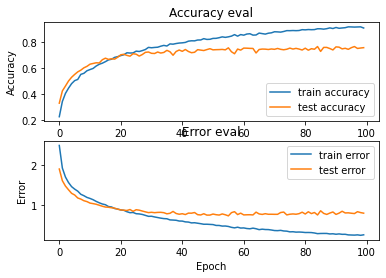

79/79 - 1s - loss: 0.9034 - accuracy: 0.7397 - 833ms/epoch - 11ms/step

Test accuracy: 0.7396876215934753
Target: 9, Predicted label: [9]


In [12]:
if __name__ == "__main__":
    
#     save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)